In [103]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
import csv
import scipy.stats as st
import csv
%matplotlib inline

In [3]:
import seaborn as sns

def plot_distri(user1_pref, title):
    sns.set_style("white")

    # Import data
    x1 = user1_pref[:,0]
    x2 = user1_pref[:,1]
    x3 = user1_pref[:,2]
    x4 = user1_pref[:,3]

    # Plot
    kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

    plt.figure(figsize=(10,7), dpi= 80)
    sns.distplot(x1, color="dodgerblue", label="f1", **kwargs)
    sns.distplot(x2, color="orange", label="f2", **kwargs)
    sns.distplot(x3, color="deeppink", label="f3", **kwargs)
    sns.distplot(x4, color="blue", label="f4", **kwargs)
    plt.title(title)
    plt.legend()

In [4]:
def _get_rd_rate(scores):
    """Gives a random comparison score

        scores (list of float): local preferences of the comparaison between videos i and j
        compx (int) : index of comparaison  prefer scores in argument _scores_
    Returns:
        (float): random comparison score
    """
    # print("scooore", scores)
    preference_arg = list(scores)

    class MyPdf(st.rv_continuous):

        def _pdf(self, r, preference_arg):
            dens = 1 / (1 + np.exp(-np.matmul(np.array([preference_arg]), np.array([r]))))
            return dens

        def _argcheck(self, preference_arg):
            return True  # to admit also negative values

    my_cv = MyPdf(a=-1, b=1, name="my_pdf")
    return my_cv.rvs(preference_arg)

def _unscale_rating(r):
    """Converts [-1,1] to [0, 100]"""
    return [(index + 1) * 50 for index in r]

def rescale_rating(ratings):
    """rescales from [0,100] to [-1,1] float"""
    return [rating / 50 - 1 for rating in ratings]

In [79]:
# recover result data from results_name.txt file
def model_vol_pref(file):
    with open(f'{file}/results.txt', "r") as text_data:
        count = 0
        vol_arr_users = []
        pref_arr_users = []
        for line in text_data:
            if count == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                mu = temp.astype(np.float)
            if count == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                cv = temp.astype(np.float)
            if count >= 5:
                temp = line.strip().split(':')
                temp_vol = np.array(temp[1].strip().split('],')[0].strip().split('([')[1].strip().split(','))
                temp_pref = np.array(temp[1].strip().split(', [')[1].strip().split('])')[0].strip().split(','))
                temp_pref = temp_pref.astype(np.float)
                temp_vol = temp_vol.astype(np.float)
                vol_arr_users += [temp_vol]
                pref_arr_users += [temp_pref]
            count += 1
    vol_arr_users = np.array(vol_arr_users)
    pref_arr_users = np.array(pref_arr_users)
    
    return vol_arr_users, pref_arr_users


In [80]:
rating_columns = ["reliability", "importance", "engaging", "pedagogy", "layman_friendly", "diversity_inclusion", 
                  "backfire_risk", "better_habits", "entertaining_relaxing"]

def plot_distri_per_crit(users, vol_arr_users, title_legend, xlabel, ylabel):
    fig, axs = plt.subplots(3, 3, figsize=(10,10))
    axs[0, 0].scatter(users, vol_arr_users.T[0], s=3, c="red")
    #axs[0, 0].scatter(users, pref_arr_users.T[0], s=3, c="blue")
    axs[0, 0].set_title(rating_columns[0])

    axs[0, 1].scatter(users, vol_arr_users.T[1], s=3, c="red")
    #axs[0, 1].scatter(users, pref_arr_users.T[1], s=3, c="blue")
    axs[0, 1].set_title(rating_columns[1])

    axs[0, 2].scatter(users, vol_arr_users.T[2], s=3, c="red")
    #axs[0, 2].scatter(users, pref_arr_users.T[2], s=3, c="blue")
    axs[0, 2].set_title(rating_columns[2])

    axs[1, 0].scatter(users, vol_arr_users.T[3], s=3, c="red")
    #axs[1, 0].scatter(users, pref_arr_users.T[3], s=3, c="blue")
    axs[1, 0].set_title(rating_columns[3])

    axs[1, 1].scatter(users, vol_arr_users.T[4], s=3, c="red")
    #axs[1, 1].scatter(users, pref_arr_users.T[4], s=3, c="blue")
    axs[1, 1].set_title(rating_columns[4])

    axs[1, 2].scatter(users, vol_arr_users.T[5], s=3, c="red")
    #axs[1, 2].scatter(users, pref_arr_users.T[5], s=3, c="blue")
    axs[1, 2].set_title(rating_columns[5])

    axs[2, 0].scatter(users, vol_arr_users.T[6], s=3, c="red")
    #axs[2, 0].scatter(users, pref_arr_users.T[6], s=3, c="blue")
    axs[2, 0].set_title(rating_columns[6])

    axs[2, 1].scatter(users, vol_arr_users.T[7], s=3, c="red")
    #axs[2, 1].scatter(users, pref_arr_users.T[7], s=3, c="blue")
    axs[2, 1].set_title(rating_columns[7])

    axs[2, 2].scatter(users, vol_arr_users.T[8], s=3, c="red")
    #axs[2, 2].scatter(users, pref_arr_users.T[8], s=3, c="blue")
    axs[2, 2].set_title(rating_columns[8])

    fig.tight_layout()
    fig.legend([title_legend], loc='lower right', bbox_to_anchor=(1,1), ncol=2, bbox_transform=fig.transFigure)
    for ax in axs.flat:
        ax.set(xlabel=xlabel, ylabel=ylabel)

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

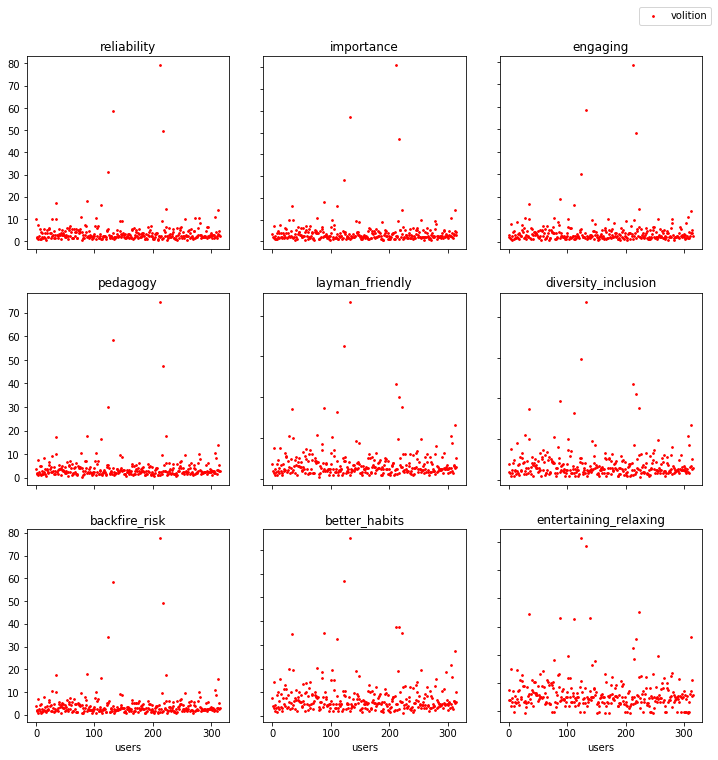

In [81]:
vol_arr_users, pref_arr_users = model_vol_pref("tournesol_datasets")
users = range(0, len(vol_arr_users))
plot_distri_per_crit(users, vol_arr_users, "volition", "users", "")

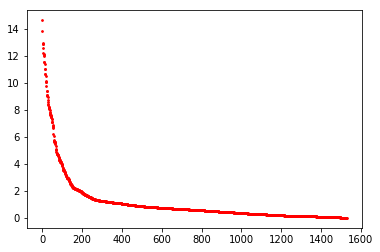

In [101]:
# recover data from test_file
def plot_y_test(file):
    with open(f'{file}/test.csv', "r") as test_data:
        csv_reader = csv.DictReader(test_data)
        y_data = []
        count = 0
        for row in csv_reader:
            if count % 9 == 0:
                y_data += [float(row["y_data"])]
            count += 1
    y_data = [i / (60 * 1000) for i in y_data]
    y_data.pop(np.argmax(y_data))
    y_data.sort(reverse=True)
    plt.scatter(range(0, len(y_data)), y_data, s=3, c="red")
    return y_data
    
yy = plot_y_test("tournesol_datasets")

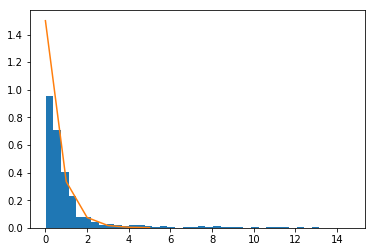

In [117]:
def graph(l, max):
    n_bins = 40
    x = np.arange(0, max)
    y = l * np.exp(-l*x)
    plt.hist(yy, bins=n_bins, density=True)
    plt.plot(x, y)

graph(1.5, 6)

# We can set the number of bins with the *bins* keyword argument.


163 265
[4, 1, 1, 9, 1, 2, 1, 3, 1, 3, 1, 2, 1, 9, 1, 2, 1, 1, 3, 3, 2, 1, 6, 5, 3, 1, 3, 1, 10, 1, 1, 4, 2, 1, 38, 10, 1, 2, 1, 3, 5, 2, 1, 3, 2, 4, 3, 2, 2, 4, 1, 1, 2, 6, 1, 1, 4, 4, 7, 2, 3, 1, 4, 1, 1, 7, 2, 4, 5, 1, 1, 1, 5, 4, 3, 3, 3, 16, 2, 1, 1, 2, 1, 2, 8, 7, 3, 1, 41, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 7, 13, 1, 1, 6, 7, 1, 1, 1, 2, 36, 1, 1, 1, 1, 2, 3, 2, 1, 1, 4, 3, 103, 5, 3, 1, 1, 1, 1, 1, 3, 265, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 12, 2, 3, 2, 2, 11, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 3, 6, 1, 5, 1, 1, 2, 3, 3, 1, 4, 1, 2, 6, 1, 1, 3, 1, 3, 2, 3, 2, 1, 1, 3, 1, 1, 2, 5, 4, 2, 4, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3, 2, 2, 1, 1, 2, 1, 135, 1, 2, 12, 1, 76, 2, 4, 2, 2, 35, 6, 1, 1, 1, 6, 2, 2, 1, 1, 1, 3, 3, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 2, 6, 3, 5, 2, 1, 6, 1, 2, 1, 14, 1, 2, 2, 1, 3, 2, 5, 1, 3, 6, 1, 1, 1, 1, 4, 1, 1, 3, 1, 3, 1, 1, 6, 5, 9, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 4, 1, 2, 5, 2, 2, 3, 1, 2, 1, 1, 2, 3, 1, 2, 13, 1, 6, 1, 2, 2, 23, 2, 4, 2]


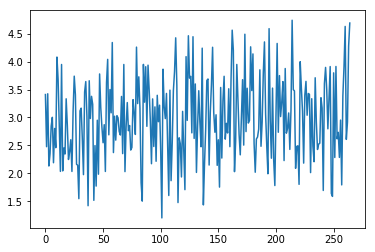

In [83]:
noise_arr = []
uid_arr = []
dict_users_noise = {}
for r in re.values():
    uid = 0
    for rr in r:
        if uid == rr[1]:
            noise_arr += [np.linalg.norm(rr[5])]
        else:
            dict_users_noise.update({uid: noise_arr})
            uid = rr[1]
            noise_arr = []
            noise_arr += [np.linalg.norm(rr[5])]
    dict_users_noise.update({uid: noise_arr})
    
users_comp = [len(i) for i in dict_users_noise.values()]   
index_max = np.argmax(users_comp)
uid_max = list(dict_users_noise.keys())[index_max]
print(uid_max, users_comp[index_max])
noise_arr = [np.linalg.norm(n) for n in noise_arr]
interval = range(0, len(noise_arr))
print(users_comp)
#plt.scatter(interval, noise_arr, s=3)
plt.plot(range(0, len(dict_users_noise.get(uid_max))), dict_users_noise.get(uid_max))

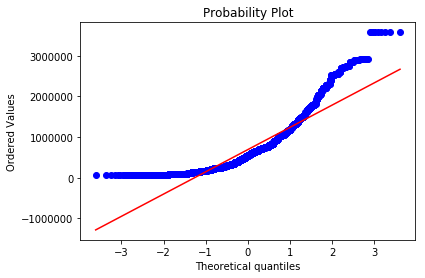

In [84]:
import numpy as np 
import pylab 
import scipy.stats as stats
stats.probplot(y_data, plot=pylab)
pylab.show()


In [1]:
def y_noise_per_criter(res):
    noise_arr = []
    y_arr = []
    for rr in res.values():
        for r in rr:
            noise_arr += [r[5]]
            y_arr += [r[4]]
      
    noise_arr = np.array(noise_arr)
    y_arr = np.array(y_arr)
    plot_distri_per_crit(y_arr, noise_arr, "noise_k", "noise_k", "y")
y_noise_per_criter(res5)

NameError: name 'res5' is not defined

In [22]:
from scipy.stats.stats import pearsonr   
def plot_y_noise(res):
    y_data_arr = []
    quotient_arr = []
    for r in res.values():
        for rr in r:
            y_data_arr += [rr[4]]
            quotient_arr += [rr[6]]

    plt.xlabel("l2(noise)")
    plt.ylabel("y_data")
    print(pearsonr(y_data_arr, quotient_arr))
    print(max(quotient_arr), min(quotient_arr))
    plt.scatter(quotient_arr, y_data_arr, s=15)

In [77]:
def result_real_data(file, pref=0):
    uid_vol_arr = []
    rating_arr =[]
    weights_arr = []
    y_data = []

    # recover data from test_file
    with open(f'{file}/test.csv', "r") as test_data:
        csv_reader = csv.DictReader(test_data)
        for row in csv_reader:
            uid_vol_arr += [int(row["user_ID"])]
            rating_arr += [float(row["rating"])]
            weights_arr += [float(row["weight"])]
            y_data += [float(row["y_data"])]


    test_vol_dic = [[uid_vol_arr[i], rating_arr[i], weights_arr[i], y_data[i]]
                 for i in range(len(uid_vol_arr))]
    # recover result data from results_name.txt file

    with open(f'{file}/results.txt', "r") as text_data:
        count = 0
        vol_arr_users= {}
        for line in text_data:
            if count == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                mu = temp.astype(np.float)
            if count == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                cv = temp.astype(np.float)
            if count >= 5 and pref == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[0].strip().split('([')[1].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users.update({int(line.strip().split(' :')[0]): temp})
            if count >= 5 and pref == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[1].strip().split('[')[1].strip().split('])')[0].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users.update({int(line.strip().split(' :')[0]): temp})
            count += 1
    # exploit results and generate metrics
    nb_criteria = len(mu)
    cv = cv * np.eye(len(mu))
    cnt = 0
    #print(" max_proba_rating || test_vol_gt || model_vol_pred || volition_accuracy")
    noises_arr = []
    results_users_dict = {}
    users_ids = np.unique(np.array(test_vol_dic)[:, 0])
    for i in users_ids:
        results_users_dict.update({i: []})
    for i in range(0, len(test_vol_dic), nb_criteria):
        uid = test_vol_dic[i][0]
        r2 = [test_vol_dic[i + j][1] for j in range(0, nb_criteria)]
        r2_scaled =[]
        for r in r2:
            if r == -1.0:
                r2_scaled += [0]
            else:
                r2_scaled += [(r+50) / 100]
        weight = [test_vol_dic[i + j][2] for j in range(0, nb_criteria)]
        y_data = test_vol_dic[i][3]
        normalized_y_data = y_data / np.sqrt(np.sum(np.array(test_vol_dic)[:,3] ** 2))
        noises = sc.random.multivariate_normal(mean=mu, cov=cv, size=1000)
        user_pref = vol_arr_users.get(uid) + noises
        bradely = [1/(1+np.exp(-sum(weight) * np.matmul(user_pref[i], r2_scaled))) for i in range(len(user_pref))]
        y = [sc.stats.expon.pdf(normalized_y_data, loc=0.5, scale=np.linalg.norm(noises[i])) for i in range(len(noises))]
        proba_noises = [sc.stats.multivariate_normal.pdf(i, mean=mu, cov=cv) for i in noises]
        assert len(bradely) == len(y) == len(proba_noises)
        dens = [sc.special.expit(bradely[i] * y[i] * proba_noises[i]) for i in range(len(noises))]
        #dens = [1/(1+np.exp(-weight * i * r2[0])) for i in user_pref]
        max_index = np.argmax(np.array(dens))
        #print(vol_arr_users[uid], user_pref[max_index])
        quotient = np.linalg.norm(noises[max_index]) #/ nb_criteria
        res_uid = [i, uid, r2, weight, normalized_y_data, noises[max_index], quotient, dens[max_index]]
        current_res_uid = results_users_dict.get(uid)
        current_res_uid += [res_uid]
        results_users_dict.update({uid: current_res_uid})
        print(f"{uid} || {dens[max_index]} || {quotient}")


    return results_users_dict, mu

0 || 0.5 || 0.40509119063158816
0 || 0.5 || 0.40225483182259486
0 || 0.5 || 0.28744800299364326
1 || 0.5 || 0.2857430574906365
2 || 0.5 || 0.4875919823677968
3 || 0.5 || 0.2951534561426244
3 || 0.5 || 0.25366954249490636
3 || 0.5 || 0.33057024411586017
3 || 0.5 || 0.36038050746812716
3 || 0.5 || 0.27037264094533825
3 || 0.5 || 0.20219290120986766
3 || 0.5 || 0.3190067783991676
3 || 0.5 || 0.4809698010653004
3 || 0.5 || 0.27449374865484616
4 || 0.5 || 0.30268817358132394
5 || 0.5 || 0.21526857089246587
5 || 0.5 || 0.2473869489675741
7 || 0.5 || 0.354243143010918
8 || 0.5 || 0.3708550924892188
8 || 0.5 || 0.23116780732250644
8 || 0.5 || 0.2460103814293183
9 || 0.5 || 0.3381043158928852
10 || 0.5 || 0.31094601037788483
10 || 0.5 || 0.5535937195882268
10 || 0.5 || 0.29640081639994353
11 || 0.5 || 0.3827449861570154
14 || 0.5 || 0.3335809328500869
14 || 0.5 || 0.45319331297627347
16 || 0.5 || 0.29781290739859273
18 || 0.5 || 0.3217974041216041
18 || 0.5 || 0.4195054271078621
18 || 0.5 || 0.

99 || 0.5 || 0.34890947430899943
99 || 0.5 || 0.3119801451922123
99 || 0.5 || 0.3784370151306679
99 || 0.5 || 0.42211269633740706
99 || 0.5 || 0.3703191215772951
99 || 0.5 || 0.31926878492649485
99 || 0.5 || 0.3765042742699564
99 || 0.5 || 0.40222513241338304
99 || 0.5 || 0.3686741305880907
99 || 0.5 || 0.4144889621359381
99 || 0.5 || 0.2900384360385079
99 || 0.5 || 0.31614015755373
99 || 0.5 || 0.3997688737634279
100 || 0.5 || 0.2586409010183796
100 || 0.5 || 0.3357087856427633
101 || 0.5 || 0.239186332772935
102 || 0.5 || 0.2545932833854766
103 || 0.5 || 0.22884717175949365
103 || 0.5 || 0.29967527345174466
104 || 0.5 || 0.3050443746430098
105 || 0.5 || 0.3373089978447638
105 || 0.5 || 0.33350971721166606
106 || 0.5 || 0.28338274844879446
106 || 0.5 || 0.5554619937097803
106 || 0.5 || 0.19098857322676877
106 || 0.5 || 0.2885658179101643
106 || 0.5 || 0.4601346799984544
106 || 0.5 || 0.17294277523613252
106 || 0.5 || 0.27460515561040066
106 || 0.5 || 0.40955234362629506
107 || 0.5 || 

153 || 0.5 || 0.2386541364817284
153 || 0.5 || 0.42424357609215896
153 || 0.5 || 0.2872126465421364
153 || 0.5 || 0.42894250943000156
153 || 0.5 || 0.4020838967791507
153 || 0.5 || 0.5081143991821709
153 || 0.5 || 0.3264016228064138
153 || 0.5 || 0.5165771998500096
153 || 0.5 || 0.25312716648998423
153 || 0.5 || 0.3096315891285263
153 || 0.5 || 0.26655649804728626
153 || 0.5 || 0.33363472323837007
153 || 0.5 || 0.25518334066108217
153 || 0.5 || 0.31603842875871196
153 || 0.5 || 0.329114394227572
153 || 0.5 || 0.5015908121158157
153 || 0.5 || 0.4936931448453352
153 || 0.5 || 0.2693109155226824
153 || 0.5 || 0.382638075044244
153 || 0.5 || 0.280399282810549
153 || 0.5 || 0.3496813957341844
153 || 0.5 || 0.2823566481873661
153 || 0.5 || 0.3465007278801232
153 || 0.5 || 0.16824273727629752
153 || 0.5 || 0.34829560322274317
153 || 0.5 || 0.5649684269861979
153 || 0.5 || 0.44406856862054134
153 || 0.5 || 0.3157483632411193
153 || 0.5 || 0.22544135334003002
153 || 0.5 || 0.32533912379765134
1

163 || 0.5 || 0.32353750811778065
163 || 0.5 || 0.3153126616355845
163 || 0.5 || 0.3454688691491439
163 || 0.5 || 0.32695154842409146
163 || 0.5 || 0.3424662616672689
163 || 0.5 || 0.2728995680717181
163 || 0.5 || 0.36245132080950665
163 || 0.5 || 0.405968107972506
163 || 0.5 || 0.43714378469195225
163 || 0.5 || 0.2817073635289899
163 || 0.5 || 0.3864646422174915
163 || 0.5 || 0.25788825293578616
163 || 0.5 || 0.2991255368923336
163 || 0.5 || 0.3474689860272095
163 || 0.5 || 0.3202803003494316
163 || 0.5 || 0.3260162314822166
163 || 0.5 || 0.3033355191700743
163 || 0.5 || 0.40214761483283745
163 || 0.5 || 0.39904570872107425
163 || 0.5 || 0.3002924731129187
163 || 0.5 || 0.25461698049538817
163 || 0.5 || 0.4267646836782306
163 || 0.5 || 0.35545598135314793
163 || 0.5 || 0.28622020018637606
163 || 0.5 || 0.15474695863700177
163 || 0.5 || 0.35796995804745013
163 || 0.5 || 0.36702367193145063
163 || 0.5 || 0.31504359745019167
163 || 0.5 || 0.22554529393362044
163 || 0.5 || 0.2483043654721

256 || 0.5 || 0.4319001422556141
256 || 0.5 || 0.41406071304787767
257 || 0.5 || 0.4386110073212217
257 || 0.5 || 0.2834841266384288
258 || 0.5 || 0.3782242802387446
259 || 0.5 || 0.3152946271463409
260 || 0.5 || 0.31475874676360405
260 || 0.5 || 0.2870054369633379
261 || 0.5 || 0.47191257307765966
262 || 0.5 || 0.34114011167185165
262 || 0.5 || 0.3021353079881264
262 || 0.5 || 0.3971015594577329
262 || 0.5 || 0.3783219091697048
262 || 0.5 || 0.39124776610898665
262 || 0.5 || 0.3146056508895725
262 || 0.5 || 0.46230901099055544
262 || 0.5 || 0.31555218986935807
262 || 0.5 || 0.3092392130476077
262 || 0.5 || 0.4490099529716505
262 || 0.5 || 0.33260140019452555
262 || 0.5 || 0.30899373101082994
262 || 0.5 || 0.18156118791363904
262 || 0.5 || 0.13797617571232368
262 || 0.5 || 0.33914137461493343
262 || 0.5 || 0.3744069660782265
262 || 0.5 || 0.4233779983997133
262 || 0.5 || 0.2232698215627192
262 || 0.5 || 0.3901122548509496
262 || 0.5 || 0.34784045588692913
262 || 0.5 || 0.32042568095183

277 || 0.5 || 0.2881550917468948
277 || 0.5 || 0.2821559974847052
277 || 0.5 || 0.41657965948984754
277 || 0.5 || 0.2983256710015885
277 || 0.5 || 0.31022029629468356
277 || 0.5 || 0.31785160403338636
277 || 0.5 || 0.4157161950681119
277 || 0.5 || 0.36586171227703507
277 || 0.5 || 0.2211603275036728
277 || 0.5 || 0.1960877945376973
277 || 0.5 || 0.3672837392683953
277 || 0.5 || 0.4663171359807677
277 || 0.5 || 0.4171064687405384
277 || 0.5 || 0.36652737207392416
277 || 0.5 || 0.2808268977404487
277 || 0.5 || 0.6503355385482992
277 || 0.5 || 0.34345739719862556
277 || 0.5 || 0.2664426091285538
277 || 0.5 || 0.313165865757917
277 || 0.5 || 0.40830225104829004
277 || 0.5 || 0.29706196394513323
277 || 0.5 || 0.3103215717624128
277 || 0.5 || 0.4672985692129586
277 || 0.5 || 0.2818911763905734
277 || 0.5 || 0.31059998169073216
277 || 0.5 || 0.3634418235011563
277 || 0.5 || 0.34509024156055607
277 || 0.5 || 0.3681243854029637
277 || 0.5 || 0.2968515183768017
277 || 0.5 || 0.4166654487091048
2

385 || 0.5 || 0.30939478437936285
387 || 0.5 || 0.5067276726312827
388 || 0.5 || 0.3761612278829682
388 || 0.5 || 0.4177745432405514
388 || 0.5 || 0.23710886802731215
388 || 0.5 || 0.3452632473077497
388 || 0.5 || 0.3815812551377572
388 || 0.5 || 0.2606627084538465
391 || 0.5 || 0.3341626785272525
393 || 0.5 || 0.37436430133215515
393 || 0.5 || 0.38832755679233705
394 || 0.5 || 0.382456339660165
394 || 0.5 || 0.38157212712621025
396 || 0.5 || 0.4240226552439946
396 || 0.5 || 0.39227885258028394
396 || 0.5 || 0.26487513209761937
396 || 0.5 || 0.18372526131404246
396 || 0.5 || 0.40730954789890417
396 || 0.5 || 0.4751714895448139
396 || 0.5 || 0.4380652017247683
396 || 0.5 || 0.29709959102941963
396 || 0.5 || 0.2882294813201705
396 || 0.5 || 0.3099007327318153
396 || 0.5 || 0.33444216479584327
396 || 0.5 || 0.19070806885926234
396 || 0.5 || 0.21114329534527712
396 || 0.5 || 0.3400799396854407
396 || 0.5 || 0.4156665366052313
396 || 0.5 || 0.4057863874217305
396 || 0.5 || 0.186582423849634

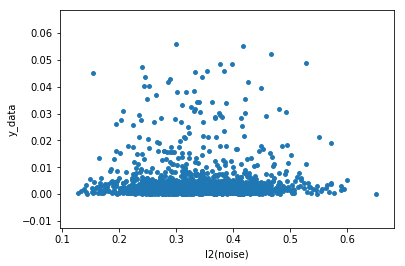

In [85]:
re8, mu8 = result_real_data("tournesol_datasets") # with lambda = 1/||noise_k||
plot_y_noise(re8)

In [99]:
y_data = []
with open(f'tournesol_datasets6/test.csv', "r") as test_data:
        csv_reader = csv.DictReader(test_data)
        for row in csv_reader:
            y_data += [float(row["y_data"])]
y_data_arr = []
quotient_arr = []
for r in re6.values():
    for rr in r:
        y_data_arr += [rr[4]]
        quotient_arr += [rr[6]]
#quotient_arr = [1/n for n in quotient_arr]
print(len(y_data_arr)/sum(y_data_arr))
print(1 / (np.linalg.norm(mu6)**2))

228.022622069969
94.09334171106212


0 || 0.5 || 0.29846640850069245
0 || 0.5 || 0.32832840180756173
0 || 0.5 || 0.314220817868169
1 || 0.5 || 0.31232272536852274
2 || 0.5 || 0.3655465105265436
3 || 0.5 || 0.4643509096641006
3 || 0.5 || 0.3098080103028523
3 || 0.5 || 0.37584899836822916
3 || 0.5 || 0.30078187734377737
3 || 0.5 || 0.3615642020515562
3 || 0.5 || 0.3834633615091541
3 || 0.5 || 0.322750209717171
3 || 0.5 || 0.13207327112006048
3 || 0.5 || 0.41420249685159033
4 || 0.5 || 0.4226223151478045
5 || 0.5 || 0.31407107105703935
5 || 0.5 || 0.293874724623525
7 || 0.5 || 0.5850725681780877
8 || 0.5 || 0.21145126362298666
8 || 0.5 || 0.2798767979391386
8 || 0.5 || 0.2395122777163104
9 || 0.5 || 0.2770183480958687
10 || 0.5 || 0.3005384445600462
10 || 0.5 || 0.37472108541882954
10 || 0.5 || 0.23278536573069092
11 || 0.5 || 0.17118396323085794
14 || 0.5 || 0.517204952307425
14 || 0.5 || 0.27703872512574884
16 || 0.5 || 0.3415899937734503
18 || 0.5 || 0.46146015346713715
18 || 0.5 || 0.27423392487669235
18 || 0.5 || 0.3286

99 || 0.5 || 0.25590660399793674
99 || 0.5 || 0.2977618193910146
99 || 0.5 || 0.2539244934321942
99 || 0.5 || 0.19736891322934383
99 || 0.5 || 0.2976244261873713
99 || 0.5 || 0.34310071076881826
99 || 0.5 || 0.18812524691653842
99 || 0.5 || 0.3046277806980975
99 || 0.5 || 0.3917936677865763
99 || 0.5 || 0.3111192015953922
99 || 0.5 || 0.493633253631709
99 || 0.5 || 0.4638161469615985
100 || 0.5 || 0.225751311870401
100 || 0.5 || 0.38317362090576296
101 || 0.5 || 0.2776147059566553
102 || 0.5 || 0.3674312926751565
103 || 0.5 || 0.362830126942361
103 || 0.5 || 0.40453370349197043
104 || 0.5 || 0.4012012156610856
105 || 0.5 || 0.3782177799415661
105 || 0.5 || 0.167640911703365
106 || 0.5 || 0.3350533279232691
106 || 0.5 || 0.3387691595806852
106 || 0.5 || 0.2017378709890326
106 || 0.5 || 0.34013447787018747
106 || 0.5 || 0.30029779172003457
106 || 0.5 || 0.33001696411456627
106 || 0.5 || 0.3395589860748615
106 || 0.5 || 0.2779534037772616
107 || 0.5 || 0.3864629149368544
107 || 0.5 || 0.2

153 || 0.5 || 0.3507950991326282
153 || 0.5 || 0.2628522083260868
153 || 0.5 || 0.28473448012829006
153 || 0.5 || 0.4288370597552784
153 || 0.5 || 0.24105061937494637
153 || 0.5 || 0.21133278875376826
153 || 0.5 || 0.2995018590138889
153 || 0.5 || 0.4383282482975149
153 || 0.5 || 0.371855356760862
153 || 0.5 || 0.34381465645697223
153 || 0.5 || 0.2297834445332424
153 || 0.5 || 0.42082262140880927
153 || 0.5 || 0.3199150090803731
153 || 0.5 || 0.3142197545532272
153 || 0.5 || 0.3222647633260827
153 || 0.5 || 0.2952839492770199
153 || 0.5 || 0.44456232347506436
153 || 0.5 || 0.29014375583664137
153 || 0.5 || 0.28056839188840477
153 || 0.5 || 0.3776487261718137
153 || 0.5 || 0.2369983720661962
153 || 0.5 || 0.3128336272705043
153 || 0.5 || 0.30245678195044534
153 || 0.5 || 0.37997781696473226
153 || 0.5 || 0.39251922496727254
153 || 0.5 || 0.28432145867895564
153 || 0.5 || 0.3307911885631428
153 || 0.5 || 0.44728417545050597
153 || 0.5 || 0.2483851423901389
153 || 0.5 || 0.441337578230380

163 || 0.5 || 0.47395604279912423
163 || 0.5 || 0.38695270607634485
163 || 0.5 || 0.45983649095981843
163 || 0.5 || 0.28156499416085334
163 || 0.5 || 0.22442991273529714
163 || 0.5 || 0.2905495164465023
163 || 0.5 || 0.29449794491069187
163 || 0.5 || 0.310108883350819
163 || 0.5 || 0.42816560898236566
163 || 0.5 || 0.27604348500938575
163 || 0.5 || 0.32448614318313174
163 || 0.5 || 0.42230603953324564
163 || 0.5 || 0.483710652118317
163 || 0.5 || 0.3401228617992251
163 || 0.5 || 0.2759552043145295
163 || 0.5 || 0.2213667191543635
163 || 0.5 || 0.5101318616003465
163 || 0.5 || 0.32712452860957697
163 || 0.5 || 0.25230780072380105
163 || 0.5 || 0.39179653093129463
163 || 0.5 || 0.2486913887926398
163 || 0.5 || 0.1979346702702774
163 || 0.5 || 0.3461834355487323
163 || 0.5 || 0.48066328808988235
163 || 0.5 || 0.30394822661953114
163 || 0.5 || 0.4166837442037912
163 || 0.5 || 0.3351868817634242
163 || 0.5 || 0.3641447732259025
163 || 0.5 || 0.40476248426444067
163 || 0.5 || 0.2476177434351

256 || 0.5 || 0.34190608268500744
256 || 0.5 || 0.33727817026308843
257 || 0.5 || 0.33934744124434807
257 || 0.5 || 0.4042327888138552
258 || 0.5 || 0.21116114639288697
259 || 0.5 || 0.3314099889260196
260 || 0.5 || 0.2514026273878344
260 || 0.5 || 0.38834872319486063
261 || 0.5 || 0.39865075971696506
262 || 0.5 || 0.2832242807303253
262 || 0.5 || 0.3186539193086076
262 || 0.5 || 0.3671177205666295
262 || 0.5 || 0.23029441481670038
262 || 0.5 || 0.35213663215348784
262 || 0.5 || 0.21716449480023545
262 || 0.5 || 0.399724485772213
262 || 0.5 || 0.2676933338798018
262 || 0.5 || 0.37892691340683676
262 || 0.5 || 0.3691939862784822
262 || 0.5 || 0.3774363279915004
262 || 0.5 || 0.21179269647193946
262 || 0.5 || 0.5643683622154899
262 || 0.5 || 0.3080805560055499
262 || 0.5 || 0.3300780952604429
262 || 0.5 || 0.4275305098417069
262 || 0.5 || 0.3645411735283677
262 || 0.5 || 0.4600279769583786
262 || 0.5 || 0.3895677825008558
262 || 0.5 || 0.23304503062396112
262 || 0.5 || 0.2651017603065524

277 || 0.5 || 0.349395909155376
277 || 0.5 || 0.4591980722788669
277 || 0.5 || 0.37748381963233946
277 || 0.5 || 0.2987724743179185
277 || 0.5 || 0.4392009841682537
277 || 0.5 || 0.43748799191716586
277 || 0.5 || 0.29974003065442734
277 || 0.5 || 0.24324059483053231
277 || 0.5 || 0.22646495538981787
277 || 0.5 || 0.40183796926904386
277 || 0.5 || 0.4867981911895374
277 || 0.5 || 0.28878709119464013
277 || 0.5 || 0.28893040959645133
277 || 0.5 || 0.36765375175825327
277 || 0.5 || 0.34504015673909827
277 || 0.5 || 0.29062695178763537
277 || 0.5 || 0.2843201823667061
277 || 0.5 || 0.3118232538799713
277 || 0.5 || 0.2384814304357087
277 || 0.5 || 0.19697959513810392
277 || 0.5 || 0.1725311815558136
277 || 0.5 || 0.31520234744111886
277 || 0.5 || 0.3132113321602876
277 || 0.5 || 0.35215301330162446
277 || 0.5 || 0.3697779105795652
277 || 0.5 || 0.4195772571539949
277 || 0.5 || 0.36020972623238207
277 || 0.5 || 0.34284760573339346
277 || 0.5 || 0.2872338067723543
277 || 0.5 || 0.388408662620

385 || 0.5 || 0.47880249928493296
387 || 0.5 || 0.3040482157778105
388 || 0.5 || 0.32908775886432706
388 || 0.5 || 0.38386855780377765
388 || 0.5 || 0.3471459048367085
388 || 0.5 || 0.48629138879834355
388 || 0.5 || 0.34496670799669366
388 || 0.5 || 0.42191196642497375
391 || 0.5 || 0.30820748335379056
393 || 0.5 || 0.3434927328525668
393 || 0.5 || 0.3619528802927104
394 || 0.5 || 0.408998105106155
394 || 0.5 || 0.4150648025569235
396 || 0.5 || 0.33357790746995547
396 || 0.5 || 0.3218762869527236
396 || 0.5 || 0.49208674402551367
396 || 0.5 || 0.3269928182785018
396 || 0.5 || 0.2947736505254482
396 || 0.5 || 0.25998827502702754
396 || 0.5 || 0.34584863328123955
396 || 0.5 || 0.37188852766457603
396 || 0.5 || 0.3795437502667815
396 || 0.5 || 0.3475875664769019
396 || 0.5 || 0.47696111235497063
396 || 0.5 || 0.3919948309199512
396 || 0.5 || 0.2788583121835999
396 || 0.5 || 0.38497828337790596
396 || 0.5 || 0.3732911348991542
396 || 0.5 || 0.41523274580933656
396 || 0.5 || 0.4214645498386

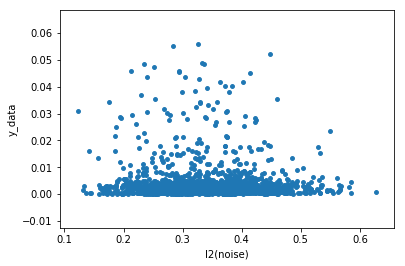

In [78]:
re7, mu7 = result_real_data("tournesol_datasets7") # with lambda = 1/||noise_k||
plot_y_noise(re7)

0 || 0.5 || 0.42947010926090473
0 || 0.5 || 0.47188825917810373
0 || 0.5 || 0.21152062422875798
1 || 0.5 || 0.562170231564035
2 || 0.5 || 0.5192038701031242
3 || 0.5 || 0.3568387388442521
3 || 0.5 || 0.5875229993327699
3 || 0.5 || 0.43141778975886674
3 || 0.5 || 0.7034287414416407
3 || 0.5 || 0.3678681741503014
3 || 0.5 || 0.6291154131303153
3 || 0.5 || 0.273310434739521
3 || 0.5 || 0.42641040275033115
3 || 0.5 || 0.5142727324971476
4 || 0.5 || 0.46907948784564485
5 || 0.5 || 0.4234608660299018
5 || 0.5 || 0.3503289981898805
7 || 0.5 || 0.3878022101315221
8 || 0.5 || 0.6270473667816672
8 || 0.5 || 0.3032337224902093
8 || 0.5 || 0.38293476991996017
9 || 0.5 || 0.33234702463548516
10 || 0.5 || 0.3794304319473538
10 || 0.5 || 0.22719380076913215
10 || 0.5 || 0.41428355266886085
11 || 0.5 || 0.2781882548916558
14 || 0.5 || 0.4821912606218167
14 || 0.5 || 0.2605336164378189
16 || 0.5 || 0.5067112471851282
18 || 0.5 || 0.5082387888018611
18 || 0.5 || 0.4808017720672449
18 || 0.5 || 0.4123662

99 || 0.5 || 0.44136111086647717
99 || 0.5 || 0.42806578083620245
99 || 0.5 || 0.5109406861088202
99 || 0.5 || 0.37161244856149295
99 || 0.5 || 0.3307285914932036
99 || 0.5 || 0.5810223358474951
99 || 0.5 || 0.6228224352677392
99 || 0.5 || 0.5405444965571652
99 || 0.5 || 0.3336401771829563
99 || 0.5 || 0.31965802006646116
99 || 0.5 || 0.5233323400423061
99 || 0.5 || 0.42019896884132407
100 || 0.5 || 0.5883794621448255
100 || 0.5 || 0.4393110218885461
101 || 0.5 || 0.4322721741243482
102 || 0.5 || 0.5761529994677516
103 || 0.5 || 0.33381132031733246
103 || 0.5 || 0.37286019760901695
104 || 0.5 || 0.4882878999868619
105 || 0.5 || 0.4460724339431784
105 || 0.5 || 0.4186924174575942
106 || 0.5 || 0.3753213622127982
106 || 0.5 || 0.4167544322472093
106 || 0.5 || 0.6293720830898218
106 || 0.5 || 0.31168836243425296
106 || 0.5 || 0.576577758498629
106 || 0.5 || 0.3846295904044152
106 || 0.5 || 0.560604210823427
106 || 0.5 || 0.4647684061125429
107 || 0.5 || 0.4340911226573323
107 || 0.5 || 0.

153 || 0.5 || 0.41281922142039423
153 || 0.5 || 0.626937322605436
153 || 0.5 || 0.6440522874449063
153 || 0.5 || 0.4409706288138017
153 || 0.5 || 0.3978017757484822
153 || 0.5 || 0.42525626101015007
153 || 0.5 || 0.47260439761738404
153 || 0.5 || 0.30299110618659264
153 || 0.5 || 0.3778050929375452
153 || 0.5 || 0.4854395066142216
153 || 0.5 || 0.2768324398722164
153 || 0.5 || 0.48843408464763244
153 || 0.5 || 0.41347514042322125
153 || 0.5 || 0.41182555682203076
153 || 0.5 || 0.41177543337992906
153 || 0.5 || 0.5639437825020149
153 || 0.5 || 0.46115083862909034
153 || 0.5 || 0.41472940240519834
153 || 0.5 || 0.43257428083315064
153 || 0.5 || 0.5110364881710183
153 || 0.5 || 0.6230510799577229
153 || 0.5 || 0.6264684498447868
153 || 0.5 || 0.4872932427895537
153 || 0.5 || 0.4232325850790884
153 || 0.5 || 0.4854281426047429
153 || 0.5 || 0.3773481137553762
153 || 0.5 || 0.2920759472542897
153 || 0.5 || 0.3563433819205724
153 || 0.5 || 0.618764226879772
153 || 0.5 || 0.4996693508986502
1

163 || 0.5 || 0.3313629320665286
163 || 0.5 || 0.5950838820116007
163 || 0.5 || 0.3848470361358068
163 || 0.5 || 0.29863187736569213
163 || 0.5 || 0.6172980040520631
163 || 0.5 || 0.48904780669744774
163 || 0.5 || 0.4122815777013463
163 || 0.5 || 0.7693168174527732
163 || 0.5 || 0.3743190191871032
163 || 0.5 || 0.34180009940697925
163 || 0.5 || 0.5061157512239599
163 || 0.5 || 0.5321751490193767
163 || 0.5 || 0.3555082383584333
163 || 0.5 || 0.5070938063332505
163 || 0.5 || 0.284092480320864
163 || 0.5 || 0.5031040494536281
163 || 0.5 || 0.407252995182813
163 || 0.5 || 0.32658597765164166
163 || 0.5 || 0.259170709838074
163 || 0.5 || 0.40015523221893234
163 || 0.5 || 0.4810594241765283
163 || 0.5 || 0.39098534227697385
163 || 0.5 || 0.38078753352790284
163 || 0.5 || 0.4238443870504078
163 || 0.5 || 0.27376641631202303
163 || 0.5 || 0.3809278891547189
163 || 0.5 || 0.3423351558850098
163 || 0.5 || 0.46718576228024955
163 || 0.5 || 0.253728197559422
163 || 0.5 || 0.39462451138092164
163 

257 || 0.5 || 0.2826217259298002
258 || 0.5 || 0.4437949605588431
259 || 0.5 || 0.4022765930821774
260 || 0.5 || 0.3958569115445637
260 || 0.5 || 0.46289902264778365
261 || 0.5 || 0.3854922573980384
262 || 0.5 || 0.4785903496129921
262 || 0.5 || 0.5854292565853119
262 || 0.5 || 0.4189716065592232
262 || 0.5 || 0.4484034963103909
262 || 0.5 || 0.5754681864283977
262 || 0.5 || 0.34040164541210277
262 || 0.5 || 0.4015068399461628
262 || 0.5 || 0.44934457029508224
262 || 0.5 || 0.41045696845817126
262 || 0.5 || 0.3751504736131111
262 || 0.5 || 0.23669328627075986
262 || 0.5 || 0.38067543086365213
262 || 0.5 || 0.24466925091864733
262 || 0.5 || 0.6452631407556548
262 || 0.5 || 0.39893212375374004
262 || 0.5 || 0.3677025296855805
262 || 0.5 || 0.4818833322024674
262 || 0.5 || 0.3392607649619179
262 || 0.5 || 0.23309612516265515
262 || 0.5 || 0.3496652929029562
262 || 0.5 || 0.3778077216620464
262 || 0.5 || 0.3257823788865201
262 || 0.5 || 0.5835088287773943
262 || 0.5 || 0.5850615459170948
2

277 || 0.5 || 0.5231969733973306
277 || 0.5 || 0.7599666811759227
277 || 0.5 || 0.40892124287372766
277 || 0.5 || 0.18284958245411695
277 || 0.5 || 0.3440293857625918
277 || 0.5 || 0.39981633590497023
277 || 0.5 || 0.565720679847908
277 || 0.5 || 0.4666226682845841
277 || 0.5 || 0.5463938659643003
277 || 0.5 || 0.46208738585166503
277 || 0.5 || 0.44464694975043123
277 || 0.5 || 0.48016006326537397
277 || 0.5 || 0.5883968926860291
277 || 0.5 || 0.6344116474843573
277 || 0.5 || 0.5814380254894725
277 || 0.5 || 0.6720852798046604
277 || 0.5 || 0.21100284739814415
277 || 0.5 || 0.6540384191830493
277 || 0.5 || 0.27725270675259717
277 || 0.5 || 0.20506075494587814
277 || 0.5 || 0.35249737650546037
277 || 0.5 || 0.481580295627156
277 || 0.5 || 0.4388866275621655
277 || 0.5 || 0.34164428344535824
277 || 0.5 || 0.5752241124637076
277 || 0.5 || 0.5130275041541335
277 || 0.5 || 0.5248199989572041
277 || 0.5 || 0.5157917640480862
277 || 0.5 || 0.4483972737235751
277 || 0.5 || 0.45370727984468867


388 || 0.5 || 0.6016406747523303
388 || 0.5 || 0.3632956417497895
388 || 0.5 || 0.5606538415258489
388 || 0.5 || 0.23254514723404063
391 || 0.5 || 0.34505972286269265
393 || 0.5 || 0.41465264063085105
393 || 0.5 || 0.4086465072869745
394 || 0.5 || 0.4593183694565005
394 || 0.5 || 0.472775306563216
396 || 0.5 || 0.19015219052369126
396 || 0.5 || 0.4808154132823228
396 || 0.5 || 0.3768829474717494
396 || 0.5 || 0.5481242355557098
396 || 0.5 || 0.39555106560014996
396 || 0.5 || 0.33969291362583676
396 || 0.5 || 0.2547162347950218
396 || 0.5 || 0.6254735221782214
396 || 0.5 || 0.34188541649953186
396 || 0.5 || 0.3823674770039143
396 || 0.5 || 0.40409401378283627
396 || 0.5 || 0.46723078492377
396 || 0.5 || 0.42000065150807053
396 || 0.5 || 0.3726030709372058
396 || 0.5 || 0.38493767949814595
396 || 0.5 || 0.3486217074049074
396 || 0.5 || 0.42165288333595585
396 || 0.5 || 0.392533285069735
396 || 0.5 || 0.5066679045764988
396 || 0.5 || 0.5343040603515821
396 || 0.5 || 0.6530324213054902
396

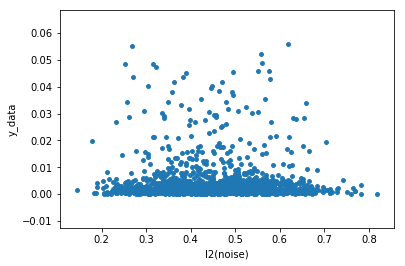

In [91]:
re6, mu6 = result_real_data("tournesol_datasets6") # with lambda = 1/||mean_noise||
plot_y_noise(re6)

0 || 0.500001764854102 || 1.8553102510184554
0 || 0.5000008919248288 || 2.7378993734040167
0 || 0.5000008412890309 || 2.841537543063842
1 || 0.5000011208802818 || 2.6059561031331135
2 || 0.5000013518762683 || 1.9619310811712503
3 || 0.5000018792300559 || 1.719846985676948
3 || 0.5000016841073418 || 1.84536412178952
3 || 0.5000008343710535 || 2.1838489869209785
3 || 0.5000013177765862 || 2.4471101989091966
3 || 0.5000015724682485 || 1.1605072684367206
3 || 0.5000008564503077 || 2.5191218035940683
3 || 0.5000013416124092 || 1.3517741534275767
3 || 0.5000011937271456 || 1.762553974844842
3 || 0.500000886135481 || 2.9272681062648807
4 || 0.5000011625395328 || 2.408561908681776
5 || 0.5000013485159372 || 1.5485295652820084
5 || 0.5000010539292307 || 1.9314891332005346
7 || 0.500000900440805 || 2.7227417853204803
8 || 0.5000008274371502 || 2.592108198920144
8 || 0.5000011557181833 || 2.0863782113534217
8 || 0.5000011502379003 || 1.961593304393748
9 || 0.5000013731130997 || 2.3506858550276872

69 || 0.500001515755833 || 2.0519107829298733
69 || 0.5000012307463502 || 2.6586547788913393
69 || 0.500001222995184 || 2.514002977461471
69 || 0.5000016665657144 || 2.360615816935135
69 || 0.500001646779406 || 1.462572404511951
69 || 0.5000011640571331 || 2.249941505806904
70 || 0.5000012586913242 || 1.578686123023499
71 || 0.5000015214246862 || 2.1864588802614064
72 || 0.500001057215845 || 2.428687516217044
72 || 0.5000016668527423 || 2.2250169703751355
72 || 0.5000016477864809 || 1.954923971167462
72 || 0.5000016723419318 || 1.6014490781951747
73 || 0.5000012397212742 || 2.83245263002996
73 || 0.5000012007454889 || 2.8801791478945975
73 || 0.500001275275166 || 1.906606588472256
73 || 0.5000011555602828 || 2.67905824811332
74 || 0.5000009171781834 || 1.953301545571192
74 || 0.5000011663837985 || 1.8426554544009943
74 || 0.5000012288649843 || 2.588512340775804
74 || 0.5000012564607967 || 1.9192620163550396
74 || 0.5000013430853195 || 2.3545403311741353
74 || 0.5000025293721808 || 1.10

126 || 0.5000009796910403 || 2.8312434237703306
127 || 0.5000010554465525 || 2.7681197868499137
127 || 0.5000014289201495 || 2.3180669217512637
127 || 0.5000017089191717 || 2.1341636188994553
127 || 0.5000015260721912 || 1.3712943341359005
127 || 0.5000010417466664 || 2.4755653955667674
127 || 0.5000010420390703 || 2.4203875398991106
127 || 0.5000014717719791 || 2.215466726727712
128 || 0.5000010393593948 || 2.1367343974837043
128 || 0.5000013181895764 || 2.248361341858458
128 || 0.5000012845247792 || 1.8362724201795213
128 || 0.5000012701306462 || 1.0606171307789907
128 || 0.5000013811436688 || 1.8259511364005925
128 || 0.5000011286258036 || 2.6630137374755454
128 || 0.5000013525036912 || 2.426940230845739
128 || 0.5000012033879685 || 2.2943190218847094
128 || 0.5000010718296465 || 1.718656451756333
128 || 0.5000009730947289 || 1.0830641470934066
128 || 0.500000953855883 || 2.75382762581795
128 || 0.5000010948176516 || 2.191591360075964
128 || 0.500001120765619 || 1.9194793196917506
1

153 || 0.5000016125114517 || 2.234618776765053
153 || 0.5000009130837402 || 2.828261647778454
153 || 0.5000011726528398 || 2.7047369849434046
153 || 0.5000008641986137 || 2.7072470516000933
153 || 0.5000010531960772 || 1.7623875155257365
153 || 0.5000013970903128 || 2.6490017645124664
153 || 0.500001279883702 || 2.623396947381205
153 || 0.5000016499327405 || 1.7076998694095245
153 || 0.5000014581960633 || 2.07636800971955
153 || 0.5000009559441493 || 3.3234731137329963
153 || 0.5000011544914956 || 2.0290883834916276
153 || 0.5000011541316124 || 2.3552105299130717
153 || 0.5000011562084534 || 2.1246367881530266
153 || 0.5000012440023434 || 2.006589119209801
153 || 0.5000014577899151 || 1.4860096819283557
153 || 0.500000980336873 || 2.387870163599734
153 || 0.5000008997195415 || 2.6040787844305626
153 || 0.5000016353499482 || 2.091252104646718
153 || 0.5000010603752769 || 2.133567236677068
153 || 0.5000010859769493 || 2.613971207550862
153 || 0.5000011164372583 || 2.498142552063398
153 |

163 || 0.5000012658005095 || 2.2205495492601584
163 || 0.5000016143972301 || 2.15867085604901
163 || 0.5000014902081259 || 2.370094854767459
163 || 0.5000012424808068 || 1.5500209753774807
163 || 0.5000010491485879 || 1.6791716041808815
163 || 0.5000009205657108 || 2.3366481672370436
163 || 0.5000009469319393 || 2.0208615587688645
163 || 0.5000015518958724 || 1.568253610239481
163 || 0.5000011039342407 || 2.905355965363505
163 || 0.5000011603671357 || 2.112688621627768
163 || 0.5000011801923331 || 2.73512053185406
163 || 0.5000012116940383 || 2.7338789139625774
163 || 0.5000015139862349 || 1.7685451827438097
163 || 0.5000010940049079 || 2.6044474270934375
163 || 0.5000013188049957 || 1.7535548078446608
163 || 0.5000013297418466 || 2.21318671750894
163 || 0.500001450041366 || 1.831802765799406
163 || 0.5000014584626477 || 2.1051994178146147
163 || 0.5000011857578252 || 1.6497548742131458
163 || 0.5000017210165738 || 2.04637797340274
163 || 0.5000015122068151 || 2.4608964735915784
163 ||

181 || 0.5000015342688948 || 2.3297892550621095
181 || 0.5000012468866065 || 2.1193902708903947
181 || 0.5000014667497977 || 2.38502588350586
181 || 0.5000010594417348 || 2.759075029788416
182 || 0.5000012043581926 || 2.386181219742537
182 || 0.5000010616945879 || 2.7860102074652957
183 || 0.5000012480251367 || 2.2920265648978497
185 || 0.5000010507091951 || 2.0632852198983938
185 || 0.5000016488318729 || 1.9767786708050652
186 || 0.5000015885694178 || 2.31323194008933
187 || 0.5000010597473838 || 2.2500104514313617
189 || 0.5000013684813099 || 2.2835966931827265
190 || 0.500001246027116 || 2.293933341054929
190 || 0.5000012904623229 || 2.3174011127802623
191 || 0.5000008454147882 || 2.7259683620384405
191 || 0.5000012077938959 || 1.7202033477139975
192 || 0.5000013096187008 || 2.1210325499475604
192 || 0.5000012843600171 || 2.757355839949486
193 || 0.5000012352757842 || 2.544331577727805
196 || 0.5000011515580344 || 1.971491411347209
197 || 0.5000011613671519 || 2.716845738007981
197 

262 || 0.5000015017516894 || 2.0021292733906235
262 || 0.5000015070253098 || 1.1832065748100755
262 || 0.5000014124323735 || 1.8368445004480374
262 || 0.5000010626190217 || 2.5269871725417143
262 || 0.5000011995916552 || 1.7178442273888286
262 || 0.500001343681618 || 2.201174779238436
262 || 0.5000015641359415 || 2.4764883203360006
262 || 0.5000012841941034 || 1.5698530416146064
262 || 0.5000011150945676 || 2.4203209778931805
262 || 0.5000014788854675 || 1.4323408293788507
262 || 0.50000088685884 || 1.4336275776971754
262 || 0.5000013112518196 || 2.4909112669882574
262 || 0.5000014631375378 || 2.3674195238585947
262 || 0.5000013908399799 || 2.2698719200919224
262 || 0.5000013914005426 || 1.8467096160905707
262 || 0.5000012579821966 || 1.6258689685164798
262 || 0.5000010797259471 || 2.084740988688164
262 || 0.5000011750259309 || 1.8938101234845999
262 || 0.5000012730082206 || 1.772704430285278
262 || 0.500001098260742 || 1.51968485821878
262 || 0.5000013598086125 || 1.9756968309591911
2

270 || 0.5000012076288182 || 1.6208134446874263
270 || 0.500001081822128 || 1.8522671592140092
270 || 0.5000011156525529 || 2.168428303919452
270 || 0.5000012870963728 || 1.5659295193839067
270 || 0.500001093411633 || 2.537723964172444
270 || 0.5000012342226259 || 1.3536711480185406
270 || 0.5000010847346695 || 2.1312801860387762
270 || 0.5000012162183137 || 2.8010402067946836
270 || 0.5000008674784716 || 2.170785676560815
272 || 0.5000011861067665 || 2.884698627170985
272 || 0.500001348432654 || 1.8281165569144988
273 || 0.5000019943286137 || 1.4929572702346194
273 || 0.500001204953382 || 2.5838488861761912
273 || 0.5000017899157172 || 1.8161675454139252
273 || 0.5000011237580343 || 1.9010313486928254
274 || 0.500001070042827 || 2.173806082925274
274 || 0.5000010124034484 || 2.2266550574714468
276 || 0.5000011868318504 || 2.45122622787134
276 || 0.5000011072217281 || 2.188722409169053
277 || 0.5000009353950917 || 1.57843816930855
277 || 0.5000009991592421 || 2.431905984338748
277 || 0

341 || 0.5000010560184011 || 2.55510505858918
341 || 0.5000022507209642 || 1.6122103857705228
341 || 0.5000012621699375 || 2.843884492711536
342 || 0.5000012779672691 || 2.636973662338829
343 || 0.500001599294828 || 1.7829640287283797
344 || 0.5000009356540032 || 2.452347435432089
344 || 0.500001183881122 || 2.4071849279431103
344 || 0.5000010385591589 || 2.686087511961556
345 || 0.5000012226390306 || 1.5295900702755152
347 || 0.5000013043186734 || 2.2691945794925217
347 || 0.5000012626347243 || 2.372171574849579
347 || 0.5000009843740031 || 2.4597701334340183
348 || 0.5000011770201631 || 2.559156079148956
349 || 0.5000015852033493 || 1.8608247106094526
350 || 0.5000012036413869 || 2.491369852678328
350 || 0.5000011530461206 || 2.6844303713405577
350 || 0.5000011161877463 || 2.7682652396162566
350 || 0.5000009538335612 || 1.9675116548515488
350 || 0.500001463449658 || 2.848438018804861
350 || 0.5000010885884285 || 2.1860450780476044
351 || 0.5000010833693835 || 2.5387974763655046
351 |

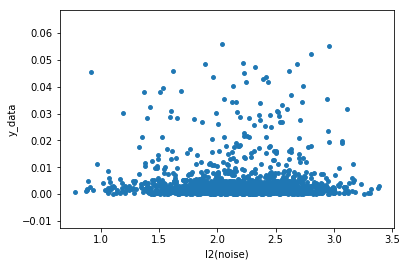

In [11]:
res5, mu5 = result_real_data("tournesol_datasets5") # dir5 with lambda = 1/||noise_k||
plot_y_noise(res5)

0 || 0.5000003762874754 || 1.9142250668325063
0 || 0.5000005330390086 || 1.4348402430052785
0 || 0.5000003879643901 || 1.7593322022377396
1 || 0.5000004470927151 || 2.459935253091185
2 || 0.5000005945261502 || 1.2502375459778483
3 || 0.5000004845255934 || 1.421837878423826
3 || 0.5000003840061374 || 2.1841010883723535
3 || 0.5000004490552418 || 2.2593415199732503
3 || 0.5000003738829141 || 2.659886926770586
3 || 0.5000003822135664 || 1.8253299559662768
3 || 0.5000005299230811 || 1.1543831455573328
3 || 0.5000004039218293 || 2.2476822059209227
3 || 0.5000003190805974 || 2.345289647120966
4 || 0.5000005772158086 || 2.806142643629252
5 || 0.500000443763406 || 2.6684892501090958
5 || 0.5000004809789476 || 2.3692324166619225
7 || 0.5000005570235293 || 0.7833648929174013
8 || 0.5000004015284741 || 1.5228872167116587
8 || 0.5000003794441175 || 1.5522821587674398
8 || 0.5000006043625804 || 2.0566580916238046
9 || 0.500000477593248 || 3.2337882202826957
10 || 0.5000004746973492 || 2.68264473252

72 || 0.5000004290620681 || 2.8050395609188756
73 || 0.5000005241163447 || 2.083549664691011
73 || 0.5000003053281886 || 2.039463121789017
73 || 0.5000003621942137 || 1.6879028469631663
73 || 0.5000004568454186 || 2.8780257505944182
73 || 0.5000003995292381 || 2.510536560056118
74 || 0.5000004013706764 || 1.8310190803055184
74 || 0.5000003371096059 || 2.1677643011327095
74 || 0.5000004815041932 || 2.0169069146282714
74 || 0.5000003450276906 || 1.4577176220294765
75 || 0.5000003672147872 || 1.845333157244566
75 || 0.5000005363006735 || 2.495031970827839
75 || 0.5000003565221065 || 2.19917446154395
75 || 0.5000005705846221 || 2.0272572730557887
75 || 0.5000005559864116 || 1.437659888968839
75 || 0.5000004429878129 || 1.4674191244625436
75 || 0.5000005277574088 || 1.38949663781604
77 || 0.5000004143158892 || 1.4539999790743054
77 || 0.500000415381809 || 2.47898882727454
78 || 0.5000003653056978 || 2.224173992216948
78 || 0.5000004025177573 || 2.0996409268015745
78 || 0.5000003914358047 ||

128 || 0.5000004682723328 || 1.6815683925808134
129 || 0.5000003447100201 || 2.17920691926084
129 || 0.5000004997340621 || 1.856877547823364
129 || 0.5000003286149396 || 2.4102960953923582
129 || 0.5000007008749877 || 1.4709036828469286
129 || 0.5000004499446058 || 1.4190730499562607
129 || 0.5000004736189584 || 1.926041467841484
129 || 0.5000004432188948 || 0.9879525583386702
129 || 0.5000004467609784 || 1.520868434978043
129 || 0.5000005180372556 || 1.3331690402816176
129 || 0.5000003654444254 || 1.415182241092559
129 || 0.5000003558359545 || 1.5201742277182728
129 || 0.5000002883041388 || 2.7293749012237307
130 || 0.5000004804685853 || 2.6093467259371494
132 || 0.50000051476946 || 1.6852259837605807
132 || 0.5000004111736258 || 1.5015025439808936
133 || 0.5000004546097282 || 2.38543540376733
133 || 0.5000004467433233 || 2.581947455717245
133 || 0.5000006234788681 || 1.2763729937974864
133 || 0.5000003647103635 || 1.903215212036326
133 || 0.5000005104268973 || 1.70196603200366
134 ||

153 || 0.5000003715289021 || 1.9890067223869101
153 || 0.5000003256606086 || 2.539962069392168
153 || 0.5000004335037784 || 1.520231681035993
153 || 0.5000005845328759 || 1.4566105178713942
153 || 0.5000003926957307 || 2.4303635524179765
153 || 0.500000330226192 || 1.6561135564906235
153 || 0.5000003233346982 || 2.6749785092872167
153 || 0.5000003793809377 || 1.7038447200355469
153 || 0.5000003731911097 || 1.9560702393831244
153 || 0.5000004037550377 || 1.9620138983901727
153 || 0.5000003932663791 || 2.1178479852678334
153 || 0.5000004972228869 || 1.2397288064448757
153 || 0.5000002979048038 || 2.0850219017916896
153 || 0.5000005307171267 || 2.9743168072366144
153 || 0.5000005131506304 || 1.4273701151494056
153 || 0.5000003657697275 || 2.217065050626346
154 || 0.5000003664953827 || 1.5159665414145418
154 || 0.5000005075083466 || 2.4410925172791758
154 || 0.5000003016458223 || 2.1664452291229477
154 || 0.5000002775626325 || 1.1878254304666511
154 || 0.5000006103464741 || 1.4624647602732

162 || 0.5000004339742916 || 1.5666298547580777
162 || 0.5000003483177182 || 1.7987789030950452
162 || 0.5000003679527295 || 2.6016260811930434
162 || 0.5000005052224172 || 2.1218040155003437
162 || 0.5000002294846021 || 2.7867920983121572
162 || 0.5000004530639399 || 1.3447410170880705
162 || 0.5000002553902736 || 2.602527137778064
162 || 0.5000003081006541 || 2.5787347828653937
162 || 0.5000004097287449 || 2.2332705911876944
162 || 0.5000004797474299 || 2.0075460790242556
162 || 0.500000464042608 || 2.58451624701675
162 || 0.5000005191527886 || 1.897208995727631
162 || 0.5000003190121629 || 2.6897583359541057
162 || 0.500000411167995 || 1.4223424508272995
162 || 0.5000002813670129 || 2.6521216737926268
162 || 0.5000005438893498 || 1.476743569994897
162 || 0.5000003621258192 || 2.3470266974139142
162 || 0.5000005262159496 || 2.2870539100143814
162 || 0.500000591268209 || 1.4333407725232767
162 || 0.500000431580332 || 2.312321445976447
162 || 0.500000460990921 || 2.604908383428735
162 

186 || 0.5000003513525045 || 1.8722653912199987
188 || 0.500000622061253 || 1.7105845134973894
189 || 0.5000004379498524 || 1.1902948915608225
189 || 0.500000431943579 || 2.631852890227514
190 || 0.5000003643649746 || 2.6442790925092843
190 || 0.5000002942045225 || 2.5543815245242536
191 || 0.5000004653710078 || 1.1805295871994665
191 || 0.5000004862634064 || 1.4195074966558274
192 || 0.5000005210170573 || 1.962902642477159
195 || 0.5000002863771502 || 2.5353721857706266
196 || 0.5000003725786386 || 1.8066585352145688
196 || 0.5000004874771572 || 1.5800290465170916
197 || 0.5000006499993466 || 2.1505485739215913
199 || 0.5000005373549541 || 1.8381987143623293
200 || 0.5000004796210905 || 1.1851812465662697
201 || 0.5000005286120073 || 2.864870758718159
201 || 0.5000005436664463 || 2.2224307185236207
201 || 0.5000006127475436 || 2.6654218468734605
202 || 0.5000003715203593 || 1.554757867152023
202 || 0.5000002691991665 || 2.638608895487638
202 || 0.5000004698368451 || 1.618286295755941


262 || 0.5000005366600312 || 2.74237477537841
262 || 0.500000415223663 || 2.462192627107368
262 || 0.5000003678152803 || 1.92653030562317
262 || 0.5000002492358101 || 1.841084754327666
262 || 0.5000003401731407 || 2.1113336383387384
262 || 0.5000003570790126 || 2.292640313362355
262 || 0.500000271079336 || 1.8037938221715353
262 || 0.5000004823749885 || 2.279436853780442
262 || 0.5000005307692473 || 1.9715448218528193
262 || 0.5000004839454347 || 1.2405410865633342
262 || 0.5000003873375056 || 2.659606168392895
262 || 0.5000004400089862 || 1.987541187061568
262 || 0.5000005968271594 || 2.35206515280308
262 || 0.5000005171805153 || 1.8955906279106556
262 || 0.500000494649211 || 1.1762353323773143
262 || 0.5000003817043053 || 1.7626326173280262
262 || 0.5000004431607935 || 2.115766208984662
262 || 0.5000003269498695 || 2.2399262364568684
262 || 0.5000002807698446 || 2.3514308830469264
262 || 0.5000006651429324 || 1.5955464948765508
262 || 0.5000004038679913 || 1.950451240002228
262 || 0.

273 || 0.5000005084280358 || 1.659519819066696
273 || 0.5000003723935909 || 2.0026137673110593
273 || 0.5000003818082065 || 2.737331265912757
274 || 0.5000004675938053 || 1.6472973257323227
274 || 0.5000003773512276 || 1.1915991519579783
276 || 0.5000004953519317 || 1.9620869228086937
276 || 0.5000004501466084 || 1.6679382392256707
277 || 0.5000005050332208 || 1.643256200157459
277 || 0.5000003926289041 || 1.7154552291310532
277 || 0.5000003668630731 || 1.9169971051148544
277 || 0.5000003789790868 || 2.205195176614175
277 || 0.5000002816940529 || 1.8962501801715255
277 || 0.5000003879321079 || 1.3784739673119812
277 || 0.5000005444740159 || 1.3427118274460188
277 || 0.5000004860162363 || 2.1282555365806495
277 || 0.500000429703726 || 2.9988712734608765
277 || 0.5000002470679484 || 1.9169168123728038
277 || 0.5000004833160279 || 2.227059699908419
277 || 0.5000003652773943 || 2.6009013837608514
277 || 0.500000225033259 || 2.4089074630369196
277 || 0.5000004582251559 || 2.0281093465299724

350 || 0.500000323094848 || 2.8509597847847137
350 || 0.5000003084013157 || 2.584704900431145
350 || 0.5000004491411165 || 1.7532529616460706
350 || 0.5000003005547389 || 3.231746256676531
350 || 0.5000003509783141 || 1.639599304727999
350 || 0.5000005609706071 || 2.454339991942786
351 || 0.5000005336648352 || 0.9100056217759759
351 || 0.5000004618426079 || 1.606876204829527
351 || 0.5000004123918704 || 1.5895298936135895
351 || 0.5000003859252229 || 1.9930897496523263
351 || 0.5000004177314558 || 2.2888411361752765
352 || 0.5000003947783936 || 1.7078858278023268
352 || 0.5000003170621343 || 2.0314529305117284
352 || 0.5000003736497178 || 2.2114656585095793
352 || 0.5000005091229548 || 2.4041200437062678
352 || 0.500000392486742 || 1.971528010695963
352 || 0.5000005587603161 || 1.5195397432826596
352 || 0.500000306187052 || 2.5917449140716426
352 || 0.5000003918951512 || 2.0222708760351082
354 || 0.5000004793080646 || 2.0925798531795254
354 || 0.5000005314878625 || 1.3368516199556875
3

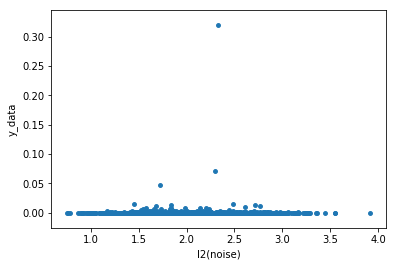

In [158]:
res1, mu1 = result_real_data("tournesol_datasets1") #dir1
plot_y_noise(res1)

0 || 0.5000002734381925 || 3.493914631089352
0 || 0.50000039944953 || 2.353840216440746
0 || 0.5000004534085177 || 1.8430184159634613
1 || 0.5000004156586213 || 2.1194425088831794
2 || 0.5000005214645015 || 2.075470782958052
3 || 0.5000004874349026 || 2.407790408907275
3 || 0.5000005302317867 || 2.045773676862053
3 || 0.500000380841126 || 1.8407597445285524
3 || 0.5000004507102945 || 1.9887986854629511
3 || 0.500000480133955 || 1.78103288414038
3 || 0.5000005099929203 || 1.848971131804201
3 || 0.5000004392818912 || 1.601513439245825
3 || 0.5000005823707079 || 1.4380955758241625
4 || 0.5000006432792529 || 2.024265112002916
5 || 0.5000004536136315 || 1.781707706358987
5 || 0.500000461872975 || 1.5540422846794038
7 || 0.5000005420718655 || 1.7067052323049547
8 || 0.5000004706047274 || 2.1940856153908
8 || 0.5000002416456912 || 2.2672558938962664
8 || 0.5000004155526138 || 1.8720654047446104
9 || 0.5000003101997078 || 2.7992975596807628
10 || 0.5000003654691337 || 1.7550215075051863
10 || 

72 || 0.5000005866263084 || 1.5994023081028377
73 || 0.5000004408733857 || 1.114775089286836
73 || 0.500000416064886 || 1.8848341225749896
73 || 0.5000004782565125 || 1.4122069224447562
73 || 0.5000004141975246 || 2.292568549533777
73 || 0.5000004318910717 || 1.8499070276554312
74 || 0.5000005137888451 || 1.6219948097764687
74 || 0.5000004051617635 || 2.455257444844661
74 || 0.50000049588895 || 1.9202146789588757
74 || 0.5000003225995455 || 2.1091836678326232
75 || 0.5000005397379429 || 1.2313312137466164
75 || 0.5000004334256969 || 1.6899279429607816
75 || 0.5000004211251488 || 1.2851942376354426
75 || 0.5000004420231592 || 1.7284664637991027
75 || 0.500000488658306 || 2.393391611230265
75 || 0.5000004894490848 || 1.6737044022396064
75 || 0.5000005229726182 || 1.8839812781897411
77 || 0.5000003924518458 || 1.851136647310791
77 || 0.5000004497904892 || 2.331891206565999
78 || 0.500000326522733 || 1.424089003771297
78 || 0.5000003991028265 || 1.9919202142127082
78 || 0.5000003193213534 

128 || 0.5000003442724799 || 2.0797869674837646
129 || 0.5000004638277088 || 1.8364913589813308
129 || 0.5000003322157152 || 2.300933152210386
129 || 0.5000004594607212 || 1.789410266940221
129 || 0.500000578052991 || 2.2568279059529464
129 || 0.500000556757849 || 2.214629278227835
129 || 0.5000005414879666 || 1.494139654120749
129 || 0.5000004999877128 || 2.001126872917874
129 || 0.5000005799161018 || 2.0148449613991906
129 || 0.5000004005868376 || 2.6460671611150377
129 || 0.5000006644678024 || 2.0418594310024147
129 || 0.5000003959718528 || 1.6776370150492628
129 || 0.5000005342391753 || 1.896129796193414
130 || 0.5000003372685278 || 2.1197317697282063
132 || 0.5000005167835152 || 2.523580347943116
132 || 0.500000669669001 || 1.9625685357500744
133 || 0.5000003448832762 || 1.7069473364200818
133 || 0.5000003698249832 || 0.9864266473827236
133 || 0.5000003876090617 || 3.210181827093027
133 || 0.5000004732423277 || 2.515066600025032
133 || 0.5000006063624844 || 1.4566301545125349
134 

153 || 0.5000005270597645 || 1.7491469019008175
153 || 0.5000005073221481 || 1.7825334722794202
153 || 0.5000003470726858 || 2.484629329704688
153 || 0.5000003474980332 || 1.919111580287743
153 || 0.5000004690324914 || 1.4245599386326306
153 || 0.5000004434014554 || 2.3714026253981157
153 || 0.5000003618458371 || 1.8951373009513768
153 || 0.5000004319871305 || 2.2892181600894994
153 || 0.5000004933371319 || 1.5990819479059577
153 || 0.5000003415176882 || 2.2751353891991477
153 || 0.5000004139849058 || 1.5159841942168888
153 || 0.5000003923088723 || 2.1290652197490836
153 || 0.500000415517096 || 2.4431628111032313
153 || 0.5000006201630196 || 1.841616852371857
153 || 0.5000004070118604 || 2.097268086018724
154 || 0.5000004844461992 || 2.3065973149807393
154 || 0.5000002821542936 || 2.2966825031957274
154 || 0.5000003036495648 || 2.129059303389748
154 || 0.5000004342545135 || 2.138556740928009
154 || 0.5000003755611933 || 2.161776699064727
155 || 0.5000005408689301 || 2.061129049003853
1

162 || 0.5000004845868331 || 2.603641411585484
162 || 0.5000003523572991 || 2.72714018913508
162 || 0.500000349176543 || 1.8983177181617823
162 || 0.500000371620177 || 2.75642828580855
162 || 0.5000004307973751 || 2.4565754000491444
162 || 0.5000003922826212 || 3.070740999744066
162 || 0.5000003012616093 || 2.4342062461342957
162 || 0.5000004803675715 || 2.1030257768003606
162 || 0.5000003919618666 || 2.3272792151413935
162 || 0.5000003883650007 || 1.837952959305533
162 || 0.5000003321763972 || 2.171075664313892
162 || 0.5000003660523002 || 1.5457512781414868
162 || 0.5000002653238973 || 2.17741975908352
162 || 0.5000004742119003 || 1.6807005425287111
162 || 0.5000005475977729 || 1.6492923834021171
162 || 0.5000003281503317 || 1.7284345201644384
162 || 0.5000003834106097 || 2.4882673722907094
162 || 0.5000003802224714 || 2.053099214406851
162 || 0.5000005413848361 || 1.923256480915049
162 || 0.5000004005021214 || 1.7037920716796273
162 || 0.5000004610238342 || 1.5809790447047134
162 ||

189 || 0.500000549340502 || 2.409084251294958
189 || 0.5000007420495659 || 2.344814702592628
190 || 0.5000004492149014 || 2.3091489427294922
190 || 0.5000003408522667 || 3.1582948058129667
191 || 0.5000004053044558 || 1.2717921059708923
191 || 0.5000004082604662 || 1.3686969653503733
192 || 0.5000004703011464 || 2.115793367142961
195 || 0.5000004972858981 || 2.5975176858370235
196 || 0.5000004648005738 || 1.7509129555120322
196 || 0.5000002983970055 || 1.9189627021858418
197 || 0.5000003909496468 || 2.0378199942565436
199 || 0.500000605756984 || 1.7261139197440374
200 || 0.5000004549425193 || 2.4799660176475102
201 || 0.5000004669657393 || 1.3088716349246738
201 || 0.5000003612495477 || 2.4345092951436964
201 || 0.500000591474231 || 2.030279319973938
202 || 0.5000004050371484 || 1.7360760197406013
202 || 0.5000003916596156 || 2.9343795913730957
202 || 0.5000004657234073 || 2.0009155880493075
202 || 0.5000004518289551 || 1.8470418354411762
202 || 0.5000003868775056 || 2.9167013035782117

262 || 0.5000004075354598 || 2.8052485948579027
262 || 0.5000003652847598 || 2.2053173130145165
262 || 0.5000003280163104 || 2.1488363948609908
262 || 0.5000003587062317 || 1.760203920545537
262 || 0.5000005430513281 || 2.3657974928770122
262 || 0.5000005369183648 || 0.9382400845840879
262 || 0.5000003774583031 || 2.8771151660440193
262 || 0.5000004015256232 || 1.810399103256493
262 || 0.5000004504554241 || 1.9124158263436586
262 || 0.5000005130125599 || 0.9674513246889107
262 || 0.5000003572582439 || 1.9612703305189554
262 || 0.5000003895801542 || 2.7901394949170975
262 || 0.5000003104187202 || 1.8769441178515591
262 || 0.5000003658729671 || 1.5256508938055713
262 || 0.5000004348025019 || 1.4898956391194094
262 || 0.5000005916754827 || 1.8787243479957934
262 || 0.5000004170347438 || 1.5649937032463082
262 || 0.5000003997918816 || 1.6715085968816685
262 || 0.5000003141449522 || 2.4792819959141035
262 || 0.500000343195959 || 2.236736900780764
262 || 0.5000003474974465 || 2.5204527594980

274 || 0.5000004102121668 || 1.8448007121643186
274 || 0.5000004699247271 || 1.9534129684907704
276 || 0.5000005584479811 || 2.870405801442282
276 || 0.50000064702131 || 1.6712305831711955
277 || 0.5000004051626291 || 1.8854053911417472
277 || 0.5000004411489211 || 1.9908916803477585
277 || 0.500000404046377 || 2.186273299624512
277 || 0.5000003354221649 || 2.3555791109416497
277 || 0.50000052739604 || 1.5948760330308518
277 || 0.5000004790905531 || 1.9859369875265194
277 || 0.5000003711538823 || 2.0003573915555646
277 || 0.5000004681892829 || 1.7497847075424426
277 || 0.5000003658354121 || 2.4801370248290446
277 || 0.5000003589439552 || 2.4451257976052267
277 || 0.5000002565580765 || 2.4526773546594445
277 || 0.5000004158018095 || 1.0722387166542267
277 || 0.5000005063881683 || 2.0361810745561497
277 || 0.5000005973311559 || 2.4783622657007007
277 || 0.5000003787254185 || 1.2116757848665158
277 || 0.5000005419452866 || 1.7931553593843277
277 || 0.5000003712333663 || 1.7300533048934927

350 || 0.5000003778217276 || 1.8199015094817874
350 || 0.5000003839591268 || 1.5480034458928527
350 || 0.5000003902586831 || 2.371619637629167
351 || 0.5000005519633501 || 1.3610825044776853
351 || 0.5000005889102245 || 1.8461649028326854
351 || 0.5000003952194221 || 2.3216984920606647
351 || 0.5000003643009217 || 1.895055281641881
351 || 0.5000005316408255 || 1.4149945966149695
352 || 0.5000003634464846 || 1.8810546793080312
352 || 0.5000004658943225 || 1.32491639381252
352 || 0.5000005029369625 || 1.552331260571428
352 || 0.5000003043889888 || 2.4734098154589614
352 || 0.5000003506292815 || 2.009239215654922
352 || 0.5000003519749965 || 2.199629493499479
352 || 0.5000003666240271 || 1.9645347543427059
352 || 0.500000462682134 || 1.9490449665869316
354 || 0.5000005081119248 || 1.8887889104386713
354 || 0.5000004179225064 || 1.2996551616029155
357 || 0.5000004329046664 || 1.525547910732323
357 || 0.500000510083942 || 1.673107448374717
358 || 0.5000003736339728 || 1.8830273490429779
360

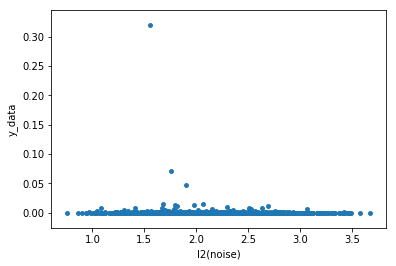

In [159]:
res2, mu2 = result_real_data("tournesol_datasets2") # dir 2
plot_y_noise(res2) 

0 || 0.5000005959934004 || 11.569366276673145
0 || 0.5000007069342306 || 11.992890699496408
0 || 0.5000006995398357 || 11.385253814097839
1 || 0.5000006044008821 || 11.589064234560736
2 || 0.5000006899077098 || 11.81687747488926
3 || 0.5000006502980385 || 11.675213049342677
3 || 0.5000007742821717 || 11.07623471711446
3 || 0.5000007820930313 || 11.68409407620588
3 || 0.500000795488988 || 11.67511784989254
3 || 0.5000005867826008 || 11.99969490013664
3 || 0.5000007058866137 || 12.036146351481849
3 || 0.5000007989842399 || 11.530512696815526
3 || 0.5000006767066754 || 11.726422917636752
3 || 0.5000007593386884 || 11.671139370321972
4 || 0.5000004590262477 || 11.766802724420254
5 || 0.5000007068333321 || 11.687509470535147
5 || 0.5000008221416076 || 11.491896948490723
7 || 0.5000006318038198 || 11.656886195604944
8 || 0.5000007279237149 || 11.382545146578945
8 || 0.5000005008672948 || 11.516646709542663
8 || 0.5000005167639019 || 12.067571945201465
9 || 0.5000008560518383 || 11.8139873881

69 || 0.5000009101878259 || 11.722682422020306
69 || 0.5000006593375406 || 12.04702735721318
69 || 0.5000007036054697 || 11.1645630667175
69 || 0.5000007080499684 || 11.858757874199494
69 || 0.5000007015064404 || 12.04122531669923
69 || 0.5000006136757521 || 11.787945162137547
70 || 0.5000006153797103 || 11.19541647042034
71 || 0.5000007437394691 || 11.570758631299032
72 || 0.5000005825823827 || 10.731335449953955
72 || 0.5000005076403717 || 11.75032485925727
72 || 0.500000503969696 || 11.227006316040221
72 || 0.500000548675116 || 11.683574194562526
73 || 0.500000764008937 || 11.91932323790566
73 || 0.5000008029959315 || 11.739456007663545
73 || 0.5000006356905047 || 11.635042732303436
73 || 0.5000008671133264 || 11.521763956768117
74 || 0.5000007280059916 || 11.328836420706455
74 || 0.5000008243381886 || 11.262032583296364
74 || 0.5000004941078566 || 11.418830773930324
74 || 0.5000006240554116 || 11.56491413786921
74 || 0.5000005195291114 || 11.586612844381357
74 || 0.5000006423221078

126 || 0.5000006044681387 || 11.579739571035248
127 || 0.5000006977787388 || 11.258836127248305
127 || 0.5000006028783365 || 11.20542295361664
127 || 0.5000007483649501 || 11.211247594639847
127 || 0.5000005603441238 || 11.789570745934775
127 || 0.5000006844148405 || 11.748010540156061
127 || 0.5000006307996222 || 12.020226426805479
127 || 0.5000007692351831 || 11.686192031947536
128 || 0.5000005939858996 || 11.350722352676417
128 || 0.5000006440086252 || 11.677533518382566
128 || 0.500000771538934 || 12.171385828964354
128 || 0.5000007915281812 || 11.438071265995145
128 || 0.5000005772902489 || 11.222421175931418
128 || 0.5000005171525375 || 11.212628444591724
128 || 0.5000005564790149 || 11.833968884627735
128 || 0.5000008027997955 || 11.591240523633543
128 || 0.5000005560003642 || 11.7125218654288
128 || 0.5000005579496907 || 11.410941122460294
128 || 0.5000006175759689 || 12.178675402529999
128 || 0.5000006285011972 || 11.791700389269085
128 || 0.5000005629645788 || 12.238105359281

153 || 0.5000005820285995 || 11.327847962010734
153 || 0.5000008322042004 || 11.38877482740951
153 || 0.5000006885022122 || 11.209096817790149
153 || 0.5000006757392678 || 11.910321119969174
153 || 0.5000007241828269 || 11.792695009554375
153 || 0.5000006748631328 || 11.538756306019517
153 || 0.5000006342344786 || 11.28315999577426
153 || 0.5000007655342196 || 10.863454948337624
153 || 0.5000008146859984 || 11.561875354572306
153 || 0.5000006655207075 || 11.139642650323237
153 || 0.5000006472110085 || 11.117136168032612
153 || 0.5000007024911894 || 11.722264863365474
153 || 0.5000007597732005 || 11.923402439756948
153 || 0.5000006319258411 || 11.516315866279081
153 || 0.5000005335517721 || 12.090863100923894
153 || 0.5000006851917687 || 11.66218902929796
153 || 0.5000008077444209 || 11.99739425928745
153 || 0.5000005945455366 || 12.143219613817683
153 || 0.5000006871630758 || 11.426616170315336
153 || 0.5000006515342227 || 11.442477254828606
153 || 0.5000006190011935 || 12.195327526113

163 || 0.5000005879872312 || 11.834199870759823
163 || 0.5000006295662226 || 11.539209137930078
163 || 0.5000006437143061 || 11.690440017029315
163 || 0.5000006755187296 || 12.24981465265602
163 || 0.5000004957737297 || 12.106309021199603
163 || 0.5000006668420405 || 11.580972688163303
163 || 0.5000006715435096 || 11.89725828630153
163 || 0.5000005622265276 || 11.594929080738055
163 || 0.5000006113960694 || 10.967891639349737
163 || 0.5000006586228752 || 11.347627029502092
163 || 0.5000007168329866 || 11.150437136496912
163 || 0.5000006766192188 || 11.424126481286457
163 || 0.5000006446423552 || 11.913618341632642
163 || 0.500000635197887 || 12.14027553304656
163 || 0.5000007301791445 || 11.692286736381062
163 || 0.5000008397738084 || 11.805585135572535
163 || 0.500000619007365 || 11.459423641191568
163 || 0.5000007259454107 || 11.548562734349996
163 || 0.5000006287777932 || 11.157323430345098
163 || 0.500000583708827 || 11.934580755203
163 || 0.5000006272500773 || 11.794490580477584
1

181 || 0.5000006853013498 || 11.666619960684391
181 || 0.5000007534004105 || 11.650877179413072
181 || 0.5000007286755582 || 11.860121052993799
181 || 0.5000006534537077 || 11.731485197762812
181 || 0.5000006381006893 || 11.68816960624774
181 || 0.5000005140782714 || 11.372956157448959
181 || 0.5000008188726918 || 11.820630696602363
181 || 0.5000006614185842 || 11.079988212449607
181 || 0.5000006753473791 || 11.272839909532657
182 || 0.5000005267867607 || 11.782198989797237
182 || 0.5000005905229852 || 11.775015049733977
183 || 0.5000005484619793 || 11.264730427014506
185 || 0.5000007800862519 || 11.318339338050013
185 || 0.5000006217840322 || 12.100921573431979
186 || 0.5000006324517735 || 11.13931810321103
187 || 0.5000006117932653 || 10.982436948677886
189 || 0.5000006356095622 || 11.514368855122699
190 || 0.5000006104538119 || 11.56462751481657
190 || 0.5000005589388543 || 11.854110073653365
191 || 0.5000006759201935 || 11.850052378397839
191 || 0.5000007544640627 || 11.62811957282

262 || 0.5000005291317863 || 12.18668608866968
262 || 0.5000008112107244 || 12.011303738489007
262 || 0.5000006560535228 || 11.25430426604462
262 || 0.5000007791828247 || 11.24772987726868
262 || 0.5000005770413707 || 12.191660733132434
262 || 0.500000531291295 || 11.568958536947457
262 || 0.5000008071041976 || 11.187613145862988
262 || 0.5000006244602545 || 11.289860398476531
262 || 0.5000005461937372 || 11.420846741999195
262 || 0.5000006323870083 || 11.757820993210897
262 || 0.5000006769238409 || 12.388392849872034
262 || 0.5000005716093614 || 11.00794788741997
262 || 0.5000006347269381 || 11.523121775131779
262 || 0.500000701824737 || 11.863392369587157
262 || 0.500000606345493 || 11.741809161962367
262 || 0.500000656069382 || 11.645722669301389
262 || 0.5000005272818506 || 12.199744684521155
262 || 0.5000005415456288 || 11.970806232046312
262 || 0.5000008081033509 || 11.369187942381838
262 || 0.5000006374567939 || 11.152883198539207
262 || 0.5000006013471409 || 11.526013178068544


270 || 0.5000007303186088 || 12.090595361831287
270 || 0.500000607759226 || 11.978602374928988
270 || 0.5000007832195714 || 11.70473225779302
270 || 0.500000720874737 || 11.221613035426978
270 || 0.500000561522484 || 11.734720868809632
270 || 0.5000005758749086 || 11.046288854756911
270 || 0.500000701572795 || 12.177112695386965
270 || 0.5000006836962659 || 11.457740410073436
270 || 0.5000008967171035 || 11.952829039904035
270 || 0.5000006912646494 || 11.719462689652577
270 || 0.5000005712907084 || 11.081450918875653
270 || 0.5000007198251023 || 11.200883420963264
270 || 0.5000004734614192 || 10.979153963712394
270 || 0.5000007473834485 || 12.094261072180245
272 || 0.5000007387518628 || 11.938532256938307
272 || 0.5000005652382037 || 11.03952603598919
273 || 0.5000004386017874 || 12.173479663034382
273 || 0.5000005378957951 || 10.697169434472055
273 || 0.5000005089798327 || 11.433077536184017
273 || 0.5000006550250232 || 11.441260552462902
274 || 0.5000006030157648 || 11.58353114870071

336 || 0.5000006058145853 || 11.244405893213397
336 || 0.5000006170791084 || 10.869250947118426
337 || 0.5000005490061836 || 12.041616505816613
338 || 0.5000007124629269 || 11.50740863008922
339 || 0.5000006464650895 || 11.286229833834831
340 || 0.5000008312337819 || 11.560763432043847
341 || 0.5000006604161544 || 10.775110333511405
341 || 0.500000603553071 || 12.139562616525478
341 || 0.5000006250640414 || 12.14887025102272
341 || 0.50000056033198 || 11.745743164265816
342 || 0.5000006513285092 || 11.267601635149239
343 || 0.5000005198523726 || 11.532623498486183
344 || 0.5000008490940855 || 11.124127429230759
344 || 0.5000006425790507 || 11.393976565910288
344 || 0.5000007476315054 || 11.599256154153512
345 || 0.5000006782832777 || 11.909036916762494
347 || 0.5000006033831697 || 11.51327836339013
347 || 0.5000008300286366 || 11.906432489353255
347 || 0.5000006577454559 || 11.319450413384063
348 || 0.500000560730592 || 11.684011738206827
349 || 0.5000005515102474 || 11.976192605144346

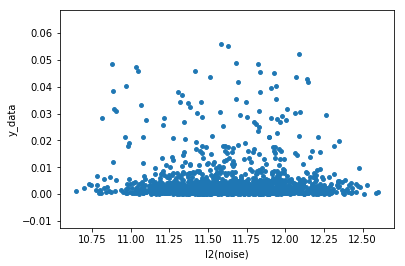

In [160]:
res3, mu3 = result_real_data("tournesol_datasets3") # dir3
plot_y_noise(res3) # 

0 || 0.5000005490308803 || 11.400590431546615
0 || 0.5000007837065207 || 11.525630995586235
0 || 0.500000732039012 || 12.226875161970671
1 || 0.5000007254668605 || 11.564766063724601
2 || 0.5000007636342052 || 11.831149446067267
3 || 0.5000006879981996 || 11.132177086284347
3 || 0.5000005970945297 || 11.049063799122022
3 || 0.5000006467130552 || 11.455836865367033
3 || 0.5000007453938534 || 11.351238712066728
3 || 0.5000007298846091 || 11.432121203826156
3 || 0.5000007037317166 || 12.02928348655514
3 || 0.5000005638443915 || 12.077511716905416
3 || 0.5000007618340641 || 12.020451552546895
3 || 0.5000007616890695 || 11.670059805657658
4 || 0.5000007219925625 || 11.355710369214862
5 || 0.5000007847127215 || 11.678669698157151
5 || 0.5000007391645881 || 11.324297489358699
7 || 0.5000007128890427 || 11.933193191205515
8 || 0.5000006437079831 || 11.822125397269412
8 || 0.5000006982618641 || 11.089172399888712
8 || 0.500000773008094 || 12.043212644094986
9 || 0.5000006589978313 || 11.1619342

68 || 0.5000007596205722 || 11.789846879512261
69 || 0.5000008569160949 || 11.632022247908475
69 || 0.5000006404753892 || 10.922335673560642
69 || 0.5000007283740758 || 11.444497392070401
69 || 0.5000006810766203 || 12.001119941974405
69 || 0.5000005076726053 || 12.071920780935454
69 || 0.5000005516674348 || 11.157722902789592
70 || 0.5000005799545898 || 12.121137302363852
71 || 0.5000004501340098 || 11.556148684412744
72 || 0.5000007684080995 || 11.009388658771993
72 || 0.5000006234936396 || 11.732184665706471
72 || 0.500000613617108 || 11.53232740984367
72 || 0.5000005496943294 || 11.838699953372222
73 || 0.5000007418950854 || 11.896438918424105
73 || 0.5000007091797444 || 11.4800377528386
73 || 0.500000577502007 || 11.143214418694408
73 || 0.5000008595930073 || 11.589764646422882
74 || 0.5000008540406095 || 11.286828278935523
74 || 0.5000007696576543 || 11.629259547516813
74 || 0.5000006968903089 || 11.893117258907596
74 || 0.5000006676381693 || 12.248020619549791
74 || 0.5000006078

126 || 0.5000008007164635 || 11.686116082953042
126 || 0.5000006104739108 || 11.782839822097031
127 || 0.5000008284582426 || 11.601592979362099
127 || 0.5000006080743511 || 11.83759632452776
127 || 0.5000006114681768 || 11.605174057453805
127 || 0.500000908329678 || 11.668005999327688
127 || 0.5000007739436242 || 12.04739529693467
127 || 0.5000006641803487 || 11.556367237856428
127 || 0.5000005667698441 || 11.733362809264241
128 || 0.5000007449769787 || 11.58766325650023
128 || 0.5000006154542598 || 11.304049218130574
128 || 0.5000007853257074 || 11.278402098993599
128 || 0.500000665826048 || 11.890155987466823
128 || 0.5000007713097918 || 11.193455806515384
128 || 0.5000005009160887 || 11.713483623034389
128 || 0.500000687005827 || 11.66150562638997
128 || 0.5000006892274304 || 11.347390804234497
128 || 0.5000007006855357 || 11.548636711362748
128 || 0.5000005410195673 || 11.234521944880491
128 || 0.5000006151663386 || 11.789653555683886
128 || 0.500000721219144 || 11.799809540296076


153 || 0.5000007112977176 || 11.163508609832816
153 || 0.5000007852441103 || 11.434348861492852
153 || 0.5000006264448812 || 12.399578510157035
153 || 0.5000006947881579 || 11.83860252780565
153 || 0.5000007467073442 || 12.081458976978498
153 || 0.5000008805342893 || 11.741933706501506
153 || 0.50000081637135 || 11.540300246136063
153 || 0.5000006743488797 || 11.412415885024371
153 || 0.500000584758968 || 12.175619061396247
153 || 0.5000007122856132 || 11.191372524327157
153 || 0.5000005600176555 || 11.557892849344686
153 || 0.5000006712922567 || 11.089789309705807
153 || 0.5000006687024512 || 11.24419870321181
153 || 0.5000004752599359 || 11.697320755801337
153 || 0.5000006332612479 || 11.775351168403283
153 || 0.5000004404369595 || 12.274567674784093
153 || 0.5000006247544271 || 11.520143580843277
153 || 0.5000008238915188 || 11.18882601526778
153 || 0.5000006237296248 || 11.091964366059294
153 || 0.500000678303131 || 11.476204314295622
153 || 0.5000008455080399 || 11.679869149145942

163 || 0.5000007296316056 || 11.721978297183144
163 || 0.5000005739666348 || 11.207567804735012
163 || 0.5000006818222958 || 12.062643936161592
163 || 0.50000070941988 || 12.045823979864966
163 || 0.5000006663864094 || 11.993978548940824
163 || 0.5000006891341935 || 11.495534383850305
163 || 0.5000006427288546 || 11.642378702351177
163 || 0.5000006159080504 || 12.02305655282762
163 || 0.5000007032666932 || 11.29386303120018
163 || 0.5000005709004386 || 10.847697549671674
163 || 0.5000006506229867 || 11.775744998853687
163 || 0.500000742153245 || 11.068081108786034
163 || 0.5000006796684175 || 11.63974235185733
163 || 0.500000850413704 || 11.444127728347542
163 || 0.5000006479317523 || 11.782570814055449
163 || 0.5000006978198456 || 11.767111492687242
163 || 0.5000008145776591 || 11.70832871304719
163 || 0.5000006949844183 || 12.154242352462136
163 || 0.5000006399253506 || 11.293121272355554
163 || 0.5000006313440271 || 11.568555471791685
163 || 0.5000008214768393 || 12.014204344742184


181 || 0.5000006502755557 || 11.156260119157768
181 || 0.5000007366285512 || 12.045751965954077
181 || 0.5000005499301046 || 11.605507853900088
181 || 0.5000007378949012 || 11.521874243905707
181 || 0.5000007635467645 || 11.764528468941657
181 || 0.5000007365876514 || 11.360248358235602
181 || 0.5000007363099089 || 11.567910211114032
181 || 0.5000005657165867 || 10.788485580485478
181 || 0.5000006707609334 || 11.295985986330223
182 || 0.5000005379878848 || 11.89065736148057
182 || 0.5000007915703226 || 11.734934712923453
183 || 0.5000006212780215 || 11.377380506398035
185 || 0.5000007191332646 || 12.142940956684381
185 || 0.5000007435600986 || 11.708405382818322
186 || 0.5000006271958859 || 11.43313658621773
187 || 0.5000006920920911 || 11.951539937551544
189 || 0.5000005283482551 || 11.6345827257546
190 || 0.5000006356611599 || 11.763583156677745
190 || 0.5000006588695644 || 11.784787000119593
191 || 0.5000006140736162 || 12.068320328152328
191 || 0.5000006704572117 || 11.275432297332

262 || 0.5000006562665615 || 11.763584634390238
262 || 0.5000005575520099 || 11.755213983510334
262 || 0.5000006191937432 || 10.858057071790476
262 || 0.5000005440433825 || 11.461494836132873
262 || 0.5000006027379118 || 11.68841796769723
262 || 0.5000006376475933 || 11.81003625820274
262 || 0.5000007673350826 || 11.457279089254214
262 || 0.5000007823218432 || 11.204397737821083
262 || 0.500000732599077 || 11.94228421558658
262 || 0.5000006110085216 || 12.0440513531357
262 || 0.500000637254553 || 11.917753399965637
262 || 0.5000005777849906 || 12.211796982611324
262 || 0.5000006540268886 || 11.260206774520077
262 || 0.5000009233431296 || 11.9755997659005
262 || 0.500000943848864 || 11.818790323876376
262 || 0.500000745360477 || 11.809541464427591
262 || 0.5000005315212448 || 12.253632534553672
262 || 0.5000006737678179 || 12.230716679942843
262 || 0.5000006751708364 || 11.426545278062077
262 || 0.5000006070047274 || 11.279132696213832
262 || 0.5000006751951119 || 11.372918980491285
262

270 || 0.5000008270726464 || 11.74335106657152
270 || 0.500000693940098 || 11.95473894182708
270 || 0.5000005286722411 || 11.602812787596141
270 || 0.5000004968781485 || 11.075257158369013
270 || 0.5000008824674326 || 11.570700912622751
270 || 0.500000600348836 || 12.114544876239497
270 || 0.5000005748291635 || 11.59407307743372
270 || 0.5000007027835436 || 11.568514083547011
270 || 0.5000006591409253 || 11.476961912710138
270 || 0.5000005238033788 || 11.353062356697466
270 || 0.5000007024524333 || 11.907409663029295
270 || 0.50000075291838 || 12.09460923899451
270 || 0.5000007074118222 || 11.70465753728127
270 || 0.5000006245352394 || 11.746098034055832
270 || 0.5000008612283086 || 11.366654515113314
272 || 0.5000007399297041 || 11.328331763455797
272 || 0.5000005812215442 || 11.406814887642797
273 || 0.5000005742284204 || 11.66878512250452
273 || 0.5000007181962953 || 11.426193340005392
273 || 0.5000006829509386 || 11.803019799947478
273 || 0.5000005967322547 || 12.004993485354383
27

336 || 0.500000537931157 || 11.346763076072856
336 || 0.5000006766869006 || 11.81981027111177
336 || 0.50000056785735 || 11.27425288486164
337 || 0.5000006335964835 || 11.678046320122139
338 || 0.5000007059402486 || 11.832032393839974
339 || 0.5000006540720383 || 11.958603695314036
340 || 0.5000006004045643 || 11.390313661754336
341 || 0.5000006073380809 || 11.784782224588536
341 || 0.5000008802108373 || 11.824003391732363
341 || 0.5000006603546855 || 11.283235936966918
341 || 0.5000005403825507 || 12.152113881922682
342 || 0.5000006619187924 || 11.322253536828397
343 || 0.5000007366374156 || 11.565177596002066
344 || 0.5000007133940059 || 11.230351387042209
344 || 0.5000006709901881 || 11.670935249340273
344 || 0.5000006722018228 || 11.684746918192324
345 || 0.5000006199898576 || 11.507597647968016
347 || 0.5000006510889389 || 12.066897159278016
347 || 0.5000006548981373 || 11.806285054952273
347 || 0.500000622116565 || 10.989407869411892
348 || 0.500000600730012 || 11.388611978131728

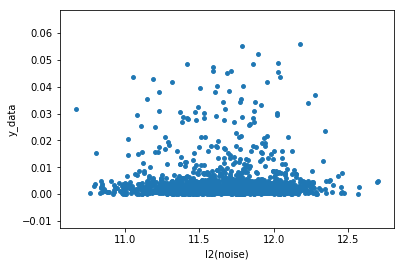

In [161]:
res4, mu4 = result_real_data("tournesol_datasets4") # dir4
plot_y_noise(res4) # 

(0.006986013832543753, 0.8761725882375391)


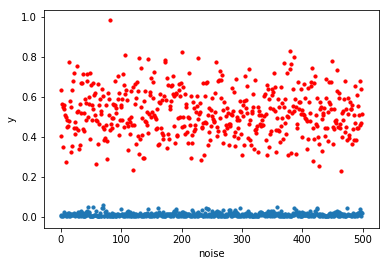

In [70]:
experiment_name = "Adam_1645025812"
y_data = []
pref = 0
# recover data from test_file
with open(f'plots/{experiment_name}/test_{experiment_name}.csv', mode='r', newline='') as csv_data:
    csv_reader = csv.DictReader(csv_data)
    for row in csv_reader:
        y_data += [float(row["y_data"])]

# recover result data from results_name.txt file

with open(f'plots/{experiment_name}/results_{experiment_name}.txt', "r") as text_data:
    count = 0
    vol_arr_users= []
    for line in text_data:
        if count == 0:
            temp = line.strip().split(':')
            temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
            mu = temp.astype(np.float)
        if count == 1:
            temp = line.strip().split(':')
            temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
            cv = temp.astype(np.float)
        if count >= 5 and pref == 0:
            temp = line.strip().split(':')
            temp = np.array(temp[1].strip().split('],')[0].strip().split('([')[1].strip().split(','))
            temp = temp.astype(np.float)
            vol_arr_users += [temp]
        if count >= 5 and pref == 1:
            temp = line.strip().split(':')
            temp = np.array(temp[1].strip().split('],')[1].strip().split('[')[1].strip().split('])')[0].strip().split(','))
            temp = temp.astype(np.float)
            vol_arr_users += [temp]
        count += 1
cv = cv * np.eye(len(mu))
y = []
for i in range(0, len(y_data), 9):
    y += [y_data[i] / np.sqrt(np.sum(np.array(y_data) ** 2))]

noises = sc.random.multivariate_normal(mean=mu, cov=cv, size=500)
noises = [np.linalg.norm(n) / 9 for n in noises]
from scipy import stats
print(stats.pearsonr(y, noises))
plt.scatter(np.arange(500), y, s=10)
plt.scatter(np.arange(500), noises, c='red', s=10)

plt.xlabel("noise")
plt.ylabel("y")
plt.show()

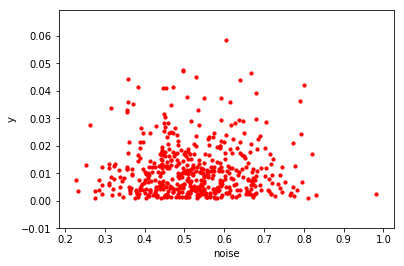

In [72]:
plt.scatter(noises, y, c='red', s=10)

plt.xlabel("noise")
plt.ylabel("y")
plt.show()

In [30]:
def v4_prepare_data_from_files(experiment_name, vol_factor, pref=0):
    user_vol_dic = []
    uid_vol_arr = []
    rating_arr =[]
    weights_arr = []
    one_vol_list = []
    y_data = []

    # recover data from test_file
    with open(f'plots/{experiment_name}/test_{experiment_name}.csv', mode='r', newline='') as csv_data:
        csv_reader = csv.DictReader(csv_data)
        for row in csv_reader:
            uid_vol_arr += [int(row["user_ID"])]
            rating_arr += [float(row["rating"])]
            one_vol_list += [float(row["volition"])]
            weights_arr += [float(row["weight"])]
            y_data += [float(row["y_data"])]


    assert len(uid_vol_arr) == len(rating_arr) == len(one_vol_list) == len(weights_arr)



    test_vol_dic = [[uid_vol_arr[i], rating_arr[i], weights_arr[i], one_vol_list[i], y_data[i]] 
                    for i in range(len(uid_vol_arr))]
    # recover result data from results_name.txt file
    
    with open(f'plots/{experiment_name}/results_{experiment_name}.txt', "r") as text_data:
        count = 0
        vol_arr_users= []
        for line in text_data:
            if count == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                mu = temp.astype(np.float)
            if count == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                cv = temp.astype(np.float)
            if count >= 5 and pref == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[0].strip().split('([')[1].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users += [temp]
            if count >= 5 and pref == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[1].strip().split('[')[1].strip().split('])')[0].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users += [temp]
            count += 1
    # exploit results and generate metrics
    nb_criteria = len(mu)
    cv = cv * np.eye(len(mu))
    user_accuracy = []
    cnt = 0
    nb_vol_gt = 0
    tp, tn, fp, fn = 0, 0 , 0, 0
    ttp, ttn, tfp, tfn = 0, 0, 0, 0
    cnt = 0
    #print(" max_proba_rating || test_vol_gt || model_vol_pred || volition_accuracy")
    y_arr = []
    noises_arr = []
    for i in range(0, len(test_vol_dic), nb_criteria):
        uid = test_vol_dic[i][0]
        r2 = [test_vol_dic[i + j][1] for j in range(0, nb_criteria)]
        r2 = rescale_rating(r2)
        weight = [test_vol_dic[i + j][2] for j in range(0, nb_criteria) ] 
        vol = int(test_vol_dic[i][3])
        print(vol, "    ", test_vol_dic[i])
        y_data = test_vol_dic[i][4]
        normalized_y_data = y_data / np.sqrt(np.sum(np.array(test_vol_dic)[:,4] ** 2))
        noises = sc.random.multivariate_normal(mean=mu, cov=cv, size=1000)
        user_pref = vol_arr_users[uid] + noises
        bradely = [1/(1+np.exp(-sum(weight) * np.matmul(user_pref[i], r2))) for i in range(len(user_pref))]
        y = [sc.stats.expon.pdf(normalized_y_data, loc=0.5, scale=np.linalg.norm(noises[i])) for i in range(len(noises))]
        proba_noises = [sc.stats.multivariate_normal.pdf(i, mean=mu, cov=cv) for i in noises]
        assert len(bradely) == len(y) == len(proba_noises)
        dens = [sc.special.expit(bradely[i] * y[i] * proba_noises[i]) for i in range(len(noises))]
        #dens = [1/(1+np.exp(-weight * i * r2[0])) for i in user_pref]
        max_index = np.argmax(np.array(dens))
        y_arr += [normalized_y_data]
        #print(vol_arr_users[uid], user_pref[max_index])
        quotient = np.linalg.norm(noises[max_index]) / nb_criteria 
        print(dens[max_index])
        noises_arr += [quotient]

        #if bradely[max_index] > 0.5:
        vol_positif = 0

        print(quotient)
        if quotient <= vol_factor:
            if vol == 1:
                ttp += 1
                vol_positif = 1
            else:
                tfp += 1
        else:
            if vol == 0:
                ttn += 1
            else:
                tfn += 1
            
        if dens[max_index] >= 0.5:
            if quotient <= vol_factor:
                if vol == 1:
                    tp += 1
                else:
                    fp += 1
            else:
                if vol == 0:
                    tn += 1
                else:
                    fn += 1

            
            if vol == 1:
                nb_vol_gt += 1
        #print(bradely[max_index], proba_noises[max_index], y[max_index])
        print(f"{uid} || {dens[max_index]} || {vol} || {vol_positif} ")
        
    print("tp=",tp,"fp=",fp,"fn=",fn,"tn=",tn)
    print("ttp=",ttp,"tfp=",tfp,"tfn=",tfn,"ttn=",ttn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    tprecision = ttp / (ttp + tfp)
    trecall = ttp / (ttp + tfn)
    taccuracy = (ttp + ttn) / (ttp + ttn + tfp + tfn)
    
    nb_vol_gt = nb_vol_gt / (len(test_vol_dic))
    
    print(precision, recall, accuracy)
    print(tprecision, trecall, taccuracy)
    print("_____________________________________________________________\n")
    return (precision, recall, accuracy), (tprecision, trecall, taccuracy), y_arr, noises_arr

In [73]:
a57, b57, y_arr57, n_arr57 = v4_prepare_data_from_files('Adam_1645195606', 0.5)


0      [0, 1.545819650462077, 0.0, 0.0, 98556.18637831506]
0.5
0.6000607237324199
0 || 0.5 || 0 || 0 
1      [0, 11.012229000560492, 1.0, 1.0, 167808.25136290165]
0.5
0.3325466034564177
0 || 0.5 || 1 || 1 
1      [0, 44.36662463832186, 0.0, 1.0, 577552.8579774183]
0.5
0.40141299651823326
0 || 0.5 || 1 || 1 
0      [0, 43.185468681878774, 0.0, 0.0, 249761.25450830776]
0.5
0.4649481763217406
0 || 0.5 || 0 || 0 
1      [0, 75.5463219897506, 0.0, 1.0, 1874473.920214763]
0.5
0.571049393129035
0 || 0.5 || 1 || 0 
0      [1, 52.36175165503142, 0.1, 0.0, 258537.28073705308]
0.5
0.43541787995273573
1 || 0.5 || 0 || 0 
1      [1, 71.46350208445878, 1.0, 1.0, 615308.7519450705]
0.5
0.43052061092601485
1 || 0.5 || 1 || 1 
1      [1, 23.040853213301503, 0.1, 1.0, 700363.6123078455]
0.5
0.43922223776368846
1 || 0.5 || 1 || 1 
1      [1, 65.9176879602675, 1.0, 1.0, 458691.38915588707]
0.5
0.5866469925827889
1 || 0.5 || 1 || 0 
1      [1, 77.38896292290012, 0.5, 1.0, 930984.7882960032]
0.5
0.321708346

0.5
0.5813183724374626
15 || 0.5 || 1 || 0 
1      [16, 24.78059086100949, 0.0, 1.0, 1578228.9865946278]
0.5
0.6441962869962412
16 || 0.5 || 1 || 0 
0      [16, 46.665642736147404, 0.0, 0.0, 196013.01561561914]
0.5
0.47785922707992906
16 || 0.5 || 0 || 0 
0      [16, 34.97533920877898, 0.0, 0.0, 1320328.8576246998]
0.5
0.5322161442174946
16 || 0.5 || 0 || 0 
1      [16, 50.79136553019939, 0.1, 1.0, 172033.96553718013]
0.5
0.3681512790524203
16 || 0.5 || 1 || 1 
1      [16, 1.2351002658077703, 0.0, 1.0, 498176.7838158117]
0.5
0.36972747331172395
16 || 0.5 || 1 || 1 
1      [17, 78.09345936425203, 0.1, 1.0, 1334507.3376165137]
0.5
0.3372119950171321
17 || 0.5 || 1 || 1 
1      [17, 28.85554436638995, 1.0, 1.0, 1396468.8069371781]
0.5
0.28832503329024
17 || 0.5 || 1 || 1 
1      [17, 77.3552401449421, 1.0, 1.0, 222505.2885628418]
0.5
0.40671158470926777
17 || 0.5 || 1 || 1 
1      [17, 57.357602996149346, 0.0, 1.0, 255574.69678758283]
0.5
0.30532104803137616
17 || 0.5 || 1 || 1 
1      [1

0.5
0.4598861811688539
31 || 0.5 || 0 || 0 
0      [31, 25.23831611214406, 0.0, 0.0, 148677.42058572097]
0.5
0.36556879170833834
31 || 0.5 || 0 || 0 
1      [32, 49.1221672088268, 0.0, 1.0, 85834.41798161212]
0.5
0.5642355614697003
32 || 0.5 || 1 || 0 
1      [32, 16.005305390166935, 1.0, 1.0, 260661.46307797718]
0.5
0.46884613564870126
32 || 0.5 || 1 || 1 
1      [32, 8.84876573536451, 1.0, 1.0, 360980.9171009037]
0.5
0.47005153333110195
32 || 0.5 || 1 || 1 
1      [32, 46.0085627354287, 1.0, 1.0, 411642.9608940503]
0.5
0.44823122692085415
32 || 0.5 || 1 || 1 
1      [32, 43.63184544409518, 0.0, 1.0, 64813.78055557222]
0.5
0.38047563827027653
32 || 0.5 || 1 || 1 
1      [33, 55.708805625577895, 0.5, 1.0, 91380.62302745895]
0.5
0.26226287084251776
33 || 0.5 || 1 || 1 
0      [33, 30.853084775528828, 1.0, 0.0, 232742.23885551645]
0.5
0.299060812004152
33 || 0.5 || 0 || 0 
1      [33, 81.7472582428848, 0.0, 1.0, 522129.0877876467]
0.5
0.5159601268349402
33 || 0.5 || 1 || 0 
1      [33, 5

0.5
0.397608364819172
47 || 0.5 || 0 || 0 
0      [47, 43.0562306081124, 0.1, 0.0, 216896.2114490247]
0.5
0.33897646579051044
47 || 0.5 || 0 || 0 
1      [47, 11.677891099075023, 0.1, 1.0, 152588.06843142083]
0.5
0.4452963808290112
47 || 0.5 || 1 || 1 
0      [48, 99.30231705131821, 0.0, 0.0, 246292.0025512365]
0.5
0.4548642407235685
48 || 0.5 || 0 || 0 
0      [48, 83.4016044948302, 0.0, 0.0, 785924.9384090801]
0.5
0.5123888016343302
48 || 0.5 || 0 || 0 
0      [48, 9.444004931245226, 1.0, 0.0, 793401.7926469087]
0.5
0.5822094149299893
48 || 0.5 || 0 || 0 
0      [48, 58.513405427470076, 1.0, 0.0, 1925062.2107186515]
0.5
0.6811226803395822
48 || 0.5 || 0 || 0 
1      [48, 34.306262878765025, 0.0, 1.0, 439719.8739017508]
0.5
0.48158256790199405
48 || 0.5 || 1 || 1 
0      [49, 96.94106518394679, 0.0, 0.0, 84450.0892741094]
0.5
0.5700663709594964
49 || 0.5 || 0 || 0 
1      [49, 32.28072002441616, 1.0, 1.0, 1647907.4655425143]
0.5
0.33414199333375866
49 || 0.5 || 1 || 1 
1      [49, 56.

0.5
0.4123403729362106
63 || 0.5 || 1 || 1 
1      [63, 91.93773647928626, 0.5, 1.0, 1369653.2517999653]
0.5
0.3515846660077914
63 || 0.5 || 1 || 1 
0      [63, 16.776263736758285, 1.0, 0.0, 1311245.041936229]
0.5
0.2746064239889562
63 || 0.5 || 0 || 0 
1      [63, 24.871115875681344, 0.0, 1.0, 565214.6184961044]
0.5
0.2950044756233912
63 || 0.5 || 1 || 1 
1      [64, 37.30203701812048, 0.1, 1.0, 308073.35885101]
0.5
0.6068519511085037
64 || 0.5 || 1 || 0 
0      [64, 67.20586971074759, 0.1, 0.0, 254709.08573030648]
0.5
0.3767883975677934
64 || 0.5 || 0 || 0 
1      [64, 80.17283057134941, 0.0, 1.0, 454536.8387969876]
0.5
0.2629413574886692
64 || 0.5 || 1 || 1 
1      [64, 87.05605834007402, 0.1, 1.0, 162464.96026982146]
0.5
0.38366421345348467
64 || 0.5 || 1 || 1 
0      [64, 29.726146337215376, 0.5, 0.0, 383939.49254585983]
0.5
0.5415125953803792
64 || 0.5 || 0 || 0 
0      [65, 80.35684266070389, 1.0, 0.0, 132307.25668764306]
0.5
0.4427649555341275
65 || 0.5 || 0 || 0 
1      [65, 8

0.5
0.5216996109066689
79 || 0.5 || 1 || 0 
1      [79, 57.55688178429966, 0.0, 1.0, 158937.3928089026]
0.5
0.4920532122776538
79 || 0.5 || 1 || 1 
1      [79, 91.01194366950276, 1.0, 1.0, 148365.66987571944]
0.5
0.5020961804836332
79 || 0.5 || 1 || 0 
1      [79, 81.58531434581843, 1.0, 1.0, 531984.8330997567]
0.5
0.5922193080648419
79 || 0.5 || 1 || 0 
1      [79, 99.50657599528536, 0.5, 1.0, 145242.2866445784]
0.5
0.5293025221129315
79 || 0.5 || 1 || 0 
1      [80, 77.60550289567195, 0.1, 1.0, 1031369.5863499264]
0.5
0.483311537562573
80 || 0.5 || 1 || 1 
1      [80, 6.39808731236331, 0.0, 1.0, 278841.2177382113]
0.5
0.636521101663271
80 || 0.5 || 1 || 0 
0      [80, 69.33636544309608, 0.1, 0.0, 795731.0463826607]
0.5
0.4368891862189377
80 || 0.5 || 0 || 0 
1      [80, 28.736465102334474, 0.0, 1.0, 226252.53277785142]
0.5
0.4880767775200689
80 || 0.5 || 1 || 1 
1      [80, 49.71813905878136, 0.1, 1.0, 1143429.2361384912]
0.5
0.3483874366180243
80 || 0.5 || 1 || 1 
0      [81, 88.119

0.5
0.4540958690878923
94 || 0.5 || 1 || 1 
1      [95, 37.49383093642237, 1.0, 1.0, 1686046.2298587589]
0.5
0.6079657935676511
95 || 0.5 || 1 || 0 
1      [95, 99.80323813339618, 0.5, 1.0, 127036.22797257095]
0.5
0.4502066289249581
95 || 0.5 || 1 || 1 
1      [95, 1.3864225803553898, 0.5, 1.0, 236675.46334786926]
0.5
0.38207133268292154
95 || 0.5 || 1 || 1 
1      [95, 27.952785092872073, 1.0, 1.0, 349725.2518691939]
0.5
0.45734939797828034
95 || 0.5 || 1 || 1 
1      [95, 25.353173668159158, 0.1, 1.0, 2336338.0547016035]
0.5
0.5364151419980331
95 || 0.5 || 1 || 0 
1      [96, 17.40965309323692, 0.0, 1.0, 618919.6345911812]
0.5
0.6452208325214646
96 || 0.5 || 1 || 0 
1      [96, 33.07240212728969, 1.0, 1.0, 543497.0787030186]
0.5
0.34892244196235067
96 || 0.5 || 1 || 1 
1      [96, 80.32019312381215, 0.0, 1.0, 353729.0922828606]
0.5
0.4932930202972806
96 || 0.5 || 1 || 1 
1      [96, 53.34892258948988, 0.0, 1.0, 70678.90240419052]
0.5
0.5832441176697026
96 || 0.5 || 1 || 0 
1      [96

(0.7095808383233533, 0.6752136752136753, 0.578) (0.7095808383233533, 0.6752136752136753, 0.578)


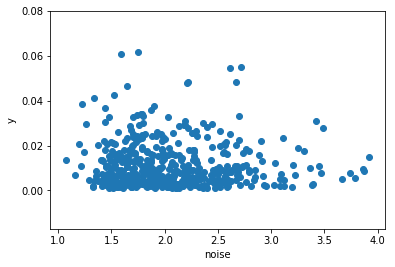

In [74]:
print(a57, b57)
#n_arr55 = [1/n for n in n_arr57]
plt.scatter(n_arr55, y_arr57)
plt.xlabel("noise")
plt.ylabel("y")
plt.show()

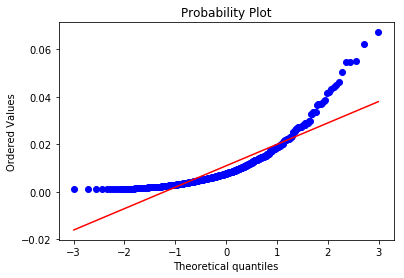

In [40]:
import numpy as np 
import pylab 
import scipy.stats as stats
stats.probplot(y_arr57, plot=pylab)
pylab.show()

In [29]:
a11, b11, y_arr11, n_arr11 = v4_prepare_data_from_files('Adam_1642256016', 0.5)
print(a11, b11)

1      [0, 57.57432694963816, 1.0, 1.0, 3.492378600277473]
0.3146065300444034
0 || 0.5097763691607106 || 1 || 1 
0      [0, 26.826464977723006, 1.0, 0.0, 0.5232189872854337]
1.1871317285480556
0 || 0.5585543484489686 || 0 || 0 
0      [0, 58.025870933378776, 0.1, 0.0, 2.2274804913984947]
0.5311878287067029
0 || 0.5153338052111953 || 0 || 0 
1      [0, 73.50425216867586, 0.0, 1.0, 1.919489279332642]
0.5580993880689143
0 || 0.5093626910048794 || 1 || 0 
0      [0, 92.9862151814926, 1.0, 0.0, 1.5862867099632554]
0.6510201466687098
0 || 0.522872298170702 || 0 || 0 
1      [1, 45.5304646888645, 1.0, 1.0, 66.18391230223668]
0.02035589044851467
1 || 0.5003157850563653 || 1 || 1 
0      [1, 19.20478769346409, 0.0, 0.0, 1.6464874897248598]
0.6323803399745905
1 || 0.5110083495932328 || 0 || 0 
0      [1, 27.173477338710207, 1.0, 0.0, 1.174327401662274]
0.8164128001908812
1 || 0.5308621967298776 || 0 || 0 
1      [1, 53.72471018156254, 0.1, 1.0, 3.470089655113327]
0.38241209215814
1 || 0.50853439

1.021248103182911
14 || 0.5426040590206598 || 0 || 0 
0      [14, 83.2861548510015, 0.5, 0.0, 0.7456644956841386]
1.0481663782991806
14 || 0.5457584189216267 || 0 || 0 
0      [14, 87.50209464676027, 0.1, 0.0, 0.6943965330162145]
1.0736456677246515
14 || 0.5482952719561685 || 0 || 0 
0      [15, 18.80894899108459, 0.5, 0.0, 4.600351601134457]
0.24047047831133433
15 || 0.5071091595891626 || 0 || 0 
0      [15, 96.92687334297587, 1.0, 0.0, 1.6620370700660099]
0.631117016231118
15 || 0.521790360351019 || 0 || 0 
0      [15, 68.11147497349653, 0.0, 0.0, 0.7522500596683115]
1.0385480229166928
15 || 0.5227727367784132 || 0 || 0 
0      [15, 96.19928118740324, 0.0, 0.0, 1.0994198261892203]
0.8541261702367816
15 || 0.5164363354925611 || 0 || 0 
0      [15, 46.573892767593776, 0.0, 0.0, 1.3596717826159601]
0.7346689246434934
15 || 0.5133860248585602 || 0 || 0 
0      [16, 55.34870553750946, 0.1, 0.0, 2.1592606519546464]
0.5643550830869858
16 || 0.5155601561426875 || 0 || 0 
0      [16, 66.41229

0.3693766326580129
28 || 0.5059058627422063 || 0 || 0 
0      [28, 7.260520411968107, 1.0, 0.0, 1.1409039726476213]
0.8408943976115508
28 || 0.5316219698791332 || 0 || 0 
0      [29, 17.589908366287364, 0.5, 0.0, 0.6865555285528762]
1.0831694669981535
29 || 0.5486861321921429 || 0 || 0 
0      [29, 83.04209215756295, 0.5, 0.0, 2.2056412885372083]
0.48961557712172493
29 || 0.5161238167202425 || 0 || 0 
1      [29, 15.564061660079664, 0.5, 1.0, 3.8959553095151125]
0.4116608775034642
29 || 0.5066541168234275 || 1 || 1 
0      [29, 8.61139284173294, 0.5, 0.0, 3.4446082288069433]
0.4552478665611413
29 || 0.5068795180551595 || 0 || 0 
0      [29, 99.2141123032552, 0.0, 0.0, 0.7324855556219658]
1.0516898574891087
29 || 0.5232476218218436 || 0 || 0 
0      [30, 11.707916500440508, 0.0, 0.0, 2.764096997902179]
0.3947211477462821
30 || 0.5063098331028101 || 0 || 0 
1      [30, 26.063365272265642, 0.1, 1.0, 7.21527937868607]
0.16975385900550527
30 || 0.5028678592045691 || 1 || 1 
1      [30, 43.8

0.43673517031055675
43 || 0.5139562615577843 || 0 || 0 
0      [43, 33.36506540539164, 0.0, 0.0, 0.6178326838185945]
1.1252906377705356
43 || 0.5263336683756306 || 0 || 0 
0      [43, 17.579332083479944, 0.5, 0.0, 0.9492099780560208]
0.9268426345018008
43 || 0.5374911103225746 || 0 || 0 
0      [43, 37.27447537700473, 0.1, 0.0, 0.6210910637977523]
1.1466901731452703
43 || 0.5517807222723323 || 0 || 0 
0      [43, 26.81713769520827, 0.5, 0.0, 0.8410057423024263]
0.9868851647150483
43 || 0.5415611406135714 || 0 || 0 
0      [44, 49.929633245937445, 0.5, 0.0, 1.8579432415605328]
0.5703107798364904
44 || 0.5193785018719488 || 0 || 0 
0      [44, 22.826630502820265, 0.1, 0.0, 1.2350794813410264]
0.9125193927178858
44 || 0.5256410261318555 || 0 || 0 
0      [44, 24.254580845517758, 0.1, 0.0, 0.8500460919215456]
1.0866424063947042
44 || 0.5380326235080771 || 0 || 0 
0      [44, 8.517786796036269, 0.5, 0.0, 0.6711748611429833]
1.1133960666194942
44 || 0.549059028655139 || 0 || 0 
0      [44, 5

0.5775136032011873
57 || 0.5196087669607825 || 0 || 0 
1      [57, 22.0047215458824, 0.5, 1.0, 1.9161475485634873]
0.5651936572140558
57 || 0.5186877532959973 || 1 || 0 
0      [57, 67.82657104600196, 0.5, 0.0, 0.7162402939257805]
1.0661078777184512
57 || 0.5471898992118549 || 0 || 0 
1      [58, 35.57473923494957, 0.5, 1.0, 8.675206975957716]
0.12031820945549009
58 || 0.5036756599501512 || 1 || 1 
0      [58, 97.3439787639008, 0.5, 0.0, 0.6946840842664526]
1.0768457726420528
58 || 0.5482837754285376 || 0 || 0 
0      [58, 76.08871932358072, 1.0, 0.0, 5.7823741938974]
0.18746190896175616
58 || 0.5056705231299572 || 0 || 0 
0      [58, 0.6125326641087059, 1.0, 0.0, 3.6214421590753014]
0.3221859362813876
58 || 0.5054200735113462 || 0 || 0 
0      [58, 36.23918024608647, 1.0, 0.0, 2.1218419899124807]
0.5094846258948378
58 || 0.5168117633209507 || 0 || 0 
0      [59, 93.14491851996365, 1.0, 0.0, 1.9043242334626402]
0.5513894770162218
59 || 0.5188746077411907 || 0 || 0 
1      [59, 36.24628

0.07498526777252143
71 || 0.5023574025620045 || 1 || 1 
0      [72, 18.69161710215029, 0.1, 0.0, 1.9359170692972827]
0.6677535010296654
72 || 0.514228758970749 || 0 || 0 
0      [72, 46.9912921509467, 0.0, 0.0, 0.8324675090568712]
0.9905861553714569
72 || 0.5209942018509541 || 0 || 0 
0      [72, 13.329167159515926, 0.0, 0.0, 2.309893859130776]
0.4695550306655892
72 || 0.5076710493244787 || 0 || 0 
1      [72, 40.146478252430796, 0.5, 1.0, 8.53169479939084]
0.1413172974925946
72 || 0.5035953866287466 || 1 || 1 
1      [72, 86.19805519002848, 0.5, 1.0, 10.711422809098906]
0.10033226879758288
72 || 0.5029457888730878 || 1 || 1 
0      [73, 24.37676803237269, 1.0, 0.0, 0.6566652915790738]
1.1027880958510703
73 || 0.5503099585023631 || 0 || 0 
1      [73, 97.1961088848254, 1.0, 1.0, 9.188469081727192]
0.11372324570578933
73 || 0.5034738163977927 || 1 || 1 
1      [73, 84.80637461866654, 0.5, 1.0, 7.70837837070976]
0.13751991534162553
73 || 0.5041786367146397 || 1 || 1 
1      [73, 34.69539

1.1879860366944053
86 || 0.5291347263455077 || 0 || 0 
0      [86, 59.58705437626306, 0.1, 0.0, 1.1088737125959094]
0.8514475152379881
86 || 0.5325078968283538 || 0 || 0 
1      [86, 18.745856099553386, 0.1, 1.0, 2.695233140569244]
0.4748364518193403
86 || 0.509898897409864 || 1 || 1 
0      [86, 64.77091786759883, 0.5, 0.0, 0.6667858711528519]
1.0931638531116508
86 || 0.5497580290333579 || 0 || 0 
0      [87, 89.49187346818421, 0.5, 0.0, 4.460272027522304]
0.24293320408847985
87 || 0.5074943605923189 || 0 || 0 
0      [87, 15.24440933591925, 0.0, 0.0, 1.2049824977686736]
0.7996978878301292
87 || 0.5150699083792369 || 0 || 0 
0      [87, 32.81230155727016, 0.5, 0.0, 1.871169824001999]
0.5668473051191826
87 || 0.5192281386041694 || 0 || 0 
0      [87, 73.3684095486289, 1.0, 0.0, 0.5038423742653694]
1.204962328388759
87 || 0.5599203928778033 || 0 || 0 
0      [87, 89.23359632254342, 0.5, 0.0, 0.5610162403874035]
1.1656919942932769
87 || 0.5560240737882718 || 0 || 0 
1      [88, 15.101917

1.2770704151053147
100 || 0.5451202610186209 || 0 || 0 
0      [100, 89.71564492043174, 1.0, 0.0, 1.293815808316238]
0.7618741100202555
100 || 0.5280992249288549 || 0 || 0 
0      [101, 36.00452107197936, 0.5, 0.0, 0.8859563444934409]
0.9612448274668227
101 || 0.5397903325999086 || 0 || 0 
0      [101, 4.275516182958905, 0.5, 0.0, 1.0091513075220715]
1.0248895323547214
101 || 0.5312586219780926 || 0 || 0 
0      [101, 15.222894418042914, 0.0, 0.0, 2.4333710225886165]
0.4456182987969953
101 || 0.5072493833717576 || 0 || 0 
0      [101, 71.35568653701382, 0.1, 0.0, 1.4003579080513635]
0.7341774022756347
101 || 0.5257983538773721 || 0 || 0 
0      [101, 15.505840457148157, 0.5, 0.0, 0.7276357780465303]
1.0538973029067518
101 || 0.5466116116696496 || 0 || 0 
1      [102, 25.89880067543139, 0.1, 1.0, 0.9883148775840129]
0.9931974626194988
102 || 0.5336932296653013 || 1 || 0 
0      [102, 38.52128117307559, 1.0, 0.0, 1.913489604819099]
0.557122062917422
102 || 0.5187808708368009 || 0 || 0 
1

0.5180526343812585
114 || 0.5086175321877612 || 0 || 0 
0      [115, 84.06423868946567, 0.0, 0.0, 0.657761837972159]
1.0996192602131885
115 || 0.5251904931329942 || 0 || 0 
0      [115, 88.99891114106944, 0.1, 0.0, 0.922186378732188]
0.9398513972295289
115 || 0.5384465889198682 || 0 || 0 
0      [115, 52.30089810027675, 0.5, 0.0, 0.630248869460443]
1.1215197704484006
115 || 0.5517957826412779 || 0 || 0 
0      [115, 43.092495446056596, 0.5, 0.0, 0.5563854091528421]
1.171561352313933
115 || 0.5563251909162453 || 0 || 0 
0      [115, 17.838560588559233, 0.0, 0.0, 0.5795421268233498]
1.1537801616672996
115 || 0.5275064842993549 || 0 || 0 
1      [116, 14.81943828268788, 0.1, 1.0, 1.2373171738636968]
0.9338020222594613
116 || 0.5226705853057114 || 1 || 0 
0      [116, 72.40632149780095, 0.0, 0.0, 1.199291170414684]
0.8012859428487499
116 || 0.5151386925799469 || 0 || 0 
0      [116, 67.1448253591509, 0.0, 0.0, 0.863226809067899]
0.9715310168194695
116 || 0.5203701917372708 || 0 || 0 
0    

0.3027023051885819
129 || 0.50473420016871 || 1 || 1 
0      [129, 84.70548458513139, 0.0, 0.0, 0.6614013450529117]
1.0969555659854553
129 || 0.5250901017209959 || 0 || 0 
0      [129, 54.46376155464277, 0.5, 0.0, 1.2517337901323633]
0.7810281544984947
129 || 0.5290225671981429 || 0 || 0 
0      [129, 65.6196482156905, 0.5, 0.0, 0.8162727963976912]
1.0041182593106341
129 || 0.5425893921626249 || 0 || 0 
0      [129, 81.09169263383909, 1.0, 0.0, 0.7025625599116938]
1.0700223343348774
129 || 0.5478796651915137 || 0 || 0 
0      [130, 81.87560370220604, 1.0, 0.0, 0.6536600806164179]
1.1002222210049806
130 || 0.5504755703760313 || 0 || 0 
0      [130, 2.598316092091041, 0.1, 0.0, 1.4552345109561418]
0.741921327857994
130 || 0.5135903841890685 || 0 || 0 
1      [130, 55.69996381587926, 1.0, 1.0, 10.800480169255122]
0.11177658968653371
130 || 0.5028226074739806 || 1 || 1 
1      [130, 9.9977090856266, 1.0, 1.0, 8.265555920799928]
0.17379202827471454
130 || 0.5028668723208218 || 1 || 1 
1    

1.0834150495250283
143 || 0.5489158901862934 || 0 || 0 
1      [143, 14.014761554397175, 1.0, 1.0, 4.848353003259543]
0.2249858916483599
143 || 0.506832402498182 || 1 || 1 
0      [143, 48.81014800554362, 0.0, 0.0, 1.713721300097909]
0.6133405654123222
143 || 0.5105569549253803 || 0 || 0 
0      [143, 0.7851339812734504, 1.0, 0.0, 0.7088875767905493]
1.1991729378573475
143 || 0.5352338223378313 || 0 || 0 
0      [143, 36.58880908089509, 0.5, 0.0, 1.1819276611707166]
0.8083723990998355
143 || 0.5306731804922629 || 0 || 0 
0      [144, 73.1079221130984, 1.0, 0.0, 0.8851992058495496]
0.9578516026385827
144 || 0.5398189478249502 || 0 || 0 
0      [144, 21.845655473017324, 0.5, 0.0, 0.5742855800678798]
1.157327023367392
144 || 0.5551740552836554 || 0 || 0 
0      [144, 22.089608165766133, 0.1, 0.0, 0.5055589981693971]
1.2899569753610276
144 || 0.556554798304393 || 0 || 0 
0      [144, 45.218072509755814, 0.1, 0.0, 1.0394979041333436]
0.9117695354277607
144 || 0.5340795214443234 || 0 || 0 
0

0.9407576394441823
157 || 0.5387431458929353 || 0 || 0 
0      [157, 45.407222782797206, 0.1, 0.0, 5.055605790132704]
0.2530458187810402
157 || 0.5053494474903104 || 0 || 0 
0      [157, 22.172152100388313, 0.5, 0.0, 1.8336058865737546]
0.5794857309277958
157 || 0.5196405921747534 || 0 || 0 
1      [157, 90.37232618997113, 1.0, 1.0, 3.211501031673048]
0.3415177084030177
157 || 0.5107122347520768 || 1 || 1 
0      [157, 28.93237542408634, 0.5, 0.0, 0.8585460117491985]
0.9732032068562729
157 || 0.5408552291719718 || 0 || 0 
0      [158, 82.81548289089655, 0.5, 0.0, 0.5517765054079664]
1.1666952299021738
158 || 0.5566261088392079 || 0 || 0 
0      [158, 56.66773356520836, 0.0, 0.0, 3.896459068363134]
0.2761230465656526
158 || 0.5043397166698814 || 0 || 0 
0      [158, 77.93396153057085, 0.0, 0.0, 0.5429228435323651]
1.1782141881413706
158 || 0.5287040273456916 || 0 || 0 
0      [158, 53.982380101947804, 0.0, 0.0, 1.2915349921107104]
0.7592128779651418
158 || 0.5140857183859044 || 0 || 0 


0.5577656658602047
171 || 0.5183306189674198 || 0 || 0 
0      [171, 31.73365984356593, 0.5, 0.0, 0.7292979410303632]
1.0567602036037083
171 || 0.5465464776799583 || 0 || 0 
1      [171, 20.844717004127723, 1.0, 1.0, 4.592791608046857]
0.2908054111192945
171 || 0.5067781994420436 || 1 || 1 
0      [171, 90.29514744761195, 0.1, 0.0, 1.1557957159112284]
0.8287730246069834
171 || 0.5312676666505287 || 0 || 0 
1      [172, 38.522063367352686, 1.0, 1.0, 0.8973307304224863]
0.956283585445243
172 || 0.5393612043552422 || 1 || 0 
0      [172, 24.03966732008982, 1.0, 0.0, 1.5471220541418402]
0.6660981482787907
172 || 0.5234697832810515 || 0 || 0 
0      [172, 75.12082456701917, 0.5, 0.0, 1.4755830245652233]
0.6891972306999894
172 || 0.5246347378499154 || 0 || 0 
0      [172, 98.31898558648861, 0.1, 0.0, 2.123024473266758]
0.5159607620193297
172 || 0.5167390094707872 || 0 || 0 
0      [172, 45.78663969145294, 0.5, 0.0, 0.5857211007632125]
1.1496231240518255
172 || 0.5544572241888959 || 0 || 0 
0

0.8641981097578016
185 || 0.5333932328387938 || 0 || 0 
1      [185, 17.31041188475781, 0.1, 1.0, 6.375067614770831]
0.19039076598670346
185 || 0.5029464701849597 || 1 || 1 
1      [185, 3.117231379947727, 1.0, 1.0, 3.400880178750602]
0.4024512889895402
185 || 0.507599973789116 || 1 || 1 
0      [185, 15.155564714302855, 0.5, 0.0, 1.082512379919505]
0.8609260309997494
185 || 0.5332644926391756 || 0 || 0 
0      [186, 95.05084693125163, 1.0, 0.0, 0.5772722117917379]
1.1569273517179495
186 || 0.5549853989515794 || 0 || 0 
0      [186, 76.7407945261841, 0.5, 0.0, 1.8096996614303698]
0.5868322965781723
186 || 0.5199263351633007 || 0 || 0 
0      [186, 26.557180789112977, 0.1, 0.0, 0.7853652691365347]
1.0900460086859942
186 || 0.5419419892442545 || 0 || 0 
0      [186, 48.82586613777156, 0.1, 0.0, 1.3253651748783923]
0.7773770213302614
186 || 0.5270217376537331 || 0 || 0 
0      [186, 78.47983797671591, 0.1, 0.0, 0.6685128330024016]
1.093177940843757
186 || 0.5496602409733209 || 0 || 0 
0  

1.1531210076908127
199 || 0.5548439684690988 || 0 || 0 
1      [199, 64.00391076533013, 0.0, 1.0, 4.638641690931999]
0.23288276571127503
199 || 0.5035931906839957 || 1 || 1 
1      [199, 17.345251195193867, 0.0, 1.0, 10.400446140024211]
0.10153872329203546
199 || 0.501525747324415 || 1 || 1 
1      [200, 65.43341970184262, 1.0, 1.0, 2.2668986792589916]
0.47838898834770793
200 || 0.5156532827608405 || 1 || 1 
0      [200, 37.55570435706963, 0.5, 0.0, 2.896882597937684]
0.4261576400540687
200 || 0.5116638697752279 || 0 || 0 
0      [200, 27.479615486184127, 0.0, 0.0, 0.9117063332569286]
0.9456423580075558
200 || 0.519445511603924 || 0 || 0 
1      [200, 2.040382643285116, 0.5, 1.0, 9.612757687685944]
0.11517999976229862
200 || 0.5015701691036701 || 1 || 1 
0      [200, 15.092180707092206, 0.1, 0.0, 2.3355450752591382]
0.5917084060022971
200 || 0.5093248539550118 || 0 || 0 
0      [201, 62.88756879398634, 1.0, 0.0, 1.9129054495495474]
0.5576125679603754
201 || 0.5187869840881477 || 0 || 0

0.6435270126387399
213 || 0.5224188394256869 || 0 || 0 
0      [213, 2.2644010405968973, 0.1, 0.0, 0.5282740088957135]
1.2618260683149158
213 || 0.5335464522882779 || 0 || 0 
1      [213, 62.73608247241968, 0.5, 1.0, 1.7035666104530838]
0.615823706098336
213 || 0.5212355475698944 || 1 || 0 
0      [214, 72.0099567134175, 0.1, 0.0, 0.5441523800595583]
1.1802362643806108
214 || 0.5570890063600771 || 0 || 0 
0      [214, 41.638413083102236, 1.0, 0.0, 1.7924815813911024]
0.5895179017339425
214 || 0.5201288021601538 || 0 || 0 
0      [214, 57.645327859527626, 0.5, 0.0, 0.823836828284253]
0.9994436330574229
214 || 0.5422705882009876 || 0 || 0 
0      [214, 53.055426338565425, 1.0, 0.0, 0.5630924705788554]
1.1677256606227395
214 || 0.5558894792082518 || 0 || 0 
0      [214, 62.612021397964, 0.1, 0.0, 1.2252656537607731]
0.8422966521343969
214 || 0.5290680277130614 || 0 || 0 
0      [215, 92.31390083325235, 0.0, 0.0, 0.607200599304334]
1.1348035429658245
215 || 0.5266515810028455 || 0 || 0 
0 

0.45939003070817847
227 || 0.5095977223966596 || 1 || 1 
1      [227, 53.46728414483001, 0.0, 1.0, 1.2945111557952957]
0.756673223106565
227 || 0.5140536814831422 || 1 || 0 
1      [227, 81.09627813575268, 0.1, 1.0, 9.220453003221827]
0.1483685261046403
227 || 0.5023761735838194 || 1 || 1 
0      [228, 57.09997538043088, 0.1, 0.0, 0.925449216594888]
0.9482637617928715
228 || 0.5382162393869128 || 0 || 0 
0      [228, 31.139439351128917, 0.0, 0.0, 0.9879701900800507]
0.8981729084594624
228 || 0.5181216247042117 || 0 || 0 
1      [228, 45.66385877949766, 1.0, 1.0, 7.604196696200474]
0.14029637270845458
228 || 0.5042386670924608 || 1 || 1 
0      [228, 67.58154255868935, 0.1, 0.0, 0.9084865165205819]
0.951006278396715
228 || 0.5389088337949792 || 0 || 0 
0      [228, 24.402488681966382, 0.1, 0.0, 1.0095601561155743]
0.996164343813218
228 || 0.5327456626941065 || 0 || 0 
0      [229, 6.575361332634916, 0.5, 0.0, 0.5004805319058055]
1.2541320795492608
229 || 0.559159392599731 || 0 || 0 
0  

1.1400209210700463
241 || 0.5269723290535394 || 1 || 0 
0      [241, 32.39241837567235, 0.1, 0.0, 2.820207417766421]
0.5535663123046534
241 || 0.5082928382701015 || 0 || 0 
0      [241, 9.352217616812503, 0.1, 0.0, 1.1729237564192045]
0.9679145993296645
241 || 0.5199916755945214 || 0 || 0 
0      [242, 74.05089073623414, 0.1, 0.0, 0.5465060706656717]
1.175834432690244
242 || 0.5569712190160915 || 0 || 0 
1      [242, 29.547100668573812, 0.0, 1.0, 1.2082690103760245]
0.8016360195220082
242 || 0.5150302031997622 || 1 || 0 
1      [242, 52.561558622070734, 0.5, 1.0, 2.8008613161473814]
0.39030312036114956
242 || 0.5124367447621169 || 1 || 1 
1      [242, 85.32109446700105, 0.0, 1.0, 3.2959108814424907]
0.33134507076913067
242 || 0.5052074501149593 || 1 || 1 
0      [242, 1.22989129480931, 0.1, 0.0, 0.5730391196535217]
1.201722608443906
242 || 0.5298529905723625 || 0 || 0 
0      [243, 6.327340069676779, 1.0, 0.0, 3.9122200950019006]
0.3526797971127979
243 || 0.5072016073385807 || 0 || 0 


0.10693353655647045
255 || 0.5032168033002397 || 1 || 1 
0      [255, 34.1422412587309, 0.0, 0.0, 3.509517926648416]
0.3116168812481229
255 || 0.5048628936802118 || 0 || 0 
1      [256, 13.104025108644457, 0.0, 1.0, 4.742010060088719]
0.22682433002150684
256 || 0.503508750263135 || 1 || 1 
1      [256, 14.266398182471724, 0.1, 1.0, 1.5104033990508954]
0.7984729917389308
256 || 0.5186632916123615 || 1 || 0 
1      [256, 93.9763168796178, 0.0, 1.0, 10.108390285642482]
0.10325584311503236
256 || 0.5015719074873708 || 1 || 1 
0      [256, 88.31641609677119, 0.5, 0.0, 0.6276502954952276]
1.118868780809343
256 || 0.5519458460013428 || 0 || 0 
1      [256, 18.108753146130507, 0.5, 1.0, 131.61080794479315]
0.008254107935523555
256 || 0.500179943064234 || 1 || 1 
1      [257, 15.981265960552571, 0.1, 1.0, 4.577996761913499]
0.2741187358673559
257 || 0.5043555438239135 || 1 || 1 
0      [257, 41.731817816936015, 1.0, 0.0, 2.3128659916064898]
0.4700485951799826
257 || 0.5153165991573622 || 0 || 0

1.1641105361564543
269 || 0.5279601117168539 || 0 || 0 
0      [270, 28.807657113571118, 0.0, 0.0, 2.237692560045881]
0.48324078416777283
270 || 0.5079394726557539 || 0 || 0 
0      [270, 47.64724310775784, 1.0, 0.0, 0.5715009475432412]
1.1599323246068611
270 || 0.5553508729168496 || 0 || 0 
0      [270, 62.195763394892786, 1.0, 0.0, 0.632212141530149]
1.1171685482253382
270 || 0.5516833814534099 || 0 || 0 
0      [270, 81.92067785224667, 0.1, 0.0, 1.43250696346428]
0.7133990834058804
270 || 0.5253428833778175 || 0 || 0 
1      [270, 32.85224263871367, 0.5, 1.0, 2.627369042199927]
0.41499529791450235
270 || 0.5133299116958036 || 1 || 1 
1      [271, 12.40969421555162, 0.0, 1.0, 8.375639816636923]
0.12478645819914995
271 || 0.5019143050283552 || 1 || 1 
0      [271, 63.8244806564491, 0.5, 0.0, 0.6691687087809828]
1.0928186198319991
271 || 0.5496294493331849 || 0 || 0 
0      [271, 10.228688367955524, 0.0, 0.0, 0.6874325517021935]
1.081420882634509
271 || 0.5243898291269701 || 0 || 0 
0 

0.9313103894377714
284 || 0.5379771599392174 || 0 || 0 
0      [284, 40.97227876313245, 0.1, 0.0, 1.235288192243683]
0.8176322539179594
284 || 0.5288679893001503 || 0 || 0 
0      [284, 11.555751763909994, 0.1, 0.0, 0.7848374941967745]
1.1535038860052673
284 || 0.5356784824704721 || 0 || 0 
0      [284, 48.42188974262575, 0.1, 0.0, 0.6339276509159235]
1.1200493481266092
284 || 0.5514870969924359 || 0 || 0 
0      [284, 4.852073629771958, 1.0, 0.0, 0.6754826581344453]
1.096611662170396
284 || 0.5491855705783885 || 0 || 0 
0      [285, 77.20005460399778, 1.0, 0.0, 5.189419467066956]
0.2089176757411653
285 || 0.5063679137232199 || 0 || 0 
1      [285, 5.210218082139029, 0.5, 1.0, 39.42405871305837]
0.025847750108186036
285 || 0.5004276134538335 || 1 || 1 
0      [285, 92.67966124906833, 0.0, 0.0, 2.6502501024959293]
0.414124385113492
285 || 0.5066058094146003 || 0 || 0 
0      [285, 75.27147053165949, 1.0, 0.0, 0.7990681119300844]
1.0091836798201004
285 || 0.5433293663453799 || 0 || 0 
0 

0.848997717621765
298 || 0.5330650151724025 || 0 || 0 
0      [298, 45.882385140379114, 1.0, 0.0, 0.6214242479125542]
1.1222042341107477
298 || 0.5523073401352585 || 0 || 0 
0      [298, 13.968855869654966, 0.1, 0.0, 1.6021303176461805]
0.7985947558273312
298 || 0.5157412856137064 || 0 || 0 
0      [298, 8.908981039954783, 1.0, 0.0, 0.5967386204587336]
1.135018788726319
298 || 0.553771158959081 || 0 || 0 
1      [298, 4.313924557159354, 1.0, 1.0, 4.7464077831999525]
0.3204012051136692
298 || 0.5045291038433182 || 1 || 1 
0      [299, 92.94736367299346, 0.0, 0.0, 2.140390623586235]
0.503811237203416
299 || 0.5083300583598153 || 0 || 0 
0      [299, 90.88660605213914, 0.5, 0.0, 0.6846819694435912]
1.082440613954077
299 || 0.5488045032946087 || 0 || 0 
0      [299, 65.05526828568253, 0.0, 0.0, 1.5791412051737403]
0.6558696740521498
299 || 0.5114962451886516 || 0 || 0 
0      [299, 21.189137546602776, 0.0, 0.0, 0.8677206674650215]
0.9707125475937649
299 || 0.5202815657493088 || 0 || 0 
0  

1.001830607955193
312 || 0.5213834449716792 || 0 || 0 
0      [312, 76.2902147456183, 0.0, 0.0, 1.1796773484053522]
0.8097709570149835
312 || 0.515379880410002 || 0 || 0 
0      [312, 56.58780251308572, 0.1, 0.0, 0.6495996384444367]
1.1133071371852663
312 || 0.550553611287745 || 0 || 0 
0      [312, 4.124498987914898, 0.0, 0.0, 1.4472850220991023]
0.7044735362334534
312 || 0.5125703653821966 || 0 || 0 
0      [312, 13.64326569306672, 0.5, 0.0, 1.1887810092831805]
0.8268061108272523
312 || 0.5303050326875929 || 0 || 0 
0      [313, 63.046942896959216, 0.0, 0.0, 1.030301169211984]
0.8823450477939018
313 || 0.5174502204328094 || 0 || 0 
0      [313, 85.97003597666901, 1.0, 0.0, 1.0381779520376289]
0.8810394631533367
313 || 0.5346156039003204 || 0 || 0 
0      [313, 56.10652814542324, 0.5, 0.0, 0.513441308960153]
1.204347762496928
313 || 0.5592380418876214 || 0 || 0 
0      [313, 82.44381204786617, 0.0, 0.0, 2.2466488688286805]
0.48044408794068744
313 || 0.5079051956723472 || 0 || 0 
0    

0.40668485651247854
326 || 0.5065075011923849 || 1 || 1 
0      [326, 3.275907827246188, 1.0, 0.0, 0.812015473192545]
1.0414106936172605
326 || 0.541895130228138 || 0 || 0 
0      [326, 5.148777920437464, 0.1, 0.0, 1.4527455667818283]
0.7773125074144639
326 || 0.5153518085968264 || 0 || 0 
0      [326, 55.8615966833115, 0.5, 0.0, 1.152713063051305]
0.8189417914589462
326 || 0.5314111413581563 || 0 || 0 
0      [326, 51.60310009343985, 0.1, 0.0, 0.9827334767205598]
0.9192592865768404
326 || 0.5362212531459023 || 0 || 0 
1      [327, 57.261443231894205, 0.5, 1.0, 2.345196401581953]
0.46489271104907903
327 || 0.5150876945900468 || 1 || 1 
0      [327, 82.01448091660566, 1.0, 0.0, 0.9920918541046835]
0.9033917984518212
327 || 0.5360608548727686 || 0 || 0 
0      [327, 37.632234748222515, 0.0, 0.0, 1.1087112563229446]
0.8473367528996312
327 || 0.5163089796981684 || 0 || 0 
1      [327, 4.333976794891148, 0.5, 1.0, 4.88333164201798]
0.257387239425876
327 || 0.5045275339775707 || 1 || 1 
1   

1.1457531358125703
340 || 0.5540894117837466 || 0 || 0 
0      [340, 0.4449297512501671, 1.0, 0.0, 0.9230497185712828]
1.0601319009188037
340 || 0.5228817360929969 || 0 || 0 
0      [340, 50.26703292184931, 1.0, 0.0, 0.5026563314282565]
1.208479516523161
340 || 0.5600056913115523 || 0 || 0 
0      [340, 82.7648539755035, 1.0, 0.0, 0.5208578018213669]
1.185424233328081
340 || 0.5587159954113455 || 0 || 0 
0      [340, 9.6823756443207, 1.0, 0.0, 0.7976060364504359]
1.0084279188288017
340 || 0.5433844110458756 || 0 || 0 
0      [341, 31.00072066484014, 0.0, 0.0, 0.6219059572093881]
1.1246627532095328
341 || 0.5262134806622953 || 0 || 0 
0      [341, 28.969172354383016, 0.0, 0.0, 2.284820289180364]
0.47078305722287106
341 || 0.507762083890074 || 0 || 0 
0      [341, 99.79527241381389, 0.0, 0.0, 3.5419955957861022]
0.3070444588984777
341 || 0.504814377076856 || 0 || 0 
0      [341, 91.10578382379846, 0.1, 0.0, 0.9749912368987376]
0.913817159438853
341 || 0.5366190919741689 || 0 || 0 
1     

0.19051158616235064
354 || 0.5029214153622815 || 1 || 1 
1      [354, 53.34295020751723, 0.5, 1.0, 4.343013180045698]
0.28070877583050186
354 || 0.5074342986981437 || 1 || 1 
0      [354, 0.9216596573690061, 0.1, 0.0, 1.1235883076516284]
0.8584207264419647
354 || 0.5166235905788568 || 0 || 0 
1      [354, 19.450039410065767, 0.5, 1.0, 16.269055068584514]
0.10055050982790137
354 || 0.5006496954848763 || 1 || 1 
0      [355, 90.91099600157588, 1.0, 0.0, 0.6767527522470741]
1.087231663102778
355 || 0.5492234815078421 || 0 || 0 
0      [355, 24.32480274744988, 0.1, 0.0, 0.6607487194365042]
1.2000981642977464
355 || 0.5467584288799114 || 0 || 0 
0      [355, 48.35898715106002, 0.1, 0.0, 1.37449514852777]
0.7908581892164341
355 || 0.5255684911567323 || 0 || 0 
1      [355, 48.45932760849607, 0.1, 1.0, 3.7913377135023754]
0.3754555713944079
355 || 0.5069999548956561 || 1 || 1 
0      [355, 1.0030094770160258, 1.0, 0.0, 1.8419330129204003]
0.6851760914345134
355 || 0.5124697746592634 || 0 || 0

0.2717762374660796
368 || 0.505135781715102 || 1 || 1 
1      [368, 62.742466317518044, 1.0, 1.0, 0.9642696037701219]
0.9164264894010451
368 || 0.5369818521997313 || 1 || 0 
0      [368, 32.966852409754175, 0.5, 0.0, 1.2077534558035756]
0.8009169143482634
368 || 0.530044180097773 || 0 || 0 
0      [369, 96.32064413200233, 1.0, 0.0, 0.7948981952152692]
1.0168132443942204
369 || 0.5435113522074663 || 0 || 0 
0      [369, 22.52167711555814, 0.0, 0.0, 1.0348042437981015]
0.8796341042454494
369 || 0.5173811374109016 || 0 || 0 
1      [369, 9.002136606509026, 0.0, 1.0, 4.1712149926258535]
0.2594905676739378
369 || 0.5040306276998774 || 1 || 1 
0      [369, 12.078204887576188, 1.0, 0.0, 0.5011788075290436]
1.2156033118927518
369 || 0.5601102795359023 || 0 || 0 
1      [369, 61.33271045234332, 1.0, 1.0, 1.304237205353728]
0.7543088395334387
369 || 0.5278780556928724 || 1 || 0 
0      [370, 8.238195026077538, 0.0, 0.0, 0.7717521653104483]
1.029251602324558
370 || 0.52231891954627 || 0 || 0 
1  

0.7841249546704812
382 || 0.5231453840648377 || 0 || 0 
1      [382, 7.887055109791058, 0.1, 1.0, 3.142542345517499]
0.39238331551068417
382 || 0.5063369463992984 || 1 || 1 
0      [383, 23.08953498184107, 1.0, 0.0, 0.706182898274477]
1.0689063408687978
383 || 0.5476957473436371 || 0 || 0 
1      [383, 98.80031344365621, 0.0, 1.0, 1.3581797504474231]
0.735908944698838
383 || 0.5134006956720228 || 1 || 0 
0      [383, 83.01192852595298, 0.5, 0.0, 0.8488806825401416]
0.98055968673847
383 || 0.5412419383996149 || 0 || 0 
1      [383, 17.523280509529314, 0.0, 1.0, 0.7648190869061853]
1.0384817621782612
383 || 0.5224778207668765 || 1 || 0 
0      [383, 47.42389530438927, 1.0, 0.0, 3.3592961210186623]
0.32560572806327676
383 || 0.5101994678644287 || 0 || 0 
1      [384, 97.94739036590691, 0.1, 1.0, 26.634882837272972]
0.0497239587677385
384 || 0.5005911846897863 || 1 || 1 
1      [384, 89.8329733827852, 1.0, 1.0, 2.8711640114145998]
0.3813722042788442
384 || 0.5121049285382168 || 1 || 1 
1  

1.1950530225419593
396 || 0.558204509575258 || 0 || 0 
0      [396, 3.8118003566904757, 1.0, 0.0, 0.5480874687366493]
1.1999407759746876
396 || 0.5563946178332502 || 0 || 0 
1      [397, 36.18706939127937, 0.1, 1.0, 1.3262822592698278]
0.8294829334437359
397 || 0.5257188116809494 || 1 || 0 
0      [397, 84.88503178101769, 0.0, 0.0, 0.7820627002592493]
1.017401282317538
397 || 0.5220845562321419 || 0 || 0 
0      [397, 47.82444147431078, 0.1, 0.0, 1.5678646558279863]
0.7221854555024438
397 || 0.5221601791153518 || 0 || 0 
0      [397, 92.24992120928978, 1.0, 0.0, 0.8800954849124829]
0.9665366533701856
397 || 0.5400140044720714 || 0 || 0 
1      [397, 24.13147712461105, 1.0, 1.0, 2.2689947541833932]
0.4760534382130111
397 || 0.515637135264418 || 1 || 1 
1      [398, 65.77693594337751, 0.1, 1.0, 8.65612956726219]
0.14896922165876234
398 || 0.5027473455135066 || 1 || 1 
0      [398, 16.47101047100809, 0.0, 0.0, 0.5415560070683353]
1.179336051921052
398 || 0.5287502507179758 || 0 || 0 
0   

1.1664801536769602
410 || 0.5558948310867542 || 0 || 0 
0      [411, 36.501480010883405, 0.5, 0.0, 0.6804828909552973]
1.0847544523792887
411 || 0.5490256880278229 || 0 || 0 
0      [411, 9.24793732341756, 0.0, 0.0, 0.5843267323922391]
1.1510351886335362
411 || 0.5273556156740823 || 0 || 0 
0      [411, 20.515004292730985, 1.0, 0.0, 1.44534703398661]
0.7210956815374904
411 || 0.5251457985859525 || 0 || 0 
1      [411, 7.114799468109966, 0.5, 1.0, 223.38173525636498]
0.004253183450614662
411 || 0.5000624944529487 || 1 || 1 
0      [411, 21.699761640484134, 0.1, 0.0, 1.7973777140088592]
0.7232963148370868
411 || 0.515833569914165 || 0 || 0 
0      [412, 47.81048982886536, 0.1, 0.0, 3.3903814054138532]
0.41169101535802965
412 || 0.50828155169955 || 0 || 0 
0      [412, 28.92871542692752, 0.0, 0.0, 1.6330474488996773]
0.6377388743559708
412 || 0.5111027572830389 || 0 || 0 
0      [412, 64.44108370359604, 0.5, 0.0, 0.7397980638828837]
1.049785514090645
412 || 0.5460388557768219 || 0 || 0 
0

0.9754221045192228
424 || 0.5406531329746731 || 0 || 0 
0      [425, 33.53311010806849, 0.5, 0.0, 2.085067816891318]
0.515087713266141
425 || 0.5171290498620691 || 0 || 0 
0      [425, 69.12401601233208, 0.1, 0.0, 0.7037857474730808]
1.070889765150133
425 || 0.5477926995834106 || 0 || 0 
0      [425, 85.77812566594902, 0.1, 0.0, 2.1353283544666173]
0.5252945664535493
425 || 0.5165323175142006 || 0 || 0 
0      [425, 84.75146043555627, 0.1, 0.0, 0.9172193509479456]
0.947382967846251
425 || 0.5386180048001015 || 0 || 0 
0      [425, 28.917689706175796, 0.1, 0.0, 0.5464412626950257]
1.225841990228996
425 || 0.555402126607921 || 0 || 0 
1      [426, 32.124064868407636, 0.0, 1.0, 3.042402906087879]
0.35446504856765876
426 || 0.5056822008592112 || 1 || 1 
0      [426, 98.57355910053617, 0.5, 0.0, 0.8052402446253506]
1.0048656890105696
426 || 0.5430616236391989 || 0 || 0 
0      [426, 26.01286160947318, 0.0, 0.0, 0.5202912552537239]
1.1957626116731364
426 || 0.5294839965047027 || 0 || 0 
0   

1.170550729558084
438 || 0.5569869038783313 || 0 || 0 
0      [439, 23.157807468512303, 0.1, 0.0, 0.6605257905132119]
1.1727311886393397
439 || 0.5475787623950514 || 0 || 0 
1      [439, 58.986414489314285, 0.0, 1.0, 4.583799443068459]
0.23417741371193762
439 || 0.5036395021479211 || 1 || 1 
1      [439, 62.37649403691042, 0.0, 1.0, 9.87274429075465]
0.1055056248183711
439 || 0.5016111300614889 || 1 || 1 
0      [439, 97.89567396036219, 0.5, 0.0, 1.9397970576070023]
0.5507766446888946
439 || 0.5185093742638633 || 0 || 0 
0      [439, 81.58874179836432, 0.1, 0.0, 1.5503079576014582]
0.6694987341407949
439 || 0.523384960221729 || 0 || 0 
1      [440, 9.098420815769115, 0.0, 1.0, 0.9805177723990759]
0.9084465407987982
440 || 0.5182450535276787 || 1 || 0 
1      [440, 82.73378480774632, 1.0, 1.0, 2.6965288405488645]
0.40545732462765416
440 || 0.5129623689909896 || 1 || 1 
0      [440, 48.65917474723264, 1.0, 0.0, 1.0944920133463838]
0.8509367410042268
440 || 0.5329756717077107 || 0 || 0 
0

0.0057571953379827335
453 || 0.5000479032978961 || 1 || 1 
0      [453, 31.988887454318597, 0.0, 0.0, 0.88492122701782]
0.9593307187773282
453 || 0.519947812654788 || 0 || 0 
0      [453, 71.02995159265922, 0.1, 0.0, 2.4867358291436727]
0.5312565408112543
453 || 0.5129321706579528 || 0 || 0 
1      [453, 3.9932517715425053, 1.0, 1.0, 2.9976721484565005]
0.49669119338861356
453 || 0.5086566370795524 || 1 || 1 
0      [453, 1.9862459518876274, 0.1, 0.0, 3.065513531096271]
0.36951860816393783
453 || 0.505750629631928 || 0 || 0 
1      [454, 75.64424530869691, 0.0, 1.0, 11.685369086789459]
0.08874172085068716
454 || 0.5013515828873896 || 1 || 1 
0      [454, 63.81259212858216, 0.5, 0.0, 2.3716516664471143]
0.45800372065093675
454 || 0.5149053071558712 || 0 || 0 
0      [454, 76.54066193971497, 1.0, 0.0, 5.141213095260182]
0.20830261579768897
454 || 0.5064319384689018 || 0 || 0 
0      [454, 84.09587800664815, 1.0, 0.0, 0.8158995055996837]
1.0019151799483248
454 || 0.5426056371161815 || 0 |

0.45836116259612936
467 || 0.5149401081237657 || 0 || 0 
1      [467, 6.927308480652328, 0.1, 1.0, 5.117880232237549]
0.22618515511697868
467 || 0.5033603442717433 || 1 || 1 
0      [467, 62.89260198199986, 0.0, 0.0, 0.7136481352826124]
1.0627461272548904
467 || 0.5237148061734533 || 0 || 0 
0      [467, 16.578847185318264, 1.0, 0.0, 1.1943203849035193]
0.7998747363046418
467 || 0.5303678512519522 || 0 || 0 
0      [468, 51.46315919497321, 0.1, 0.0, 1.0873853284695165]
0.87864990140932
468 || 0.5328277491125992 || 0 || 0 
0      [468, 21.869848425753418, 0.5, 0.0, 0.5657760181665676]
1.1724731218777265
468 || 0.5557132855162601 || 0 || 0 
0      [468, 32.71049385583056, 0.1, 0.0, 0.7125493293501004]
1.1163229123755951
468 || 0.5461478609897824 || 0 || 0 
0      [468, 36.48780007459879, 1.0, 0.0, 0.6586544274121117]
1.1001878729663195
468 || 0.5502008426432506 || 0 || 0 
1      [468, 48.16761252449503, 1.0, 1.0, 0.618616806376644]
1.1229834646238168
468 || 0.5524714113061977 || 1 || 0 


0.3637753406420595
481 || 0.5115575652388604 || 1 || 1 
0      [481, 83.1347750142881, 1.0, 0.0, 2.2177980016939287]
0.4872367482854384
481 || 0.5160284332642348 || 0 || 0 
0      [481, 24.6999565606004, 0.1, 0.0, 1.2125587272349279]
0.9457798060306482
481 || 0.5258627594771718 || 0 || 0 
1      [482, 6.6378204337214255, 0.1, 1.0, 1.3149622639550167]
0.8578460836503563
482 || 0.5175469773471811 || 1 || 0 
0      [482, 1.79835180029137, 0.0, 0.0, 1.647566140197896]
0.6335353632613195
482 || 0.5110008476553785 || 0 || 0 
0      [482, 87.48050288315223, 0.1, 0.0, 1.4774776948944446]
0.6933900234230757
482 || 0.5245561340031356 || 0 || 0 
0      [482, 28.1519514577661, 0.5, 0.0, 3.0584442261016624]
0.36345947503862996
482 || 0.5112482194011291 || 0 || 0 
1      [482, 1.1845638386007218, 0.5, 1.0, 4.283926622257405]
0.2708833670626533
482 || 0.5042457397810015 || 1 || 1 
1      [483, 7.008138475358594, 0.1, 1.0, 7.015937798320113]
0.15929645446970586
483 || 0.5024618143130926 || 1 || 1 
1  

0.7894318410352229
495 || 0.52956979502882 || 0 || 0 
1      [495, 26.88769396792835, 0.5, 1.0, 13.807733122171703]
0.1173976727690005
495 || 0.5012918082304829 || 1 || 1 
1      [495, 51.21830941838022, 1.0, 1.0, 2.2478852427703093]
0.47649049643927177
495 || 0.5157956003528982 || 1 || 1 
0      [496, 60.85431018517923, 0.0, 0.0, 0.6934659648013446]
1.0741996191790222
496 || 0.5242317336609904 || 0 || 0 
0      [496, 61.212903451471476, 1.0, 0.0, 1.7714380746352971]
0.5951379525924338
496 || 0.5203812030773467 || 0 || 0 
0      [496, 73.68377685817072, 1.0, 0.0, 1.1036811135355589]
0.8491025204792843
496 || 0.532720024874008 || 0 || 0 
0      [496, 32.507178493122666, 1.0, 0.0, 1.552480011576057]
0.663807977833149
496 || 0.5233864369295436 || 0 || 0 
0      [496, 59.76081018327307, 0.0, 0.0, 0.8947592911092699]
0.9618132704628651
496 || 0.5197601590289415 || 0 || 0 
0      [497, 5.741090675720445, 1.0, 0.0, 1.2398616976644332]
0.8141044299680857
497 || 0.5289835639416993 || 0 || 0 
0 

0.823303631989254
509 || 0.5311898225647894 || 0 || 0 
0      [509, 39.3776839096032, 0.0, 0.0, 2.4700442486572687]
0.4408289871126326
509 || 0.5071324520220685 || 0 || 0 
0      [510, 82.85079145538674, 1.0, 0.0, 1.7714598506743127]
0.593739401181589
510 || 0.5203808002955651 || 0 || 0 
0      [510, 85.49778501237924, 0.1, 0.0, 1.0041607442642475]
0.8939816497810781
510 || 0.5356574384194139 || 0 || 0 
0      [510, 96.69906886288669, 1.0, 0.0, 3.0582509211060334]
0.35613023278703954
510 || 0.5112992965830722 || 0 || 0 
0      [510, 26.11312432530196, 0.1, 0.0, 0.8371048596920684]
1.0767236831226266
510 || 0.5391792329446047 || 0 || 0 
0      [510, 96.49135450572899, 0.1, 0.0, 2.3633608525580088]
0.473803151052009
510 || 0.5148169664516559 || 0 || 0 
0      [511, 44.16876385052292, 0.1, 0.0, 0.5483210567279959]
1.1971830215034205
511 || 0.5564265446982276 || 0 || 0 
0      [511, 91.79491229354066, 1.0, 0.0, 0.9524947642087276]
0.9230669207491029
511 || 0.5373832497019336 || 0 || 0 
1  

0.16751329758906242
523 || 0.5032536677623186 || 1 || 1 
0      [524, 35.65032509237972, 0.0, 0.0, 1.2356294799408332]
0.7839811526318192
524 || 0.5147083557208142 || 0 || 0 
1      [524, 72.16597408620433, 1.0, 1.0, 2.5655273165626364]
0.42501386071973357
524 || 0.5136850837630939 || 1 || 1 
0      [524, 46.92129179400553, 0.5, 0.0, 3.194959581452609]
0.34095952179367994
524 || 0.5107724886234184 || 0 || 0 
0      [524, 85.73756823074731, 1.0, 0.0, 1.9204065115434628]
0.5578086071343044
524 || 0.5187086114375903 || 0 || 0 
0      [524, 29.73747799300415, 0.0, 0.0, 1.7774354823321674]
0.5956953246437849
524 || 0.5101588968992943 || 0 || 0 
0      [525, 80.56069067269588, 0.0, 0.0, 0.5067200222717846]
1.2054234502063472
525 || 0.5299670858066725 || 0 || 0 
0      [525, 56.95507452881217, 0.5, 0.0, 2.4701669456078506]
0.44107288647427145
525 || 0.5142608050827314 || 0 || 0 
0      [525, 54.45435567191055, 1.0, 0.0, 1.7873686145585954]
0.5881511855426527
525 || 0.5201892578734514 || 0 || 

1.2064363713609483
537 || 0.5599360826055331 || 0 || 0 
1      [538, 23.23426813253854, 0.0, 1.0, 0.9518460489819704]
0.9213335009916254
538 || 0.5187300637478741 || 1 || 0 
1      [538, 35.391804203370505, 0.0, 1.0, 2.735675662059925]
0.3984398730753309
538 || 0.5063813701571837 || 1 || 1 
0      [538, 47.598894714127645, 0.0, 0.0, 1.5170648286990664]
0.678929750396215
538 || 0.5119808965295962 || 0 || 0 
1      [538, 22.869339727951534, 0.0, 1.0, 6.5969107172422]
0.1589945243554805
538 || 0.5024637872609881 || 1 || 1 
0      [538, 13.869858025561543, 1.0, 0.0, 1.6210341268215678]
0.6450628489306286
538 || 0.5223476386619288 || 0 || 0 
1      [539, 83.39603475634982, 0.1, 1.0, 3.002830941998371]
0.41277156003165977
539 || 0.5109872544135913 || 1 || 1 
0      [539, 81.04606762088203, 1.0, 0.0, 0.6963483403795808]
1.0777693943226148
539 || 0.5481976930784935 || 0 || 0 
1      [539, 15.721573897570496, 0.5, 1.0, 1.003441029658865]
0.9027670623793012
539 || 0.5356586874550904 || 1 || 0 
1

0.7753202895012721
552 || 0.5287852425786373 || 0 || 0 
0      [552, 97.23585816355818, 0.0, 0.0, 0.8734756835055224]
0.9689618384482882
552 || 0.5201688629338741 || 0 || 0 
0      [552, 5.226784697182102, 0.1, 0.0, 1.3733172816748436]
0.8152602549320339
552 || 0.5157360852247088 || 0 || 0 
1      [552, 73.68897299517975, 1.0, 1.0, 7.491460260079988]
0.13938495297805323
552 || 0.504301663583292 || 1 || 1 
0      [552, 5.415259836443276, 1.0, 0.0, 1.3382579457430686]
0.7903207967525868
552 || 0.5266308278318688 || 0 || 0 
0      [553, 71.6985726752121, 0.0, 0.0, 5.717758282150412]
0.1897640089394171
553 || 0.5028696463614941 || 0 || 0 
0      [553, 45.587796653432186, 0.5, 0.0, 0.9468567161459517]
0.9235403066415205
553 || 0.5375776785885554 || 0 || 0 
0      [553, 85.69885789506483, 0.1, 0.0, 0.8664206161061823]
0.9732562031460608
553 || 0.5405424501879234 || 0 || 0 
0      [553, 14.911903091819623, 0.0, 0.0, 0.6494037659305614]
1.106621674658005
553 || 0.5254233780399081 || 0 || 0 
1 

1.0453981059133721
566 || 0.545433745264218 || 0 || 0 
0      [566, 82.43755215960627, 1.0, 0.0, 1.7338311038255914]
0.6062795843988836
566 || 0.5208467813396763 || 0 || 0 
0      [566, 36.15982584293369, 0.0, 0.0, 1.3901588316156421]
0.7234483269299782
566 || 0.513092065292861 || 0 || 0 
0      [566, 60.08961050160183, 0.0, 0.0, 2.7804671096440523]
0.39080177316369785
566 || 0.506269097842679 || 0 || 0 
0      [567, 86.6695959285599, 0.1, 0.0, 3.6696933077704]
0.34370663585662015
567 || 0.508621113450676 || 0 || 0 
0      [567, 70.72703299348842, 0.1, 0.0, 0.8051819929983233]
1.0106553122121933
567 || 0.5430245599845092 || 0 || 0 
0      [567, 71.82895458115692, 0.0, 0.0, 1.437896301168019]
0.704859795020992
567 || 0.5126537476263129 || 0 || 0 
0      [567, 12.860418366164438, 0.1, 0.0, 2.9669663068621768]
0.4360207419477089
567 || 0.5072364034190763 || 0 || 0 
0      [567, 12.450878546202516, 0.0, 0.0, 1.145866219239167]
0.8232355764956482
567 || 0.5158110624048909 || 0 || 0 
1      

0.967667097364211
580 || 0.5201736967387575 || 0 || 0 
0      [580, 48.965468025507434, 1.0, 0.0, 0.6388783305504747]
1.1122194456402452
580 || 0.5513033561798771 || 0 || 0 
1      [580, 42.983841159162544, 0.0, 1.0, 1.6960100405623917]
0.6166303240059278
580 || 0.5106725825640603 || 1 || 0 
1      [581, 53.982723980292725, 0.1, 1.0, 1.7664616950201866]
0.6537277166072606
581 || 0.5196780164341666 || 1 || 0 
0      [581, 56.400228505456255, 0.5, 0.0, 0.6661599937443126]
1.094716961275822
581 || 0.5497919344210319 || 0 || 0 
1      [581, 74.03948896670434, 0.0, 1.0, 1.5055068716932625]
0.6785662245520216
581 || 0.5120752252029733 || 1 || 0 
1      [581, 31.872914020767656, 1.0, 1.0, 8.664404940438084]
0.13589490998135875
581 || 0.5035690556337417 || 1 || 1 
1      [581, 96.3435261308357, 0.0, 1.0, 6.764611817704156]
0.15688273745442577
581 || 0.5023991945593644 || 1 || 1 
0      [582, 18.67627722458152, 0.0, 0.0, 0.6843830485641174]
1.0843095392612685
582 || 0.5244702475560511 || 0 || 0

1.0955601481065729
594 || 0.5496256844799309 || 0 || 0 
1      [594, 33.26664972647359, 1.0, 1.0, 8.230791322708939]
0.12987970095823623
594 || 0.5038987913901471 || 1 || 1 
0      [595, 57.20293729040059, 1.0, 0.0, 1.5260334920943066]
0.6744803796631976
595 || 0.5238029204113274 || 0 || 0 
0      [595, 18.62940515256939, 0.1, 0.0, 0.9890095862279501]
1.0287129044506698
595 || 0.5314345624493768 || 0 || 0 
1      [595, 50.990036008163685, 1.0, 1.0, 0.5161127878367228]
1.1942086844047004
595 || 0.5590502348513495 || 1 || 0 
0      [595, 20.126127804324977, 0.0, 0.0, 0.645353217231686]
1.1079111249917284
595 || 0.5255374515960772 || 0 || 0 
0      [595, 39.16757415900898, 1.0, 0.0, 0.75840489581842]
1.035458836532603
595 || 0.5451604087473694 || 0 || 0 
0      [596, 63.50165108738018, 1.0, 0.0, 0.878257798407818]
0.9609292625328273
596 || 0.540084544388185 || 0 || 0 
0      [596, 26.522269932747676, 0.1, 0.0, 2.5477053016539246]
0.5523229696409876
596 || 0.5100951591149208 || 0 || 0 
0  

0.9891852869339389
608 || 0.5210117598462864 || 0 || 0 
1      [608, 87.78019422510839, 0.1, 1.0, 3.540295630064893]
0.36411646310858914
608 || 0.5088895525825214 || 1 || 1 
0      [609, 76.0202374606518, 0.1, 0.0, 0.7171290797216754]
1.0555686600268295
609 || 0.5471357661816202 || 0 || 0 
0      [609, 11.735325082799541, 1.0, 0.0, 1.5774143202767938]
0.6525642049789133
609 || 0.5230001470043167 || 0 || 0 
1      [609, 83.78263966007742, 0.1, 1.0, 1.0427901238502644]
0.8796307052039829
609 || 0.5344638311331279 || 1 || 0 
1      [609, 27.47080117905465, 0.5, 1.0, 4.125372178635155]
0.2712674815230095
609 || 0.5080770884603502 || 1 || 1 
0      [609, 20.95956400507866, 0.5, 0.0, 1.698019832315098]
0.6226058898871265
609 || 0.5212919961054795 || 0 || 0 
0      [610, 2.894404696009145, 0.0, 0.0, 0.7673627153314744]
1.0314326876015154
610 || 0.5224198311065643 || 0 || 0 
0      [610, 37.430476489678, 0.0, 0.0, 3.03397683642791]
0.36007064754839013
610 || 0.5056998729568856 || 0 || 0 
0    

0.24208793963653918
622 || 0.5037707451748372 || 1 || 1 
1      [623, 23.967666190071863, 1.0, 1.0, 1.7371967596954678]
0.6013289540674475
623 || 0.5208036482906273 || 1 || 0 
0      [623, 79.95775050864972, 0.0, 0.0, 4.395917933265642]
0.24620212369953784
623 || 0.5038080341305226 || 0 || 0 
0      [623, 67.756393178514, 0.5, 0.0, 1.1457975470798356]
0.8193216832870573
623 || 0.5315892537979056 || 0 || 0 
0      [623, 27.75215534328582, 0.5, 0.0, 1.6374538629087416]
0.6355736638570354
623 || 0.5221304592174778 || 0 || 0 
0      [623, 53.01979579012114, 0.0, 0.0, 1.2761132811705225]
0.7683109674264391
623 || 0.5142530405807266 || 0 || 0 
1      [624, 54.80826870810339, 0.1, 1.0, 1.4861899563083312]
0.7188229956691529
624 || 0.524059442647243 || 1 || 0 
0      [624, 41.297038715566934, 0.1, 0.0, 0.6778876605292146]
1.1083581228348063
624 || 0.5487346827293382 || 0 || 0 
0      [624, 27.014835548823257, 0.0, 0.0, 0.7653094978053727]
1.0238570520280827
624 || 0.5224662531611558 || 0 || 0 

0.9905512985276277
637 || 0.5418136012227172 || 0 || 0 
0      [637, 95.87238824694033, 0.1, 0.0, 1.271101699220175]
0.7722942960517001
637 || 0.528567861820842 || 0 || 0 
0      [637, 61.81527396550166, 0.1, 0.0, 0.6389866508647228]
1.1154179189954165
637 || 0.5512344485904049 || 0 || 0 
0      [637, 35.90135989687711, 0.1, 0.0, 0.5092473380578041]
1.235542123068713
637 || 0.5587230076621363 || 0 || 0 
1      [637, 75.59503115949633, 0.5, 1.0, 10.38093197020717]
0.11524752544944214
637 || 0.5029063712870587 || 1 || 1 
0      [638, 41.64132927494425, 0.5, 0.0, 0.5474962149859053]
1.1674756038708092
638 || 0.5569076931900457 || 0 || 0 
1      [638, 25.8113752068555, 0.0, 1.0, 1.0623092216226393]
0.8689819517725023
638 || 0.5169687785408623 || 1 || 0 
0      [638, 64.4384659562205, 0.0, 0.0, 0.7240490828352744]
1.056747735940159
638 || 0.5234550624811192 || 0 || 0 
0      [638, 70.01390838158171, 0.1, 0.0, 1.0146338835771416]
0.9059735421000333
638 || 0.535197843929684 || 0 || 0 
0      

1.156323414009806
651 || 0.5550465976842273 || 0 || 0 
0      [651, 53.48992916154474, 0.0, 0.0, 0.8824596204360535]
0.9604104721535918
651 || 0.519995010425703 || 0 || 0 
0      [651, 17.12941723099315, 0.5, 0.0, 1.212848295574533]
0.7983351710586015
651 || 0.5299101049747386 || 0 || 0 
0      [651, 46.331889840650256, 1.0, 0.0, 1.2204162433890675]
0.7919682255507324
651 || 0.5297440790413727 || 0 || 0 
0      [651, 12.130619137126303, 0.0, 0.0, 2.340474880921442]
0.46463941456652486
651 || 0.5075623877535531 || 0 || 0 
1      [652, 45.433167143232666, 0.0, 1.0, 4.666696881671799]
0.23285674699542733
652 || 0.5035697945614956 || 1 || 1 
0      [652, 9.410175982540514, 1.0, 0.0, 0.5215010152278106]
1.194327811739457
652 || 0.5586745127200502 || 0 || 0 
0      [652, 37.37877582157647, 0.0, 0.0, 1.7206878789265114]
0.6107208454981183
652 || 0.5105120837292119 || 0 || 0 
0      [652, 17.963859793115788, 0.1, 0.0, 1.2825159937121444]
0.8948464923352581
652 || 0.5235308213478287 || 0 || 0 


0.19416387450034917
665 || 0.502993471301386 || 0 || 0 
0      [665, 25.079787001332566, 1.0, 0.0, 1.0289240850150865]
0.8852428515330412
665 || 0.5348981131163936 || 0 || 0 
0      [665, 71.42015404285202, 0.0, 0.0, 1.025337736973396]
0.8904790318956496
665 || 0.5175264057026037 || 0 || 0 
0      [665, 87.69797692753284, 1.0, 0.0, 0.7237396865484571]
1.0533664760943942
665 || 0.5468185324232749 || 0 || 0 
1      [666, 21.074915852899057, 0.0, 1.0, 6.519788249968379]
0.16411857996606186
666 || 0.5024949529092134 || 1 || 1 
0      [666, 52.34508652540553, 0.5, 0.0, 1.0470253134880088]
0.8803750251400799
666 || 0.5343479729937871 || 0 || 0 
0      [666, 5.9712361990863885, 1.0, 0.0, 0.722496248814466]
1.0657368489298866
666 || 0.5467243182391862 || 0 || 0 
0      [666, 63.402209312892765, 0.0, 0.0, 0.594111212404263]
1.1421031898058986
666 || 0.5270510148109858 || 0 || 0 
0      [666, 20.729306485247083, 0.1, 0.0, 0.7392656806850973]
1.1815439856039909
666 || 0.5410203398888938 || 0 || 0

1.1913556706269728
679 || 0.5294383602196479 || 0 || 0 
1      [679, 97.54256473568066, 0.5, 1.0, 5.327888903857486]
0.20066912610185994
679 || 0.506190647137019 || 1 || 1 
0      [679, 77.19661641589693, 0.5, 0.0, 0.79138719000645]
1.0089221002274167
679 || 0.5436647063761488 || 0 || 0 
1      [679, 30.501981078775977, 0.0, 1.0, 0.7697872519593025]
1.0268927561659211
679 || 0.5223639917451941 || 1 || 0 
1      [680, 3.2667645055591557, 0.1, 1.0, 0.7583517920230305]
1.1190869143731854
680 || 0.5264952736512015 || 1 || 0 
0      [680, 64.51559963919041, 0.1, 0.0, 1.5858893056712384]
0.6829006398739391
680 || 0.5225354029565045 || 0 || 0 
1      [680, 59.93272738929125, 0.1, 1.0, 1.6972034280888957]
0.6579044421796084
680 || 0.5208097170042574 || 1 || 0 
0      [680, 32.242906209010634, 0.0, 0.0, 2.540524303842368]
0.4309303910772311
680 || 0.506917282945826 || 0 || 0 
0      [680, 25.956061456708312, 0.1, 0.0, 0.6559477791080693]
1.1798432741554996
680 || 0.5477850196377002 || 0 || 0 
1

1.1380919710104815
693 || 0.5538835263765657 || 0 || 0 
0      [693, 12.078336914581984, 0.1, 0.0, 2.1111476084950236]
0.6105032945362104
693 || 0.5112567294170359 || 0 || 0 
0      [693, 82.89106082256122, 0.1, 0.0, 0.5405633794235194]
1.179061559750749
693 || 0.5573701761264098 || 0 || 0 
0      [694, 57.13253064257183, 0.0, 0.0, 0.9802549820538773]
0.9093580411355481
694 || 0.5182493958748505 || 0 || 0 
0      [694, 33.454263190500114, 0.5, 0.0, 2.7283585806129502]
0.4039255936303329
694 || 0.5127744904510851 || 0 || 0 
0      [694, 6.588909168297596, 0.1, 0.0, 0.6338024611106489]
1.2622537315082147
694 || 0.5352963273399924 || 0 || 0 
0      [694, 54.33369960411012, 0.1, 0.0, 0.5013096466154062]
1.2172231881261872
694 || 0.5600087550845878 || 0 || 0 
0      [694, 69.63871832888022, 1.0, 0.0, 1.2664637306259814]
0.7748422454857723
694 || 0.5286934875135273 || 0 || 0 
0      [695, 83.36958830104764, 0.5, 0.0, 0.5736860372278682]
1.162122070918182
695 || 0.5552112837797629 || 0 || 0 


0.5904906792306095
707 || 0.5100483114724547 || 0 || 0 
0      [707, 55.917962153797816, 0.0, 0.0, 0.6536509156260073]
1.1053483138320737
707 || 0.5253045216355027 || 0 || 0 
1      [707, 99.49930457356118, 0.1, 1.0, 3.6373732679719377]
0.31481957224567264
707 || 0.5091763741633691 || 1 || 1 
1      [708, 26.25761634672624, 0.0, 1.0, 2.5932737061820563]
0.4217818796823595
708 || 0.5067642379480455 || 1 || 1 
0      [708, 53.108450980276444, 1.0, 0.0, 6.34517410778756]
0.3839450235337681
708 || 0.5029687377779605 || 0 || 0 
0      [708, 8.449534692055078, 1.0, 0.0, 1.2444227471217308]
0.8361026519425586
708 || 0.5286786099330488 || 0 || 0 
0      [708, 27.02508371179466, 1.0, 0.0, 0.7853208473195421]
1.0224638060973834
708 || 0.5439347623506445 || 0 || 0 
0      [708, 82.63960581407028, 0.1, 0.0, 2.343827747582301]
0.6312899269295856
708 || 0.5130470194696589 || 0 || 0 
0      [709, 53.851231238291, 0.0, 0.0, 0.8735826745116932]
0.9717330953328055
709 || 0.5201664644859888 || 0 || 0 
0 

0.6245835084459935
721 || 0.5215238564916077 || 0 || 0 
0      [721, 96.82100371308657, 1.0, 0.0, 0.8257887068124821]
0.9984035025500954
721 || 0.5421888970966493 || 0 || 0 
0      [721, 48.285909261196885, 0.1, 0.0, 2.470536821276937]
0.5338328629664093
721 || 0.5126570725740375 || 0 || 0 
0      [722, 91.60853601227404, 0.1, 0.0, 0.7874757413318361]
1.021464545755239
722 || 0.5438366983315998 || 0 || 0 
0      [722, 49.58485662944403, 0.1, 0.0, 0.9636724591989552]
0.9347823695609713
722 || 0.5367285432260771 || 0 || 0 
0      [722, 63.29112395622965, 0.1, 0.0, 2.012327835524977]
0.5631825240509007
722 || 0.5174275486970474 || 0 || 0 
1      [722, 89.94481759545512, 1.0, 1.0, 54.57628298537534]
0.018638024028246818
722 || 0.5005601193704141 || 1 || 1 
0      [722, 46.84710499376604, 0.5, 0.0, 0.7811114265172021]
1.0271027892125502
722 || 0.5441222516806072 || 0 || 0 
0      [723, 53.16770794370278, 1.0, 0.0, 2.1264445771313185]
0.5073693074124955
723 || 0.5167726568051754 || 0 || 0 
1

0.42283949375789687
735 || 0.5068087623063287 || 0 || 0 
0      [735, 19.25167339130327, 0.1, 0.0, 3.0028666344068426]
0.42831262681670573
735 || 0.5086439672295109 || 0 || 0 
0      [736, 7.633539227294933, 1.0, 0.0, 1.165198205812635]
0.823278102889114
736 || 0.5310463287004406 || 0 || 0 
0      [736, 46.295093827192844, 0.0, 0.0, 1.2303247376455828]
0.7888634246449834
736 || 0.5147699280878331 || 0 || 0 
0      [736, 74.48769673161517, 0.0, 0.0, 1.2276473740433183]
0.7834090930539742
736 || 0.5148005204262285 || 0 || 0 
0      [736, 5.100875149606071, 1.0, 0.0, 0.7146288263034453]
1.0733759997855261
736 || 0.5471009292052521 || 0 || 0 
0      [736, 14.66764783553829, 1.0, 0.0, 1.288092119987441]
0.7642725515015013
736 || 0.5282216189018875 || 0 || 0 
1      [737, 93.24101206976279, 1.0, 1.0, 8.08447428772731]
0.12594239372238303
737 || 0.5039716185839723 || 1 || 1 
0      [737, 74.40556950629198, 0.5, 0.0, 5.703270565940431]
0.18793064645295451
737 || 0.5057552163835464 || 0 || 0 
1

1.0857387378282266
749 || 0.5490083760620098 || 0 || 0 
0      [750, 28.028635578691798, 1.0, 0.0, 0.6621446578375372]
1.0893552742938457
750 || 0.5500077192752265 || 0 || 0 
1      [750, 59.704728413968986, 0.1, 1.0, 2.13320302916415]
0.5778125017388405
750 || 0.5157039582240857 || 1 || 0 
1      [750, 90.53143478001648, 0.1, 1.0, 0.7146301743838367]
1.0638415829983823
750 || 0.5472641506908569 || 1 || 0 
0      [750, 51.45661203929714, 0.1, 0.0, 1.2876639330029294]
0.8121404866908148
750 || 0.5275045879905593 || 0 || 0 
0      [750, 1.3758011518454794, 0.5, 0.0, 0.6337716986009574]
1.2704088255908443
750 || 0.5352392221393768 || 0 || 0 
0      [751, 47.308044972404126, 1.0, 0.0, 0.9360300510214526]
0.931847099418736
751 || 0.5379565061107318 || 0 || 0 
0      [751, 36.15954853490416, 0.1, 0.0, 0.5701769536126089]
1.2093410380600678
751 || 0.5543076289026545 || 0 || 0 
1      [751, 70.78471413749905, 0.0, 1.0, 5.378191393308843]
0.19860777095030513
751 || 0.5030644300306518 || 1 || 1 

0.5113031916704376
764 || 0.5155331986512802 || 0 || 0 
1      [764, 74.37499817524842, 0.1, 1.0, 3.132860147083501]
0.4142006449868993
764 || 0.510089713168751 || 1 || 1 
0      [764, 44.873827385417734, 0.0, 0.0, 1.1696487737420784]
0.812635395556978
764 || 0.5155056160253348 || 0 || 0 
0      [764, 54.132466518558076, 0.5, 0.0, 0.5625407302952689]
1.162256342900938
764 || 0.5559250955877605 || 0 || 0 
0      [764, 70.23998426002363, 1.0, 0.0, 1.059176367670843]
0.8693255276744734
764 || 0.5339886796796991 || 0 || 0 
0      [765, 42.219622479753, 1.0, 0.0, 1.5707650478550348]
0.66217035862398
765 || 0.5231052713741954 || 0 || 0 
0      [765, 42.76649056618125, 0.1, 0.0, 0.6433228689922028]
1.1478033872126874
765 || 0.5503348339146161 || 0 || 0 
1      [765, 90.7241563881296, 0.1, 1.0, 1.033607777794829]
0.8821392524782556
765 || 0.5347146069349347 || 1 || 0 
0      [765, 5.1770444419005415, 0.1, 0.0, 3.7759435908777808]
0.3120159971934665
765 || 0.5046772951846983 || 0 || 0 
0      [

1.1058929106697524
778 || 0.5506837391032398 || 0 || 0 
0      [778, 3.9115563007909246, 0.5, 0.0, 0.5158839189964832]
1.3082970932719504
778 || 0.5542919665320502 || 0 || 0 
0      [778, 28.074981615401885, 0.1, 0.0, 0.8564967295379151]
1.0595029442127564
778 || 0.5386443255712383 || 0 || 0 
0      [778, 34.0418015659516, 1.0, 0.0, 0.8383158640320121]
0.9854767838808112
778 || 0.5416709948096619 || 0 || 0 
1      [779, 37.698550301635535, 0.5, 1.0, 4.64045622939104]
0.23898293889837197
779 || 0.5071692884909992 || 1 || 1 
0      [779, 25.586386393903005, 1.0, 0.0, 1.5276067741624921]
0.6784373984250122
779 || 0.5237766574530786 || 0 || 0 
0      [779, 91.91257831219326, 0.1, 0.0, 1.934886101350703]
0.5556195412685463
779 || 0.5185165888829071 || 0 || 0 
0      [779, 18.169586895901695, 0.0, 0.0, 0.6465743641957383]
1.1070845048240794
779 || 0.5255029807992367 || 0 || 0 
0      [779, 95.32865201495405, 1.0, 0.0, 1.5917988736652895]
0.6541490140629075
779 || 0.5227901214463043 || 0 || 0

0.17861501977919675
792 || 0.505369483510824 || 1 || 1 
0      [792, 47.42343156114832, 1.0, 0.0, 0.9289410951680848]
0.9366611425063301
792 || 0.5382077313213538 || 0 || 0 
0      [792, 82.4395177031889, 1.0, 0.0, 0.5269027590806794]
1.189567336658565
792 || 0.5583016132440191 || 0 || 0 
0      [792, 43.02860969394631, 0.0, 0.0, 0.5097126780630532]
1.2050791354343706
792 || 0.5298594640559704 || 0 || 0 
0      [793, 55.641635978770395, 1.0, 0.0, 0.5195634620012689]
1.1948836591136502
793 || 0.558809724903684 || 0 || 0 
0      [793, 8.617091588416676, 0.5, 0.0, 0.6259326192884663]
1.1435336091556993
793 || 0.5516747325647028 || 0 || 0 
1      [793, 0.0895272536512226, 1.0, 1.0, 2.3972126543966237]
0.4592732878048133
793 || 0.5075229258861689 || 1 || 1 
0      [793, 78.0004059317033, 0.0, 0.0, 0.7552908996840682]
1.02867300233813
793 || 0.5226995821465966 || 0 || 0 
0      [793, 58.30306392282232, 0.0, 0.0, 0.5126628547557911]
1.1999287389264417
793 || 0.5297540696278038 || 0 || 0 
0   

0.6890968385956362
806 || 0.5245008248681935 || 0 || 0 
1      [806, 35.33060203805854, 0.0, 1.0, 3.7897688453217433]
0.2862524867535365
806 || 0.5044728544041808 || 1 || 1 
0      [806, 17.38640136664058, 0.5, 0.0, 0.6011376120396918]
1.1393409034892557
806 || 0.5535112484659608 || 0 || 0 
0      [806, 14.180245850136131, 1.0, 0.0, 1.06321990721518]
0.8659050835533987
806 || 0.5338700702991104 || 0 || 0 
0      [807, 83.18524705573486, 0.1, 0.0, 1.0586963830469762]
0.8723260695256151
807 || 0.5339739671502601 || 0 || 0 
0      [807, 1.6529376023785791, 1.0, 0.0, 1.235377564683907]
0.9324038994370776
807 || 0.5235335706373413 || 0 || 0 
0      [807, 25.188565065745006, 0.0, 0.0, 0.5925340004029449]
1.14360924141035
807 || 0.5270997787959744 || 0 || 0 
0      [807, 14.678607161006813, 0.1, 0.0, 1.0269632020314687]
1.0354393718796135
807 || 0.5279534974257505 || 0 || 0 
1      [807, 20.298261365053904, 0.0, 1.0, 24.105130314317673]
0.04190172457750421
807 || 0.5006417728124519 || 1 || 1 

1.0746242581822103
820 || 0.5478246104723786 || 0 || 0 
0      [820, 1.7192496901520304, 1.0, 0.0, 1.2654271155125085]
0.9112865448474472
820 || 0.523221556582179 || 0 || 0 
0      [820, 76.91836769690337, 0.1, 0.0, 1.7705287917451535]
0.6107190576597757
820 || 0.5201890633830433 || 0 || 0 
0      [821, 49.060118065518644, 0.5, 0.0, 0.8288321078586914]
0.9923668133729763
821 || 0.5420624857424297 || 0 || 0 
0      [821, 14.407728742419062, 1.0, 0.0, 1.0530467537773758]
0.8706404969195052
821 || 0.534169565373661 || 0 || 0 
0      [821, 17.166932060222766, 1.0, 0.0, 1.4018188914226517]
0.7188619460877889
821 || 0.525946193286839 || 0 || 0 
0      [821, 77.7614367089343, 1.0, 0.0, 0.7732515324166878]
1.0262934532453767
821 || 0.5444780182551985 || 0 || 0 
1      [821, 29.436525493336013, 0.5, 1.0, 21.283468997664833]
0.07320546377771298
821 || 0.5007670176450573 || 1 || 1 
0      [822, 96.45157470985568, 0.5, 0.0, 1.2696188865103368]
0.7697696836229921
822 || 0.5286238911645686 || 0 || 0

0.7144690718130562
834 || 0.5257425444871004 || 0 || 0 
1      [834, 9.610384327191984, 0.1, 1.0, 8.378464842572733]
0.13316928605792355
834 || 0.5020013017013442 || 1 || 1 
0      [834, 13.373940015140878, 1.0, 0.0, 1.3375678811297207]
0.7541001963515385
834 || 0.5271856470922895 || 0 || 0 
0      [835, 36.655368369158445, 1.0, 0.0, 2.3058645524681474]
0.4682355507627038
835 || 0.5153669095032574 || 0 || 0 
1      [835, 98.74268538961788, 0.1, 1.0, 0.772776740914758]
1.0273633051320217
835 || 0.5444989526486029 || 1 || 0 
0      [835, 93.68605984755168, 1.0, 0.0, 3.1739932076288353]
0.3432561112136554
835 || 0.5108505362337631 || 0 || 0 
1      [835, 38.97536237271252, 0.1, 1.0, 11.262932730574434]
0.1024055720571448
835 || 0.5019285589102516 || 1 || 1 
1      [835, 67.74002415365568, 0.0, 1.0, 40.921492464902094]
0.024512777482059357
835 || 0.5003749338928082 || 1 || 1 
0      [836, 72.6729782381224, 1.0, 0.0, 0.9924284109853505]
0.9022571646526831
836 || 0.5360499827870531 || 0 || 0

0.4127085801621214
848 || 0.5131991012914588 || 0 || 0 
0      [848, 67.68696034750879, 0.5, 0.0, 0.8389852055671845]
0.9870204874865967
848 || 0.5416437405365797 || 0 || 0 
0      [849, 62.77755515842791, 1.0, 0.0, 0.5776737787430284]
1.1541650478531964
849 || 0.5549602662287235 || 0 || 0 
1      [849, 51.7012512813945, 0.1, 1.0, 3.2595343852466514]
0.39469048863362066
849 || 0.5093853284176517 || 1 || 1 
0      [849, 62.622922762701336, 0.1, 0.0, 1.318673968906166]
0.7660348775174355
849 || 0.5273938749893284 || 0 || 0 
0      [849, 30.92659382361968, 0.0, 0.0, 1.2151248572124982]
0.7931989387695845
849 || 0.5149485697434664 || 0 || 0 
1      [849, 74.73479303908952, 0.5, 1.0, 3.5801359798294605]
0.3048750719031852
849 || 0.5095160067794383 || 1 || 1 
1      [850, 32.93329333279826, 0.5, 1.0, 15.524089493315977]
0.09634241781739372
850 || 0.5013302673246958 || 1 || 1 
1      [850, 10.628446515963535, 1.0, 1.0, 5.290406863300409]
0.25131171640346633
850 || 0.5054959524455972 || 1 || 1

0.7073094930529512
862 || 0.5242173591788624 || 1 || 0 
0      [862, 59.74270399077669, 1.0, 0.0, 0.6877874215265755]
1.0851831954533473
862 || 0.5486410735785278 || 0 || 0 
1      [863, 64.1114447589588, 0.1, 1.0, 20.01799005414816]
0.060152949586634495
863 || 0.5010286301304668 || 1 || 1 
0      [863, 66.33676452705217, 1.0, 0.0, 0.672874729978248]
1.0904486437601681
863 || 0.549430427261067 || 0 || 0 
0      [863, 32.56578291510878, 1.0, 0.0, 0.8610841561258391]
0.9732178698059042
863 || 0.540754892378658 || 0 || 0 
1      [863, 75.09730982067946, 0.0, 1.0, 50.58740966286236]
0.019593478835769822
863 || 0.5003025609554473 || 1 || 1 
0      [863, 95.07493472144485, 1.0, 0.0, 0.8832912799221473]
0.9620284486893214
863 || 0.5398919648821593 || 0 || 0 
1      [864, 12.019876235116318, 0.0, 1.0, 4.937529488198212]
0.2151131662619389
864 || 0.5033589766387515 || 1 || 1 
0      [864, 55.84305544393538, 0.5, 0.0, 0.5279604516374401]
1.1885891846828027
864 || 0.5582289084650965 || 0 || 0 
0 

0.593992145026499
876 || 0.5104361371061215 || 0 || 0 
0      [877, 99.41991808790793, 1.0, 0.0, 2.592382982139134]
0.42086205137001886
877 || 0.5135307876921853 || 0 || 0 
0      [877, 74.47217495814698, 0.1, 0.0, 1.4990465106059507]
0.7088728843008694
877 || 0.5239670516574793 || 0 || 0 
1      [877, 94.50854269376563, 0.5, 1.0, 1.0251029499126947]
0.8844803298526247
877 || 0.5350159530586843 || 1 || 0 
0      [877, 14.914824120539361, 0.0, 0.0, 0.7247055184635331]
1.0537680704498318
877 || 0.5234386523803685 || 0 || 0 
0      [877, 42.138446034034324, 1.0, 0.0, 2.7595547999873156]
0.3974140379629297
877 || 0.5126397446594128 || 0 || 0 
1      [878, 41.61417992057006, 0.1, 1.0, 1.8622444603399657]
0.6111831472701189
878 || 0.5185758969973522 || 1 || 0 
1      [878, 0.587485237655111, 0.5, 1.0, 3.2145696667108106]
0.3534477440368538
878 || 0.5057620767485499 || 1 || 1 
1      [878, 20.446129270553804, 0.5, 1.0, 1.0169920842271707]
0.888917176944424
878 || 0.53526740083981 || 1 || 0 
1

0.9543772476004405
891 || 0.5196613788716027 || 0 || 0 
1      [891, 39.763809534535966, 0.0, 1.0, 4.205377093931984]
0.2585349426903873
891 || 0.503995070368628 || 1 || 1 
0      [891, 99.9501411310355, 1.0, 0.0, 0.5037025970385617]
1.205413332768581
891 || 0.5599304719119099 || 0 || 0 
1      [891, 87.08089762066116, 1.0, 1.0, 2.4015420544566437]
0.4518699735942413
891 || 0.5147041194757602 || 1 || 1 
0      [891, 25.971853906870123, 1.0, 0.0, 0.9936518650454217]
0.8926816465423392
891 || 0.5360076778989111 || 0 || 0 
0      [892, 73.97137093885158, 0.1, 0.0, 0.7668716792972896]
1.0293119824024384
892 || 0.5447530833794466 || 0 || 0 
0      [892, 25.764826384410334, 0.1, 0.0, 0.5576813568323703]
1.2396799147014161
892 || 0.5540715131725623 || 0 || 0 
0      [892, 33.62953381381949, 0.5, 0.0, 1.984648381986808]
0.5365684869884408
892 || 0.5180612759168968 || 0 || 0 
1      [892, 58.10824900145809, 0.1, 1.0, 2.1388311616603755]
0.5442572709523859
892 || 0.5160759623713166 || 1 || 0 
0 

0.4263339333344878
905 || 0.5137348912439904 || 0 || 0 
1      [905, 73.83262562723547, 0.5, 1.0, 12.138743983253319]
0.14142032122076553
905 || 0.5019502544878419 || 1 || 1 
0      [905, 48.13109680840785, 1.0, 0.0, 1.0749680293930344]
0.8602349502731533
905 || 0.5335294349881782 || 0 || 0 
0      [905, 2.6664824216920624, 0.0, 0.0, 0.8507397887646637]
0.9803668612289135
905 || 0.5206199135264021 || 0 || 0 
0      [906, 13.552270665608319, 0.0, 0.0, 1.4932051733471323]
0.6838942703240076
906 || 0.5121770291372146 || 0 || 0 
0      [906, 40.861222898872704, 0.1, 0.0, 0.8247180035314705]
1.0108600628898146
906 || 0.5418742591765945 || 0 || 0 
1      [906, 68.8882685219395, 0.5, 1.0, 9.395519143455948]
0.1112744261841214
906 || 0.5033933287948216 || 1 || 1 
0      [906, 91.50677075351595, 0.5, 0.0, 0.6817048351637711]
1.0839856732588449
906 || 0.5489611620749392 || 0 || 0 
0      [906, 92.91706302452798, 0.5, 0.0, 2.471905765541626]
0.4442778688375706
906 || 0.5142491848749514 || 0 || 0 

0.8102081716263985
919 || 0.5306023856252486 || 0 || 0 
0      [919, 87.79206576603559, 0.0, 0.0, 0.6436144609417366]
1.1060984228257873
919 || 0.5255864282141203 || 0 || 0 
0      [919, 31.071280077894905, 0.1, 0.0, 1.9285861734462697]
0.6529914124360108
919 || 0.5163570700368271 || 0 || 0 
0      [920, 11.103103765876533, 0.1, 0.0, 1.2969407821614798]
0.920163335047204
920 || 0.5195892941073041 || 0 || 0 
0      [920, 49.36456234539264, 1.0, 0.0, 1.119570059325119]
0.8394802841784964
920 || 0.5322863902679348 || 0 || 0 
0      [920, 81.12828017710689, 0.0, 0.0, 2.202386335532715]
0.49030489462140286
920 || 0.5080771911237211 || 0 || 0 
0      [920, 17.009876734605704, 0.0, 0.0, 1.4783967153738717]
0.6891292476172087
920 || 0.5123015410794064 || 0 || 0 
0      [920, 59.48297078634867, 1.0, 0.0, 1.933072844740177]
0.5524099863826187
920 || 0.5185780852521876 || 0 || 0 
0      [921, 95.85272870018522, 0.0, 0.0, 0.7474041851925972]
1.0420773648830428
921 || 0.5228877592159019 || 0 || 0 


0.7047171819016766
933 || 0.5253290638033857 || 0 || 0 
0      [933, 92.69427147879168, 1.0, 0.0, 0.8267728327996496]
0.9935533791983451
933 || 0.542148236551962 || 0 || 0 
0      [934, 1.4893562909217006, 1.0, 0.0, 1.355902648832434]
0.8865539656590196
934 || 0.5202132154709652 || 0 || 0 
0      [934, 17.07951764617982, 0.1, 0.0, 0.6873856252069185]
1.2233096944649158
934 || 0.5421645403458872 || 0 || 0 
1      [934, 6.753072866804111, 0.1, 1.0, 1.3188884871308109]
0.866911117456871
934 || 0.5171819898807797 || 1 || 0 
0      [934, 30.386482239223877, 0.5, 0.0, 1.0368548595906257]
0.8776659263172141
934 || 0.5346557166658125 || 0 || 0 
0      [934, 67.45178669990133, 1.0, 0.0, 0.564787156940642]
1.1718876163353817
934 || 0.5557778973591824 || 0 || 0 
1      [935, 22.32196314403398, 0.5, 1.0, 16.75920986631487]
0.07336103770839965
935 || 0.5013976383686786 || 1 || 1 
1      [935, 22.652892411218456, 0.0, 1.0, 2.6921358166246]
0.40514841063092133
935 || 0.5064940051772256 || 1 || 1 
0  

1.0081965962644472
947 || 0.5215532627543682 || 0 || 0 
0      [948, 85.39492757800582, 0.0, 0.0, 0.5725546605807176]
1.1592463740224825
948 || 0.5277290567344459 || 0 || 0 
1      [948, 40.50083963115282, 0.0, 1.0, 1.6769380388950534]
0.6219786408954431
948 || 0.5107996614502485 || 1 || 0 
0      [948, 93.10800565530802, 0.1, 0.0, 0.5844456621898383]
1.1528317965183505
948 || 0.5545353829201882 || 0 || 0 
0      [948, 6.3745641108160385, 0.5, 0.0, 0.6258385089688454]
1.1652924980770747
948 || 0.5509076065391817 || 0 || 0 
0      [948, 4.511016008619778, 0.5, 0.0, 0.6552823891947351]
1.1800003587634522
948 || 0.5471960782049841 || 0 || 0 
0      [949, 92.80174230719874, 1.0, 0.0, 0.7932828829651175]
1.0143765440822676
949 || 0.5435827392566873 || 0 || 0 
0      [949, 72.69959358271676, 1.0, 0.0, 2.268660354576766]
0.48420506085919124
949 || 0.5156383253453922 || 0 || 0 
0      [949, 66.09005528753462, 0.1, 0.0, 0.7124206080719814]
1.0551778805094811
949 || 0.5473525705092812 || 0 || 0 

1.0468972626858923
961 || 0.5459946464207535 || 0 || 0 
1      [962, 82.88035946828717, 0.5, 1.0, 3.1477974133054003]
0.34744130824230096
962 || 0.5109490451079233 || 1 || 1 
0      [962, 53.028733136359776, 1.0, 0.0, 1.060316097771357]
0.8652541427974338
962 || 0.5339550582741467 || 0 || 0 
0      [962, 63.19735512884201, 0.5, 0.0, 0.6886278502559368]
1.0818850201493078
962 || 0.5485979040198045 || 0 || 0 
0      [962, 12.714968909364732, 1.0, 0.0, 0.5907332404704014]
1.14917330563031
962 || 0.5541469002883609 || 0 || 0 
1      [962, 33.804439731872804, 0.1, 1.0, 3.809887169834111]
0.3650443593300612
962 || 0.5065210080438785 || 1 || 1 
0      [963, 62.62055669764472, 0.0, 0.0, 0.5503812208723592]
1.1724223834782732
963 || 0.528453772587402 || 0 || 0 
1      [963, 85.79260003536004, 0.0, 1.0, 15.259893459258878]
0.06770783932781604
963 || 0.5010254446265995 || 1 || 1 
1      [963, 14.94194723838263, 0.5, 1.0, 2.315574225302803]
0.5134303623714843
963 || 0.5147675368964255 || 1 || 0 
0

0.47182964307455333
976 || 0.5153494615327924 || 0 || 0 
0      [976, 63.07460752175098, 0.0, 0.0, 0.5162988698436779]
1.1981111522691419
976 || 0.5296248917761116 || 0 || 0 
0      [976, 18.14982342374996, 0.5, 0.0, 1.1203583689262044]
0.8406717413044545
976 || 0.5322541179294957 || 0 || 0 
1      [976, 68.07373639878045, 1.0, 1.0, 12.498763985105091]
0.08359660945113903
976 || 0.5025201814964756 || 1 || 1 
0      [976, 99.31045611526683, 1.0, 0.0, 0.6320169648213687]
1.1176945624194106
976 || 0.5516945679665467 || 0 || 0 
0      [977, 40.43897842975784, 0.0, 0.0, 0.6249807369406596]
1.1226399415964872
977 || 0.5261232713081915 || 0 || 0 
1      [977, 8.787180697799247, 0.1, 1.0, 5.0056764623866945]
0.2353990687217249
977 || 0.5036167322912922 || 1 || 1 
0      [977, 92.23876239555759, 0.1, 0.0, 1.1329999216265563]
0.8366099554517616
977 || 0.5319105706112927 || 0 || 0 
1      [977, 12.913465452780981, 0.1, 1.0, 2.9884793745855944]
0.43690806111357816
977 || 0.5072056829864012 || 1 ||

1.0287449968368916
990 || 0.5223741829965339 || 0 || 0 
0      [990, 50.69262580800527, 0.1, 0.0, 0.9337625833206984]
0.963268555694973
990 || 0.5376015513748585 || 0 || 0 
0      [990, 71.75677085056054, 0.0, 0.0, 0.8828903767763266]
0.9642095175339725
990 || 0.5199866910907829 || 0 || 0 
0      [990, 8.318466362723903, 0.5, 0.0, 1.4908052129890559]
0.7689292227158457
990 || 0.5229045034838 || 0 || 0 
1      [991, 93.84234711354733, 0.5, 1.0, 0.8171926222348237]
1.0000400303264334
991 || 0.5425508733726023 || 1 || 0 
1      [991, 69.19358324949944, 0.5, 1.0, 4.172428302632245]
0.2604718176341921
991 || 0.5080504598660205 || 1 || 1 
1      [991, 53.02439445516113, 1.0, 1.0, 22.880753905774885]
0.08552223774973185
991 || 0.500832543887329 || 1 || 1 
0      [991, 17.16303386975261, 1.0, 0.0, 0.7610879397864955]
1.0363786438100802
991 || 0.5450356675551941 || 0 || 0 
0      [991, 24.089029681441794, 0.1, 0.0, 0.5270657824151866]
1.2811099648832331
991 || 0.5550942262774643 || 0 || 0 
0   

In [27]:
# Adam_1641986778 \ crit 1
a1, b1, y_arr1, n_arr1 = v4_prepare_data_from_files('Adam_1641986778', 0.5)
print(a1, b1)

0      [0, 67.4698514768891, 0.5, 0.0, 0.7141115803230489]
0.21030818646459695
0 || 0.6358835031838219 || 0 || 0 
1      [0, 26.471173099223535, 0.0, 1.0, 0.5027142328963083]
0.0027676426835327034
0 || 0.9999999997619113 || 1 || 1 
0      [0, 81.11150983799156, 1.0, 0.0, 1.5152014126282987]
0.7501280439560057
0 || 0.5239464535966716 || 0 || 0 
1      [0, 46.55608423588976, 0.0, 1.0, 0.556523427757453]
0.05969016151010206
0 || 0.7434346567924724 || 1 || 1 
1      [0, 96.86116956798352, 0.0, 1.0, 0.5175250386611168]
0.019998306694061135
0 || 0.9677457129636928 || 1 || 1 
0      [1, 39.118177897485396, 0.5, 0.0, 1.4362670257271257]
0.711359040244604
1 || 0.5266699225935302 || 0 || 0 
1      [1, 76.82452808725444, 0.1, 1.0, 0.6290510236414154]
0.178742519910892
1 || 0.6674463969504909 || 1 || 1 
1      [1, 39.11518286982609, 0.5, 1.0, 1.0421300706245584]
0.47627465766805943
1 || 0.5516818381806005 || 1 || 1 
1      [1, 80.54090305870974, 0.1, 1.0, 0.5765889621075933]
0.10280226560333586
1 

0.3504002875782617
14 || 0.5391269222765475 || 1 || 1 
0      [14, 51.35868277869109, 1.0, 0.0, 0.6028061449769295]
0.11805938027265751
14 || 0.7571141194953037 || 0 || 0 
0      [14, 28.783591253542685, 1.0, 0.0, 0.7960683089682326]
0.2865687681027799
14 || 0.5984504680424524 || 0 || 0 
0      [15, 70.33280691216497, 0.1, 0.0, 0.837006303485367]
0.35859995129488853
15 || 0.5794666893140511 || 0 || 0 
0      [15, 59.64416718056275, 1.0, 0.0, 2.0162282751979212]
0.958149674254211
15 || 0.5133379790388038 || 0 || 0 
0      [15, 5.757923426208523, 0.0, 0.0, 1.716509504411681]
0.8412565694476164
15 || 0.5093049863884518 || 0 || 0 
0      [15, 66.19767756162221, 0.5, 0.0, 0.7308269606061368]
0.22603576922196345
15 || 0.6262916746650602 || 0 || 0 
1      [15, 91.62059958957077, 1.0, 1.0, 0.6781020147920587]
0.1744975965482468
15 || 0.6621572450664492 || 1 || 1 
0      [16, 38.29104224500547, 0.1, 0.0, 0.9759887897897972]
0.5183831567007898
16 || 0.5513582414324502 || 0 || 0 
0      [16, 96.3

0.37042236796669414
28 || 0.5361194431686748 || 0 || 0 
1      [29, 18.072542644631344, 0.5, 1.0, 0.7408035956821752]
0.28637404796261945
29 || 0.6099392510409337 || 1 || 1 
1      [29, 90.32034925765163, 0.1, 1.0, 0.6714905754028825]
0.22360184907252525
29 || 0.6427024072958363 || 1 || 1 
0      [29, 17.081117215898068, 0.0, 0.0, 1.058414386365801]
0.49027803852560536
29 || 0.5250554378629327 || 0 || 0 
0      [29, 44.04912857312598, 0.5, 0.0, 0.6784504849523367]
0.19191297201123114
29 || 0.6585075169768226 || 0 || 0 
0      [29, 51.265532771492715, 0.1, 0.0, 1.8714055361130602]
0.9164366695476789
29 || 0.5154282060484374 || 0 || 0 
1      [30, 36.99085009789073, 0.0, 1.0, 0.5534862432253779]
0.05342780234646004
30 || 0.7550918419321094 || 1 || 1 
1      [30, 43.1782732763389, 0.1, 1.0, 0.9677342561417079]
0.5068799073069687
30 || 0.5533132046484486 || 1 || 0 
0      [30, 37.956115192816505, 1.0, 0.0, 1.9863995654996605]
0.9486796405536865
30 || 0.5137619244535384 || 0 || 0 
1      [3

0.16780379821745361
43 || 0.6883988543646998 || 0 || 0 
1      [43, 21.55840537858287, 0.5, 1.0, 0.5022020342405227]
0.0037018613574422085
43 || 0.9999999997744837 || 1 || 1 
0      [43, 35.54805384310339, 0.5, 0.0, 0.8925323542311527]
0.3698947799745284
43 || 0.57340353456844 || 0 || 0 
0      [43, 89.19740345013916, 0.0, 0.0, 1.1409936432273406]
0.5455823588105271
43 || 0.521355540510822 || 0 || 0 
0      [44, 92.06238029768295, 0.5, 0.0, 1.6399770093853876]
0.8036807039767243
44 || 0.5204090545568136 || 0 || 0 
0      [44, 27.685369775629788, 1.0, 0.0, 1.9597793976480529]
0.9396199830264285
44 || 0.5141559170840774 || 0 || 0 
0      [44, 24.091065675914425, 0.0, 0.0, 1.0903793610527461]
0.5149220506659933
44 || 0.523503798802437 || 0 || 0 
1      [44, 98.49113805220644, 0.5, 1.0, 0.5136200347325447]
0.015030407647807123
44 || 0.9992167751970169 || 1 || 1 
0      [44, 51.25960246963936, 0.0, 0.0, 0.6907820031571612]
0.18837835984843393
44 || 0.5778052628046146 || 0 || 0 
0      [45, 

1.023948126123819
57 || 0.5110067814805073 || 0 || 0 
1      [57, 11.23811159542677, 0.1, 1.0, 0.7442555778804846]
0.26797294914514236
57 || 0.569425377886736 || 1 || 1 
0      [57, 45.15164074647689, 0.5, 0.0, 2.3732610438187374]
1.0834580656119401
57 || 0.5093919163318025 || 0 || 0 
0      [58, 10.912623667724958, 0.5, 0.0, 1.9246157223793232]
0.9367458989055251
58 || 0.5146019982434799 || 0 || 0 
0      [58, 81.13839324932306, 0.5, 0.0, 8.849393351530809]
2.117589244706259
58 || 0.500179036220331 || 0 || 0 
0      [58, 7.916911131347088, 0.1, 0.0, 1.7718881556785977]
0.9539394265019936
58 || 0.5116805493783254 || 0 || 0 
0      [58, 25.299615357081993, 1.0, 0.0, 2.590111634026565]
1.14223925246494
58 || 0.5077239302628254 || 0 || 0 
0      [58, 39.32690566251693, 0.5, 0.0, 2.672099378947592]
1.1637799663004573
58 || 0.5071932877654365 || 0 || 0 
1      [59, 82.35605348063575, 1.0, 1.0, 0.7224493349702334]
0.2184565936944027
59 || 0.6310095738697111 || 1 || 1 
0      [59, 52.17377301

0.667199601487503
71 || 0.5151584823325668 || 0 || 0 
0      [72, 31.212215198943593, 0.0, 0.0, 0.8447997668584359]
0.3213374902901957
72 || 0.5424283394151141 || 0 || 0 
0      [72, 92.49368738462042, 0.5, 0.0, 2.3602062054326183]
1.076301743658109
72 || 0.5095071501858683 || 0 || 0 
0      [72, 53.854962313012756, 0.0, 0.0, 0.6765808011471983]
0.17612321858046776
72 || 0.5840412723052008 || 0 || 0 
0      [72, 86.40506043219739, 1.0, 0.0, 0.7226633633259487]
0.21665534729787417
72 || 0.6308874853207488 || 0 || 0 
0      [72, 20.259495889216307, 0.0, 0.0, 1.2671101304763464]
0.6192376059428366
72 || 0.517198721161476 || 0 || 0 
1      [73, 27.20270284659958, 0.5, 1.0, 0.5454705285329989]
0.061997550487631135
73 || 0.8525491294520242 || 1 || 1 
1      [73, 82.78930454775542, 0.0, 1.0, 0.7749478764906836]
0.2672675381454293
73 || 0.5537085998200231 || 1 || 1 
0      [73, 45.24094830242613, 0.5, 0.0, 0.7595556576487352]
0.2546294467207202
73 || 0.6121336169036128 || 0 || 0 
1      [73, 5

0.7751809049930966
86 || 0.5111989533798325 || 0 || 0 
0      [86, 49.93405580300022, 0.1, 0.0, 4.100717318045278]
1.490481266471026
86 || 0.5024498484646097 || 0 || 0 
0      [86, 77.523551133922, 0.0, 0.0, 0.7313453278159268]
0.22356756513831386
86 || 0.5640713817120611 || 0 || 0 
0      [86, 2.6982535172547117, 1.0, 0.0, 1.146654305053274]
0.6454112025649046
86 || 0.5352865728473853 || 0 || 0 
0      [86, 91.3525894764402, 1.0, 0.0, 5.632070282275773]
1.7325094811396566
86 || 0.5009475046189656 || 0 || 0 
0      [87, 83.53712037513891, 1.0, 0.0, 6.300115890537443]
1.8389476080149203
87 || 0.5006508971073323 || 0 || 0 
0      [87, 88.42133223708075, 0.5, 0.0, 2.346635473047801]
1.0740824360060082
87 || 0.5096281672490997 || 0 || 0 
0      [87, 38.97954271270538, 0.5, 0.0, 1.2271739044269556]
0.6022729479545812
87 || 0.5366754771009015 || 0 || 0 
0      [87, 72.78092169701351, 0.5, 0.0, 0.505204626201905]
0.009044167537454996
87 || 0.9999920489657796 || 0 || 0 
1      [87, 67.36306297

0.6311065637930093
100 || 0.5166291709151505 || 1 || 0 
0      [100, 79.55150322895706, 0.1, 0.0, 1.7609467555831915]
0.8666051713467905
100 || 0.5176390307010438 || 0 || 0 
1      [100, 17.592803759092725, 0.5, 1.0, 0.7388291377280755]
0.2781502282546966
100 || 0.6112287106638002 || 1 || 1 
0      [100, 48.75849913760985, 0.5, 0.0, 3.6860719969918896]
1.403844150503252
100 || 0.5032672469897794 || 0 || 0 
1      [101, 11.393232511787971, 0.0, 1.0, 0.5958951251844178]
0.09469789015076335
101 || 0.6519537585744155 || 1 || 1 
1      [101, 48.36458842812997, 0.0, 1.0, 0.720332716898153]
0.21634034032322144
101 || 0.5673172692747642 || 1 || 1 
1      [101, 64.43753085152, 0.5, 1.0, 0.7077997058791607]
0.20369385588837283
101 || 0.6399312312239314 || 1 || 1 
0      [101, 65.02683702453454, 0.5, 0.0, 2.8617188784278764]
1.2111262074126095
101 || 0.5061324432786221 || 0 || 0 
0      [101, 72.83156285581774, 0.5, 0.0, 1.656156212612207]
0.8165616188320538
101 || 0.5200076590226876 || 0 || 0 
0

0.4661307967116945
114 || 0.5533172791600653 || 0 || 0 
0      [114, 91.10335186603115, 0.5, 0.0, 1.9127737216274707]
0.9181752414654369
114 || 0.5148903778070426 || 0 || 0 
1      [114, 96.02248227487526, 0.0, 1.0, 0.8775950091220189]
0.3536661837713304
114 || 0.5385360210067003 || 1 || 1 
0      [115, 20.697830585835895, 1.0, 0.0, 2.597495965020192]
1.1488247574781298
115 || 0.5076737272296364 || 0 || 0 
1      [115, 40.414564638945876, 0.5, 1.0, 0.7291729699109571]
0.23398818542318056
115 || 0.6262444994842717 || 1 || 1 
0      [115, 42.75688657985695, 1.0, 0.0, 0.5639997084855646]
0.07101282681522476
115 || 0.8600409981787549 || 0 || 0 
0      [115, 24.260097012478028, 0.5, 0.0, 1.54620046417428]
0.7675903914323721
115 || 0.5229867964769436 || 0 || 0 
0      [115, 76.2453497834018, 0.1, 0.0, 1.258835060409082]
0.6306723546107017
115 || 0.5345414545403305 || 0 || 0 
1      [116, 25.07008079655495, 0.0, 1.0, 0.5616550139708112]
0.061504166441433736
116 || 0.7264656294968178 || 1 || 1

0.7265516303418998
128 || 0.525891942014852 || 0 || 0 
0      [128, 90.66458422641135, 0.0, 0.0, 0.5733036999675716]
0.0693949786010652
128 || 0.6942894976103294 || 0 || 0 
0      [128, 57.38254483540952, 0.1, 0.0, 4.093175382776959]
1.4817019872812762
128 || 0.5024633425240178 || 0 || 0 
0      [129, 91.69071902873182, 0.5, 0.0, 4.632003521237775]
1.578475016355874
129 || 0.5017326869464733 || 0 || 0 
0      [129, 3.1173075517029467, 1.0, 0.0, 2.190104880868678]
1.06158290860633
129 || 0.5107753441357658 || 0 || 0 
0      [129, 55.5401724904747, 0.5, 0.0, 0.6903427332610372]
0.19203972548737655
129 || 0.6516947825601441 || 0 || 0 
0      [129, 44.314336002006655, 0.1, 0.0, 2.673632626312877]
1.171045570167773
129 || 0.5071451202735221 || 0 || 0 
1      [129, 28.33271108611394, 0.5, 1.0, 1.7237189023404913]
0.8507096519612714
129 || 0.5184440420612866 || 1 || 0 
0      [130, 60.176854663765866, 0.1, 0.0, 1.4949183049788797]
0.757667648325885
130 || 0.5243325329636123 || 0 || 0 
0      

2.0880425969175485
142 || 0.5001921963224987 || 0 || 0 
1      [142, 37.496747786989225, 0.5, 1.0, 0.7694594597198253]
0.2694360983795082
142 || 0.6074926767251753 || 1 || 1 
0      [142, 10.64230567408943, 0.1, 0.0, 1.1888094838718297]
0.6623811886726565
142 || 0.5257112824984357 || 0 || 0 
0      [143, 74.84914773535058, 0.0, 0.0, 0.7144899286741768]
0.2086277228964921
143 || 0.5691685462462484 || 0 || 0 
0      [143, 30.111521636194915, 1.0, 0.0, 5.46833811763265]
1.7150599509971753
143 || 0.5010419921284277 || 0 || 0 
0      [143, 2.9222078650123997, 0.1, 0.0, 0.9668061949794078]
0.44579889341138734
143 || 0.5324707494079556 || 0 || 0 
0      [143, 33.722060306343096, 1.0, 0.0, 3.4015325291519902]
1.3471538471478082
143 || 0.5040199499917264 || 0 || 0 
0      [143, 18.33440093183733, 0.1, 0.0, 7.484248115695394]
1.9780266257983041
143 || 0.5003396284483317 || 0 || 0 
0      [144, 34.555635048524316, 1.0, 0.0, 2.296482619447439]
1.0512260816571728
144 || 0.5100948114524981 || 0 || 0

0.6910870043911093
156 || 0.528151154984999 || 0 || 0 
1      [156, 8.529500931558259, 0.5, 1.0, 0.6000549790963464]
0.12491174009003221
156 || 0.6758978311178078 || 1 || 1 
0      [156, 13.693634089326912, 0.5, 0.0, 2.081062998763632]
0.9846499490054766
156 || 0.5124602597472011 || 0 || 0 
0      [157, 14.94762497897285, 1.0, 0.0, 7.165304314679368]
1.9375747989992793
157 || 0.5004109127425097 || 0 || 0 
1      [157, 56.173043522074195, 0.1, 1.0, 0.5293168423395148]
0.030097736864317444
157 || 0.886065041662538 || 1 || 1 
0      [157, 54.559763067639736, 0.1, 0.0, 1.2478575681202269]
0.6556759106322202
157 || 0.5341615873399135 || 0 || 0 
0      [157, 93.69832453525235, 0.0, 0.0, 3.1449383468321566]
1.2840138306213242
157 || 0.5024440329956091 || 0 || 0 
0      [157, 98.32024229603556, 1.0, 0.0, 2.594241130979378]
1.1369211886631518
157 || 0.507695856293708 || 0 || 0 
0      [158, 11.887358414984256, 0.5, 0.0, 0.6322979765549276]
0.1762371069229913
158 || 0.6571172565272638 || 0 || 0 

0.605290524740619
170 || 0.5356224817262148 || 0 || 0 
1      [170, 19.434539481369683, 0.0, 1.0, 0.6527915301234202]
0.14669502035248105
170 || 0.5969378144508924 || 1 || 1 
0      [170, 29.42612949729516, 0.5, 0.0, 0.7267381057484634]
0.24083678730650715
170 || 0.6252189538505165 || 0 || 0 
0      [171, 75.76099501829276, 0.1, 0.0, 2.5817551243175947]
1.1467512990345634
171 || 0.5077788489230538 || 0 || 0 
0      [171, 92.9947079046295, 0.1, 0.0, 1.4071027097848199]
0.692479333606435
171 || 0.5277555966381847 || 0 || 0 
0      [171, 74.360269548624, 0.1, 0.0, 0.7275912314572264]
0.2767179158128218
171 || 0.6128621178965306 || 0 || 0 
1      [171, 54.612283143266204, 0.5, 1.0, 0.9501653429355287]
0.4141904356794837
171 || 0.5634816954463933 || 1 || 1 
0      [171, 24.240930694315754, 0.5, 0.0, 1.516427417870043]
0.7525540825690022
171 || 0.5239053216694277 || 0 || 0 
0      [172, 84.58056535526143, 0.5, 0.0, 2.2252182251071773]
1.0266209020964536
172 || 0.5108096675359388 || 0 || 0 
0

0.14351657636342635
184 || 0.6974592761005045 || 1 || 1 
0      [184, 90.52582671443854, 0.0, 0.0, 4.283867361073053]
1.5159158707538813
184 || 0.5010848530800502 || 0 || 0 
0      [185, 2.6344114307814195, 1.0, 0.0, 6.620766823443245]
1.8769284096164038
185 || 0.5005432513068505 || 0 || 0 
1      [185, 11.194557042956738, 0.1, 1.0, 0.5083275921607311]
0.0072930698308138545
185 || 0.9992265278818125 || 1 || 1 
1      [185, 62.979153463677854, 1.0, 1.0, 1.2005892497738295]
0.5816578124726335
185 || 0.5383646283176251 || 1 || 0 
1      [185, 13.335917049793, 0.1, 1.0, 1.0903505527104858]
0.6049018006631196
185 || 0.5317230926088949 || 1 || 0 
1      [185, 66.2025541175263, 0.5, 1.0, 0.7876666026149036]
0.2763422215762883
185 || 0.6014460432823088 || 1 || 1 
0      [186, 27.359085228293743, 0.5, 0.0, 0.5373934438089959]
0.04676303607521497
186 || 0.8993440775329533 || 0 || 0 
0      [186, 81.89490011072458, 0.1, 0.0, 0.5654353289724499]
0.08177797444479402
186 || 0.7745034903155146 || 0 |

0.028850829224559373
198 || 0.9156880775952707 || 1 || 1 
0      [199, 65.0555856301689, 1.0, 0.0, 0.8371703075551151]
0.3177431331917958
199 || 0.5862359170966613 || 0 || 0 
1      [199, 31.591560791955793, 0.5, 1.0, 0.5483895438045231]
0.08692100254003306
199 || 0.8097282091430861 || 1 || 1 
0      [199, 45.431790668813, 0.5, 0.0, 2.199580216957339]
1.019580010615305
199 || 0.5110833498730982 || 0 || 0 
0      [199, 20.39851909293911, 0.1, 0.0, 0.9291001659443395]
0.49849399682135287
199 || 0.5464887956537493 || 0 || 0 
0      [199, 17.456392240515928, 0.5, 0.0, 1.1120167639951852]
0.547488879153686
199 || 0.5444024616157566 || 0 || 0 
0      [200, 84.82002562614264, 0.1, 0.0, 0.8162280672466666]
0.34631380430148906
200 || 0.5866782380327116 || 0 || 0 
1      [200, 26.554700870224618, 0.5, 1.0, 0.5535288259594903]
0.07292918371490228
200 || 0.8271126156843799 || 1 || 1 
0      [200, 0.6387030817627148, 0.0, 0.0, 1.733953093236537]
0.8475710816873163
200 || 0.5091149389399771 || 0 || 

1.0260100251519984
212 || 0.5107761747248857 || 0 || 0 
1      [213, 94.96347121915238, 0.0, 1.0, 1.2248913811368012]
0.5953264326665224
213 || 0.5184340939508124 || 1 || 0 
0      [213, 49.440093364275995, 1.0, 0.0, 2.8837891829156197]
1.2199675793355946
213 || 0.5060222145446449 || 0 || 0 
0      [213, 72.00961177232249, 0.1, 0.0, 3.25275613700697]
1.3141089795418663
213 || 0.5044972371026016 || 0 || 0 
0      [213, 45.970799881783684, 0.5, 0.0, 0.803890574810666]
0.29376967313391433
213 || 0.5958748141979762 || 0 || 0 
0      [213, 8.65465994309121, 0.1, 0.0, 0.884526335995897]
0.40351254367245687
213 || 0.5441722851081529 || 0 || 0 
0      [214, 58.406477594430385, 0.5, 0.0, 2.641772536853001]
1.157223773265189
214 || 0.5073839282267865 || 0 || 0 
0      [214, 47.16794808081231, 1.0, 0.0, 0.9887194580484846]
0.4392733343738841
214 || 0.5580253915573321 || 0 || 0 
0      [214, 19.81450750397754, 0.5, 0.0, 1.7121514301906933]
0.84077321727164
214 || 0.5186959261050896 || 0 || 0 
0   

0.8490031360018255
226 || 0.5182433797311529 || 0 || 0 
0      [227, 45.76080767254412, 0.0, 0.0, 0.5970734693250399]
0.09882099347277934
227 || 0.6501957328031652 || 0 || 0 
1      [227, 20.312833102919907, 0.1, 1.0, 1.1683123536463]
0.6646044612474276
227 || 0.5318504070412087 || 1 || 0 
0      [227, 92.67564169954404, 0.1, 0.0, 0.989874293492526]
0.45614241736323585
227 || 0.5571626309884172 || 0 || 0 
1      [227, 67.19988366002376, 1.0, 1.0, 1.1644502722257009]
0.5595864384640026
227 || 0.5408654917419156 || 1 || 0 
0      [227, 51.571558103872995, 0.1, 0.0, 1.2732508215103244]
0.6578824448759139
227 || 0.5329639382425484 || 0 || 0 
0      [228, 95.73417231591128, 0.0, 0.0, 3.375710931152903]
1.3360632908405232
228 || 0.5020492203617417 || 0 || 0 
0      [228, 92.73269040676614, 0.5, 0.0, 3.57313611594405]
1.3765416984557006
228 || 0.5035436489911121 || 0 || 0 
0      [228, 13.556977644002494, 1.0, 0.0, 0.5281884717805798]
0.0352407220007606
228 || 0.9535691364993384 || 0 || 0 
1 

0.6375418579463102
241 || 0.5359024999372374 || 0 || 0 
0      [241, 61.66765898406075, 0.0, 0.0, 1.2381838423470395]
0.6018872423002739
241 || 0.5180302280263227 || 0 || 0 
1      [241, 7.68996367686004, 1.0, 1.0, 0.6374294091707011]
0.19100119057899553
241 || 0.659883278110123 || 1 || 1 
0      [241, 19.27144173929759, 1.0, 0.0, 1.512203978750652]
0.7521853886170353
241 || 0.5240418807928533 || 0 || 0 
1      [241, 97.78432077328773, 0.0, 1.0, 1.1694198153538227]
0.5621892646661386
241 || 0.5202864696988769 || 1 || 0 
0      [242, 38.51841896082874, 0.5, 0.0, 0.9337481726239072]
0.40006126377167156
242 || 0.5660621501883307 || 0 || 0 
0      [242, 87.19668998669339, 0.0, 0.0, 0.684029967707905]
0.17934487529231963
242 || 0.5806527479986519 || 0 || 0 
0      [242, 45.10362716119017, 0.0, 0.0, 0.8528451789420778]
0.33083400895586196
242 || 0.5414114644831951 || 0 || 0 
0      [242, 60.52427097065633, 0.1, 0.0, 1.480836090221215]
0.7509445954240045
242 || 0.5248093259362886 || 0 || 0 
1

0.10872952084831553
255 || 0.7541673611297212 || 0 || 0 
0      [255, 27.849883811964272, 0.1, 0.0, 10.118186453967953]
2.24557528315384
255 || 0.5000998151790493 || 0 || 0 
0      [255, 3.694622532312258, 0.0, 0.0, 1.6132536239596056]
0.7978435258810692
255 || 0.5105547388969736 || 0 || 0 
1      [255, 71.78169361854135, 1.0, 1.0, 0.672296322309285]
0.1697166114813156
255 || 0.6672808758767678 || 1 || 1 
0      [256, 7.540782668428858, 0.5, 0.0, 0.5643139594568474]
0.07212024380237315
256 || 0.7442740011159166 || 0 || 0 
0      [256, 61.965959787645254, 0.0, 0.0, 0.8501845480961367]
0.3323950321149441
256 || 0.5417431901939075 || 0 || 0 
1      [256, 66.24876315976917, 1.0, 1.0, 0.7895606524546167]
0.2788075138524788
256 || 0.6007864287438216 || 1 || 1 
0      [256, 59.35537474745636, 0.0, 0.0, 0.7461017800624239]
0.2385559551018249
256 || 0.5601685123115752 || 0 || 0 
1      [256, 4.546110331183156, 0.1, 1.0, 0.6422324361971785]
0.14819404333967984
256 || 0.6074781656601723 || 1 || 1

0.34762363430515214
269 || 0.5389579866560754 || 0 || 0 
1      [269, 25.522068116484515, 0.1, 1.0, 0.5285093495539351]
0.032556107119411565
269 || 0.8970651064049279 || 1 || 1 
1      [269, 5.9854601815301, 0.1, 1.0, 0.6789203010011089]
0.18556260938031208
269 || 0.5872021444211886 || 1 || 1 
0      [270, 40.98840289159248, 1.0, 0.0, 1.2693389014878447]
0.6231669114727213
270 || 0.5342341341174478 || 0 || 0 
0      [270, 85.33065444448775, 1.0, 0.0, 1.0601202310497404]
0.48913396248101493
270 || 0.549812828158156 || 0 || 0 
0      [270, 85.42166540142577, 1.0, 0.0, 0.9412132537493291]
0.40302401361172696
270 || 0.5648839435789976 || 0 || 0 
1      [270, 7.778794488861846, 0.5, 1.0, 0.6396441826221163]
0.18345637876490956
270 || 0.6320839508335457 || 1 || 1 
0      [270, 1.4523363242248843, 0.1, 0.0, 0.648766949930907]
0.1501059573092458
270 || 0.6004550351916534 || 0 || 0 
1      [271, 21.54038281504042, 0.1, 1.0, 0.529218504777593]
0.028308146185380075
271 || 0.8862292798370829 || 1 

0.3155749733337097
283 || 0.5950385407185079 || 0 || 0 
0      [283, 96.0000960067054, 0.1, 0.0, 1.253390764118758]
0.6191287872279022
283 || 0.5350414476469978 || 0 || 0 
0      [283, 2.9227185929619646, 0.0, 0.0, 0.752899787451734]
0.24579642330417883
283 || 0.5585180706273911 || 0 || 0 
0      [284, 22.043272766132727, 0.1, 0.0, 1.4180502875435947]
0.7968951029057613
284 || 0.5228319620883652 || 0 || 0 
0      [284, 79.07582499148246, 1.0, 0.0, 1.176055670719387]
0.5681640978784444
284 || 0.540033929455584 || 0 || 0 
0      [284, 56.930187066241665, 0.5, 0.0, 0.6608241017977305]
0.17018861506899235
284 || 0.6757147869621221 || 0 || 0 
0      [284, 7.9385427909495485, 0.1, 0.0, 2.0771806459080047]
1.0674812492991839
284 || 0.5086337593764447 || 0 || 0 
0      [284, 54.02857075596322, 0.1, 0.0, 1.7953292071177809]
0.8889972694415373
284 || 0.5168118968639364 || 0 || 0 
0      [285, 46.778826123306864, 0.5, 0.0, 1.3155975773325026]
0.651674189383893
285 || 0.5318346020504603 || 0 || 0 

0.10664528280862803
297 || 0.6787978314352171 || 0 || 0 
0      [297, 45.34893814372641, 0.0, 0.0, 0.8742772502451716]
0.349852261497156
297 || 0.5389003490436503 || 0 || 0 
0      [297, 36.91918024546536, 1.0, 0.0, 0.7861829849728463]
0.2758092443161895
297 || 0.60198399944743 || 0 || 0 
1      [298, 34.366638226024506, 0.1, 1.0, 0.5454437822582847]
0.04967828950919854
298 || 0.8137822676309552 || 1 || 1 
0      [298, 32.406713021088194, 1.0, 0.0, 3.4164432101677153]
1.3433439902238056
298 || 0.503975709877894 || 0 || 0 
1      [298, 48.5153567725111, 1.0, 1.0, 0.5195539761442244]
0.022196251410640466
298 || 0.9953914679500103 || 1 || 1 
0      [298, 25.507820882208996, 0.0, 0.0, 0.9513337516901418]
0.4110513262470243
298 || 0.5317818193895394 || 0 || 0 
0      [298, 1.740164489192536, 0.5, 0.0, 0.8072739360539456]
0.32825375838666826
298 || 0.5546112554994507 || 0 || 0 
0      [299, 30.834579114970605, 1.0, 0.0, 1.65709515224227]
0.8165406023247314
299 || 0.5199846913081005 || 0 || 0

0.45101788747407195
311 || 0.5634937016701577 || 0 || 0 
0      [311, 50.998509643725555, 0.0, 0.0, 0.9504936125944192]
0.41203020881271263
311 || 0.5318463643312787 || 0 || 0 
1      [311, 14.737439992517531, 0.0, 1.0, 0.6508301429435287]
0.14712343938499145
311 || 0.5982139495689824 || 1 || 1 
0      [312, 57.98596589678651, 1.0, 0.0, 1.4177268724851781]
0.7095682706660249
312 || 0.5273742889802463 || 0 || 0 
0      [312, 43.25306848070294, 1.0, 0.0, 2.9173246537679183]
1.2301700431976994
312 || 0.5058593432955235 || 0 || 0 
0      [312, 24.570674342631687, 0.0, 0.0, 0.5995886991656935]
0.09925382088061394
312 || 0.6466458381616437 || 0 || 0 
0      [312, 63.877563367537824, 0.0, 0.0, 0.5831975220647774]
0.08464714387735936
312 || 0.6733872912085889 || 0 || 0 
1      [312, 19.13159216516315, 0.1, 1.0, 0.5173993941879079]
0.018252754659459677
312 || 0.9697972446765016 || 1 || 1 
1      [313, 46.053687962817385, 1.0, 1.0, 1.1180024211571997]
0.529267375459049
313 || 0.5444914494283484 

0.9556213587448399
325 || 0.5139818939416576 || 0 || 0 
0      [325, 35.11835182783834, 1.0, 0.0, 1.381121449792353]
0.6788727353944589
325 || 0.5288572387133448 || 0 || 0 
0      [326, 33.47923720495606, 0.5, 0.0, 0.8545712154566558]
0.3415699278672704
326 || 0.5814187292335907 || 0 || 0 
0      [326, 24.313660609733255, 0.5, 0.0, 0.6562466402993109]
0.20733875765492973
326 || 0.6604491911382971 || 0 || 0 
0      [326, 92.52073259895113, 1.0, 0.0, 0.5724585581553133]
0.07441002375945543
326 || 0.8382149902026196 || 0 || 0 
0      [326, 73.40421843537284, 0.0, 0.0, 1.3477025222063757]
0.665437901068898
326 || 0.515174296995827 || 0 || 0 
1      [326, 23.841529597894656, 0.1, 1.0, 0.5355557748931482]
0.0374777321737063
326 || 0.847755983283763 || 1 || 1 
0      [327, 93.05441187355076, 0.5, 0.0, 0.9966257642046215]
0.44788038767389415
327 || 0.5570035315893149 || 0 || 0 
1      [327, 85.84152154979296, 0.1, 1.0, 0.5517695972242426]
0.07099542822852124
327 || 0.8021417473672053 || 1 || 1

0.1099819483233675
339 || 0.7543958801815668 || 0 || 0 
0      [340, 6.958857387959904, 0.0, 0.0, 1.1992296609402109]
0.5802154250493924
340 || 0.5192556356292435 || 0 || 0 
1      [340, 88.25259587890152, 0.1, 1.0, 0.668204990825251]
0.20654102148212405
340 || 0.6503758226661579 || 1 || 1 
0      [340, 82.2523031607234, 1.0, 0.0, 0.7599076188276994]
0.25092303678882844
340 || 0.6123534459745394 || 0 || 0 
0      [340, 81.29116523594386, 1.0, 0.0, 0.9100806798896767]
0.37747644958083953
340 || 0.5701936691940447 || 0 || 0 
0      [340, 72.04010782246935, 1.0, 0.0, 2.226811663550153]
1.030281068180472
340 || 0.5107931046874287 || 0 || 0 
1      [341, 69.76956666396813, 0.0, 1.0, 0.6509421036661579]
0.1497987053600071
341 || 0.5981540537491261 || 1 || 1 
0      [341, 59.875217063862266, 1.0, 0.0, 3.4094936720306737]
1.345576505114958
341 || 0.5039963093857945 || 0 || 0 
0      [341, 70.1209586233813, 0.1, 0.0, 2.147131718231452]
1.007035880506686
341 || 0.5116619716329986 || 0 || 0 
0   

0.10767324345340612
353 || 0.6395658468474062 || 1 || 1 
1      [354, 82.54819309342523, 0.0, 1.0, 0.5954382971913752]
0.09364968371790032
354 || 0.6526246276975524 || 1 || 1 
0      [354, 2.2291464729789654, 0.5, 0.0, 2.408688718579395]
1.1791560418379143
354 || 0.5070995649534815 || 0 || 0 
0      [354, 32.74081556003142, 0.1, 0.0, 1.9924607866498438]
0.9956922054932688
354 || 0.5131402133212916 || 0 || 0 
1      [354, 10.579546128163209, 0.0, 1.0, 0.6900556973910438]
0.1897088628377342
354 || 0.5780946311204994 || 1 || 1 
0      [354, 66.19512150766747, 0.1, 0.0, 0.890491873289553]
0.41498602650169475
354 || 0.5690192347944618 || 0 || 0 
0      [355, 18.06715776266955, 0.5, 0.0, 4.809531551088406]
1.606342238158064
355 || 0.5015499508121946 || 0 || 0 
0      [355, 93.3983050706811, 1.0, 0.0, 1.2890819485625018]
0.6332834621998258
355 || 0.5331770695801923 || 0 || 0 
0      [355, 21.24483661154865, 0.5, 0.0, 2.4959428528481924]
1.1122801800341175
355 || 0.5083970687193766 || 0 || 0 


2.4014886679376857
367 || 0.5000468470195594 || 0 || 0 
0      [368, 33.792999372614084, 0.5, 0.0, 2.47886386800164]
1.111497155169328
368 || 0.508527097846002 || 0 || 0 
0      [368, 64.42344613880574, 0.5, 0.0, 1.106431500374933]
0.5238199103566545
368 || 0.5454766172834106 || 0 || 0 
0      [368, 24.169811636868328, 0.1, 0.0, 3.8099463644042486]
1.4472893091840153
368 || 0.5029027916092615 || 0 || 0 
1      [368, 90.05660810084245, 0.1, 1.0, 0.8563024167819414]
0.37022515692810637
368 || 0.5780706208209447 || 1 || 1 
0      [368, 0.6575280727155297, 0.0, 0.0, 0.6218498943266029]
0.12300476613667165
368 || 0.6209219022056562 || 0 || 0 
1      [369, 14.097502295597709, 0.1, 1.0, 0.712763748989983]
0.23791304784781075
369 || 0.5823481389984336 || 1 || 1 
1      [369, 25.816392364265173, 1.0, 1.0, 0.5340880976800543]
0.038299178427393485
369 || 0.9576329904286357 || 1 || 1 
0      [369, 36.07798020668557, 1.0, 0.0, 0.8996215485286079]
0.3732093300002383
369 || 0.5721517128928769 || 0 ||

0.3714537481622299
381 || 0.5719853134613402 || 0 || 0 
0      [382, 13.880880807179551, 0.1, 0.0, 1.0262092677697705]
0.5588504310407177
382 || 0.5358929692920065 || 0 || 0 
0      [382, 66.1421898186382, 0.5, 0.0, 3.219130062514157]
1.292928768921227
382 || 0.5046148291704832 || 0 || 0 
0      [382, 8.074236952771757, 0.5, 0.0, 0.5293713136581093]
0.03397555788562077
382 || 0.8982882506923183 || 0 || 0 
0      [382, 36.78313346225915, 0.0, 0.0, 0.5342193158756698]
0.03233717298233362
382 || 0.8528001673960786 || 0 || 0 
1      [382, 84.22820493012698, 1.0, 1.0, 2.1977142657412907]
1.0206589912633666
382 || 0.5111036631640683 || 1 || 0 
0      [383, 49.10633916489318, 0.0, 0.0, 1.6211330902122634]
0.7998113136502112
383 || 0.5104511359998463 || 0 || 0 
1      [383, 13.732547719532167, 1.0, 1.0, 0.5083064481063525]
0.0072163619196088935
383 || 0.9996334572856636 || 1 || 1 
0      [383, 90.24167188475344, 1.0, 0.0, 6.021094053722249]
1.7896407511250443
383 || 0.5007597191268753 || 0 || 

0.00865469572691066
395 || 0.9993274093691643 || 0 || 0 
0      [396, 56.121573759626756, 0.5, 0.0, 3.044708539973973]
1.2680627576056853
396 || 0.5052883716732133 || 0 || 0 
1      [396, 95.48017005096267, 1.0, 1.0, 1.7691741214043217]
0.8640910605958791
396 || 0.5174900072493939 || 1 || 0 
0      [396, 42.53640514394284, 0.0, 0.0, 0.5012905562590276]
0.0022688577743474603
396 || 1.0 || 0 || 0 
1      [396, 19.63135794557031, 0.0, 1.0, 0.6303171173991524]
0.12954999519673466
396 || 0.6133152634153711 || 1 || 1 
1      [396, 95.2233956041363, 1.0, 1.0, 0.5583891859834139]
0.06390161837311567
396 || 0.885267239589707 || 1 || 1 
0      [397, 55.061074509430966, 0.0, 0.0, 1.1424449702825046]
0.5453191204174961
397 || 0.5212988980681341 || 0 || 0 
0      [397, 96.58581285283704, 1.0, 0.0, 0.8250386700185992]
0.31232021683326977
397 || 0.5895563239109738 || 0 || 0 
0      [397, 90.62467624121145, 0.5, 0.0, 0.8251554929882441]
0.3097633853306975
397 || 0.5895293701070504 || 0 || 0 
0      [3

0.684762276147733
410 || 0.5286516718369717 || 1 || 0 
0      [410, 91.23678259860758, 0.0, 0.0, 1.9407425817553492]
0.9332563372827282
410 || 0.5072250859883789 || 0 || 0 
0      [410, 47.39403812050079, 0.0, 0.0, 0.5734014427297128]
0.07219290776654719
410 || 0.6942946045490782 || 0 || 0 
0      [410, 76.17760257984133, 0.5, 0.0, 2.6845347822950005]
1.1676269989249466
410 || 0.5071169006136528 || 0 || 0 
0      [410, 18.55477457692328, 0.5, 0.0, 1.1689119593315824]
0.5725865415344754
410 || 0.5403365091993718 || 0 || 0 
1      [411, 51.5883632463354, 0.5, 1.0, 0.5470739997914678]
0.06387528657437136
411 || 0.8916437529523306 || 1 || 1 
0      [411, 71.2169455473851, 0.0, 0.0, 3.568140706480296]
1.3777195371245516
411 || 0.5017782915315964 || 0 || 0 
0      [411, 50.83404642521082, 0.0, 0.0, 0.7627936519725473]
0.25323412022572744
411 || 0.5562638227109339 || 0 || 0 
1      [411, 52.77445197796211, 1.0, 1.0, 0.510612180100908]
0.012426147108663556
411 || 0.9997152268119595 || 1 || 1 


0.5347208259693399
424 || 0.5464254337818126 || 0 || 0 
1      [424, 39.03498588885868, 0.0, 1.0, 0.5295637441307575]
0.02968973038227779
424 || 0.8845854291586289 || 1 || 1 
0      [424, 83.18674054952221, 0.5, 0.0, 0.7679041009713453]
0.2589204086903819
424 || 0.6089974826245874 || 0 || 0 
0      [424, 96.91288229032382, 1.0, 0.0, 0.5074057384708299]
0.010836904963260653
424 || 0.9999896639234257 || 0 || 0 
0      [425, 58.55022746194809, 0.5, 0.0, 0.628454954523524]
0.13036052638650258
425 || 0.7150462048868788 || 0 || 0 
1      [425, 57.40596806799951, 0.5, 1.0, 0.5295486322984434]
0.040975751374379824
425 || 0.958081057280577 || 1 || 1 
0      [425, 44.990805503456464, 0.1, 0.0, 1.1392573742551648]
0.6010664376651842
425 || 0.5398718960289085 || 0 || 0 
0      [425, 37.50268357205483, 0.5, 0.0, 1.4585154042205817]
0.7251324993716838
425 || 0.5258571378435479 || 0 || 0 
0      [425, 70.4818416422873, 0.0, 0.0, 1.4481705652384598]
0.7181295550143245
425 || 0.5131242868869187 || 0 ||

0.1136970944753375
438 || 0.6296279259344149 || 1 || 1 
0      [438, 46.56280182439224, 0.0, 0.0, 1.549964155127012]
0.7656655826741501
438 || 0.5114440950693376 || 0 || 0 
0      [438, 74.17022322897485, 1.0, 0.0, 0.8144728803107868]
0.29934337862151167
438 || 0.5926563581388725 || 0 || 0 
1      [438, 25.01661046044894, 0.0, 1.0, 1.151278934885543]
0.5489329791347664
438 || 0.5209583234424826 || 1 || 0 
0      [439, 99.84317019922506, 0.5, 0.0, 1.3435984130316998]
0.6644608531097832
439 || 0.5305079750839344 || 0 || 0 
0      [439, 8.285478937489039, 1.0, 0.0, 0.6226636926115211]
0.1701658496753369
439 || 0.6754164593779081 || 0 || 0 
1      [439, 36.037386544891845, 0.1, 1.0, 0.8557930902739407]
0.4307425376053792
439 || 0.5645798771895199 || 1 || 1 
1      [439, 2.672065965338588, 0.0, 1.0, 0.6189923060802084]
0.11792209150150304
439 || 0.6237339766454975 || 1 || 1 
0      [439, 5.767248121538026, 0.5, 0.0, 0.5218384401906466]
0.022728028877848243
439 || 0.9423620090381146 || 0 || 

0.08676665333374013
452 || 0.8313163816460237 || 1 || 1 
0      [452, 14.626213514099945, 0.1, 0.0, 1.6079032530462718]
0.903253282358147
452 || 0.5162970229129789 || 0 || 0 
0      [452, 60.79781557911447, 0.1, 0.0, 3.560886667962541]
1.3873134523063018
452 || 0.5035738303516275 || 0 || 0 
0      [453, 70.01242349977954, 0.0, 0.0, 1.3889783655381724]
0.6880595675441936
453 || 0.5142768212575791 || 0 || 0 
0      [453, 8.102079043361066, 0.1, 0.0, 1.6497381663098805]
0.9045509735175001
453 || 0.5134149489372051 || 0 || 0 
0      [453, 3.257473540875677, 1.0, 0.0, 2.727047851149311]
1.2029839883985065
453 || 0.5067202712223454 || 0 || 0 
0      [453, 53.241172906876045, 1.0, 0.0, 0.8550476237043602]
0.3349655557421759
453 || 0.5817270248443065 || 0 || 0 
1      [453, 91.6750644956524, 0.0, 1.0, 0.5855419258369587]
0.08284175006646952
453 || 0.6689585192415334 || 1 || 1 
0      [454, 15.54707322817071, 0.5, 0.0, 1.4238971006357697]
0.7135837869239776
454 || 0.5270346013576438 || 0 || 0 


0.34769398635454035
466 || 0.5886130717054594 || 1 || 1 
0      [466, 30.534424480191312, 1.0, 0.0, 1.0288204581838116]
0.464495701467044
466 || 0.5531504834034267 || 0 || 0 
0      [466, 48.68838919602159, 0.1, 0.0, 0.7325031574875419]
0.30844041749270024
466 || 0.5973404593640907 || 0 || 0 
0      [467, 0.5238458221661413, 0.5, 0.0, 1.1912766041759741]
0.6004018386633847
467 || 0.5210701150508462 || 0 || 0 
0      [467, 70.81460373038038, 0.1, 0.0, 1.8526929890447243]
0.9000456645510061
467 || 0.5158839855524996 || 0 || 0 
0      [467, 91.6896841461044, 0.0, 0.0, 2.0491929354796037]
0.9702903485397852
467 || 0.5064459685438607 || 0 || 0 
0      [467, 23.941812584537832, 0.1, 0.0, 1.3270770159199334]
0.7488917268399983
467 || 0.5265571221696317 || 0 || 0 
0      [467, 1.7231199473442593, 1.0, 0.0, 2.9200876586231583]
1.294470650395238
467 || 0.5052666405638719 || 0 || 0 
0      [468, 76.35964814454988, 0.1, 0.0, 5.2545862458707235]
1.679565782395487
468 || 0.5011821561686949 || 0 || 0

0.8517747304347033
480 || 0.5089800696658464 || 0 || 0 
0      [480, 33.76646772353734, 0.5, 0.0, 1.196768510456998]
0.5826310098002782
480 || 0.5386136820165608 || 0 || 0 
0      [480, 59.43158612974827, 0.0, 0.0, 0.7324805561856388]
0.22625478356932777
480 || 0.5637564492576896 || 0 || 0 
1      [481, 61.34134740993549, 0.5, 1.0, 0.5082207369585322]
0.011987288883372603
481 || 0.9980657103073435 || 1 || 1 
0      [481, 81.65040327273354, 1.0, 0.0, 3.966892618767369]
1.4465152547718678
481 || 0.502684405662911 || 0 || 0 
1      [481, 95.4903123928332, 1.0, 1.0, 0.6576528068434686]
0.15571220313498835
481 || 0.6816493997811962 || 1 || 1 
0      [481, 36.6446336882514, 0.5, 0.0, 0.9831611017425606]
0.43730947893938765
481 || 0.5587334787518513 || 0 || 0 
0      [481, 40.42692694295896, 0.5, 0.0, 1.607260390525634]
0.7919005864855537
481 || 0.5212594200022527 || 0 || 0 
0      [482, 45.32421582135791, 1.0, 0.0, 0.8832029257665371]
0.35725687565845665
482 || 0.5754348449094386 || 0 || 0 


0.4206120154639774
494 || 0.5307070474923264 || 0 || 0 
1      [494, 46.35834278885847, 0.5, 1.0, 0.5518363592522384]
0.08101815161300654
494 || 0.8487675364281189 || 1 || 1 
0      [494, 55.908250810123995, 0.1, 0.0, 1.2725361055768867]
0.6587012108295538
494 || 0.5330519777248611 || 0 || 0 
0      [495, 90.19170268269522, 0.5, 0.0, 0.824015340889185]
0.30880118637460935
495 || 0.5898537115060605 || 0 || 0 
0      [495, 57.0312891924293, 0.5, 0.0, 0.7049277149488569]
0.21148234580576641
495 || 0.6412521467549486 || 0 || 0 
0      [495, 97.9285815174787, 0.0, 0.0, 1.9150660833956716]
0.9233038631786508
495 || 0.5074282885394167 || 0 || 0 
0      [495, 80.42273477188722, 0.0, 0.0, 0.9099011138044839]
0.3776089786324884
495 || 0.53528826157771 || 0 || 0 
0      [495, 29.903334744134714, 0.1, 0.0, 1.2307914522512482]
0.689015253332603
495 || 0.5317174534261397 || 0 || 0 
0      [496, 55.59135793415082, 0.0, 0.0, 1.3802425480869775]
0.6775144292493483
496 || 0.5144589609083824 || 0 || 0 
0

0.007411153271280925
508 || 0.9998505746356157 || 1 || 1 
0      [508, 59.98246054048605, 0.1, 0.0, 1.4632148926901487]
0.7413967119422211
508 || 0.5254057423838906 || 0 || 0 
0      [508, 7.074326053946084, 1.0, 0.0, 1.6323268976778038]
0.8095553478092236
508 || 0.5205429726189301 || 0 || 0 
1      [509, 36.303367660995875, 0.0, 1.0, 0.56191229236413]
0.06423126805105797
509 || 0.7255269951251678 || 1 || 1 
0      [509, 40.53304817756687, 0.0, 0.0, 1.0397370814482825]
0.47896860292468135
509 || 0.5260425234312951 || 0 || 0 
0      [509, 97.80326645203434, 0.0, 0.0, 3.841190101450969]
1.4301300597874451
509 || 0.5014643440350935 || 0 || 0 
1      [509, 55.14451233120356, 0.5, 1.0, 0.5426320632712754]
0.050996108595717446
509 || 0.9146067205020739 || 1 || 1 
0      [509, 21.34721064356998, 0.5, 0.0, 0.557792310389223]
0.07941010199013465
509 || 0.8097070618757531 || 0 || 0 
0      [510, 23.28228420845348, 1.0, 0.0, 2.8028768322798743]
1.1967948963657382
510 || 0.5064391220162504 || 0 ||

0.377929719268715
522 || 0.5718756956014356 || 0 || 0 
0      [522, 99.60181715988395, 0.0, 0.0, 0.7602786340710037]
0.25172632855092564
522 || 0.5568214453045197 || 0 || 0 
0      [523, 16.938227381116967, 0.1, 0.0, 0.5595161435258464]
0.06246118566602103
523 || 0.7421176431268031 || 0 || 0 
0      [523, 36.10262852256142, 0.5, 0.0, 5.622167254604105]
1.7342648026188858
523 || 0.5009529323383008 || 0 || 0 
0      [523, 61.872561801316415, 0.0, 0.0, 0.866610584861691]
0.34644456397403045
523 || 0.5397646538416904 || 0 || 0 
0      [523, 48.46747859343245, 1.0, 0.0, 1.8110437832624449]
0.8842435642215126
523 || 0.5166702451847108 || 0 || 0 
0      [523, 33.431800757169796, 0.5, 0.0, 1.7247851934825706]
0.8451048247621857
523 || 0.5184220125458082 || 0 || 0 
0      [524, 10.940528332229638, 1.0, 0.0, 2.1472039392517335]
1.0029889117533228
524 || 0.5116713935336158 || 0 || 0 
0      [524, 14.353471919183558, 1.0, 0.0, 0.7630973282269613]
0.27442560123405046
524 || 0.6085203017142958 || 0 

0.3312717786768869
536 || 0.5831823456918853 || 0 || 0 
1      [536, 44.78517236583149, 1.0, 1.0, 0.7389560368743873]
0.232773713640666
536 || 0.6221196645828264 || 1 || 1 
1      [537, 31.848530343732172, 0.1, 1.0, 1.1902156008329903]
0.6632575901970534
537 || 0.534339606507348 || 1 || 0 
0      [537, 96.45866167648822, 0.1, 0.0, 0.7207526746775959]
0.25966154594996926
537 || 0.6207683471201815 || 0 || 0 
0      [537, 49.040154910521, 0.0, 0.0, 1.783457283465462]
0.8695253003915948
537 || 0.5086046813372325 || 0 || 0 
0      [537, 39.89717442604802, 0.5, 0.0, 2.329350523795917]
1.0646813844551002
537 || 0.5097860048205608 || 0 || 0 
0      [537, 78.50469182876323, 0.0, 0.0, 1.076838083948962]
0.507125753626425
537 || 0.5241394029626628 || 0 || 0 
1      [538, 77.59472134745103, 0.0, 1.0, 0.5091623783615141]
0.008189928627257578
538 || 0.9985301651430523 || 1 || 1 
0      [538, 88.95321805380179, 0.0, 0.0, 2.1507611485648352]
1.0078013907709287
538 || 0.5058158980872355 || 0 || 0 
1   

0.35611605494512466
550 || 0.575541997910211 || 0 || 0 
0      [551, 20.37545793709124, 0.1, 0.0, 1.5736039926721792]
0.8719255867139252
551 || 0.5187413989394837 || 0 || 0 
1      [551, 2.8741690635290364, 0.0, 1.0, 0.5807268975081994]
0.079617228499647
551 || 0.6782618610919015 || 1 || 1 
0      [551, 77.13610814134302, 1.0, 0.0, 1.2653872287233017]
0.6194190635452715
551 || 0.5344522195722604 || 0 || 0 
0      [551, 93.7660322237454, 0.0, 0.0, 2.5760695200900403]
1.136631127016852
551 || 0.5039101550365426 || 0 || 0 
0      [551, 92.66927643080854, 1.0, 0.0, 0.9579490078054638]
0.4169709905205529
551 || 0.5623132202351669 || 0 || 0 
0      [552, 72.16961835619797, 0.1, 0.0, 2.677543941787289]
1.1614923548546798
552 || 0.5071578974005132 || 0 || 0 
0      [552, 56.52530018726147, 0.5, 0.0, 8.884931499795474]
2.1145889003684
552 || 0.5001760502304025 || 0 || 0 
0      [552, 32.35049976904932, 0.1, 0.0, 2.820366285470153]
1.22899215050364
552 || 0.5062205187231266 || 0 || 0 
0      [55

0.2701818184290695
564 || 0.6032103251349551 || 1 || 1 
1      [565, 45.609986853775716, 0.1, 1.0, 0.791409831318139]
0.3616031452349686
565 || 0.5810631610858801 || 1 || 1 
0      [565, 12.130983608442298, 0.0, 0.0, 1.905278645087755]
0.9171891622563064
565 || 0.5075078810998863 || 0 || 0 
0      [565, 12.226360601312214, 0.1, 0.0, 1.1702363095732167]
0.6580001549894887
565 || 0.5273709479019779 || 0 || 0 
0      [565, 41.57196334320916, 1.0, 0.0, 0.7894509502808942]
0.2787212419235083
565 || 0.6008239267386798 || 0 || 0 
1      [565, 80.06801742104368, 0.5, 1.0, 0.505558577773956]
0.008384876678073798
565 || 0.9999707833392509 || 1 || 1 
0      [566, 40.544063065142296, 0.1, 0.0, 0.8827657747695528]
0.4379076769638528
566 || 0.5639002606714676 || 0 || 0 
1      [566, 37.33811200976401, 0.0, 1.0, 0.5303406584816868]
0.030210912680553075
566 || 0.8791554088949524 || 1 || 1 
0      [566, 95.8367239846507, 1.0, 0.0, 2.0436297617649384]
0.9678178743115256
566 || 0.5129639870014928 || 0 ||

0.7399144093112128
578 || 0.5121855702771024 || 1 || 0 
0      [579, 91.96137000572044, 0.5, 0.0, 2.139640322419531]
0.9989770585095459
579 || 0.5117598875453063 || 0 || 0 
0      [579, 63.67665454118685, 0.0, 0.0, 1.6624913105665877]
0.8171488522125729
579 || 0.5099305452804745 || 0 || 0 
1      [579, 38.208074778929785, 1.0, 1.0, 0.6305865706643625]
0.1366233917202084
579 || 0.7131309736639146 || 1 || 1 
0      [579, 72.6554442584351, 0.5, 0.0, 0.9982878571380209]
0.4512450245417027
579 || 0.5567896023748513 || 0 || 0 
0      [579, 86.98457803174054, 0.5, 0.0, 0.7481936380740755]
0.24100446755831656
579 || 0.6176225840621136 || 0 || 0 
1      [580, 26.74957261709119, 1.0, 1.0, 0.5357150000599146]
0.0470104432827645
580 || 0.9313383264758622 || 1 || 1 
0      [580, 1.2920121811583807, 0.1, 0.0, 3.045954461634639]
1.2827126236784014
580 || 0.5028591924965259 || 0 || 0 
0      [580, 97.59059719300751, 0.5, 0.0, 4.531231446518325]
1.557091622119745
580 || 0.5018475514703565 || 0 || 0 
0 

0.04611601434791344
593 || 0.9483382607304305 || 0 || 0 
0      [593, 38.21148194993558, 1.0, 0.0, 0.6936668826014314]
0.1957573201091865
593 || 0.6495222906913968 || 0 || 0 
0      [593, 68.37306266439109, 0.5, 0.0, 7.211628417269788]
1.9349303861427374
593 || 0.5004011975666354 || 0 || 0 
1      [593, 44.53581878990545, 1.0, 1.0, 0.7034461908872807]
0.19880681787815319
593 || 0.6428050709305075 || 1 || 1 
1      [594, 30.13870990919356, 0.5, 1.0, 0.6461258025318248]
0.18426563453468356
594 || 0.6784460360945066 || 1 || 1 
0      [594, 52.76342158600649, 1.0, 0.0, 2.4980850606029317]
1.1119687159955587
594 || 0.5083809563834221 || 0 || 0 
0      [594, 80.9500848276022, 0.1, 0.0, 2.5338153278980795]
1.1240579041759553
594 || 0.5081166903673492 || 0 || 0 
0      [594, 36.182110739360226, 1.0, 0.0, 1.463442473730889]
0.7269110230243069
594 || 0.5256823250617478 || 0 || 0 
0      [594, 26.60252055941194, 0.5, 0.0, 0.6091445210115498]
0.1484245432270261
594 || 0.7134787031207532 || 0 || 0 

0.007527055665701186
607 || 0.9996183121653762 || 1 || 1 
0      [607, 93.09309206130368, 0.5, 0.0, 0.8235045055532078]
0.30855044327706027
607 || 0.5899996804472428 || 0 || 0 
0      [607, 77.8653139698427, 0.0, 0.0, 0.8441730126282847]
0.32601828306143543
607 || 0.5425137761277379 || 0 || 0 
1      [608, 84.20538728607663, 0.1, 1.0, 0.7413656592923537]
0.28598955663525266
608 || 0.6088745040412402 || 1 || 1 
0      [608, 29.69098145780268, 0.0, 0.0, 3.2793184294726716]
1.3156993768804137
608 || 0.5022038166698473 || 0 || 0 
0      [608, 63.83653934490467, 1.0, 0.0, 5.448636047572488]
1.7137540767453858
608 || 0.5010540544634444 || 0 || 0 
1      [608, 50.350933309377744, 0.0, 1.0, 0.5113701341387121]
0.01141307065935128
608 || 0.9949764898590063 || 1 || 1 
0      [608, 10.852994308376063, 0.0, 0.0, 2.2907524645585924]
1.0500922128227892
608 || 0.5050755080535327 || 0 || 0 
0      [609, 18.781471045157698, 0.1, 0.0, 2.0416444165417023]
1.0532572576099235
609 || 0.5113059575177527 || 0

1.3875347722422429
621 || 0.5034451635839913 || 0 || 0 
1      [621, 46.67382921725422, 1.0, 1.0, 0.5252405746503885]
0.033231500441179715
621 || 0.9833460609386883 || 1 || 1 
0      [621, 48.94443884163478, 0.1, 0.0, 1.686925676467996]
0.8471985987025824
621 || 0.5189780375221053 || 0 || 0 
0      [622, 29.21654790972029, 1.0, 0.0, 0.9457430863121412]
0.4080798168736763
622 || 0.5641694271589143 || 0 || 0 
0      [622, 44.23262104994423, 1.0, 0.0, 2.104024246907205]
0.9899173021305354
622 || 0.5121883147438018 || 0 || 0 
1      [622, 98.9285378541497, 0.5, 1.0, 0.5186349084462223]
0.0192179243358424
622 || 0.9975942355765254 || 1 || 1 
0      [622, 97.34676943315309, 0.1, 0.0, 0.5454987266959277]
0.06024850804470413
622 || 0.8612205112911835 || 0 || 0 
1      [622, 50.523657186985815, 0.1, 1.0, 0.978399384164977]
0.487923780704504
622 || 0.5549238405826331 || 1 || 1 
0      [623, 99.1619753567732, 0.1, 0.0, 0.872309189558971]
0.3744983194589137
623 || 0.575506553837576 || 0 || 0 
0   

1.0375687725491676
635 || 0.5105266712048743 || 0 || 0 
0      [635, 11.649047118615059, 0.0, 0.0, 1.4225680016257283]
0.7081378828139322
635 || 0.5136046137451082 || 0 || 0 
1      [635, 24.536460696173357, 1.0, 1.0, 0.7002541937750526]
0.19774557221541936
635 || 0.6443618703970636 || 1 || 1 
0      [636, 66.33093827218383, 0.0, 0.0, 1.7795373919097026]
0.8709692605697021
636 || 0.5086434484339567 || 0 || 0 
1      [636, 73.32066409339386, 0.5, 1.0, 0.532762854697477]
0.04999895086322442
636 || 0.941241554251618 || 1 || 1 
0      [636, 62.28097589812661, 0.1, 0.0, 0.715123980217503]
0.2828348550528683
636 || 0.6105862234364635 || 0 || 0 
0      [636, 3.1118901161105494, 0.0, 0.0, 5.864368290498201]
1.7502353070360313
636 || 0.5004147417315739 || 0 || 0 
0      [636, 44.61754908516772, 1.0, 0.0, 4.372503823041319]
1.538177971626949
636 || 0.5020471462849433 || 0 || 0 
0      [637, 59.63214299957266, 0.5, 0.0, 2.533767121615781]
1.1285486122716168
637 || 0.5081177978891732 || 0 || 0 
1 

0.2266991518087477
649 || 0.6198972937406708 || 0 || 0 
1      [649, 38.45706666436334, 0.5, 1.0, 0.5904213529029492]
0.1297910138795258
649 || 0.7496504580304002 || 1 || 1 
0      [649, 99.10014264340545, 0.0, 0.0, 5.356213980067097]
1.7007038767495903
649 || 0.5005564630924922 || 0 || 0 
0      [650, 97.03559405009192, 0.5, 0.0, 3.3026713212894547]
1.320409424045589
650 || 0.5043300969192454 || 0 || 0 
0      [650, 99.89568920094764, 0.1, 0.0, 1.19353965411524]
0.5817631601734302
650 || 0.5387427886025115 || 0 || 0 
0      [650, 19.602343211219626, 0.5, 0.0, 1.396292296537794]
0.7013123252538546
650 || 0.528202439485161 || 0 || 0 
0      [650, 69.85246641158471, 1.0, 0.0, 3.290310777268228]
1.3190847506539707
650 || 0.5043708613056065 || 0 || 0 
1      [650, 85.17446399940185, 0.0, 1.0, 0.5410029248411128]
0.04194381104696478
650 || 0.8127972213518557 || 1 || 1 
1      [651, 21.957299482072624, 0.0, 1.0, 0.6728652004959808]
0.17061521437968813
651 || 0.5858421650230103 || 1 || 1 
1  

1.741400110618656
663 || 0.5009152635743495 || 0 || 0 
0      [663, 18.65772256131092, 0.0, 0.0, 0.8553607300049615]
0.3339816121950394
663 || 0.5411019440738766 || 0 || 0 
0      [663, 76.48027229370587, 0.1, 0.0, 0.7786627782092703]
0.3127193827751335
663 || 0.5959071093457253 || 0 || 0 
0      [664, 81.24788882653601, 1.0, 0.0, 1.3052675744675986]
0.6423708601431346
664 || 0.5323479413164703 || 0 || 0 
0      [664, 86.39781645307714, 0.1, 0.0, 0.5136761617125618]
0.016578024039990986
664 || 0.9894948269114676 || 0 || 0 
1      [664, 85.75013899663864, 1.0, 1.0, 0.6433199181936651]
0.1485333289809563
664 || 0.697923314955794 || 1 || 1 
0      [664, 34.6136625071235, 0.0, 0.0, 1.0313807385011944]
0.4699445027432345
664 || 0.5265069620899578 || 0 || 0 
1      [664, 63.686366980051254, 1.0, 1.0, 0.5253333822514634]
0.033075001713156804
664 || 0.9810895960474639 || 1 || 1 
0      [665, 29.541811213415194, 0.5, 0.0, 3.3700399310137645]
1.336162885610022
665 || 0.5041158025087954 || 0 || 0

0.6370155264874672
677 || 0.5165010122085768 || 0 || 0 
0      [677, 6.5360161516834765, 0.5, 0.0, 0.7252808751741301]
0.2915209639207375
677 || 0.5896904319417481 || 0 || 0 
1      [677, 42.04042235150027, 0.5, 1.0, 0.5122707832031239]
0.014708348316480546
677 || 0.9925027176720473 || 1 || 1 
1      [678, 67.8892881881012, 1.0, 1.0, 0.5890014277534386]
0.08923417671726866
678 || 0.7941524752369937 || 1 || 1 
0      [678, 84.33981960164732, 1.0, 0.0, 0.5435582130586405]
0.045383401801709786
678 || 0.9379225905600721 || 0 || 0 
1      [678, 62.51488467792179, 1.0, 1.0, 0.7914955904929275]
0.27721399481366726
678 || 0.6001044023979247 || 1 || 1 
1      [678, 49.44054976679094, 0.0, 1.0, 0.8096418858475176]
0.295194907967174
678 || 0.5474931155087865 || 1 || 1 
0      [678, 93.30767141309117, 0.5, 0.0, 1.9524759694369977]
0.9347944162491522
678 || 0.5142668108038 || 0 || 0 
0      [679, 40.79029930361217, 0.0, 0.0, 1.2761716458706207]
0.6255010354261183
679 || 0.5169506989053423 || 0 || 0

1.7356948359780235
691 || 0.5009629158450086 || 0 || 0 
0      [691, 83.38796224877353, 0.0, 0.0, 0.9108068692582191]
0.3794495185486494
691 || 0.53520449882578 || 0 || 0 
0      [692, 9.424414581608904, 0.1, 0.0, 1.385344641650363]
0.7777805281747456
692 || 0.5189791061867509 || 0 || 0 
0      [692, 10.255692457513671, 1.0, 0.0, 0.6642906777238556]
0.21899250326039546
692 || 0.6500892485747113 || 0 || 0 
0      [692, 16.437263132699815, 1.0, 0.0, 0.7721040216258814]
0.2797725107272116
692 || 0.6056519314056206 || 0 || 0 
1      [692, 31.557793871498617, 1.0, 1.0, 0.5746223216508513]
0.09972675630583702
692 || 0.8080064042850699 || 1 || 1 
1      [692, 64.16325028370706, 0.5, 1.0, 0.9826389977924989]
0.4315834050498498
692 || 0.5588296384628102 || 1 || 1 
0      [693, 13.745583554210384, 0.5, 0.0, 0.6157130708549338]
0.15910314202981485
693 || 0.6765307773033242 || 0 || 0 
1      [693, 44.87891456950506, 1.0, 1.0, 0.7807933811066111]
0.2758485162914544
693 || 0.6039446160639237 || 1 ||

0.16185645565282114
705 || 0.6914686603859238 || 1 || 1 
0      [706, 9.884162736599706, 1.0, 0.0, 1.244980790135322]
0.6144237891886218
706 || 0.5355229968944669 || 0 || 0 
0      [706, 30.396771694013825, 0.0, 0.0, 3.35686149143837]
1.322458998135107
706 || 0.5020781462413845 || 0 || 0 
0      [706, 51.32662878643941, 0.0, 0.0, 8.04274302406536]
2.0246372224148246
706 || 0.5001320146591374 || 0 || 0 
0      [706, 74.39090169342253, 1.0, 0.0, 1.9576898011319503]
0.9365235730203363
706 || 0.5141875878892037 || 0 || 0 
0      [706, 59.00209463221733, 0.0, 0.0, 0.5467861463569593]
0.0504235420306233
706 || 0.7830751117229751 || 0 || 0 
1      [707, 34.10819094795452, 0.0, 1.0, 1.0036435848138914]
0.4475587154644467
707 || 0.5281512379246518 || 1 || 1 
0      [707, 14.119273773560648, 0.5, 0.0, 0.917782314960385]
0.43441776706344537
707 || 0.565077366043502 || 0 || 0 
1      [707, 93.7152330238703, 1.0, 1.0, 0.8259846159904274]
0.30829503025991334
707 || 0.5892943455226317 || 1 || 1 
0   

0.3500999893764997
719 || 0.5759251796619385 || 0 || 0 
0      [720, 38.07329713495905, 1.0, 0.0, 4.064815122385957]
1.4791967122654102
720 || 0.5025115365636978 || 0 || 0 
0      [720, 76.51750129345972, 0.5, 0.0, 0.976469455063717]
0.43148099303797705
720 || 0.5596688270767363 || 0 || 0 
0      [720, 64.14725524752265, 0.0, 0.0, 1.0452597296118005]
0.47935875225904956
720 || 0.5257445267337736 || 0 || 0 
0      [720, 13.922272269211106, 0.0, 0.0, 1.4995357836811545]
0.7426707739914973
720 || 0.5122338171183813 || 0 || 0 
0      [720, 90.64964633638016, 0.5, 0.0, 0.6569617325491754]
0.1564127435589235
720 || 0.6823478902696122 || 0 || 0 
0      [721, 71.57114773851285, 0.0, 0.0, 0.6393679130142386]
0.1373376335106561
721 || 0.606135934419766 || 0 || 0 
1      [721, 62.43274556684286, 1.0, 1.0, 0.6920588815087864]
0.18520435855649242
721 || 0.6509404730512003 || 1 || 1 
0      [721, 67.36747910841112, 1.0, 0.0, 1.7611701794733723]
0.8611090725064016
721 || 0.5176530485732551 || 0 || 0 

0.03798220248787334
733 || 0.8458150903031759 || 0 || 0 
0      [734, 86.92550024313323, 0.0, 0.0, 2.7915971788088605]
1.1925711312159408
734 || 0.5032501644192099 || 0 || 0 
0      [734, 18.331236101211406, 0.0, 0.0, 0.5544709020051642]
0.056800310179480965
734 || 0.7511301108588562 || 0 || 0 
0      [734, 20.4010921760898, 1.0, 0.0, 1.2676628302507615]
0.6211858880166652
734 || 0.5343263369124402 || 0 || 0 
0      [734, 86.7572585077627, 0.5, 0.0, 2.9139666992100683]
1.226093895813353
734 || 0.5058754430374272 || 0 || 0 
0      [734, 5.083744851613547, 1.0, 0.0, 0.5828822417911088]
0.10297570609006637
734 || 0.7103483184443323 || 0 || 0 
0      [735, 67.48331379401293, 0.1, 0.0, 3.650939707232222]
1.3948107809810582
735 || 0.5033501197996446 || 0 || 0 
0      [735, 4.25108170274634, 0.5, 0.0, 2.6980399434645594]
1.2265331777446242
735 || 0.5065431822942933 || 0 || 0 
1      [735, 95.65543165282438, 0.1, 1.0, 0.5088176818999581]
0.009375781501299994
735 || 0.9995655722797939 || 1 || 1

0.35767416946582253
747 || 0.537721464477852 || 0 || 0 
0      [748, 44.60592244557443, 0.5, 0.0, 0.7605061746310845]
0.2527131348074473
748 || 0.6118516348797172 || 0 || 0 
0      [748, 74.66310842776925, 0.1, 0.0, 0.6140748367525761]
0.15124782352491511
748 || 0.6888226913313602 || 0 || 0 
0      [748, 98.26273944773656, 0.1, 0.0, 5.76197823382857]
1.7527552157291297
748 || 0.5008794601565291 || 0 || 0 
0      [748, 49.98450263444889, 0.1, 0.0, 0.7307472803138446]
0.29031898390349326
748 || 0.6017374244723844 || 0 || 0 
0      [748, 57.62649165321913, 1.0, 0.0, 2.8304316002952095]
1.204628055425585
748 || 0.5062931851494007 || 0 || 0 
0      [749, 63.680604602533265, 0.1, 0.0, 7.747271662927643]
1.9851966804202648
749 || 0.5003056175457129 || 0 || 0 
1      [749, 87.7873463340923, 0.5, 1.0, 0.6172321313681124]
0.1264904531657851
749 || 0.7327625455416783 || 1 || 1 
1      [749, 25.079617281277063, 0.0, 1.0, 0.5519453879414864]
0.052784880106678624
749 || 0.761188521701044 || 1 || 1 


0.30818068724619546
762 || 0.5454490567922127 || 1 || 1 
1      [762, 34.30981871604908, 0.0, 1.0, 0.533874197562007]
0.034424028766409806
762 || 0.8553699487294171 || 1 || 1 
0      [762, 52.93762133703615, 0.0, 0.0, 0.9314606503073724]
0.3900926304284238
762 || 0.5333784774171824 || 0 || 0 
0      [762, 64.36158692454896, 0.0, 0.0, 0.8683319004871224]
0.3426283845107849
762 || 0.5395675135677427 || 0 || 0 
0      [762, 99.24114684967178, 0.1, 0.0, 2.3863263934333387]
1.0825878173041605
762 || 0.5092791876048279 || 0 || 0 
0      [763, 60.722968529212764, 1.0, 0.0, 9.853217195699948]
2.2258134872625672
763 || 0.5001126417987038 || 0 || 0 
1      [763, 15.415832434779153, 0.1, 1.0, 1.070917647827371]
0.5981954987941056
763 || 0.5341788864781933 || 1 || 0 
1      [763, 91.11779129443678, 1.0, 1.0, 0.5618587578631201]
0.06092056287900958
763 || 0.8746428123291858 || 1 || 1 
0      [763, 47.187280357851655, 0.1, 0.0, 1.9996949587006239]
0.9713438791651586
763 || 0.5134301768880577 || 0 ||

0.3536840439357534
776 || 0.576370505590969 || 0 || 0 
0      [776, 25.19790902074377, 0.0, 0.0, 4.027392600661645]
1.4700852581656403
776 || 0.5012880900390312 || 0 || 0 
0      [776, 27.591450764974603, 0.1, 0.0, 0.5250587671570078]
0.026983242818900736
776 || 0.9249453956412407 || 0 || 0 
0      [776, 75.87996991392292, 0.5, 0.0, 2.38688279267683]
1.0778040119020234
776 || 0.5092746023749452 || 0 || 0 
0      [776, 52.332630291050044, 0.0, 0.0, 4.29427292731733]
1.5202385663903435
776 || 0.5010774442398009 || 0 || 0 
0      [777, 96.88750471207727, 0.5, 0.0, 0.5131666033930222]
0.01620569441872028
777 || 0.9994043701723879 || 0 || 0 
1      [777, 83.36287234275966, 0.0, 1.0, 0.5008424946042722]
0.0030863487865384134
777 || 1.0 || 1 || 1 
0      [777, 5.38499196710967, 1.0, 0.0, 0.6954683379990256]
0.2537937049474857
777 || 0.617225685473139 || 0 || 0 
0      [777, 25.52650993994029, 0.1, 0.0, 1.8180354761930384]
0.9551789448950854
777 || 0.51514392011933 || 0 || 0 
0      [777, 56.0

0.02152848079303589
790 || 0.9526030603401665 || 0 || 0 
1      [790, 25.09318878655752, 1.0, 1.0, 0.9768788706961269]
0.4295076934721844
790 || 0.5596120722643091 || 1 || 1 
0      [790, 7.030216539389217, 0.0, 0.0, 0.6462657885100315]
0.14472693249995
790 || 0.601235229909413 || 0 || 0 
0      [790, 0.5966449115201111, 1.0, 0.0, 0.7912004389037819]
0.30115437082203167
790 || 0.5550930653108842 || 0 || 0 
0      [790, 53.79552399296678, 0.0, 0.0, 1.1434726806918576]
0.5451090323404222
790 || 0.5212588409429955 || 0 || 0 
1      [791, 21.475170969608033, 0.0, 1.0, 0.5108150897734338]
0.01084841163415698
791 || 0.9961665971739276 || 1 || 1 
1      [791, 28.665136383767532, 0.5, 1.0, 0.5021194591729066]
0.0029788948518986516
791 || 0.9999999999999665 || 1 || 1 
0      [791, 76.24679792208002, 0.0, 0.0, 2.419187233745207]
1.0948687069728584
791 || 0.5045016537550526 || 0 || 0 
1      [791, 85.82187641908826, 0.1, 1.0, 0.8297464481856973]
0.35060028484053735
791 || 0.5842935334900466 || 1 

0.5787222205151183
804 || 0.5192787277091058 || 0 || 0 
0      [804, 74.06433044402698, 0.1, 0.0, 0.5022302783507294]
0.0028831222810866766
804 || 0.9999999999864213 || 0 || 0 
0      [804, 13.969896408627463, 0.5, 0.0, 0.8255036366136972]
0.3695185355774161
804 || 0.5812002368798127 || 0 || 0 
0      [804, 41.55754862418103, 0.1, 0.0, 2.3702490953135875]
1.0938916510599646
804 || 0.50930948850665 || 0 || 0 
1      [805, 14.536947609917512, 0.5, 1.0, 0.5060998244252213]
0.006059833511771015
805 || 0.999970092632976 || 1 || 1 
0      [805, 76.55475847261484, 0.5, 0.0, 1.058153220375134]
0.4898545800369558
805 || 0.5500120056974155 || 0 || 0 
1      [805, 70.3105274376082, 1.0, 1.0, 0.6052375448640658]
0.10168495299764449
805 || 0.7581484340069249 || 1 || 1 
0      [805, 23.53591093004689, 0.1, 0.0, 0.6286805125513312]
0.1487173979390371
805 || 0.6334344535185923 || 0 || 0 
0      [805, 66.36669615988869, 0.0, 0.0, 0.9993473054100108]
0.44355788141422287
805 || 0.5284212485518892 || 0 ||

0.34893382490312347
818 || 0.5388680018243208 || 1 || 1 
0      [818, 36.87980878493832, 1.0, 0.0, 23.348963567029404]
3.0860974646422465
818 || 0.5000007327149777 || 0 || 0 
0      [818, 48.02264731390654, 0.0, 0.0, 4.143455149742184]
1.4929639013010934
818 || 0.5011909777806576 || 0 || 0 
0      [818, 4.074922952971171, 1.0, 0.0, 1.0843448132713953]
0.5823976470593588
818 || 0.5428000678191582 || 0 || 0 
1      [819, 78.00116739183083, 0.1, 1.0, 0.5107863245878881]
0.009638386545052384
819 || 0.9987217303890704 || 1 || 1 
0      [819, 88.51658993439567, 0.1, 0.0, 1.4586865473029031]
0.7261343648124825
819 || 0.5258223235849273 || 0 || 0 
0      [819, 50.20282156582713, 0.0, 0.0, 0.5350442089743352]
0.04412027427940559
819 || 0.8424626208139168 || 0 || 0 
0      [819, 45.572927548645566, 0.5, 0.0, 1.1441439599237455]
0.5481674574491048
819 || 0.5423883452537221 || 0 || 0 
1      [819, 7.840604524233758, 0.5, 1.0, 0.5253264745079498]
0.025577024088736914
819 || 0.9366587523239082 || 1 

0.0173887905120588
832 || 0.9810861258681286 || 1 || 1 
0      [832, 64.15805734220508, 0.0, 0.0, 1.2739816675733335]
0.6257254785371382
832 || 0.517010085607698 || 0 || 0 
1      [832, 41.84945277061852, 0.0, 1.0, 0.966459858131318]
0.41966740048312856
832 || 0.5306507176746227 || 1 || 1 
0      [833, 81.32333816770927, 0.5, 0.0, 1.2947416817105193]
0.6353981940416976
833 || 0.5328833485297579 || 0 || 0 
0      [833, 6.193149419854777, 0.1, 0.0, 1.3026453080248779]
0.7056683925247998
833 || 0.5196443793926934 || 0 || 0 
1      [833, 63.939773290051384, 0.5, 1.0, 0.5016707798042362]
0.0019954627215255927
833 || 1.0 || 1 || 1 
0      [833, 85.7628173984147, 0.5, 0.0, 4.82954831420776]
1.6111102508785209
833 || 0.5015307954481975 || 0 || 0 
0      [833, 52.739372238090155, 0.0, 0.0, 0.515168133734136]
0.016270499275802666
833 || 0.9811825169480932 || 0 || 0 
1      [834, 91.04443903958699, 0.0, 1.0, 0.5021868198354443]
0.0018347000087128723
834 || 0.9999999999982343 || 1 || 1 
0      [83

0.9795545651210961
846 || 0.5125303837680821 || 0 || 0 
1      [846, 56.407218104878865, 0.0, 1.0, 2.0907310086420425]
0.981212499252255
846 || 0.5061776347828018 || 1 || 0 
0      [847, 69.05431531282576, 0.1, 0.0, 4.8704031956192795]
1.6144509632692021
847 || 0.5014925055786846 || 0 || 0 
1      [847, 79.62928148165092, 0.1, 1.0, 1.0344145622998444]
0.4917157658807451
847 || 0.551711789260765 || 1 || 1 
0      [847, 12.21269105521181, 0.0, 0.0, 0.8925867338687203]
0.36170447967924685
847 || 0.5369631806190185 || 0 || 0 
0      [847, 37.23478802849132, 0.0, 0.0, 0.7154146216686366]
0.206933218049762
847 || 0.5688579772882896 || 0 || 0 
0      [847, 10.476867709446969, 0.5, 0.0, 0.833019227235393]
0.38116748431191527
847 || 0.5772158864307786 || 0 || 0 
0      [848, 2.1509653986648223, 0.1, 0.0, 1.0399455168920482]
0.49146482014744114
848 || 0.5273778140084869 || 0 || 0 
0      [848, 92.16690550356846, 0.1, 0.0, 0.7332801466401065]
0.27302744235985554
848 || 0.6139636227813201 || 0 || 

0.44277732050339275
860 || 0.5458881459976535 || 0 || 0 
1      [861, 38.06708087035153, 0.0, 1.0, 1.570628404798537]
0.7802467569366013
861 || 0.5111419289996589 || 1 || 0 
1      [861, 33.966112509054156, 0.5, 1.0, 0.540295913980128]
0.06337356134065225
861 || 0.863533182558994 || 1 || 1 
0      [861, 96.53394633450849, 0.0, 0.0, 1.070392419705513]
0.4967278352914222
861 || 0.5244549760052355 || 0 || 0 
0      [861, 56.413855896566915, 0.5, 0.0, 0.6661972918808527]
0.17530740597269667
861 || 0.6706657161997938 || 0 || 0 
0      [861, 22.894902780069003, 0.0, 0.0, 0.8820134167132163]
0.3555483336268407
861 || 0.5380606214203209 || 0 || 0 
0      [862, 20.135721299249166, 0.5, 0.0, 6.697840001604734]
1.8760111395912884
862 || 0.5005251704994021 || 0 || 0 
0      [862, 41.54809605068872, 0.5, 0.0, 0.5478201497211]
0.06351379623455347
862 || 0.8759632851981309 || 0 || 0 
0      [862, 32.885061328737294, 1.0, 0.0, 1.8546810596249863]
0.8979806008760857
862 || 0.5158726873249019 || 0 || 0 

0.11063307808958817
875 || 0.7477522722761996 || 0 || 0 
0      [875, 24.724051306872852, 0.5, 0.0, 1.7243837469309422]
0.8447593232205619
875 || 0.5184302473765884 || 0 || 0 
0      [875, 27.026277315890567, 1.0, 0.0, 2.5885632329183195]
1.1437884683164241
875 || 0.5077343018997837 || 0 || 0 
0      [875, 40.75400282947196, 1.0, 0.0, 2.7970879471248753]
1.1936128163750372
875 || 0.5064702624834926 || 0 || 0 
1      [875, 15.624444013747596, 0.5, 1.0, 0.8451049434599234]
0.3739000974789107
875 || 0.5791422815830274 || 1 || 1 
0      [876, 0.681940991542096, 0.5, 0.0, 5.705264523690575]
1.7955200640435784
876 || 0.5005881911127256 || 0 || 0 
0      [876, 22.965518397112728, 0.0, 0.0, 2.6744135925330164]
1.1642484425792785
876 || 0.5035896834977959 || 0 || 0 
1      [876, 66.38794440713764, 1.0, 1.0, 0.5320911328958606]
0.03686669869927956
876 || 0.9728500093442097 || 1 || 1 
1      [876, 61.36510797411698, 0.1, 1.0, 0.6979874618144372]
0.2524913227647088
876 || 0.6196353733659724 || 1 |

1.3028575458980916
889 || 0.5045263549976322 || 0 || 0 
0      [889, 57.24636142356032, 0.1, 0.0, 2.8903841799769614]
1.2119206586026723
889 || 0.5059828037779535 || 0 || 0 
0      [889, 18.022282079110596, 0.0, 0.0, 9.713133829011129]
2.198609106848883
889 || 0.5000600152691427 || 0 || 0 
1      [889, 69.44931953429399, 0.5, 1.0, 0.7907604756668788]
0.27319683036790876
889 || 0.600327924833729 || 1 || 1 
0      [890, 75.29049558738173, 1.0, 0.0, 1.2246641834412841]
0.5930367221978469
890 || 0.5368315731981976 || 0 || 0 
1      [890, 18.49128321773873, 1.0, 1.0, 0.5024890364187701]
0.0019371538048139347
890 || 0.9999999999981566 || 1 || 1 
0      [890, 58.13987406852389, 0.5, 0.0, 1.0163955444595234]
0.4593227308199428
890 || 0.5545852084228968 || 0 || 0 
0      [890, 17.343896658382175, 0.5, 0.0, 0.775360710885092]
0.3053405595564489
890 || 0.5991648281770544 || 0 || 0 
1      [890, 21.723511176521203, 0.0, 1.0, 0.7785449461069697]
0.27300451163846373
890 || 0.5529872699558949 || 1 ||

1.3123725920931404
903 || 0.5045267794869936 || 0 || 0 
0      [903, 68.67932341300083, 0.5, 0.0, 0.8797442538092866]
0.35119627542765874
903 || 0.576155932699288 || 0 || 0 
0      [903, 44.068619857245864, 0.5, 0.0, 2.0468403910300093]
0.9712058930265361
903 || 0.5129210110496055 || 0 || 0 
0      [903, 31.55926618373891, 0.0, 0.0, 0.8410451371941058]
0.32332535688686237
903 || 0.5429245950478762 || 0 || 0 
0      [904, 18.922882649499083, 0.1, 0.0, 1.1970962758031165]
0.6882699889029644
904 || 0.5295237875650626 || 0 || 0 
1      [904, 90.18295209486193, 0.1, 1.0, 0.6243107599817082]
0.17849088189068502
904 || 0.6784046100034553 || 1 || 1 
0      [904, 56.48436539153672, 0.0, 0.0, 3.1446773544178286]
1.277431745222831
904 || 0.5024444273008255 || 0 || 0 
0      [904, 96.17708222326942, 0.1, 0.0, 2.1698977961728394]
1.009532994258632
904 || 0.5114109386336566 || 0 || 0 
0      [904, 99.98896932645329, 0.5, 0.0, 1.0418407846538436]
0.4756525415294937
904 || 0.5517182511936239 || 0 || 0

0.49463112869358455
917 || 0.5551635002206742 || 1 || 1 
0      [917, 79.04309258503694, 0.1, 0.0, 3.9195097905270804]
1.4457816134590802
917 || 0.502773745756916 || 0 || 0 
0      [917, 8.711459063725464, 0.0, 0.0, 3.699290593054012]
1.4060263711744805
917 || 0.501618331639157 || 0 || 0 
0      [918, 71.43864732095709, 1.0, 0.0, 1.534956039009418]
0.7634993136580546
918 || 0.5233291433686824 || 0 || 0 
0      [918, 73.49709019779624, 0.0, 0.0, 0.517282479989506]
0.01833265719045593
918 || 0.9698896629432012 || 0 || 0 
0      [918, 76.7431436195754, 0.0, 0.0, 0.5294184999721365]
0.02800710109249957
918 || 0.8849136353808439 || 0 || 0 
1      [918, 15.59914985950619, 1.0, 1.0, 0.5214331807354695]
0.02596295599126257
918 || 0.9661341249736908 || 1 || 1 
0      [918, 17.2534822103004, 0.0, 0.0, 0.9740918734188286]
0.4297657566589273
918 || 0.5301073783783268 || 0 || 0 
1      [919, 55.532553749327704, 0.1, 1.0, 0.9401072180387836]
0.46854409739928876
919 || 0.5594653328872461 || 1 || 1 
0

0.5945777532912246
931 || 0.5404710013576572 || 0 || 0 
1      [931, 83.51486709242903, 0.0, 1.0, 0.6556587676512924]
0.15301024040340594
931 || 0.5952231378449613 || 1 || 1 
0      [932, 69.33903986912183, 0.5, 0.0, 1.1118372387526545]
0.5234874636318152
932 || 0.5450121667904065 || 0 || 0 
0      [932, 90.9243428197742, 0.1, 0.0, 1.4672432574626524]
0.7320312415901448
932 || 0.5255121013897752 || 0 || 0 
0      [932, 85.17916204674269, 0.0, 0.0, 0.639356521628967]
0.13869479547557712
932 || 0.6061465582593866 || 0 || 0 
0      [932, 23.65108228456278, 0.0, 0.0, 1.3112667174752426]
0.6422057980035786
932 || 0.5160404917722056 || 0 || 0 
1      [932, 51.78520575668557, 0.0, 1.0, 0.5675402756519922]
0.06646152124998432
932 || 0.7092022918752557 || 1 || 1 
1      [933, 82.82765246186517, 0.5, 1.0, 0.7508796709286527]
0.24347826537835723
933 || 0.61636990691537 || 1 || 1 
0      [933, 87.47586676795305, 1.0, 0.0, 2.139642411598996]
1.0009535772587002
933 || 0.511759947353187 || 0 || 0 
0 

0.07043290181343996
945 || 0.9266871447339089 || 1 || 1 
0      [946, 25.81650360316544, 0.0, 0.0, 0.9130741884828009]
0.3829755856889401
946 || 0.5349954503613499 || 0 || 0 
0      [946, 72.91172317302416, 0.5, 0.0, 2.6707418525849476]
1.1625507943485807
946 || 0.5072016937217163 || 0 || 0 
1      [946, 28.24542994874941, 0.0, 1.0, 0.5116695710852958]
0.01038195701892175
946 || 0.9940632239476794 || 1 || 1 
0      [946, 70.19367692829915, 0.1, 0.0, 0.8566970254667978]
0.3886226974927091
946 || 0.5753841986440307 || 0 || 0 
1      [946, 1.478669469470023, 0.0, 1.0, 0.5520567656799106]
0.05228087684349514
946 || 0.7607621399287111 || 1 || 1 
0      [947, 8.892785946234932, 1.0, 0.0, 1.1362102705689157]
0.55425570440447
947 || 0.5426895279170403 || 0 || 0 
0      [947, 40.073482158368044, 0.5, 0.0, 1.0996684114942665]
0.5175711233077893
947 || 0.5460691774574538 || 0 || 0 
0      [947, 98.1012064818643, 0.0, 0.0, 1.2213763217589004]
0.5943737554225986
947 || 0.5185432586445646 || 0 || 0 

1.0586367767979592
960 || 0.5099466336411465 || 0 || 0 
0      [960, 82.71122059940387, 1.0, 0.0, 0.8138453992066618]
0.3008275135926748
960 || 0.5928446916122887 || 0 || 0 
0      [960, 0.4541634042096232, 0.0, 0.0, 0.881747035438552]
0.35559802086131637
960 || 0.5380890464782164 || 0 || 0 
0      [960, 92.4872726534294, 0.0, 0.0, 0.998074194197391]
0.44722961918336296
960 || 0.5285030796328918 || 0 || 0 
1      [960, 17.046982755381652, 0.1, 1.0, 0.7923123485131169]
0.33655358798892165
960 || 0.5639280543874206 || 1 || 1 
0      [961, 9.216561657719346, 0.0, 0.0, 1.0722550618121278]
0.49803779823689154
961 || 0.5243637525210261 || 0 || 0 
0      [961, 29.049173526178144, 0.0, 0.0, 3.165678848264181]
1.2855600633202717
961 || 0.5024049047094679 || 0 || 0 
1      [961, 1.0456591346438115, 0.5, 1.0, 0.5274391836826604]
0.029214332804170778
961 || 0.9003031368435354 || 1 || 1 
0      [961, 79.66172493889503, 0.1, 0.0, 0.8284252400940818]
0.3644849169420783
961 || 0.5825771106885188 || 0 

1.000369683000402
974 || 0.5130748873764692 || 0 || 0 
0      [974, 54.84448034247558, 0.1, 0.0, 0.9592378638067445]
0.4820523647007182
974 || 0.5573287336533445 || 0 || 0 
0      [974, 58.27536446354276, 1.0, 0.0, 2.479518957001598]
1.111487142845363
974 || 0.5085220754375961 || 0 || 0 
0      [974, 14.63028841736705, 0.1, 0.0, 0.9454817005648017]
0.48798680957935725
974 || 0.5423988227599285 || 0 || 0 
1      [974, 43.080386210037666, 0.1, 1.0, 0.6127526452760715]
0.14106424286521257
974 || 0.6631578173770815 || 1 || 1 
0      [975, 34.98791851880804, 0.1, 0.0, 1.0179932596160959]
0.5515331562363532
975 || 0.5465502610708693 || 0 || 0 
0      [975, 33.7316195666314, 0.1, 0.0, 4.690034696736515]
1.5918953409875356
975 || 0.5016626098050042 || 0 || 0 
0      [975, 46.23022898082063, 0.1, 0.0, 3.501641703760984]
1.3638448671797487
975 || 0.5037266013553482 || 0 || 0 
0      [975, 25.47575284750563, 0.5, 0.0, 0.8094722510518707]
0.3139590475698559
975 || 0.5923917105142885 || 0 || 0 
0  

1.401319721152666
988 || 0.5016382342384531 || 0 || 0 
1      [988, 51.079320942122955, 0.1, 1.0, 0.5441652490162995]
0.05164592017406226
988 || 0.8180252141704688 || 1 || 1 
1      [988, 98.43838558164614, 0.1, 1.0, 0.5167872868315855]
0.019002581311524575
988 || 0.9777024966876093 || 1 || 1 
0      [988, 1.8839090060924102, 0.5, 0.0, 1.7348276828092055]
0.9447246811491048
988 || 0.512710035244852 || 0 || 0 
0      [988, 62.25212349097086, 1.0, 0.0, 1.699932241552286]
0.8344227771077437
988 || 0.5189748344816852 || 0 || 0 
0      [989, 60.356671369433556, 1.0, 0.0, 3.149316354100962]
1.2953636411466618
989 || 0.504870551157528 || 0 || 0 
0      [989, 52.518316797895594, 0.1, 0.0, 4.800906429490647]
1.6040970934416383
989 || 0.5015580116075162 || 0 || 0 
1      [989, 3.801486110847896, 0.5, 1.0, 1.6415061127606383]
0.9091771969912734
989 || 0.5172290533741578 || 1 || 0 
0      [989, 86.4442954777884, 0.1, 0.0, 2.5639400113945214]
1.1336553315181068
989 || 0.5079035542634436 || 0 || 0 


In [35]:
plt.scatter(n_arr1, y_arr1)
plt.xlabel("noise")
plt.ylabel("y")
plt.show()

NameError: name 'n_arr1' is not defined

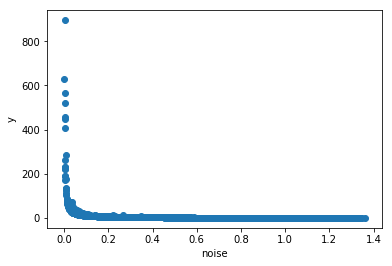

In [30]:
#n_arr = [1 / i for i in n_arr]
plt.scatter(n_arr11, y_arr11)
plt.xlabel("noise")
plt.ylabel("y")
plt.show()

In [46]:
# Adam_1642197562   / 2 crit
a2, b2, y_arr2, n_arr2 = v4_prepare_data_from_files('Adam_1642197562', 0.5)
print(a2, b2)

1      [0, 54.2034984888112, 1.0, 1.0, 1.2873646675334152]
0.5113377765869594
0.3399870456727347
0 || 0.5113377765869594 || 1 || 1 
1      [0, 72.429173551922, 1.0, 1.0, 0.515032971709413]


C:\Program Files\Python\Python37\Lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: overflow encountered in exp


0.6959029282675073
0.047406757650069235
0 || 0.6959029282675073 || 1 || 1 
1      [0, 23.060703422533415, 0.5, 1.0, 2.4645217630635567]
0.503586670989767
0.6224886340361085
0 || 0.503586670989767 || 1 || 0 
0      [0, 28.35420553483432, 1.0, 0.0, 0.5508775796629543]
0.6446136813775604
0.03101796381266988
0 || 0.6446136813775604 || 0 || 0 
0      [0, 89.3631715589503, 0.1, 0.0, 4.345813945922041]
0.5009780008282028
0.794838208626845
0 || 0.5009780008282028 || 0 || 0 
1      [1, 98.279934333217, 0.0, 1.0, 0.6479060102023658]
0.5543821788941035
0.0631940839311832
1 || 0.5543821788941035 || 1 || 1 
0      [1, 27.826564026731177, 0.1, 0.0, 0.9470150628397707]
0.5205288099531026
0.23406966723577963
1 || 0.5205288099531026 || 0 || 0 
0      [1, 5.386734111477448, 0.0, 0.0, 1.1284828583243223]
0.507339599148803
0.3027854581953113
1 || 0.507339599148803 || 0 || 0 
1      [1, 60.291165436784524, 0.5, 1.0, 1.6480491264564954]
0.5064612119976165
0.4463555489953015
1 || 0.5064612119976165 || 1 || 1

0.5228576168658587
0.22025633422263732
12 || 0.5228576168658587 || 0 || 0 
0      [13, 49.018414882195735, 0.5, 0.0, 1.0358770998467457]
0.5163053006482907
0.24680042985249948
13 || 0.5163053006482907 || 0 || 0 
1      [13, 18.69093326180713, 0.0, 1.0, 0.7223062646021498]
0.5343373780512225
0.16753957365320143
13 || 0.5343373780512225 || 1 || 1 
0      [13, 1.2658624145149067, 0.1, 0.0, 5.0250235496003]
0.5006988758351824
0.9129148655611061
13 || 0.5006988758351824 || 0 || 0 
1      [13, 11.26249433300317, 0.5, 1.0, 0.5074800020594766]
0.6251766421925827
0.08098350238048152
13 || 0.6251766421925827 || 1 || 1 
0      [13, 5.856173108411323, 1.0, 0.0, 1.381363535075648]
0.5102477942934788
0.4110153445217657
13 || 0.5102477942934788 || 0 || 0 
1      [14, 43.04824128759645, 0.5, 1.0, 1.2691331981292386]
0.5110115623966354
0.36535114642970506
14 || 0.5110115623966354 || 1 || 1 
0      [14, 35.9061425452526, 0.1, 0.0, 1.7328107411593128]
0.505046652614281
0.4484123409808441
14 || 0.50504665

0.5499567751917176
0.09478949020051701
25 || 0.5499567751917176 || 1 || 1 
0      [25, 9.18101216951147, 0.1, 0.0, 4.169312243908913]
0.5011370346788747
0.8390809073970688
25 || 0.5011370346788747 || 0 || 0 
1      [25, 78.29716721189253, 0.0, 1.0, 2.009243061585353]
0.5051529882179029
0.5651426947610002
25 || 0.5051529882179029 || 1 || 0 
0      [25, 11.21865765622389, 1.0, 0.0, 0.9127265910170745]
0.5222594719596505
0.2270314892776249
25 || 0.5222594719596505 || 0 || 0 
0      [26, 87.3781572094249, 0.0, 0.0, 3.1159862680634136]
0.501112371035578
0.7092265486146211
26 || 0.501112371035578 || 0 || 0 
0      [26, 10.882020590312619, 1.0, 0.0, 4.721288693534577]
0.5008257619758193
0.8777675977449838
26 || 0.5008257619758193 || 0 || 0 
0      [26, 63.780154375800095, 0.0, 0.0, 1.1490213787867676]
0.5106021703241658
0.2860957848320707
26 || 0.5106021703241658 || 0 || 0 
0      [26, 95.06566427524359, 0.1, 0.0, 2.8644287935351933]
0.5025950828566057
0.651504561635117
26 || 0.50259508285660

0.5114776321350762
0.3762933528267994
37 || 0.5114776321350762 || 0 || 0 
0      [37, 85.27012179119315, 1.0, 0.0, 1.182825840314099]
0.5121068467270351
0.2705825125238481
37 || 0.5121068467270351 || 0 || 0 
0      [38, 76.18283631087233, 0.5, 0.0, 8.11168207739393]
0.5001459687630211
1.1257202348078976
38 || 0.5001459687630211 || 0 || 0 
1      [38, 23.247495694874566, 0.1, 1.0, 0.5953569807914065]
0.5507719500023288
0.05944012449363056
38 || 0.5507719500023288 || 1 || 1 
0      [38, 18.202360036773513, 0.1, 0.0, 1.1383046397016408]
0.5144352844734975
0.33675676105260915
38 || 0.5144352844734975 || 0 || 0 
0      [38, 99.31508498485533, 0.0, 0.0, 2.9982507827119673]
0.5012099414105553
0.719231656469171
38 || 0.5012099414105553 || 0 || 0 
0      [38, 47.988303531950315, 0.1, 0.0, 2.67245231077326]
0.5029638645234666
0.6244799792508358
38 || 0.5029638645234666 || 0 || 0 
1      [39, 36.301149932301634, 0.0, 1.0, 0.779331290514413]
0.5274782466210446
0.12145717536367653
39 || 0.527478246

0.5073374060763665
0.47987024029473535
50 || 0.5073374060763665 || 0 || 0 
0      [50, 7.678453011346092, 0.0, 0.0, 1.4362812682075894]
0.5078541425972593
0.47676797725232745
50 || 0.5078541425972593 || 0 || 0 
0      [50, 24.762136709972005, 0.5, 0.0, 0.9766022434065806]
0.519075543002336
0.2229376209097159
50 || 0.519075543002336 || 0 || 0 
1      [50, 19.47090947002395, 0.0, 1.0, 0.5808384144453648]
0.5568856572754797
0.03532253025296713
50 || 0.5568856572754797 || 1 || 1 
1      [50, 23.723213476634108, 1.0, 1.0, 3.576348963478211]
0.5016297422517323
0.7770284814619923
50 || 0.5016297422517323 || 1 || 0 
1      [51, 83.72213172770037, 1.0, 1.0, 1.1396882588469093]
0.5123044654262378
0.36350875391611004
51 || 0.5123044654262378 || 1 || 1 
0      [51, 50.013600962650806, 1.0, 0.0, 2.040151049303377]
0.5051344691055013
0.5567352831180483
51 || 0.5051344691055013 || 0 || 0 
0      [51, 66.53016657061666, 0.5, 0.0, 1.222934432069846]
0.5125841615303015
0.3522113294524019
51 || 0.5125841

0.5007572920433241
0.9088861330982212
62 || 0.5007572920433241 || 0 || 0 
0      [62, 23.25303660070971, 1.0, 0.0, 1.175199017218592]
0.5136144507887628
0.3324106193571519
62 || 0.5136144507887628 || 0 || 0 
1      [62, 94.91771226764544, 0.1, 1.0, 0.8670202704965994]
0.5233007204774105
0.1833995641764857
62 || 0.5233007204774105 || 1 || 1 
0      [63, 85.14853963860448, 1.0, 0.0, 1.6082530194110314]
0.5073277340493803
0.4124099295055828
63 || 0.5073277340493803 || 0 || 0 
0      [63, 30.818502518655787, 0.1, 0.0, 8.364121579184292]
0.5001367481372895
1.1111798090153553
63 || 0.5001367481372895 || 0 || 0 
0      [63, 71.22520780857312, 0.1, 0.0, 1.0118858278417224]
0.5150514827825673
0.28149222162328447
63 || 0.5150514827825673 || 0 || 0 
0      [63, 72.81803104333436, 0.1, 0.0, 3.481935491363651]
0.5015419842215924
0.8334660608031841
63 || 0.5015419842215924 || 0 || 0 
1      [63, 53.63252075757023, 0.1, 1.0, 1.4305881759676944]
0.5093202875637468
0.44121729516842195
63 || 0.509320287

0.5040587910682613
0.6228182496964834
74 || 0.5040587910682613 || 0 || 0 
0      [74, 74.10109113566041, 0.5, 0.0, 1.5744119847445714]
0.5076397697256578
0.472505291831511
74 || 0.5076397697256578 || 0 || 0 
0      [75, 90.79688884030635, 0.1, 0.0, 4.806130808432651]
0.500769756372791
0.916631541753638
75 || 0.500769756372791 || 0 || 0 
0      [75, 28.003110422396183, 1.0, 0.0, 1.1772103914251493]
0.5136368240424654
0.3322228510949021
75 || 0.5136368240424654 || 0 || 0 
0      [75, 63.91457318175632, 0.0, 0.0, 1.374220480160754]
0.5097181114548742
0.3810044169084401
75 || 0.5097181114548742 || 0 || 0 
1      [75, 35.93250902412552, 0.1, 1.0, 0.6482247337039444]
0.534753321542413
0.08562663786814682
75 || 0.534753321542413 || 1 || 1 
0      [75, 44.16225001826057, 0.0, 0.0, 0.5796607102765791]
0.597493625724996
0.04898694596579956
75 || 0.597493625724996 || 0 || 0 
1      [76, 27.196939501166085, 1.0, 1.0, 3.7184338994273487]
0.5013959314106012
0.7429515915038702
76 || 0.501395931410601

0.5223668321749337
0.21965332629907428
87 || 0.5223668321749337 || 1 || 1 
0      [87, 64.12484446104669, 0.0, 0.0, 1.2320939151148433]
0.5120061415990972
0.33881140212653876
87 || 0.5120061415990972 || 0 || 0 
1      [87, 46.399403580173235, 1.0, 1.0, 0.852231906071304]
0.5253489514571356
0.20442749526450962
87 || 0.5253489514571356 || 1 || 1 
0      [87, 1.9596871402797977, 1.0, 0.0, 1.4548226043354338]
0.5093901201257929
0.4141608954664293
87 || 0.5093901201257929 || 0 || 0 
0      [87, 43.433010251431114, 1.0, 0.0, 0.5124539903272202]
0.7755704529669493
0.02948070219006401
87 || 0.7755704529669493 || 0 || 0 
0      [88, 79.93673347533634, 1.0, 0.0, 1.5159120441410332]
0.5081333305033776
0.40675808372353406
88 || 0.5081333305033776 || 0 || 0 
0      [88, 38.208092444184025, 1.0, 0.0, 1.804638991637084]
0.5062015688986563
0.4852761719336666
88 || 0.5062015688986563 || 0 || 0 
1      [88, 51.906619441934595, 0.0, 1.0, 0.7296544928428983]
0.5374539220185869
0.1419885606092555
88 || 0.5

0.50234850397879
0.7124848991026727
99 || 0.50234850397879 || 0 || 0 
0      [99, 48.25696707019998, 1.0, 0.0, 1.756220841635118]
0.5067328900320682
0.5233331691904188
99 || 0.5067328900320682 || 0 || 0 
0      [99, 9.50946135504917, 0.0, 0.0, 0.7465517350702621]
0.5332889294804299
0.16062426095152244
99 || 0.5332889294804299 || 0 || 0 
0      [100, 11.429507530875343, 1.0, 0.0, 1.174770114809648]
0.5136677378398578
0.30964955198139754
100 || 0.5136677378398578 || 0 || 0 
0      [100, 80.6206493033986, 0.0, 0.0, 2.131834745490969]
0.504460775986615
0.5845132425462665
100 || 0.504460775986615 || 0 || 0 
0      [100, 99.660934014371, 1.0, 0.0, 6.374593772002961]
0.5003101339250347
0.9479024612693516
100 || 0.5003101339250347 || 0 || 0 
0      [100, 60.0800963421451, 1.0, 0.0, 3.1042171079306295]
0.5022477039716439
0.7332637697384483
100 || 0.5022477039716439 || 0 || 0 
0      [100, 82.29388678364852, 0.0, 0.0, 0.7617275650367674]
0.5172142665303738
0.13959515953076523
100 || 0.5172142665

0.5029405946421731
0.5738006028525773
111 || 0.5029405946421731 || 0 || 0 
0      [112, 40.2043083748371, 0.0, 0.0, 3.5140954395945303]
0.5017037832702048
0.7732370909954577
112 || 0.5017037832702048 || 0 || 0 
0      [112, 35.08341265516458, 1.0, 0.0, 0.6090294883214165]
0.5758196946378414
0.0760763631428096
112 || 0.5758196946378414 || 0 || 0 
0      [112, 54.633219356510196, 0.5, 0.0, 5.488976355908353]
0.5005449158341895
0.9429566541481212
112 || 0.5005449158341895 || 0 || 0 
0      [112, 32.27914055153158, 1.0, 0.0, 1.8193486506101602]
0.5055814023733455
0.538439140072866
112 || 0.5055814023733455 || 0 || 0 
1      [112, 90.58687231820007, 0.1, 1.0, 1.0944347420219827]
0.5132039720124808
0.28104166877629017
112 || 0.5132039720124808 || 1 || 1 
0      [113, 3.7224457075925255, 0.5, 0.0, 0.7360069714777399]
0.5378318156086839
0.12461492011945921
113 || 0.5378318156086839 || 0 || 0 
1      [113, 95.17965064529615, 0.1, 1.0, 1.2021978852740318]
0.5119445294759511
0.326014301298512
113

0.5004891348553996
0.8830350117980909
123 || 0.5004891348553996 || 0 || 0 
1      [124, 72.02968642117979, 0.0, 1.0, 1.9648160975636106]
0.5052480661530797
0.5329257323493639
124 || 0.5052480661530797 || 1 || 0 
0      [124, 58.234706313646, 0.1, 0.0, 3.60950960987631]
0.50152238476026
0.7480015158059787
124 || 0.50152238476026 || 0 || 0 
0      [124, 46.242819794403964, 1.0, 0.0, 0.6442757141043258]
0.557911033294113
0.08216249970317957
124 || 0.557911033294113 || 0 || 0 
1      [124, 3.1074215568245855, 0.0, 1.0, 0.5108891034096563]
0.6386177317362962
0.05772885590676171
124 || 0.6386177317362962 || 1 || 1 
0      [124, 80.80902341331722, 0.5, 0.0, 2.3534154476382385]
0.5039292316369647
0.6068151746080302
124 || 0.5039292316369647 || 0 || 0 
0      [125, 32.97543215741664, 0.1, 0.0, 2.2383369197427596]
0.5031436340577171
0.5953486816264466
125 || 0.5031436340577171 || 0 || 0 
1      [125, 60.41088637373962, 0.0, 1.0, 0.8865727086488739]
0.5235039073982469
0.2122679082851819
125 || 0.

0.525910853074128
0.1550149169739911
135 || 0.525910853074128 || 1 || 1 
1      [136, 49.35420926526998, 1.0, 1.0, 0.9938601613639484]
0.5185926499861266
0.26844499133554106
136 || 0.5185926499861266 || 1 || 1 
0      [136, 49.508661835841, 1.0, 0.0, 3.549148861745713]
0.501668870196027
0.7632766763375688
136 || 0.501668870196027 || 0 || 0 
0      [136, 24.805804426263105, 0.1, 0.0, 1.1791105004180258]
0.5119294212275568
0.3455415805346041
136 || 0.5119294212275568 || 0 || 0 
1      [136, 90.03305232942964, 0.1, 1.0, 0.5624490906598218]
0.6291224552554558
0.033446875455492894
136 || 0.6291224552554558 || 1 || 1 
0      [136, 6.3153902477770085, 1.0, 0.0, 0.5239319678133942]
0.6648157626064687
0.05328015000366964
136 || 0.6648157626064687 || 0 || 0 
1      [137, 21.7271986308965, 1.0, 1.0, 1.6254289325224955]
0.5077032132302145
0.44147586684296963
137 || 0.5077032132302145 || 1 || 1 
1      [137, 84.68269982286364, 0.0, 1.0, 0.6821290562481441]
0.5422407905795229
0.09985855945316925
137

0.5004928977416221
0.9747854634018024
147 || 0.5004928977416221 || 0 || 0 
0      [148, 87.02750913629036, 0.1, 0.0, 4.665205901235396]
0.5007567505785557
0.8766185304198386
148 || 0.5007567505785557 || 0 || 0 
0      [148, 95.56686600488288, 0.5, 0.0, 0.7553931178414575]
0.5339251122462622
0.1450938027813579
148 || 0.5339251122462622 || 0 || 0 
0      [148, 77.40297606083605, 1.0, 0.0, 3.972504783987195]
0.501150109530376
0.8025399161551524
148 || 0.501150109530376 || 0 || 0 
1      [148, 23.28971839079193, 0.5, 1.0, 0.8006505976851406]
0.5292755175610846
0.16067593270156605
148 || 0.5292755175610846 || 1 || 1 
0      [148, 45.35392965700107, 0.5, 0.0, 1.8796329247575885]
0.5057653043078886
0.5153378450145949
148 || 0.5057653043078886 || 0 || 0 
1      [149, 19.04806566321959, 0.5, 1.0, 0.8751959076614597]
0.5243585518953817
0.1992398300825307
149 || 0.5243585518953817 || 1 || 1 
0      [149, 64.56388148734227, 0.1, 0.0, 13.327997752741744]
0.50001687868482
1.3842672804088947
149 || 0

0.5195898437285165
0.17498940121085235
159 || 0.5195898437285165 || 0 || 0 
0      [160, 79.24751923418579, 1.0, 0.0, 1.349120158418333]
0.5105895648868457
0.3954707793028209
160 || 0.5105895648868457 || 0 || 0 
1      [160, 42.41792981298421, 1.0, 1.0, 0.6287488285341869]
0.5593123120456639
0.09524407628130944
160 || 0.5593123120456639 || 1 || 1 
1      [160, 67.66633183956881, 0.0, 1.0, 1.2869854178051745]
0.5113499312497557
0.3969742277912543
160 || 0.5113499312497557 || 1 || 1 
0      [160, 53.128156131140955, 0.0, 0.0, 0.5115638394817926]
0.7773176886444099
0.010862236953888195
160 || 0.7773176886444099 || 0 || 0 
0      [160, 71.6198678796965, 0.0, 0.0, 0.703436895704429]
0.5421683485951686
0.08655329973842793
160 || 0.5421683485951686 || 0 || 0 
0      [161, 2.008708430333006, 0.5, 0.0, 1.8767689082384265]
0.5059946914322108
0.5196507119813525
161 || 0.5059946914322108 || 0 || 0 
1      [161, 91.2735634674062, 1.0, 1.0, 1.1653659621230426]
0.5135273381948473
0.3287082060560687
1

0.7350354083993721
0.037492865669343886
171 || 0.7350354083993721 || 1 || 1 
0      [172, 53.122530708860126, 1.0, 0.0, 2.534420108127453]
0.5033870372683078
0.6315791864107703
172 || 0.5033870372683078 || 0 || 0 
0      [172, 77.94456978490975, 0.0, 0.0, 1.9632012064984197]
0.5051114296573419
0.5783309981702028
172 || 0.5051114296573419 || 0 || 0 
0      [172, 10.44152322501391, 0.5, 0.0, 0.6292282418679975]
0.5520002545375103
0.09830088770153456
172 || 0.5520002545375103 || 0 || 0 
0      [172, 48.53952399751887, 0.5, 0.0, 0.7001361915525993]
0.5421183951888804
0.08588654371561895
172 || 0.5421183951888804 || 0 || 0 
0      [172, 22.109690505779895, 1.0, 0.0, 3.273208703146806]
0.5020032912449738
0.7350327710518935
172 || 0.5020032912449738 || 0 || 0 
1      [173, 77.28303551127075, 1.0, 1.0, 1.263197550878572]
0.5119004462187351
0.3534801411087445
173 || 0.5119004462187351 || 1 || 1 
0      [173, 65.38529032586415, 0.5, 0.0, 6.467318167249619]
0.5003265357099735
1.036870746808333
17

0.5030272828920158
0.6405942796098907
183 || 0.5030272828920158 || 0 || 0 
1      [184, 15.453406427616162, 0.5, 1.0, 3.285437602232434]
0.5019851416974431
0.7572867768976226
184 || 0.5019851416974431 || 1 || 0 
0      [184, 50.873026851584704, 1.0, 0.0, 2.956930873248058]
0.502487565393973
0.7247775501090384
184 || 0.502487565393973 || 0 || 0 
1      [184, 55.47353634674983, 0.5, 1.0, 0.5487702193976798]
0.588778353355784
0.10328732088711023
184 || 0.588778353355784 || 1 || 1 
0      [184, 43.18965334540829, 0.0, 0.0, 1.3737473895887742]
0.5097650247776452
0.4231921999034228
184 || 0.5097650247776452 || 0 || 0 
0      [184, 93.46561525335375, 1.0, 0.0, 1.4584333418429707]
0.5091879492122667
0.38377497519627113
184 || 0.5091879492122667 || 0 || 0 
1      [185, 24.217047749078226, 0.1, 1.0, 0.6186525515810598]
0.5524382792628661
0.09986733557150755
185 || 0.5524382792628661 || 1 || 1 
1      [185, 65.40800618348793, 1.0, 1.0, 0.9079251490234062]
0.5219640900775739
0.22176618522110736
18

0.5160571221864265
0.3017379854056218
196 || 0.5160571221864265 || 0 || 0 
0      [196, 91.71690618550011, 1.0, 0.0, 2.048300954020518]
0.5043036152974574
0.556300591216116
196 || 0.5043036152974574 || 0 || 0 
1      [196, 61.12924266187348, 0.0, 1.0, 0.8045784577674483]
0.5291736543831767
0.17753123965538728
196 || 0.5291736543831767 || 1 || 1 
1      [196, 54.51316538682048, 1.0, 1.0, 7.42477593179719]
0.5002101257984796
1.0958091956148868
196 || 0.5002101257984796 || 1 || 0 
0      [196, 66.86307587077509, 0.0, 0.0, 1.0423649804987278]
0.5143489848430735
0.29014635399385585
196 || 0.5143489848430735 || 0 || 0 
0      [197, 76.6273379024361, 0.0, 0.0, 2.856513698289926]
0.5023237270949779
0.6998908441779793
197 || 0.5023237270949779 || 0 || 0 
0      [197, 13.809947281373214, 0.0, 0.0, 7.589574207600122]
0.5001953129439209
1.0807466752119526
197 || 0.5001953129439209 || 0 || 0 
0      [197, 96.73284235851153, 0.5, 0.0, 3.2263954989618258]
0.5020017579022563
0.7258675529047351
197 || 

0.5146210719384697
0.2601604509269358
208 || 0.5146210719384697 || 0 || 0 
1      [208, 41.72886438717214, 1.0, 1.0, 0.5784015008859729]
0.5841121640876349
0.08626214279585198
208 || 0.5841121640876349 || 1 || 1 
0      [208, 89.5599866807407, 0.5, 0.0, 1.5073577793207054]
0.5087273756600197
0.45025203225336885
208 || 0.5087273756600197 || 0 || 0 
0      [208, 6.469953040106935, 0.1, 0.0, 3.075648906914306]
0.5016602282097579
0.7190762497414469
208 || 0.5016602282097579 || 0 || 0 
0      [208, 76.768481271256, 0.1, 0.0, 3.482948876775124]
0.5015760561874979
0.7848403205505857
208 || 0.5015760561874979 || 0 || 0 
0      [209, 55.395172644595526, 0.1, 0.0, 0.7012823951014547]
0.5305794207358334
0.125976879523811
209 || 0.5305794207358334 || 0 || 0 
0      [209, 32.74935777117529, 0.0, 0.0, 4.2430446679727085]
0.5009922599552992
0.8402745220270657
209 || 0.5009922599552992 || 0 || 0 
0      [209, 0.5792965681740037, 1.0, 0.0, 1.6666404557740568]
0.5073905026476281
0.4673224879785314
209 |

0.5043872498726649
0.58444642229815
220 || 0.5043872498726649 || 0 || 0 
1      [220, 41.36306976753688, 0.1, 1.0, 0.5323107221960407]
0.6083334278176852
0.04607165416390366
220 || 0.6083334278176852 || 1 || 1 
1      [220, 66.90630571925946, 0.5, 1.0, 1.4418471461568796]
0.509429061033681
0.4507598860671152
220 || 0.509429061033681 || 1 || 1 
0      [220, 49.61907527137617, 1.0, 0.0, 1.708582787907439]
0.5070167117532688
0.49819616007537815
220 || 0.5070167117532688 || 0 || 0 
0      [220, 82.77081720653513, 0.5, 0.0, 3.6621861689751722]
0.5012573616790017
0.7983511249951897
220 || 0.5012573616790017 || 0 || 0 
1      [221, 43.98120506574622, 0.1, 1.0, 0.5617116230300737]
0.5831937919152405
0.049605617097320774
221 || 0.5831937919152405 || 1 || 1 
0      [221, 15.732160649299603, 0.1, 0.0, 0.8990615965028566]
0.5229198830557246
0.21594335711911988
221 || 0.5229198830557246 || 0 || 0 
0      [221, 79.26353771243633, 0.5, 0.0, 1.3057319623324295]
0.5109518171925221
0.39636232463624993
2

0.5193472197506154
0.21373285825355592
232 || 0.5193472197506154 || 0 || 0 
0      [232, 12.48039250980169, 0.1, 0.0, 1.9698667346388459]
0.5054593542817505
0.5558050672218872
232 || 0.5054593542817505 || 0 || 0 
0      [232, 34.493482358414525, 1.0, 0.0, 0.7523161098688288]
0.5355418584313245
0.12880401049042475
232 || 0.5355418584313245 || 0 || 0 
0      [232, 1.3764241806340949, 0.0, 0.0, 1.5392306975369012]
0.5084928819244816
0.4207305655685343
232 || 0.5084928819244816 || 0 || 0 
0      [232, 81.64372742277835, 0.1, 0.0, 1.4982946450230656]
0.508310809828362
0.4460094098472719
232 || 0.508310809828362 || 0 || 0 
0      [233, 60.12065264747313, 0.0, 0.0, 2.5114190352897574]
0.5028956531522989
0.5653565674363926
233 || 0.5028956531522989 || 0 || 0 
0      [233, 79.25516411104225, 0.0, 0.0, 0.7897729006521645]
0.5154042250286314
0.18263317354260736
233 || 0.5154042250286314 || 0 || 0 
0      [233, 42.16818090809642, 0.1, 0.0, 0.7921270504833011]
0.5259471358116969
0.14527273801755786

0.5121230646270486
0.1859384633286426
244 || 0.5121230646270486 || 1 || 1 
0      [244, 17.701627064190667, 1.0, 0.0, 0.9681778226333753]
0.5197019162447561
0.2349639674625881
244 || 0.5197019162447561 || 0 || 0 
0      [244, 2.895176008989936, 1.0, 0.0, 0.9139082154960838]
0.5220117753167036
0.22187808788528326
244 || 0.5220117753167036 || 0 || 0 
1      [244, 82.06884063727773, 1.0, 1.0, 0.5258238268608151]
0.5851420852783421
0.12314951822586664
244 || 0.5851420852783421 || 1 || 1 
0      [244, 60.46657405972452, 0.0, 0.0, 1.5209335938401431]
0.5086710892962478
0.4595075437629458
244 || 0.5086710892962478 || 0 || 0 
0      [245, 17.676401370189843, 0.0, 0.0, 1.3184478784015607]
0.5099355939905444
0.3952838715654178
245 || 0.5099355939905444 || 0 || 0 
0      [245, 26.26454748756431, 1.0, 0.0, 1.8728209913717093]
0.5059699173956117
0.5512836311653222
245 || 0.5059699173956117 || 0 || 0 
0      [245, 68.10156348696165, 0.0, 0.0, 4.322076138955543]
0.500518978429329
0.8326668047177901
2

0.5113228519712975
0.39236460960610015
256 || 0.5113228519712975 || 0 || 0 
0      [256, 23.29276896275828, 0.5, 0.0, 4.207540398663909]
0.5010071246412476
0.822641104397153
256 || 0.5010071246412476 || 0 || 0 
0      [256, 32.12373085943198, 1.0, 0.0, 0.9412070311821239]
0.5191803774322092
0.24580832786579934
256 || 0.5191803774322092 || 0 || 0 
0      [256, 28.452683202039076, 0.0, 0.0, 2.0099421414247294]
0.504725469204636
0.5735536609530277
256 || 0.504725469204636 || 0 || 0 
0      [257, 16.67005170068513, 0.1, 0.0, 2.224200450938144]
0.503768930860663
0.6413811010158501
257 || 0.503768930860663 || 0 || 0 
0      [257, 95.62719966145544, 0.5, 0.0, 5.479228373761242]
0.5003812040440033
1.0158199496618725
257 || 0.5003812040440033 || 0 || 0 
0      [257, 11.239557099028502, 0.1, 0.0, 3.319741392149011]
0.5019386233041708
0.7698200242025817
257 || 0.5019386233041708 || 0 || 0 
0      [257, 26.26651167537023, 1.0, 0.0, 1.372674542430357]
0.5101955933506452
0.3924056693370668
257 || 0.

0.5027943925178554
0.6992648623376961
268 || 0.5027943925178554 || 0 || 0 
1      [268, 2.612072818107525, 0.5, 1.0, 0.5555705582588606]
0.6374471486532512
0.02570109572893734
268 || 0.6374471486532512 || 1 || 1 
1      [268, 78.8361111344123, 1.0, 1.0, 0.5158352249762826]
0.8793605797192211
0.011408404208554535
268 || 0.8793605797192211 || 1 || 1 
0      [268, 47.00323820705391, 0.5, 0.0, 2.918708019618702]
0.5025286933709409
0.7013254181121726
268 || 0.5025286933709409 || 0 || 0 
0      [269, 34.20990214081579, 1.0, 0.0, 5.382730122833812]
0.5005761849766192
0.9577230527804345
269 || 0.5005761849766192 || 0 || 0 
0      [269, 13.377721233213041, 0.5, 0.0, 1.130498957489987]
0.5141327861907502
0.3490758527604183
269 || 0.5141327861907502 || 0 || 0 
0      [269, 4.472613611532217, 0.5, 0.0, 1.6053208864349153]
0.5078592672252366
0.4656465531306497
269 || 0.5078592672252366 || 0 || 0 
0      [269, 1.496636898676601, 0.0, 0.0, 2.222526195146595]
0.5043851759078903
0.6143871666289606
269 

0.5011035863415476
0.843290886761515
280 || 0.5011035863415476 || 0 || 0 
1      [280, 51.42729040376567, 1.0, 1.0, 0.6110106490407362]
0.5737515296595358
0.08130994673504037
280 || 0.5737515296595358 || 1 || 1 
1      [280, 77.54396256302259, 0.5, 1.0, 0.8695510255415527]
0.5230923289844187
0.21653213189476722
280 || 0.5230923289844187 || 1 || 1 
1      [280, 53.55235471099884, 0.1, 1.0, 0.6911314954101394]
0.5452714837944097
0.09531921474866105
280 || 0.5452714837944097 || 1 || 1 
0      [281, 30.99060772328366, 1.0, 0.0, 3.730506634542751]
0.5013229719216511
0.7704558482796166
281 || 0.5013229719216511 || 0 || 0 
0      [281, 59.66725205284021, 0.0, 0.0, 4.2159554415578855]
0.5010900177160315
0.8127776594812997
281 || 0.5010900177160315 || 0 || 0 
0      [281, 8.44193434670184, 1.0, 0.0, 0.8970543748233]
0.5231447691523401
0.20482743865562697
281 || 0.5231447691523401 || 0 || 0 
0      [281, 5.593853609209276e-05, 0.1, 0.0, 1.3772339386603416]
0.5103358112887912
0.39980531966625027


0.5003478922951977
0.9641142193416845
292 || 0.5003478922951977 || 0 || 0 
0      [292, 26.459038064311592, 0.1, 0.0, 2.0617319593489762]
0.5050319453583626
0.534826098797954
292 || 0.5050319453583626 || 0 || 0 
0      [292, 68.92487351420492, 0.0, 0.0, 1.9251871901731368]
0.5028495105793506
0.5137501370688456
292 || 0.5028495105793506 || 0 || 0 
0      [292, 5.542749403437147, 0.1, 0.0, 3.2718767043490034]
0.5019619418121288
0.7260435741365131
292 || 0.5019619418121288 || 0 || 0 
0      [293, 15.661805513797255, 1.0, 0.0, 6.5476694228282275]
0.5003194309726486
1.032512182624931
293 || 0.5003194309726486 || 0 || 0 
1      [293, 9.125613872389005, 0.5, 1.0, 0.5115722936945047]
0.6998231155771043
0.04110873199681125
293 || 0.6998231155771043 || 1 || 1 
1      [293, 39.46976533656165, 1.0, 1.0, 0.549935900813157]
0.6048773887054671
0.082065563622471
293 || 0.6048773887054671 || 1 || 1 
1      [293, 78.30076337670135, 1.0, 1.0, 1.0021021686809726]
0.5178118479619448
0.26460066663121157
293

0.6634568088693207
0.04344746840070384
304 || 0.6634568088693207 || 0 || 0 
0      [304, 89.20969292415334, 0.1, 0.0, 1.7294859490966459]
0.506255569777148
0.46370782740685285
304 || 0.506255569777148 || 0 || 0 
1      [304, 91.03054098373971, 1.0, 1.0, 0.8951121304153331]
0.5223624603672433
0.24209512458341373
304 || 0.5223624603672433 || 1 || 1 
1      [304, 24.804945234952214, 0.1, 1.0, 0.7208701806332224]
0.5315313322214807
0.16640091678788496
304 || 0.5315313322214807 || 1 || 1 
0      [305, 86.56147494122276, 0.5, 0.0, 1.9967235723968013]
0.504494521902851
0.4958427170922833
305 || 0.504494521902851 || 0 || 0 
0      [305, 71.62081157806077, 1.0, 0.0, 1.2911876531753892]
0.5109335056268893
0.3200867160521385
305 || 0.5109335056268893 || 0 || 0 
0      [305, 43.516015670660124, 0.0, 0.0, 4.3363408403974475]
0.5005152755272743
0.8653743079561934
305 || 0.5005152755272743 || 0 || 0 
0      [305, 97.97822271575237, 0.1, 0.0, 0.852678015036301]
0.5230526198994189
0.204539650207991
305

0.5094141060692753
0.42141693329349394
316 || 0.5094141060692753 || 0 || 0 
0      [316, 73.23882324952041, 0.1, 0.0, 1.0126948241499045]
0.5158102310507603
0.24858073771007996
316 || 0.5158102310507603 || 0 || 0 
0      [316, 6.7503252912204275, 0.5, 0.0, 4.358157800991091]
0.501015851389789
0.8519643580436085
316 || 0.501015851389789 || 0 || 0 
0      [317, 86.84143946585633, 0.0, 0.0, 2.568425853400977]
0.5016582667609647
0.6535980376520739
317 || 0.5016582667609647 || 0 || 0 
0      [317, 16.2748313945311, 0.0, 0.0, 1.9992432268123597]
0.5053471484462284
0.5359718953096061
317 || 0.5053471484462284 || 0 || 0 
0      [317, 74.29016831060662, 0.5, 0.0, 0.7700697488807327]
0.531781123167535
0.18784447558911072
317 || 0.531781123167535 || 0 || 0 
0      [317, 46.3359888707613, 0.5, 0.0, 7.464058489301818]
0.5002069918914789
1.0860135692306139
317 || 0.5002069918914789 || 0 || 0 
0      [317, 40.9422717814621, 0.0, 0.0, 1.654429114866376]
0.5037495437992168
0.46055871508454865
317 || 0.

0.5058091983406309
0.5392459025621055
328 || 0.5058091983406309 || 0 || 0 
0      [328, 57.22238588576125, 0.0, 0.0, 1.5721924151300024]
0.5070505285984315
0.4514962701534344
328 || 0.5070505285984315 || 0 || 0 
0      [329, 40.94412237868043, 1.0, 0.0, 1.4432073797955545]
0.5084730730575547
0.36698000249085405
329 || 0.5084730730575547 || 0 || 0 
0      [329, 95.56105869396627, 1.0, 0.0, 2.4344546212593507]
0.5033032896030997
0.6154977877045744
329 || 0.5033032896030997 || 0 || 0 
1      [329, 79.73039764647432, 1.0, 1.0, 1.3603694271737372]
0.5104151561111064
0.39880370229585904
329 || 0.5104151561111064 || 1 || 1 
0      [329, 72.67754770388339, 0.0, 0.0, 6.06882790368922]
0.5002022843568205
1.0091505172677158
329 || 0.5002022843568205 || 0 || 0 
0      [329, 28.866115102681622, 1.0, 0.0, 3.1255373854761124]
0.5022155605024142
0.7312422385667698
329 || 0.5022155605024142 || 0 || 0 
0      [330, 1.5392062174909626, 0.0, 0.0, 3.190998567594827]
0.502115871641613
0.7424963623591363
330

0.5377434876917631
0.12349734261307432
340 || 0.5377434876917631 || 0 || 0 
1      [340, 45.57940763799904, 0.0, 1.0, 0.8195912506128644]
0.5142084720260369
0.1614483398031783
340 || 0.5142084720260369 || 1 || 1 
1      [341, 44.38823027612894, 0.1, 1.0, 0.5563630307058874]
0.5819015494052924
0.03433187858226804
341 || 0.5819015494052924 || 1 || 1 
0      [341, 49.752068583853614, 1.0, 0.0, 2.140521666776796]
0.5046961088231336
0.6053248936608945
341 || 0.5046961088231336 || 0 || 0 
0      [341, 75.0962701960822, 0.5, 0.0, 0.9267837008292652]
0.5203350495592362
0.24452598636253695
341 || 0.5203350495592362 || 0 || 0 
0      [341, 46.26104941842984, 0.5, 0.0, 2.061376183468446]
0.5050593586946502
0.5647287595824353
341 || 0.5050593586946502 || 0 || 0 
1      [341, 29.270442105044975, 0.1, 1.0, 0.7501210469363093]
0.5331215863560139
0.16066926354015046
341 || 0.5331215863560139 || 1 || 1 
1      [342, 67.69527314677151, 0.0, 1.0, 0.5531296998279651]
0.5788031114183221
0.02779160493483277

0.5274004250973626
0.1869812761271499
352 || 0.5274004250973626 || 1 || 1 
1      [352, 67.25622090657788, 0.5, 1.0, 1.500625330846035]
0.5086766849438892
0.45092898386949437
352 || 0.5086766849438892 || 1 || 1 
0      [353, 73.73608606289572, 0.1, 0.0, 0.5319156379994291]
0.6811544296602532
0.03690369933242306
353 || 0.6811544296602532 || 0 || 0 
1      [353, 73.84160936002972, 1.0, 1.0, 0.7577422462246904]
0.5327921997909911
0.16377564705775802
353 || 0.5327921997909911 || 1 || 1 
1      [353, 91.59439064544894, 0.5, 1.0, 1.842083882384669]
0.5061612623614797
0.5223723710720979
353 || 0.5061612623614797 || 1 || 0 
0      [353, 48.591580908127256, 0.5, 0.0, 2.8509963541303653]
0.5025206508971186
0.7057591787733261
353 || 0.5025206508971186 || 0 || 0 
1      [353, 21.08036610323709, 0.0, 1.0, 1.3778013528329685]
0.5089081935131455
0.38289241177533145
353 || 0.5089081935131455 || 1 || 1 
0      [354, 58.029634902474704, 1.0, 0.0, 4.26463131307966]
0.5010737430316561
0.8400774951293687
3

0.5141383560304302
0.31437750639333695
364 || 0.5141383560304302 || 0 || 0 
0      [364, 14.516525827024957, 0.5, 0.0, 1.067111930862254]
0.5158829718605429
0.2823344910652667
364 || 0.5158829718605429 || 0 || 0 
0      [365, 12.760991208018007, 1.0, 0.0, 8.432312499675332]
0.5001336852449352
1.1324360776939568
365 || 0.5001336852449352 || 0 || 0 
1      [365, 54.689398059598304, 0.5, 1.0, 0.9292784980681236]
0.5212382730797318
0.22545263833808887
365 || 0.5212382730797318 || 1 || 1 
0      [365, 11.243642181499409, 0.1, 0.0, 2.3728889980255436]
0.5038676716750222
0.5852380573848844
365 || 0.5038676716750222 || 0 || 0 
0      [365, 23.00234270698977, 0.5, 0.0, 4.3629126263083275]
0.5008117372008912
0.8634950798066642
365 || 0.5008117372008912 || 0 || 0 
0      [365, 26.317877685946566, 0.0, 0.0, 2.2587792798497763]
0.503706275907372
0.600031017441538
365 || 0.503706275907372 || 0 || 0 
1      [366, 93.45420464147203, 0.1, 1.0, 1.142623462998578]
0.5126266890304733
0.30171298968754423
3

0.5036946732524922
0.6529718752644039
376 || 0.5036946732524922 || 0 || 0 
0      [376, 13.662026450403719, 1.0, 0.0, 0.7474840347389312]
0.5359750581400607
0.14434394065803205
376 || 0.5359750581400607 || 0 || 0 
1      [377, 66.34639636988557, 0.5, 1.0, 1.6548926449831216]
0.5071164278126972
0.5043093796213006
377 || 0.5071164278126972 || 1 || 0 
1      [377, 17.76813532134981, 1.0, 1.0, 1.2798197148938026]
0.5117497711691612
0.3565098298734526
377 || 0.5117497711691612 || 1 || 1 
0      [377, 81.21133301352529, 0.1, 0.0, 1.0110376280948667]
0.5166819512154207
0.2599395280451982
377 || 0.5166819512154207 || 0 || 0 
0      [377, 2.0724708941484704, 0.1, 0.0, 0.5116334157023954]
0.623230939692384
0.04379705262755643
377 || 0.623230939692384 || 0 || 0 
0      [377, 20.948135485198556, 0.1, 0.0, 2.4527508385032633]
0.5033126035282866
0.6390759601138997
377 || 0.5033126035282866 || 0 || 0 
1      [378, 75.40495531480838, 1.0, 1.0, 1.6934101094223932]
0.5070340427596006
0.5105733730090722


0.500396838584125
1.015002237073499
388 || 0.500396838584125 || 0 || 0 
1      [388, 63.70164741702471, 0.0, 1.0, 0.7720540685978006]
0.5317315523466413
0.15498346188089582
388 || 0.5317315523466413 || 1 || 1 
0      [389, 80.4754395479746, 1.0, 0.0, 2.3208218785967736]
0.5037752748899813
0.6258394711011717
389 || 0.5037752748899813 || 0 || 0 
0      [389, 19.357157888744826, 0.5, 0.0, 2.3667517550726576]
0.5038997110794811
0.6224343273087182
389 || 0.5038997110794811 || 0 || 0 
1      [389, 70.83343841267249, 0.1, 1.0, 0.6472127840794757]
0.5429853444607436
0.0974048702244006
389 || 0.5429853444607436 || 1 || 1 
0      [389, 86.24513683918688, 1.0, 0.0, 4.505613703956517]
0.5008960201293174
0.8675584017059171
389 || 0.5008960201293174 || 0 || 0 
0      [389, 62.771143666019945, 0.5, 0.0, 3.186882827040123]
0.5019990996848414
0.7190574779037795
389 || 0.5019990996848414 || 0 || 0 
1      [390, 60.16368681596433, 1.0, 1.0, 2.9776233889436168]
0.5024497178961734
0.691130034293622
390 || 

0.5228894845410642
0.20843859508038057
400 || 0.5228894845410642 || 0 || 0 
0      [400, 96.62098590810302, 0.0, 0.0, 9.621829259201048]
0.5000681383179025
1.1694868765971975
400 || 0.5000681383179025 || 0 || 0 
0      [401, 26.781973406454107, 1.0, 0.0, 0.8975020892608574]
0.522005490380354
0.21535681491912434
401 || 0.522005490380354 || 0 || 0 
0      [401, 10.80600057034886, 0.0, 0.0, 2.9439182759222757]
0.5025162542012225
0.6967638560096804
401 || 0.5025162542012225 || 0 || 0 
0      [401, 84.27121482269861, 0.0, 0.0, 3.9973964658192025]
0.5010597393333008
0.8500467409970744
401 || 0.5010597393333008 || 0 || 0 
0      [401, 63.28494225781716, 0.1, 0.0, 17.849595851837993]
0.5000036826994205
1.5047042630412697
401 || 0.5000036826994205 || 0 || 0 
0      [401, 23.81301822102313, 1.0, 0.0, 0.5416405002662874]
0.6471599769445086
0.017014733855440584
401 || 0.6471599769445086 || 0 || 0 
0      [402, 52.559357762789325, 1.0, 0.0, 2.755677358681589]
0.5028682129496335
0.6959583344265804
4

0.5010085617581008
0.8481960578916351
412 || 0.5010085617581008 || 0 || 0 
0      [412, 37.76819264919109, 0.5, 0.0, 3.8704216519838726]
0.5013567266372192
0.8212873973030556
412 || 0.5013567266372192 || 0 || 0 
0      [413, 82.74664041414003, 0.5, 0.0, 0.9348153899379656]
0.5188867335452194
0.18571205660347875
413 || 0.5188867335452194 || 0 || 0 
0      [413, 81.72194496271015, 1.0, 0.0, 5.05543547215206]
0.5006298392296066
0.8651648727311637
413 || 0.5006298392296066 || 0 || 0 
0      [413, 96.55500245464609, 0.0, 0.0, 2.3915010880163687]
0.5032290364116163
0.6398063157609143
413 || 0.5032290364116163 || 0 || 0 
0      [413, 44.869500733319136, 0.5, 0.0, 3.1603913233343417]
0.5021580380907469
0.703473112436136
413 || 0.5021580380907469 || 0 || 0 
0      [413, 41.93489399735303, 0.0, 0.0, 2.1829712759574322]
0.5044728760352999
0.5851364508433892
413 || 0.5044728760352999 || 0 || 0 
0      [414, 5.123728827414093, 0.1, 0.0, 0.8304049773682093]
0.5272943083896185
0.20091629620185003
414

0.5171506733301426
0.25777390069323985
424 || 0.5171506733301426 || 1 || 1 
0      [424, 93.5996994847939, 1.0, 0.0, 2.820058116357483]
0.502527096534539
0.6974774903711127
424 || 0.502527096534539 || 0 || 0 
1      [425, 54.24915547530836, 1.0, 1.0, 1.0049840972143453]
0.5180978712754796
0.2804997263134189
425 || 0.5180978712754796 || 1 || 1 
0      [425, 91.653524215149, 0.5, 0.0, 1.6441281379987198]
0.5067420063407143
0.44682843266050215
425 || 0.5067420063407143 || 0 || 0 
0      [425, 75.82729411898296, 0.0, 0.0, 4.827232420033846]
0.5006258827282262
0.8737658799720152
425 || 0.5006258827282262 || 0 || 0 
0      [425, 56.24086376341161, 0.5, 0.0, 1.1715971037367932]
0.5136043037677502
0.3167292179722384
425 || 0.5136043037677502 || 0 || 0 
1      [425, 55.530720777403666, 1.0, 1.0, 0.6797101956515542]
0.5484141958389294
0.1036590038738928
425 || 0.5484141958389294 || 1 || 1 
1      [426, 79.20559753507709, 0.0, 1.0, 0.6016096991761886]
0.5734303382889043
0.08850880339691411
426 ||

0.5067207619064718
0.5067405107575579
436 || 0.5067207619064718 || 0 || 0 
0      [436, 8.698433166453412, 0.1, 0.0, 3.4662531942757457]
0.5017412330206796
0.7189989525951165
436 || 0.5017412330206796 || 0 || 0 
0      [437, 72.47755222472333, 0.5, 0.0, 3.5520571941830164]
0.5014079684000978
0.7281317162044744
437 || 0.5014079684000978 || 0 || 0 
0      [437, 95.36780815939183, 1.0, 0.0, 1.5330623385766984]
0.5081632617204834
0.44400896437057547
437 || 0.5081632617204834 || 0 || 0 
0      [437, 9.350158422268434, 0.1, 0.0, 0.7120125009895771]
0.5408796421656576
0.11606060441614872
437 || 0.5408796421656576 || 0 || 0 
0      [437, 96.12310985094258, 1.0, 0.0, 8.81101061850021]
0.5000829434438567
1.0674985536010875
437 || 0.5000829434438567 || 0 || 0 
0      [437, 64.11506260573137, 0.0, 0.0, 1.144616511374862]
0.5136952943534295
0.353054981632974
437 || 0.5136952943534295 || 0 || 0 
0      [438, 0.34961317870346176, 1.0, 0.0, 4.305099015428571]
0.5010477309718756
0.8548291063712269
438 

0.5056300485875367
0.5536258919398588
448 || 0.5056300485875367 || 0 || 0 
0      [448, 61.91547067755907, 0.5, 0.0, 2.4718062533243996]
0.5035665259665084
0.6170589166419687
448 || 0.5035665259665084 || 0 || 0 
1      [449, 71.83260500095167, 0.5, 1.0, 2.228728847296299]
0.5043427532917528
0.5888803176141462
449 || 0.5043427532917528 || 1 || 0 
0      [449, 39.617090823148665, 0.0, 0.0, 1.6752386201346416]
0.5063611168389197
0.49820995663013196
449 || 0.5063611168389197 || 0 || 0 
0      [449, 47.962597584450066, 1.0, 0.0, 2.1278138844791377]
0.5039969350639746
0.49795028050113405
449 || 0.5039969350639746 || 0 || 0 
0      [449, 11.374211610657275, 0.0, 0.0, 3.579702654441226]
0.5016324149515069
0.806773179259488
449 || 0.5016324149515069 || 0 || 0 
0      [449, 26.744256611145534, 1.0, 0.0, 1.440038680790407]
0.5095543176252002
0.40139409252525615
449 || 0.5095543176252002 || 0 || 0 
0      [450, 55.25652349152402, 0.5, 0.0, 1.2583609327690275]
0.5120647588273557
0.33395201566983834

0.5244089851552056
0.20774881404436482
460 || 0.5244089851552056 || 0 || 0 
0      [460, 8.427039352122955, 0.1, 0.0, 2.0984657704989442]
0.5048810681541283
0.5949239153101024
460 || 0.5048810681541283 || 0 || 0 
0      [461, 54.6807725517307, 0.5, 0.0, 1.2922771807644353]
0.5103021640403503
0.32508257700350573
461 || 0.5103021640403503 || 0 || 0 
0      [461, 38.50997020929502, 0.1, 0.0, 3.02893001204149]
0.5023526011763596
0.7043106965315158
461 || 0.5023526011763596 || 0 || 0 
0      [461, 94.2735789943973, 0.0, 0.0, 3.038187656847438]
0.5022811143578798
0.7606693717256571
461 || 0.5022811143578798 || 0 || 0 
0      [461, 6.939318617814793, 0.5, 0.0, 0.6192613241161202]
0.5643332160093347
0.10478376256786888
461 || 0.5643332160093347 || 0 || 0 
0      [461, 0.8501567831827594, 0.5, 0.0, 0.8316477012193946]
0.5272889261953758
0.19674205946727302
461 || 0.5272889261953758 || 0 || 0 
0      [462, 42.31108838961296, 1.0, 0.0, 0.6967679997381264]
0.5395482280143116
0.12684959612813668
46

0.5110760005400511
0.31675114382271524
472 || 0.5110760005400511 || 1 || 1 
1      [472, 84.95719433082134, 1.0, 1.0, 1.5568624516653726]
0.5078040292823162
0.4139480246812931
472 || 0.5078040292823162 || 1 || 1 
0      [473, 45.317056783176106, 0.1, 0.0, 1.1483790328303043]
0.5141843824112797
0.333281105094792
473 || 0.5141843824112797 || 0 || 0 
0      [473, 60.168477765981365, 0.1, 0.0, 3.134001797706154]
0.5021287236473462
0.7331873672405151
473 || 0.5021287236473462 || 0 || 0 
0      [473, 96.07076521760382, 0.1, 0.0, 8.251525457000463]
0.5001270060906154
1.1976781769753742
473 || 0.5001270060906154 || 0 || 0 
0      [473, 37.89669331218333, 0.0, 0.0, 4.094092654556163]
0.5011864047847526
0.8272076147955788
473 || 0.5011864047847526 || 0 || 0 
1      [473, 96.96120762649431, 0.0, 1.0, 0.8948570885112765]
0.5116301251892965
0.21394381117305106
473 || 0.5116301251892965 || 1 || 1 
0      [474, 59.72384955651745, 1.0, 0.0, 4.5450714262833705]
0.5008674999479891
0.8670517234191094
474

0.5267941564643782
0.1860356238406037
484 || 0.5267941564643782 || 0 || 0 
1      [484, 83.9829720930662, 0.0, 1.0, 0.6049550311691827]
0.5367935524443193
0.0787396858544272
484 || 0.5367935524443193 || 1 || 1 
1      [485, 85.20585005356354, 0.5, 1.0, 0.8712180106185996]
0.522125831887857
0.199820684572263
485 || 0.522125831887857 || 1 || 1 
1      [485, 19.709860712859296, 0.0, 1.0, 1.2269560187747066]
0.5125812983982019
0.37906087743492767
485 || 0.5125812983982019 || 1 || 1 
0      [485, 70.74781723981148, 1.0, 0.0, 5.12876458299813]
0.5006365166571421
0.8808924786003783
485 || 0.5006365166571421 || 0 || 0 
0      [485, 62.20960405475313, 0.0, 0.0, 3.5057663530049266]
0.5008579470225808
0.7890544636464726
485 || 0.5008579470225808 || 0 || 0 
1      [485, 49.04373777847544, 0.1, 1.0, 0.7863418356048708]
0.5304198382157063
0.15233681705428354
485 || 0.5304198382157063 || 1 || 1 
0      [486, 64.0258039013797, 1.0, 0.0, 5.2426670894072345]
0.5005443054464289
0.8866455367596258
486 || 

0.5122242018262738
0.37220639285761076
496 || 0.5122242018262738 || 0 || 0 
1      [496, 17.32917332343527, 0.1, 1.0, 3.0402413937014634]
0.502351074037299
0.7082918798620077
496 || 0.502351074037299 || 1 || 0 
0      [497, 14.509822361543506, 0.5, 0.0, 1.875217586882901]
0.5060081859041174
0.5227889679709411
497 || 0.5060081859041174 || 0 || 0 
1      [497, 89.72792892502626, 0.5, 1.0, 0.5389876194357497]
0.6893589079280099
0.029761416616656985
497 || 0.6893589079280099 || 1 || 1 
0      [497, 45.71452309153787, 0.5, 0.0, 1.0600227184383981]
0.5164757488418555
0.29580383278812195
497 || 0.5164757488418555 || 0 || 0 
0      [497, 14.261838417263256, 0.5, 0.0, 1.0034181362389873]
0.5164905449726019
0.23063924696304763
497 || 0.5164905449726019 || 0 || 0 
0      [497, 39.36611060991952, 0.0, 0.0, 0.5173239742294038]
0.8397430932355988
0.010486199752626517
497 || 0.8397430932355988 || 0 || 0 
0      [498, 59.695640201457856, 1.0, 0.0, 3.369836565265571]
0.5016233316019487
0.72832517070482

0.5040907099397116
0.6135700967975107
508 || 0.5040907099397116 || 0 || 0 
0      [508, 48.54673820935387, 0.5, 0.0, 2.1784524547107087]
0.5040432193036033
0.5312892527246916
508 || 0.5040432193036033 || 0 || 0 
0      [509, 35.39499699689564, 0.1, 0.0, 0.5330001068582483]
0.7055386523337689
0.025946518763968016
509 || 0.7055386523337689 || 0 || 0 
0      [509, 81.91993309968998, 0.5, 0.0, 1.5723070896584401]
0.5076068670240766
0.44463011884135334
509 || 0.5076068670240766 || 0 || 0 
0      [509, 1.2553736411805683, 0.0, 0.0, 1.1051955425925857]
0.5136325308815857
0.3583356395466127
509 || 0.5136325308815857 || 0 || 0 
1      [509, 59.02502915272343, 1.0, 1.0, 0.5340477856855511]
0.7051917224948236
0.027835126831922484
509 || 0.7051917224948236 || 1 || 1 
0      [509, 90.49217448702422, 1.0, 0.0, 3.9200482364489186]
0.5013176494637457
0.8097134142385005
509 || 0.5013176494637457 || 0 || 0 
0      [510, 59.78546735933803, 1.0, 0.0, 0.6373129877911243]
0.5587869841222333
0.09399626781689

0.704565789531082
0.028247990564727377
520 || 0.704565789531082 || 1 || 1 
0      [520, 25.07521254220858, 0.0, 0.0, 0.5186047346571406]
0.7866750550830697
0.01683241625231118
520 || 0.7866750550830697 || 0 || 0 
0      [521, 35.796504728492195, 1.0, 0.0, 2.528041473516386]
0.5034235528318172
0.6652520825866555
521 || 0.5034235528318172 || 0 || 0 
0      [521, 61.25763642361506, 0.0, 0.0, 1.0729162370960958]
0.5146487954162875
0.2992163860225268
521 || 0.5146487954162875 || 0 || 0 
1      [521, 3.910663891021299, 0.1, 1.0, 1.3219145946616142]
0.5095292501845401
0.422898068141223
521 || 0.5095292501845401 || 1 || 1 
0      [521, 99.70405675721277, 0.5, 0.0, 1.8505001083979216]
0.5059915395688772
0.5587888141164247
521 || 0.5059915395688772 || 0 || 0 
1      [521, 49.42635157853902, 0.5, 1.0, 0.7084118202004495]
0.5388609132643052
0.12117495130453794
521 || 0.5388609132643052 || 1 || 1 
0      [522, 66.13049243169905, 0.5, 0.0, 0.6161051852420483]
0.5696187086611224
0.05518889441718844
5

0.5286849482964381
0.18693174546702726
532 || 0.5286849482964381 || 0 || 0 
0      [533, 56.07300378419008, 1.0, 0.0, 15.32369149822208]
0.5000092940602614
1.4445234319324958
533 || 0.5000092940602614 || 0 || 0 
1      [533, 24.382489516968654, 0.5, 1.0, 1.0712925108146696]
0.5161413397799544
0.3023699975473464
533 || 0.5161413397799544 || 1 || 1 
0      [533, 89.19775689507816, 1.0, 0.0, 5.70645715686124]
0.500417089829205
0.9783365025594214
533 || 0.500417089829205 || 0 || 0 
1      [533, 10.819781663136762, 1.0, 1.0, 1.9759974580179813]
0.5054656260192306
0.5504285118944581
533 || 0.5054656260192306 || 1 || 0 
0      [533, 45.4000700637974, 0.5, 0.0, 2.7213179728946635]
0.5029587302140774
0.6555575625412647
533 || 0.5029587302140774 || 0 || 0 
0      [534, 47.79773281206511, 0.5, 0.0, 1.296991613187278]
0.5108627136043321
0.36125810075672193
534 || 0.5108627136043321 || 0 || 0 
1      [534, 54.6815235962948, 0.1, 1.0, 0.9468781196729079]
0.5174316481097864
0.23296961725958085
534 ||

0.5014732169703813
0.8276228290220989
544 || 0.5014732169703813 || 0 || 0 
1      [545, 2.136243983140429, 0.0, 1.0, 0.5179585165633169]
0.6940905010515889
0.038265910182498204
545 || 0.6940905010515889 || 1 || 1 
1      [545, 86.05478713476154, 1.0, 1.0, 0.6766737534286116]
0.5473249623100108
0.07263915696983934
545 || 0.5473249623100108 || 1 || 1 
0      [545, 63.5888849903542, 0.1, 0.0, 1.4760508326032844]
0.5086589012747463
0.42865875175242063
545 || 0.5086589012747463 || 0 || 0 
0      [545, 7.399292108665373, 1.0, 0.0, 1.146904596281566]
0.5142474302268627
0.3320541585334016
545 || 0.5142474302268627 || 0 || 0 
0      [545, 94.3457570661672, 1.0, 0.0, 2.334512991411082]
0.5034300550577568
0.577884475028722
545 || 0.5034300550577568 || 0 || 0 
0      [546, 3.4837608535039974, 1.0, 0.0, 3.1950972413189342]
0.5021030759596012
0.7614674856053991
546 || 0.5021030759596012 || 0 || 0 
0      [546, 36.391372834805644, 0.1, 0.0, 5.668917701760345]
0.5004199449236277
1.0160500680941402
546

0.5010517225854219
0.7873547574470118
556 || 0.5010517225854219 || 0 || 0 
0      [557, 61.955604090498504, 0.1, 0.0, 0.6099566676595998]
0.5638032667822286
0.07992510729333578
557 || 0.5638032667822286 || 0 || 0 
0      [557, 11.773804309049835, 1.0, 0.0, 0.6117396126035741]
0.5735495169303829
0.07751525993479476
557 || 0.5735495169303829 || 0 || 0 
0      [557, 43.14727446914911, 0.1, 0.0, 2.4164720721384034]
0.5032950693338498
0.6498846315940994
557 || 0.5032950693338498 || 0 || 0 
0      [557, 58.42085786506329, 1.0, 0.0, 1.434205467535543]
0.5084807246263242
0.36059574566072056
557 || 0.5084807246263242 || 0 || 0 
0      [557, 19.461737736260453, 1.0, 0.0, 0.9639176397909348]
0.5198932548081803
0.23853534850608818
557 || 0.5198932548081803 || 0 || 0 
0      [558, 21.709164686305645, 0.5, 0.0, 11.33908461348347]
0.5000402348095422
1.2576333727978133
558 || 0.5000402348095422 || 0 || 0 
0      [558, 43.86905633563021, 0.0, 0.0, 0.6400175949322369]
0.5585700484170157
0.06301754738893

0.5258948867810093
0.221752107158317
568 || 0.5258948867810093 || 0 || 0 
0      [569, 35.892999773597765, 0.0, 0.0, 0.6524281423271867]
0.5280434153684913
0.0987428766282912
569 || 0.5280434153684913 || 0 || 0 
1      [569, 61.79536550607393, 0.1, 1.0, 0.9284771343089973]
0.518947113846138
0.23348491678140307
569 || 0.518947113846138 || 1 || 1 
0      [569, 85.86367003575918, 0.0, 0.0, 1.413594550425568]
0.5096519581229813
0.37854143609160673
569 || 0.5096519581229813 || 0 || 0 
0      [569, 96.14157741751657, 0.1, 0.0, 1.7279135367049923]
0.5063902323183197
0.4847935653062559
569 || 0.5063902323183197 || 0 || 0 
0      [569, 68.88176917477638, 0.5, 0.0, 1.7934812816182515]
0.5061789817896863
0.45291733132021533
569 || 0.5061789817896863 || 0 || 0 
0      [570, 48.53794820393503, 0.0, 0.0, 1.4395382617509622]
0.5047757848552964
0.41886341589157045
570 || 0.5047757848552964 || 0 || 0 
0      [570, 15.358133224285082, 0.5, 0.0, 0.8547971127718441]
0.5257675290763707
0.1872748037670277
5

0.5007627840034804
0.8770022016097339
581 || 0.5007627840034804 || 0 || 0 
0      [581, 94.84541923077234, 0.1, 0.0, 4.806754641292858]
0.500719805529734
0.9389899452145835
581 || 0.500719805529734 || 0 || 0 
0      [581, 22.23642132167214, 0.0, 0.0, 1.4246837367482794]
0.5097419127604392
0.412181294009069
581 || 0.5097419127604392 || 0 || 0 
1      [581, 8.517908818546466, 0.1, 1.0, 0.8933203252328983]
0.522908479605813
0.18799541622765484
581 || 0.522908479605813 || 1 || 1 
0      [582, 90.27220304395576, 1.0, 0.0, 1.4200019016787981]
0.5090671421959472
0.38222415298786633
582 || 0.5090671421959472 || 0 || 0 
0      [582, 52.29310713318651, 1.0, 0.0, 1.3824816900930865]
0.5091843194437187
0.39876470269856645
582 || 0.5091843194437187 || 0 || 0 
1      [582, 23.43334377273793, 0.5, 1.0, 0.8897206000042949]
0.5234357665033453
0.18356233949036796
582 || 0.5234357665033453 || 1 || 1 
0      [582, 73.78156341323576, 0.1, 0.0, 7.59987086966905]
0.5001586277135304
1.1239135754068428
582 || 

0.5005916450725361
0.9100491069191503
593 || 0.5005916450725361 || 0 || 0 
0      [593, 22.01480566978333, 0.1, 0.0, 3.000179001657666]
0.5024174217008883
0.7193252284472211
593 || 0.5024174217008883 || 0 || 0 
0      [593, 68.4054176981398, 1.0, 0.0, 3.573781185020111]
0.5016302647200342
0.8090701029913672
593 || 0.5016302647200342 || 0 || 0 
0      [593, 86.30031189017134, 0.1, 0.0, 0.8899379892959696]
0.5215788581966848
0.21308471294601797
593 || 0.5215788581966848 || 0 || 0 
0      [594, 39.90718295227942, 0.5, 0.0, 7.9988202928655285]
0.5001622968808543
1.1274068062387779
594 || 0.5001622968808543 || 0 || 0 
0      [594, 81.2929521956006, 0.0, 0.0, 0.6689004142824745]
0.5396808434124157
0.11503128187180112
594 || 0.5396808434124157 || 0 || 0 
0      [594, 19.57153377476625, 1.0, 0.0, 1.0103232513962894]
0.5174941034476302
0.22867430084776483
594 || 0.5174941034476302 || 0 || 0 
0      [594, 25.909086562672645, 1.0, 0.0, 1.9001344843933714]
0.5058636079076558
0.5416460943541422
594

0.509845624691838
0.4137737955453492
605 || 0.509845624691838 || 1 || 1 
1      [605, 82.02399564543813, 0.5, 1.0, 1.4805828642502206]
0.5086768040697264
0.4041280125406816
605 || 0.5086768040697264 || 1 || 1 
0      [605, 62.28710577032712, 0.0, 0.0, 0.7466647903290166]
0.5334416768912159
0.17169882096839933
605 || 0.5334416768912159 || 0 || 0 
0      [605, 34.596498858753996, 1.0, 0.0, 6.187080556130988]
0.5003426402946205
1.0106858678487554
605 || 0.5003426402946205 || 0 || 0 
0      [606, 14.51393246443865, 1.0, 0.0, 2.8189833055525884]
0.5027548685685735
0.6855065916258131
606 || 0.5027548685685735 || 0 || 0 
0      [606, 90.59183073713642, 0.1, 0.0, 3.052196654983833]
0.5021372547025045
0.7351576017633211
606 || 0.5021372547025045 || 0 || 0 
0      [606, 59.682241161230166, 0.1, 0.0, 0.993174329955292]
0.5181031115747351
0.2542743457006301
606 || 0.5181031115747351 || 0 || 0 
0      [606, 30.476485949811018, 0.0, 0.0, 2.516696437841986]
0.5017307715663891
0.6403532848553993
606 |

0.5072640268969147
0.5207107048516804
617 || 0.5072640268969147 || 0 || 0 
0      [617, 12.176512169093373, 0.5, 0.0, 5.30833820061848]
0.5005481287993244
0.9776399307127793
617 || 0.5005481287993244 || 0 || 0 
1      [617, 49.53560491521979, 0.5, 1.0, 2.828207234799772]
0.5022944354775668
0.6793303290792667
617 || 0.5022944354775668 || 1 || 0 
0      [618, 51.71118831758324, 0.0, 0.0, 2.5624263148466304]
0.5032281359625707
0.6233082040774174
618 || 0.5032281359625707 || 0 || 0 
0      [618, 42.33985581830726, 1.0, 0.0, 7.5077284472863886]
0.5001835732881778
1.0738661206500928
618 || 0.5001835732881778 || 0 || 0 
0      [618, 10.151023347661726, 0.5, 0.0, 4.746564721253708]
0.5008134090337211
0.917582165377891
618 || 0.5008134090337211 || 0 || 0 
0      [618, 44.88971786273087, 0.1, 0.0, 0.9503105065475166]
0.5193980588641671
0.24740071988820966
618 || 0.5193980588641671 || 0 || 0 
0      [618, 58.025094247137076, 0.5, 0.0, 3.4479114561011968]
0.5017810327000316
0.7734814832909213
618 

0.5137032154081448
0.34385634383741576
629 || 0.5137032154081448 || 1 || 1 
0      [629, 31.313067506018903, 1.0, 0.0, 3.1680333207597267]
0.5021498411769929
0.7253418540839787
629 || 0.5021498411769929 || 0 || 0 
0      [629, 68.90369888064356, 0.5, 0.0, 11.82638762905303]
0.500028800242955
1.3066666181303432
629 || 0.500028800242955 || 0 || 0 
0      [630, 49.0316452695046, 0.5, 0.0, 3.439476260765212]
0.5017876805706456
0.7621185881724212
630 || 0.5017876805706456 || 0 || 0 
1      [630, 22.93351266666085, 0.0, 1.0, 1.1359337001630805]
0.514086930486889
0.32804166309167115
630 || 0.514086930486889 || 1 || 1 
0      [630, 98.73069697807904, 1.0, 0.0, 5.062583851313372]
0.5006358601189079
0.8348529540626809
630 || 0.5006358601189079 || 0 || 0 
0      [630, 15.02087682079738, 0.5, 0.0, 6.280517713580251]
0.5003621719862474
1.0460390319033035
630 || 0.5003621719862474 || 0 || 0 
0      [630, 81.07244815059698, 0.5, 0.0, 0.8719858487798762]
0.5239633417587879
0.17552251253369072
630 || 0

0.5939098356483947
0.05895980950556207
641 || 0.5939098356483947 || 0 || 0 
0      [641, 73.99756782889716, 1.0, 0.0, 6.607114656928134]
0.5002564116464303
1.0477845413891618
641 || 0.5002564116464303 || 0 || 0 
0      [641, 41.715136448273846, 1.0, 0.0, 0.5223045955625121]
0.6271448644632331
0.02354212232194288
641 || 0.6271448644632331 || 0 || 0 
0      [642, 41.23330046294254, 1.0, 0.0, 0.5047967729439546]
0.7421979620319814
0.035581730660926444
642 || 0.7421979620319814 || 0 || 0 
0      [642, 65.23872685973915, 0.1, 0.0, 13.294051951263784]
0.5000191253945427
1.3290145843786785
642 || 0.5000191253945427 || 0 || 0 
1      [642, 34.27503580001028, 1.0, 1.0, 1.4852051597345848]
0.5090170150633343
0.409931233619261
642 || 0.5090170150633343 || 1 || 1 
1      [642, 46.19079737820909, 1.0, 1.0, 0.8482860488899772]
0.524347671099064
0.21621891860592976
642 || 0.524347671099064 || 1 || 1 
0      [642, 10.558026930570064, 0.1, 0.0, 1.095374252992456]
0.5155595443966723
0.29804929114457657


0.500597597585354
0.909577226941198
653 || 0.500597597585354 || 0 || 0 
1      [653, 36.489385205528976, 1.0, 1.0, 1.0137086395391337]
0.5169634186284365
0.22993117655587628
653 || 0.5169634186284365 || 1 || 1 
0      [653, 95.25556425033342, 1.0, 0.0, 2.1992006049756387]
0.5042784430541227
0.6249845755385277
653 || 0.5042784430541227 || 0 || 0 
0      [654, 11.549218552417612, 0.5, 0.0, 0.7443239754009261]
0.5361661075755828
0.11489535471045975
654 || 0.5361661075755828 || 0 || 0 
0      [654, 22.642351754890992, 1.0, 0.0, 1.702361660392667]
0.5070269183754446
0.4943002806681969
654 || 0.5070269183754446 || 0 || 0 
0      [654, 56.271668549998765, 1.0, 0.0, 4.107750633375629]
0.5011785677122894
0.8499698531453561
654 || 0.5011785677122894 || 0 || 0 
0      [654, 16.062212450421427, 0.0, 0.0, 4.251958415542491]
0.5010832483346878
0.8452466318541709
654 || 0.5010832483346878 || 0 || 0 
0      [654, 42.038019558984246, 0.5, 0.0, 5.419007150404654]
0.5004091474820529
0.843155490392314
654

0.5228194415708723
0.2233541248070501
665 || 0.5228194415708723 || 0 || 0 
0      [665, 17.528739416757727, 0.5, 0.0, 1.0487496031723702]
0.5144371324988263
0.2988562920848312
665 || 0.5144371324988263 || 0 || 0 
0      [666, 26.484559467159173, 0.0, 0.0, 1.9516801390986032]
0.5047792891975639
0.5631877392621927
666 || 0.5047792891975639 || 0 || 0 
1      [666, 66.2908801540762, 0.0, 1.0, 1.6537141214305622]
0.5037520796368468
0.4769076617296618
666 || 0.5037520796368468 || 1 || 1 
0      [666, 66.41457388432426, 0.5, 0.0, 2.5602809799149524]
0.5033002321150222
0.6141077959567383
666 || 0.5033002321150222 || 0 || 0 
0      [666, 86.93543038661939, 0.5, 0.0, 7.604696694699934]
0.500187278935664
1.0670479473162953
666 || 0.500187278935664 || 0 || 0 
1      [666, 15.712967417258655, 0.0, 1.0, 0.5335708859723249]
0.6227626578952781
0.025905631149817417
666 || 0.6227626578952781 || 1 || 1 
1      [667, 43.66108956310013, 0.5, 1.0, 3.118383534781996]
0.5018927950630663
0.7076817701140756
667

0.5049583422309365
0.41085393595917236
677 || 0.5049583422309365 || 0 || 0 
0      [677, 84.06752673305519, 0.0, 0.0, 3.3967065768920177]
0.5017044951721247
0.7537250953353296
677 || 0.5017044951721247 || 0 || 0 
0      [678, 60.70104078761174, 0.1, 0.0, 2.927398292272975]
0.502435461576752
0.6629478767523699
678 || 0.502435461576752 || 0 || 0 
1      [678, 50.49123410739633, 0.5, 1.0, 1.0128914413700199]
0.5158772181999131
0.24318758598167736
678 || 0.5158772181999131 || 1 || 1 
0      [678, 22.627355394331104, 0.1, 0.0, 2.1734668883536896]
0.5045830893988869
0.5873272168824509
678 || 0.5045830893988869 || 0 || 0 
0      [678, 87.57988375089249, 0.0, 0.0, 3.3047201042681014]
0.5017935098630756
0.7690521443875578
678 || 0.5017935098630756 || 0 || 0 
0      [678, 39.60240696458334, 0.5, 0.0, 4.872399063664561]
0.5007594090472746
0.9142345958976654
678 || 0.5007594090472746 || 0 || 0 
0      [679, 22.657425764054075, 0.1, 0.0, 6.434166959636447]
0.5003079704597815
0.9913359910583939
679 

0.5012226620868384
0.8229637554435746
689 || 0.5012226620868384 || 0 || 0 
0      [689, 78.02542659859184, 1.0, 0.0, 5.093560303161569]
0.5005686902254111
0.8149823069530034
689 || 0.5005686902254111 || 0 || 0 
1      [690, 8.982196553931143, 0.0, 1.0, 1.6353961531479755]
0.5076593920324182
0.4645486741040197
690 || 0.5076593920324182 || 1 || 1 
0      [690, 35.45806630443102, 0.5, 0.0, 1.276200295817773]
0.5103539037379257
0.35407148186567833
690 || 0.5103539037379257 || 0 || 0 
0      [690, 0.5331634266898755, 1.0, 0.0, 1.5391476297457432]
0.5084830882486028
0.4611485936171873
690 || 0.5084830882486028 || 0 || 0 
0      [690, 63.10847617030082, 1.0, 0.0, 4.603351929716991]
0.5008778958660126
0.8807293793791012
690 || 0.5008778958660126 || 0 || 0 
1      [690, 75.58527871667599, 0.1, 1.0, 2.538086384623353]
0.503350209680606
0.6578404133708412
690 || 0.503350209680606 || 1 || 0 
0      [691, 54.02957506211439, 0.5, 0.0, 1.5704143255523917]
0.5081186072154169
0.46085847305993516
691 ||

0.5101829548978243
0.40351506360934863
701 || 0.5101829548978243 || 0 || 0 
0      [701, 66.36270953599399, 0.5, 0.0, 1.888123120778053]
0.5050512386832594
0.5100477588650171
701 || 0.5050512386832594 || 0 || 0 
0      [702, 76.21659768737447, 1.0, 0.0, 1.9848133980759777]
0.5047939550213495
0.5258202292658497
702 || 0.5047939550213495 || 0 || 0 
0      [702, 51.664928007989175, 0.5, 0.0, 2.3722217864502593]
0.5034601459450899
0.6127711500664803
702 || 0.5034601459450899 || 0 || 0 
0      [702, 59.33712205111353, 0.1, 0.0, 2.222514975836611]
0.5042513976152213
0.5678005679610775
702 || 0.5042513976152213 || 0 || 0 
0      [702, 92.02163428754521, 0.1, 0.0, 2.969869132567121]
0.5022493924249
0.6836120833025665
702 || 0.5022493924249 || 0 || 0 
0      [702, 11.662953589581576, 0.0, 0.0, 2.1295418102119266]
0.5047617835784258
0.5751718213609408
702 || 0.5047617835784258 || 0 || 0 
1      [703, 94.94867047912244, 0.1, 1.0, 1.477608734307744]
0.5084768790519764
0.4228015189010632
703 || 0.5

0.5106434708267555
0.3946407932774682
713 || 0.5106434708267555 || 0 || 0 
1      [713, 46.3998451811792, 0.0, 1.0, 0.7446465674829401]
0.5359591444264499
0.14177363671062454
713 || 0.5359591444264499 || 1 || 1 
0      [714, 17.51425285955377, 0.1, 0.0, 3.6778226417758884]
0.5015143814881806
0.7880890575514937
714 || 0.5015143814881806 || 0 || 0 
0      [714, 89.65810545829132, 0.5, 0.0, 0.8337516891765688]
0.5269265862179994
0.1728015489172875
714 || 0.5269265862179994 || 0 || 0 
0      [714, 23.627135044909082, 1.0, 0.0, 6.438744989574078]
0.500334523745611
1.0414110299118733
714 || 0.500334523745611 || 0 || 0 
0      [714, 73.0795083572499, 0.0, 0.0, 1.6206258155461115]
0.5072048032849192
0.4587802148250461
714 || 0.5072048032849192 || 0 || 0 
1      [714, 36.01244870948385, 1.0, 1.0, 0.6683995817613295]
0.5492847443189373
0.08378413014335505
714 || 0.5492847443189373 || 1 || 1 
0      [715, 48.827022602312425, 0.5, 0.0, 0.7979993050296194]
0.5288034529464549
0.12880906377896423
715

0.5007985066512214
0.8845126532603105
725 || 0.5007985066512214 || 0 || 0 
0      [725, 27.326116703732595, 0.5, 0.0, 0.5955639089001485]
0.5627366343761833
0.09440271318371554
725 || 0.5627366343761833 || 0 || 0 
0      [726, 10.731010051726697, 0.0, 0.0, 2.6922647110706888]
0.5029751402027006
0.6847751751427037
726 || 0.5029751402027006 || 0 || 0 
0      [726, 57.19523037295803, 0.5, 0.0, 0.8904717769186796]
0.5207085185786282
0.2743760347879761
726 || 0.5207085185786282 || 0 || 0 
1      [726, 1.7630402827445546, 0.5, 1.0, 1.197820538245902]
0.513221394029941
0.33769119910182993
726 || 0.513221394029941 || 1 || 1 
0      [726, 8.535634545335547, 0.5, 0.0, 1.4361712961879456]
0.5096058014865574
0.4203079072053076
726 || 0.5096058014865574 || 0 || 0 
0      [726, 90.60346510443856, 0.1, 0.0, 0.7577466724291808]
0.5328907814396449
0.14869078026111002
726 || 0.5328907814396449 || 0 || 0 
0      [727, 90.31767796877979, 1.0, 0.0, 1.68574583772065]
0.507155977989882
0.4867093232881294
727

0.5055214084973111
0.5348439506013489
737 || 0.5055214084973111 || 1 || 0 
0      [737, 16.4822992931965, 0.0, 0.0, 1.5998283456117326]
0.5039755740573805
0.4709768185310058
737 || 0.5039755740573805 || 0 || 0 
0      [738, 18.55496770996653, 0.5, 0.0, 1.602421220584269]
0.5072607958438163
0.43907032330197887
738 || 0.5072607958438163 || 0 || 0 
0      [738, 63.41407621439019, 0.1, 0.0, 2.8882066583035857]
0.5023069020474703
0.6953433925087672
738 || 0.5023069020474703 || 0 || 0 
0      [738, 6.468716297579319, 1.0, 0.0, 1.2595458378102617]
0.5089312862863369
0.3990042840425312
738 || 0.5089312862863369 || 0 || 0 
0      [738, 54.82373971269171, 0.0, 0.0, 0.7949258118088471]
0.5152077500149509
0.17253471942782975
738 || 0.5152077500149509 || 0 || 0 
0      [738, 55.1923349369561, 0.5, 0.0, 1.6901371374379766]
0.5070074113567831
0.49348439286920587
738 || 0.5070074113567831 || 0 || 0 
0      [739, 7.655483547222669, 0.0, 0.0, 0.8794120039956562]
0.5120732765227674
0.2097860096747388
739

0.5015196290914702
0.7187869082592743
749 || 0.5015196290914702 || 0 || 0 
1      [749, 68.99750930471644, 0.1, 1.0, 1.3922513865103734]
0.5089837519250284
0.3631049332810917
749 || 0.5089837519250284 || 1 || 1 
1      [750, 5.253728533586005, 0.1, 1.0, 2.9138929110299006]
0.5025678450150067
0.702435067680557
750 || 0.5025678450150067 || 1 || 0 
0      [750, 51.95502546031461, 0.5, 0.0, 7.865064477886868]
0.500170143313039
1.145869959027946
750 || 0.500170143313039 || 0 || 0 
1      [750, 54.72433935827653, 0.5, 1.0, 1.1605466793451709]
0.5139590303005337
0.3305854558467265
750 || 0.5139590303005337 || 1 || 1 
0      [750, 72.01746305401308, 0.5, 0.0, 8.60368566211776]
0.5001176587281182
1.1615916910791806
750 || 0.5001176587281182 || 0 || 0 
0      [750, 16.005890252890993, 0.1, 0.0, 2.388159939818619]
0.5037790219859898
0.6115862845826073
750 || 0.5037790219859898 || 0 || 0 
0      [751, 89.76363907186959, 0.1, 0.0, 2.052421142016051]
0.5042828565552353
0.5120558112632421
751 || 0.50

0.5087245935394787
0.4233895608285396
761 || 0.5087245935394787 || 0 || 0 
1      [761, 29.302311414656103, 0.0, 1.0, 0.599508513183177]
0.5414944967805472
0.06976529587920396
761 || 0.5414944967805472 || 1 || 1 
0      [762, 75.83005565427982, 0.1, 0.0, 4.401050154362634]
0.5008240922052772
0.8300169175295404
762 || 0.5008240922052772 || 0 || 0 
1      [762, 95.84243207847119, 0.1, 1.0, 0.6005337850149828]
0.5755130864257271
0.03659319180266195
762 || 0.5755130864257271 || 1 || 1 
0      [762, 30.00754150468832, 0.5, 0.0, 1.4304768962713355]
0.5088590717511345
0.3803102154196378
762 || 0.5088590717511345 || 0 || 0 
1      [762, 72.01350460970784, 1.0, 1.0, 0.683888879107066]
0.5474664497915466
0.10189960282686104
762 || 0.5474664497915466 || 1 || 1 
0      [762, 98.54481659364532, 0.0, 0.0, 0.5313501495557664]
0.6647046621488141
0.028927917386406307
762 || 0.6647046621488141 || 0 || 0 
0      [763, 0.3258941237499313, 1.0, 0.0, 3.1247771879727577]
0.5022163495195217
0.7154124053068297

0.5003584755428495
0.9506502224676805
773 || 0.5003584755428495 || 0 || 0 
0      [773, 1.1956638026396071, 0.0, 0.0, 1.108372321541602]
0.5075967019062909
0.2827614503535051
773 || 0.5075967019062909 || 0 || 0 
0      [774, 68.54013587602125, 0.0, 0.0, 0.5927878546590332]
0.5861439919712077
0.05775026891237492
774 || 0.5861439919712077 || 0 || 0 
1      [774, 67.08709854282957, 0.1, 1.0, 0.5430819145180709]
0.64456179213446
0.046938796575032006
774 || 0.64456179213446 || 1 || 1 
1      [774, 94.41474799241601, 0.1, 1.0, 3.245366313663175]
0.5019242830358516
0.7377290869885506
774 || 0.5019242830358516 || 1 || 0 
0      [774, 34.59761625336522, 0.0, 0.0, 1.1290741246277363]
0.514649234369384
0.3275203426083148
774 || 0.514649234369384 || 0 || 0 
1      [774, 65.41809051368118, 0.1, 1.0, 0.6984082563690209]
0.5405279384088076
0.10954622162691391
774 || 0.5405279384088076 || 1 || 1 
0      [775, 15.62559219787304, 0.5, 0.0, 1.084365800823897]
0.5158369397916345
0.2812338000851281
775 || 

0.5641477578434112
0.054435377476037425
785 || 0.5641477578434112 || 1 || 1 
0      [785, 76.121851194429, 0.5, 0.0, 1.3322282746166345]
0.509639981890944
0.4069184101928599
785 || 0.509639981890944 || 0 || 0 
1      [786, 38.288462583435866, 0.0, 1.0, 1.724175620333725]
0.506974172253501
0.48698368914061585
786 || 0.506974172253501 || 1 || 1 
0      [786, 58.81899375781007, 0.0, 0.0, 1.854046345649308]
0.5046440217684136
0.49408078033925334
786 || 0.5046440217684136 || 0 || 0 
0      [786, 4.280717053634275, 1.0, 0.0, 1.4159124244744397]
0.5098008398621301
0.4272402984558574
786 || 0.5098008398621301 || 0 || 0 
0      [786, 92.44019143597572, 0.1, 0.0, 6.730031405836205]
0.500285735348938
1.0462466012121023
786 || 0.500285735348938 || 0 || 0 
0      [786, 19.987950268697446, 0.5, 0.0, 1.157127196674707]
0.5140173051239556
0.3200347806919755
786 || 0.5140173051239556 || 0 || 0 
0      [787, 25.34052147757703, 1.0, 0.0, 3.9637689331527537]
0.5010385711232884
0.8285863071209567
787 || 0.

0.5013271257622884
0.8062694770597243
797 || 0.5013271257622884 || 0 || 0 
0      [797, 89.59868271892539, 0.0, 0.0, 0.9999465464830191]
0.5092026134369679
0.24441683090003768
797 || 0.5092026134369679 || 0 || 0 
0      [798, 6.86554670838519, 0.0, 0.0, 2.04543192095948]
0.5038887201197613
0.5135956012367674
798 || 0.5038887201197613 || 0 || 0 
0      [798, 76.47368975098074, 0.0, 0.0, 0.8217081675148392]
0.5242456305586848
0.18179829772536577
798 || 0.5242456305586848 || 0 || 0 
1      [798, 67.61218868815959, 1.0, 1.0, 0.5921018890300073]
0.5823334848942834
0.061094792541990156
798 || 0.5823334848942834 || 1 || 1 
1      [798, 18.32099547970846, 0.5, 1.0, 1.954242869568993]
0.505569911443683
0.5556490617498411
798 || 0.505569911443683 || 1 || 0 
0      [798, 46.695466759037636, 0.5, 0.0, 0.8792765221540424]
0.5239822498660136
0.19550226565060505
798 || 0.5239822498660136 || 0 || 0 
0      [799, 58.85610495330754, 0.5, 0.0, 0.8886102499019957]
0.5221709241722364
0.16711205001930884
79

0.5286091618082406
0.17217313334285284
809 || 0.5286091618082406 || 0 || 0 
0      [810, 98.49349612693922, 1.0, 0.0, 2.984225360524306]
0.5020820220392868
0.6822238028670851
810 || 0.5020820220392868 || 0 || 0 
0      [810, 51.7747268326164, 0.1, 0.0, 0.8714605766901066]
0.5236254893120488
0.2161030609855722
810 || 0.5236254893120488 || 0 || 0 
0      [810, 49.50716161841223, 0.5, 0.0, 1.4498343924582022]
0.5093357946837737
0.4195851308407298
810 || 0.5093357946837737 || 0 || 0 
0      [810, 24.287169398179408, 0.1, 0.0, 2.8150638873603744]
0.5027615091343847
0.6904867912410271
810 || 0.5027615091343847 || 0 || 0 
0      [810, 78.97773673207246, 0.0, 0.0, 0.9035168432890146]
0.5207137465295668
0.22107842829367977
810 || 0.5207137465295668 || 0 || 0 
0      [811, 35.72282887863499, 0.1, 0.0, 1.2419132037560046]
0.5123739918448985
0.3517732502401254
811 || 0.5123739918448985 || 0 || 0 
0      [811, 69.66190911628067, 0.0, 0.0, 2.4717369158337954]
0.5017920255745749
0.6452149250523066
81

0.5083171275492882
0.40356998191253124
821 || 0.5083171275492882 || 0 || 0 
0      [822, 48.93404289975835, 1.0, 0.0, 2.6468693147180944]
0.503124937799361
0.6371766035445301
822 || 0.503124937799361 || 0 || 0 
1      [822, 87.7685165856499, 1.0, 1.0, 2.7514541582650294]
0.5026312671899275
0.7130640160727209
822 || 0.5026312671899275 || 1 || 0 
0      [822, 98.25807139219278, 1.0, 0.0, 2.4656479911876117]
0.5032992002023634
0.6128123233604066
822 || 0.5032992002023634 || 0 || 0 
0      [822, 60.38858895294305, 0.0, 0.0, 2.8381502677413804]
0.5025995677507852
0.6872412402465389
822 || 0.5025995677507852 || 0 || 0 
0      [822, 66.67591736373535, 1.0, 0.0, 0.535019742338544]
0.7199222401047968
0.017186343021798937
822 || 0.7199222401047968 || 0 || 0 
0      [823, 98.43632519635227, 0.0, 0.0, 0.7129358514413182]
0.5381170356251955
0.1194865595539209
823 || 0.5381170356251955 || 0 || 0 
0      [823, 90.48353884547144, 1.0, 0.0, 0.621076755390036]
0.5668564034403076
0.049085898611168334
823

0.5097011860902856
0.3989076863763526
834 || 0.5097011860902856 || 1 || 1 
0      [834, 93.02619705098675, 0.5, 0.0, 2.236445320164382]
0.5041650949154076
0.5810241996279547
834 || 0.5041650949154076 || 0 || 0 
0      [834, 70.38390042521439, 0.1, 0.0, 3.6816112109824948]
0.5014919311281385
0.7925961840697565
834 || 0.5014919311281385 || 0 || 0 
0      [834, 33.59458807850175, 0.5, 0.0, 2.978743124807902]
0.5024554998509112
0.708449693292507
834 || 0.5024554998509112 || 0 || 0 
0      [834, 6.106535256152645, 0.5, 0.0, 0.8422271835123079]
0.5264771566430616
0.16163189890227386
834 || 0.5264771566430616 || 0 || 0 
1      [835, 16.936658375785683, 0.0, 1.0, 0.7013603685058319]
0.5370377490552082
0.14103737283472764
835 || 0.5370377490552082 || 1 || 1 
1      [835, 67.49294121192445, 0.5, 1.0, 1.02500438701477]
0.5171499113160196
0.26951014149183317
835 || 0.5171499113160196 || 1 || 1 
0      [835, 40.35730781357652, 0.5, 0.0, 1.425154875592868]
0.5097310870881396
0.4213455208189897
835 |

0.5252667403109058
0.20848938498151828
846 || 0.5252667403109058 || 0 || 0 
0      [846, 2.495787308607811, 1.0, 0.0, 1.145697238817435]
0.5128704456661709
0.3461699975564011
846 || 0.5128704456661709 || 0 || 0 
1      [846, 7.6342911383032455, 1.0, 1.0, 0.5157285662976172]
0.7695942694526611
0.021198282132775324
846 || 0.7695942694526611 || 1 || 1 
1      [846, 21.982367324902558, 0.5, 1.0, 1.3568673835063731]
0.5105636132772828
0.3668288134467622
846 || 0.5105636132772828 || 1 || 1 
0      [846, 15.710008073470199, 0.1, 0.0, 3.1106302577596954]
0.5019172641898473
0.7445795895877779
846 || 0.5019172641898473 || 0 || 0 
1      [847, 63.608983640899574, 0.1, 1.0, 0.6325827772038514]
0.5595307669488563
0.09669459327821346
847 || 0.5595307669488563 || 1 || 1 
1      [847, 54.76343720690529, 0.1, 1.0, 1.0922596662931465]
0.5127644815088875
0.27475623928402926
847 || 0.5127644815088875 || 1 || 1 
0      [847, 3.4466204023628597, 0.1, 0.0, 10.474859018578947]
0.5000568132770472
1.25674671110

0.5034086847808923
0.6130903927044289
858 || 0.5034086847808923 || 0 || 0 
0      [858, 41.78190891579827, 1.0, 0.0, 2.4269958362879493]
0.5035493722745764
0.6178262705305314
858 || 0.5035493722745764 || 0 || 0 
0      [858, 76.39738380512945, 0.0, 0.0, 1.0868859681597258]
0.5125538667394413
0.2934494677694146
858 || 0.5125538667394413 || 0 || 0 
0      [858, 50.74302076276934, 0.0, 0.0, 1.3040569611297568]
0.5113667519715102
0.3775873856194325
858 || 0.5113667519715102 || 0 || 0 
1      [858, 1.8818321016016826, 0.0, 1.0, 0.7003270833313012]
0.5441838287578792
0.11298594052976672
858 || 0.5441838287578792 || 1 || 1 
0      [859, 61.11536480599005, 0.5, 0.0, 2.4397395333481438]
0.5034553012135926
0.6678638778611733
859 || 0.5034553012135926 || 0 || 0 
1      [859, 6.515397117521882, 1.0, 1.0, 0.710169873520713]
0.542112464166649
0.10124747917233054
859 || 0.542112464166649 || 1 || 1 
0      [859, 54.00184845830943, 0.1, 0.0, 0.927026948046334]
0.5214998426221241
0.21743847076668893
859

0.5023026410715343
0.6852369912900215
870 || 0.5023026410715343 || 0 || 0 
0      [870, 18.319884344310715, 0.0, 0.0, 1.1675703009128306]
0.5131714284478288
0.34367383768081206
870 || 0.5131714284478288 || 0 || 0 
0      [870, 30.490321003209964, 0.5, 0.0, 1.911187934755364]
0.505805099222273
0.519286808438193
870 || 0.505805099222273 || 0 || 0 
0      [870, 19.12764125368541, 0.0, 0.0, 1.0983288197303358]
0.5077153154048663
0.3178830978938278
870 || 0.5077153154048663 || 0 || 0 
0      [871, 38.62068029413596, 0.0, 0.0, 1.2199975500306175]
0.506388199822912
0.3517907194632309
871 || 0.506388199822912 || 0 || 0 
0      [871, 12.419605561018814, 1.0, 0.0, 1.2650630827265874]
0.5100110748680227
0.3651955594647032
871 || 0.5100110748680227 || 0 || 0 
0      [871, 23.599343516788874, 0.0, 0.0, 1.8734680030336843]
0.5055256166492837
0.48368500367323486
871 || 0.5055256166492837 || 0 || 0 
1      [871, 3.107036614824205, 0.1, 1.0, 0.5898833260010362]
0.5469360011897171
0.0370486616751275
871

0.5111129975973088
0.37232748464054355
882 || 0.5111129975973088 || 0 || 0 
0      [882, 68.42697654270293, 1.0, 0.0, 3.2841490263446564]
0.5017835772698634
0.7071085549587993
882 || 0.5017835772698634 || 0 || 0 
1      [882, 56.60407082611537, 0.5, 1.0, 0.5410875531242942]
0.6487891091160827
0.0451823777816004
882 || 0.6487891091160827 || 1 || 1 
1      [883, 47.98359653827271, 0.5, 1.0, 0.6682217466167479]
0.5515662972737431
0.07799059000291565
883 || 0.5515662972737431 || 1 || 1 
0      [883, 52.052167302446136, 0.0, 0.0, 2.226572207262744]
0.5021900555933887
0.5780325241522347
883 || 0.5021900555933887 || 0 || 0 
0      [883, 50.869000401287046, 0.5, 0.0, 9.59646071384008]
0.5000814523780103
1.1975998187743058
883 || 0.5000814523780103 || 0 || 0 
0      [883, 93.47103854765149, 0.5, 0.0, 0.6219057866793204]
0.5661501363709329
0.07490635150892905
883 || 0.5661501363709329 || 0 || 0 
0      [883, 96.11804969443494, 1.0, 0.0, 2.5133767644930716]
0.5033489157463005
0.5983748110268702
8

0.5532505072334578
0.09797649228633513
894 || 0.5532505072334578 || 1 || 1 
0      [894, 89.4395916376841, 0.1, 0.0, 0.5282092985347304]
0.6090482738171472
0.020442192786049376
894 || 0.6090482738171472 || 0 || 0 
1      [894, 47.5137089741355, 0.5, 1.0, 0.6521816996575707]
0.5554660632499445
0.07902544587198557
894 || 0.5554660632499445 || 1 || 1 
0      [895, 44.86559136392036, 0.5, 0.0, 1.139339789675794]
0.5141794284968634
0.29458739824671687
895 || 0.5141794284968634 || 0 || 0 
0      [895, 19.278722010303223, 0.0, 0.0, 1.880453816380048]
0.5046360732039722
0.5601095449715885
895 || 0.5046360732039722 || 0 || 0 
0      [895, 98.25559368689234, 0.1, 0.0, 2.0404868269957186]
0.5049543429755575
0.557050351119911
895 || 0.5049543429755575 || 0 || 0 
1      [895, 98.1766662995726, 0.0, 1.0, 0.5202758051592788]
0.6119802323260394
0.08661630185527161
895 || 0.6119802323260394 || 1 || 1 
0      [895, 78.49288537061712, 0.0, 0.0, 1.092213397701991]
0.5121511154689757
0.2853979031416168
895

0.5082130436945277
0.4219928105305808
906 || 0.5082130436945277 || 1 || 1 
0      [906, 67.21361562969759, 1.0, 0.0, 0.7833760024349549]
0.5313965146227527
0.17907622826795505
906 || 0.5313965146227527 || 0 || 0 
1      [906, 25.512316416877063, 0.0, 1.0, 0.8000652790242189]
0.5182674004962191
0.1644244340089454
906 || 0.5182674004962191 || 1 || 1 
0      [907, 78.6552638891411, 1.0, 0.0, 1.980405032216443]
0.505076825902514
0.5495113485090736
907 || 0.505076825902514 || 0 || 0 
0      [907, 56.42059496222531, 0.0, 0.0, 0.8607758342495053]
0.5126381918736234
0.1941801354179966
907 || 0.5126381918736234 || 0 || 0 
0      [907, 4.326451652451979, 1.0, 0.0, 1.7403152161805004]
0.5068637170621239
0.487703807053235
907 || 0.5068637170621239 || 0 || 0 
0      [907, 30.38085245858735, 0.5, 0.0, 1.0368988378005264]
0.5171397797888498
0.2951146108407204
907 || 0.5171397797888498 || 0 || 0 
1      [907, 13.759185703758986, 1.0, 1.0, 0.7809182113142793]
0.5312815924516234
0.17379742487887764
907 

0.5016493516547558
0.7666425545756904
918 || 0.5016493516547558 || 0 || 0 
0      [918, 88.50898387239981, 0.1, 0.0, 2.962856409307166]
0.5024327288028455
0.6797242849096239
918 || 0.5024327288028455 || 0 || 0 
0      [918, 29.759045412336764, 0.0, 0.0, 3.747826621058182]
0.5014704088931866
0.8131968701713523
918 || 0.5014704088931866 || 0 || 0 
0      [919, 2.079896149052951, 0.5, 0.0, 0.7968884773419941]
0.5200195406982543
0.2157070943770854
919 || 0.5200195406982543 || 0 || 0 
0      [919, 29.94191771813506, 0.5, 0.0, 1.7612713911095856]
0.5059056469408104
0.44142090917373966
919 || 0.5059056469408104 || 0 || 0 
1      [919, 92.52760057243945, 0.0, 1.0, 0.5388332477060952]
0.6743398067545161
0.034481441873169615
919 || 0.6743398067545161 || 1 || 1 
0      [919, 38.313009676909715, 0.5, 0.0, 2.2677995544290566]
0.5042225389431372
0.5741704809747155
919 || 0.5042225389431372 || 0 || 0 
0      [919, 26.816094118306076, 0.0, 0.0, 2.785426334622967]
0.5014096470199069
0.6645518814335132


0.6662491010750783
0.04522630595842251
930 || 0.6662491010750783 || 0 || 0 
0      [930, 61.23749381867295, 0.0, 0.0, 2.3052314313070577]
0.5035408149937184
0.6198991991669089
930 || 0.5035408149937184 || 0 || 0 
1      [930, 3.993621822517163, 0.5, 1.0, 0.8949510566550758]
0.5232008978484959
0.20723573863162117
930 || 0.5232008978484959 || 1 || 1 
0      [931, 19.04163680609062, 0.5, 0.0, 1.399635531852533]
0.5100142922951951
0.41989434763470923
931 || 0.5100142922951951 || 0 || 0 
1      [931, 78.44543786079143, 0.0, 1.0, 0.6440613077575187]
0.5589176663102924
0.0861138178523129
931 || 0.5589176663102924 || 1 || 1 
0      [931, 29.929870236265398, 1.0, 0.0, 2.50762687735345]
0.5034835208073449
0.6317148363556422
931 || 0.5034835208073449 || 0 || 0 
0      [931, 36.36908918311029, 1.0, 0.0, 1.4273253083883102]
0.509606173136187
0.40567132656657484
931 || 0.509606173136187 || 0 || 0 
0      [931, 53.09616330897797, 0.1, 0.0, 2.045538534943675]
0.5049911803480962
0.5374017457634216
931 

0.507569187572298
0.4669123739506822
942 || 0.507569187572298 || 0 || 0 
0      [942, 51.071556724867264, 0.1, 0.0, 4.32322434377431]
0.5007730771045051
0.8541001458862972
942 || 0.5007730771045051 || 0 || 0 
1      [942, 43.76379438535904, 0.5, 1.0, 3.4965598621336516]
0.5017083647093049
0.7715191558018479
942 || 0.5017083647093049 || 1 || 0 
0      [943, 91.38793083753728, 1.0, 0.0, 2.09593993240423]
0.5047534810464332
0.5245634383258593
943 || 0.5047534810464332 || 0 || 0 
0      [943, 14.58792263707926, 0.1, 0.0, 0.6740625303640972]
0.5454547869425322
0.13204739540616822
943 || 0.5454547869425322 || 0 || 0 
0      [943, 65.58974238718311, 0.5, 0.0, 2.634738640199879]
0.5031188472333615
0.6686050303914501
943 || 0.5031188472333615 || 0 || 0 
1      [943, 4.415223044053801, 1.0, 1.0, 1.4812407194047215]
0.5091008072257835
0.41976493351188704
943 || 0.5091008072257835 || 1 || 1 
0      [943, 1.6866271897073293, 0.5, 0.0, 1.4100440567278314]
0.5098854360472386
0.4109311500829903
943 ||

0.5275672667345778
0.18671019466230857
954 || 0.5275672667345778 || 0 || 0 
0      [954, 46.719497609057505, 0.0, 0.0, 3.8578408060350267]
0.5013234816538814
0.8276738821661761
954 || 0.5013234816538814 || 0 || 0 
0      [954, 41.218975321740004, 0.5, 0.0, 4.944232455424638]
0.500598046531719
0.901442848931211
954 || 0.500598046531719 || 0 || 0 
0      [955, 87.40048025130241, 1.0, 0.0, 1.5038604087855445]
0.508302675653904
0.4551272778444772
955 || 0.508302675653904 || 0 || 0 
0      [955, 19.545433281475518, 0.1, 0.0, 0.6670379030404365]
0.5393409469496298
0.12213653404947014
955 || 0.5393409469496298 || 0 || 0 
0      [955, 72.75116947895187, 1.0, 0.0, 2.4612519166205438]
0.5034628430175551
0.5902204104023104
955 || 0.5034628430175551 || 0 || 0 
1      [955, 36.392516886150126, 0.0, 1.0, 0.9814340505253794]
0.5095257859115675
0.22750391109792273
955 || 0.5095257859115675 || 1 || 1 
0      [955, 42.89533533855186, 0.0, 0.0, 1.0193069330178817]
0.5088785487790806
0.2853235552535524
95

0.7920950579965823
0.02782928641941143
966 || 0.7920950579965823 || 0 || 0 
0      [966, 61.42803079744434, 0.0, 0.0, 8.97874899929383]
0.500052868873227
1.1577593490424793
966 || 0.500052868873227 || 0 || 0 
0      [966, 70.54700662606568, 1.0, 0.0, 3.5606520137000714]
0.5013686219258635
0.675524378272731
966 || 0.5013686219258635 || 0 || 0 
0      [967, 83.7835411754795, 1.0, 0.0, 1.1438534872232515]
0.5129170127711501
0.3179379358753574
967 || 0.5129170127711501 || 0 || 0 
0      [967, 33.4541192266743, 0.0, 0.0, 0.8497184855240125]
0.5129849916306236
0.16440367290504082
967 || 0.5129849916306236 || 0 || 0 
0      [967, 50.00082717243778, 0.1, 0.0, 1.598819343127125]
0.5069345258818662
0.4672616441663693
967 || 0.5069345258818662 || 0 || 0 
0      [967, 29.035625856672354, 1.0, 0.0, 1.8583122419158882]
0.5060975598066553
0.5385248943436468
967 || 0.5060975598066553 || 0 || 0 
1      [967, 8.089110143409572, 0.1, 1.0, 0.8378846971697912]
0.5258676560736137
0.1987968610885317
967 || 0

0.5000210659930703
1.3538546635010653
978 || 0.5000210659930703 || 0 || 0 
1      [978, 38.0444898833226, 0.5, 1.0, 0.5383188020024207]
0.6177712445778232
0.06897782442621563
978 || 0.6177712445778232 || 1 || 1 
0      [978, 34.2889435706286, 0.0, 0.0, 4.345781558913772]
0.5005126060733824
0.8495309108902925
978 || 0.5005126060733824 || 0 || 0 
0      [979, 98.56422250950223, 0.1, 0.0, 0.5109448470017424]
0.7138741546662277
0.043861774467712014
979 || 0.7138741546662277 || 0 || 0 
0      [979, 61.581198963406855, 0.0, 0.0, 5.503669582131798]
0.5005215340649206
0.9236454585140687
979 || 0.5005215340649206 || 0 || 0 
0      [979, 87.9594119584576, 0.0, 0.0, 1.2337492442489184]
0.5121850651176006
0.3732946793942364
979 || 0.5121850651176006 || 0 || 0 
0      [979, 45.086234575491204, 0.0, 0.0, 1.2050585942930019]
0.5129726079477962
0.3180477125979515
979 || 0.5129726079477962 || 0 || 0 
0      [979, 98.51217489279097, 0.0, 0.0, 1.5165564055843834]
0.5085713823815775
0.44575871625455465
97

0.5876599994869358
0.06851234827303214
990 || 0.5876599994869358 || 0 || 0 
0      [990, 42.02115760329882, 1.0, 0.0, 0.8055231513057952]
0.5288444701590271
0.13687355730557416
990 || 0.5288444701590271 || 0 || 0 
0      [990, 67.42942507978526, 0.0, 0.0, 4.095542829052968]
0.5011525308750946
0.8411422575021975
990 || 0.5011525308750946 || 0 || 0 
0      [991, 95.26436794847412, 1.0, 0.0, 2.36039874020808]
0.5033289118329514
0.5822238640659855
991 || 0.5033289118329514 || 0 || 0 
1      [991, 47.38460239366633, 0.1, 1.0, 0.7411042451074066]
0.5342581005012811
0.1164095726333319
991 || 0.5342581005012811 || 1 || 1 
0      [991, 48.04976445493011, 0.0, 0.0, 2.8581231386451043]
0.5024159523119842
0.7094402724241726
991 || 0.5024159523119842 || 0 || 0 
0      [991, 1.157777996545073, 0.5, 0.0, 2.23506090853947]
0.5043325856432347
0.5607850964788065
991 || 0.5043325856432347 || 0 || 0 
0      [991, 36.640096489812144, 1.0, 0.0, 4.809197650760082]
0.5007167701622425
0.9724772114436736
991 ||

In [51]:
print(a2, b2)

(0.33141831238779174, 0.8345388788426763, 0.591) (0.33141831238779174, 0.8345388788426763, 0.591)


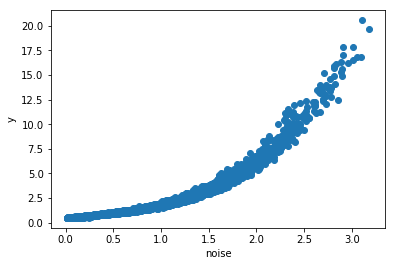

In [47]:
plt.scatter(n_arr2, y_arr2)
plt.xlabel("noise")
plt.ylabel("y")
plt.show()

In [48]:
# Adam_1642149242   /   4 crit
a4, b4, y_arr4, n_arr4 = v4_prepare_data_from_files('Adam_1642149242', 0.5)
print(a4, b4) 

1      [0, 71.85231126103531, 0.5, 1.0, 0.875334437150568]
0.5007140419311121
0.26516750873926015
0 || 0.5007140419311121 || 1 || 1 
0      [0, 76.85961428753137, 0.0, 0.0, 3.959995879364165]


C:\Program Files\Python\Python37\Lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: overflow encountered in exp


0.5000518015837994
0.394079125730333
0 || 0.5000518015837994 || 0 || 0 
1      [0, 57.46205352622816, 1.0, 1.0, 1.1976642004353986]
0.5008090053903387
0.39614615023717753
0 || 0.5008090053903387 || 1 || 1 
1      [0, 56.061908379961956, 0.0, 1.0, 1.250448830115942]
0.5007414836034035
0.3397482767823268
0 || 0.5007414836034035 || 1 || 1 
0      [0, 92.02788964916279, 1.0, 0.0, 0.7720971188742416]
0.5009424533267725
0.13032225617089954
0 || 0.5009424533267725 || 0 || 0 
1      [1, 55.005664254281506, 0.0, 1.0, 3.1738212980850613]
0.5001624733502311
0.5805112952491058
1 || 0.5001624733502311 || 1 || 0 
0      [1, 48.45986907413437, 1.0, 0.0, 1.4486747876405537]
0.5005769516645435
0.3414019991983857
1 || 0.5005769516645435 || 0 || 0 
0      [1, 80.25701885379539, 1.0, 0.0, 10.38802449814829]
0.5000052507658215
0.6333627331382906
1 || 0.5000052507658215 || 0 || 0 
0      [1, 68.57960398754868, 0.5, 0.0, 6.004068311076205]
0.5000508172799429
0.6953084982943276
1 || 0.5000508172799429 || 0 ||

0.500000596494615
0.8363809922419019
12 || 0.500000596494615 || 0 || 0 
1      [12, 95.18420226105829, 0.5, 1.0, 1.583011734704089]
0.5002777192105349
0.23708214730372534
12 || 0.5002777192105349 || 1 || 1 
1      [13, 20.537358446267884, 0.0, 1.0, 3.9198594761600587]
0.5001144082696082
0.6257868529269826
13 || 0.5001144082696082 || 1 || 0 
0      [13, 66.64989591536255, 0.5, 0.0, 1.3180533688500342]
0.5005235576204193
0.27004326089199765
13 || 0.5005235576204193 || 0 || 0 
0      [13, 69.69189808409494, 0.1, 0.0, 2.919997502035041]
0.500085933957676
0.5041578043928071
13 || 0.500085933957676 || 0 || 0 
0      [13, 11.491378304408851, 0.5, 0.0, 3.912876487721516]
0.5002189684309162
0.6261771184338292
13 || 0.5002189684309162 || 0 || 0 
0      [13, 31.45153109883466, 0.1, 0.0, 1.3350262821170364]
0.5006787978261373
0.4667377569539988
13 || 0.5006787978261373 || 0 || 0 
0      [14, 84.58659637552705, 0.5, 0.0, 0.7892304166184714]
0.5009045497216911
0.24642471504908184
14 || 0.50090454972

0.5001537085783623
0.6003330878960669
25 || 0.5001537085783623 || 0 || 0 
0      [25, 23.31072521184458, 0.5, 0.0, 0.8044241966674279]
0.5011023630647321
0.35138347618053206
25 || 0.5011023630647321 || 0 || 0 
0      [25, 86.69954148525431, 0.1, 0.0, 1.8033722082616015]
0.5003274162106623
0.4436053086435918
25 || 0.5003274162106623 || 0 || 0 
0      [25, 4.770633565926308, 1.0, 0.0, 3.1299428534549256]
0.5001642242187403
0.41732199089219457
25 || 0.5001642242187403 || 0 || 0 
0      [25, 67.60588400435006, 0.5, 0.0, 5.744032627973754]
0.5000719563839576
0.6730225514390799
25 || 0.5000719563839576 || 0 || 0 
0      [26, 6.364451833353479, 0.1, 0.0, 11.569755599779024]
0.5000126993509049
0.8365112061830217
26 || 0.5000126993509049 || 0 || 0 
0      [26, 64.10692950423089, 0.1, 0.0, 2.4792768514301677]
0.5003062767175732
0.4726281661913631
26 || 0.5003062767175732 || 0 || 0 
0      [26, 44.642025092010094, 0.1, 0.0, 2.3543990661558567]
0.500300979791247
0.5126273548733035
26 || 0.50030097

0.5011261517964269
0.056996399668529846
37 || 0.5011261517964269 || 1 || 1 
0      [37, 7.129512940653848, 0.1, 0.0, 2.147233012719516]
0.5004164360176505
0.5644689556440118
37 || 0.5004164360176505 || 0 || 0 
1      [37, 13.097050047250985, 0.5, 1.0, 0.7917375172731165]
0.5011008808287464
0.24542863081060995
37 || 0.5011008808287464 || 1 || 1 
0      [37, 73.96466392519008, 0.0, 0.0, 7.7092293606669795]
0.5000386233625247
0.8035980660057164
37 || 0.5000386233625247 || 0 || 0 
0      [38, 69.9624034692006, 0.0, 0.0, 1.3465073123115268]
0.5004961185026162
0.46558820525390054
38 || 0.5004961185026162 || 0 || 0 
0      [38, 8.022421330347452, 0.1, 0.0, 1.6506131069589194]
0.5004001664312008
0.26688314744058517
38 || 0.5004001664312008 || 0 || 0 
1      [38, 78.07086602157827, 0.0, 1.0, 1.9728646989001717]
0.500568964896599
0.45043034914305663
38 || 0.500568964896599 || 1 || 1 
0      [38, 23.464102560042395, 0.1, 0.0, 12.735858127471705]
0.5000042319842235
0.7307613942797699
38 || 0.50000

0.5014636957963492
0.10035229269656805
49 || 0.5014636957963492 || 1 || 1 
0      [49, 31.84702609559187, 0.1, 0.0, 1.13621452175812]
0.5005054787905122
0.3315795891432655
49 || 0.5005054787905122 || 0 || 0 
1      [50, 70.45664020686372, 0.1, 1.0, 1.0534296866307722]
0.5003973800625592
0.18843029681832174
50 || 0.5003973800625592 || 1 || 1 
0      [50, 21.86381153197903, 0.5, 0.0, 4.318804652981374]
0.5001217786146047
0.6424257554113922
50 || 0.5001217786146047 || 0 || 0 
1      [50, 65.12496555528521, 0.0, 1.0, 2.9879572784195965]
0.5001032208118728
0.3485266419220782
50 || 0.5001032208118728 || 1 || 1 
0      [50, 88.03593115093527, 0.0, 0.0, 2.745652810111294]
0.5001745225258301
0.4838151973376192
50 || 0.5001745225258301 || 0 || 0 
1      [50, 90.0983214490248, 0.0, 1.0, 1.5210403710354155]
0.5003607799524711
0.4113615224654658
50 || 0.5003607799524711 || 1 || 1 
1      [51, 21.541447232044327, 1.0, 1.0, 0.5642549860932777]
0.5010642188066278
0.3105878639667698
51 || 0.50106421880

0.5000414797394241
0.6524917685220769
61 || 0.5000414797394241 || 1 || 0 
1      [62, 94.55119967951502, 0.0, 1.0, 0.9888822177343277]
0.5004436506785106
0.28692673307916394
62 || 0.5004436506785106 || 1 || 1 
1      [62, 74.9334037904609, 0.1, 1.0, 2.4540163558117793]
0.5002279021690359
0.35108529259071175
62 || 0.5002279021690359 || 1 || 1 
0      [62, 12.379152674068933, 0.5, 0.0, 9.594639316300357]
0.5000093074472797
0.6365379301205885
62 || 0.5000093074472797 || 0 || 0 
0      [62, 99.30575723251165, 1.0, 0.0, 6.281906856810989]
0.5000152329120834
0.4873483474569763
62 || 0.5000152329120834 || 0 || 0 
0      [62, 13.122399196297701, 0.1, 0.0, 2.3337196954649153]
0.5003342780984372
0.3410447035787731
62 || 0.5003342780984372 || 0 || 0 
0      [63, 19.638031066563627, 0.0, 0.0, 2.5886248795873765]
0.500235800961714
0.4297833122284116
63 || 0.500235800961714 || 0 || 0 
0      [63, 5.038051609694555, 1.0, 0.0, 2.144567250981066]
0.5003150629928708
0.3971252512058177
63 || 0.5003150629

0.500010123227638
0.527238206909127
74 || 0.500010123227638 || 0 || 0 
0      [74, 19.15375452277303, 0.1, 0.0, 3.22651905292222]
0.5001395435831574
0.508172910775606
74 || 0.5001395435831574 || 0 || 0 
0      [74, 25.513397690546423, 0.5, 0.0, 1.429956481388335]
0.500493467900791
0.37580534200540916
74 || 0.500493467900791 || 0 || 0 
0      [74, 73.31143532269367, 1.0, 0.0, 1.246146877568417]
0.5004996806612234
0.16059474434643084
74 || 0.5004996806612234 || 0 || 0 
0      [74, 36.551773787251705, 0.0, 0.0, 3.0352514002027466]
0.5002786010408318
0.5343105272114849
74 || 0.5002786010408318 || 0 || 0 
0      [75, 30.56597417105042, 0.5, 0.0, 1.2483191374780822]
0.5002578969488455
0.3957098031355367
75 || 0.5002578969488455 || 0 || 0 
0      [75, 86.949135070778, 0.5, 0.0, 4.588076017816184]
0.5000734355183757
0.4963054301185261
75 || 0.5000734355183757 || 0 || 0 
0      [75, 31.747173745398104, 0.0, 0.0, 5.837841709031217]
0.5000545831953985
0.6758833156795381
75 || 0.5000545831953985 |

0.500030253355662
0.6170663183611775
86 || 0.500030253355662 || 0 || 0 
0      [86, 47.7170838186671, 0.1, 0.0, 4.683869682277679]
0.500083600830027
0.5961226966198206
86 || 0.500083600830027 || 0 || 0 
1      [86, 87.68444392305175, 0.0, 1.0, 1.2810306523748487]
0.5004499729488467
0.3146761432012784
86 || 0.5004499729488467 || 1 || 1 
0      [87, 32.55154520000828, 0.1, 0.0, 1.5743727597953552]
0.5005578266171985
0.3911577609293842
87 || 0.5005578266171985 || 0 || 0 
0      [87, 48.03566926281661, 0.0, 0.0, 0.944491741394636]
0.5008790762575046
0.30496830430692157
87 || 0.5008790762575046 || 0 || 0 
0      [87, 7.353382821426191, 0.1, 0.0, 3.0982781142346427]
0.5002390437363939
0.5563498077177089
87 || 0.5002390437363939 || 0 || 0 
1      [87, 0.17980846804812045, 1.0, 1.0, 1.6010442560796405]
0.5004658910642028
0.424821658015267
87 || 0.5004658910642028 || 1 || 1 
0      [87, 41.606398724935865, 0.0, 0.0, 0.6622904581139233]
0.501040787278196
0.07488212502023879
87 || 0.5010407872781

0.5004885953851279
0.4209110359838055
98 || 0.5004885953851279 || 1 || 1 
0      [99, 75.8568166434138, 0.1, 0.0, 0.7492037944435468]
0.5006384412192174
0.12568193493378663
99 || 0.5006384412192174 || 0 || 0 
0      [99, 84.4583936978052, 0.1, 0.0, 3.551431955428091]
0.500058361696664
0.45202436584856903
99 || 0.500058361696664 || 0 || 0 
0      [99, 92.70594815659956, 1.0, 0.0, 1.3475266134544501]
0.5004086336713556
0.4966728938484383
99 || 0.5004086336713556 || 0 || 0 
1      [99, 62.755936032202776, 1.0, 1.0, 2.1180892898782364]
0.5003570943286371
0.463985815321622
99 || 0.5003570943286371 || 1 || 1 
1      [99, 22.29717527625966, 0.1, 1.0, 0.6928934133922693]
0.5007620663912529
0.18025441071161477
99 || 0.5007620663912529 || 1 || 1 
0      [100, 95.27346657970759, 0.0, 0.0, 3.7765766700121137]
0.5001891104483679
0.45285272787217745
100 || 0.5001891104483679 || 0 || 0 
0      [100, 56.64534887858854, 0.5, 0.0, 2.0452343500815005]
0.500387307092908
0.3614166139627911
100 || 0.5003873

0.5000984177761513
0.4252272560934283
110 || 0.5000984177761513 || 0 || 0 
0      [111, 82.06750390607192, 1.0, 0.0, 1.7945975843841455]
0.5002480527014507
0.42842359516181494
111 || 0.5002480527014507 || 0 || 0 
0      [111, 96.0616193388424, 0.5, 0.0, 2.741998055778938]
0.5001138527835206
0.3660870485454306
111 || 0.5001138527835206 || 0 || 0 
1      [111, 91.07392345635053, 1.0, 1.0, 2.332491564490823]
0.5002205946602682
0.3213254479525357
111 || 0.5002205946602682 || 1 || 1 
1      [111, 78.80149043875679, 0.0, 1.0, 2.051657663603324]
0.5005108865501529
0.44466539444359426
111 || 0.5005108865501529 || 1 || 1 
0      [111, 24.56476280336753, 0.1, 0.0, 6.230232994383592]
0.500047437077214
0.6272149700593553
111 || 0.500047437077214 || 0 || 0 
1      [112, 96.4851184432058, 0.1, 1.0, 3.5836376317993297]
0.5001124702414567
0.4663568631244613
112 || 0.5001124702414567 || 1 || 1 
0      [112, 60.576461693074556, 0.1, 0.0, 1.735296445164456]
0.5003893134018202
0.4324800013799937
112 || 0.

0.5005384746368247
0.3806411194959607
123 || 0.5005384746368247 || 0 || 0 
0      [123, 47.45861959943509, 0.5, 0.0, 0.5739002502332256]
0.5019572751176195
0.09741131887833858
123 || 0.5019572751176195 || 0 || 0 
0      [123, 40.543997294552, 1.0, 0.0, 1.602167941208022]
0.5006717567429001
0.34588680617262096
123 || 0.5006717567429001 || 0 || 0 
1      [123, 87.3985411509979, 0.1, 1.0, 3.1785259292847066]
0.5001659321556619
0.5915144120290362
123 || 0.5001659321556619 || 1 || 0 
0      [123, 56.26398112893809, 0.1, 0.0, 10.846501891350023]
0.5000104127251792
0.7512131512694467
123 || 0.5000104127251792 || 0 || 0 
0      [124, 62.930694909616804, 0.5, 0.0, 7.463997325106257]
0.5000187539846822
0.5539254476848611
124 || 0.5000187539846822 || 0 || 0 
0      [124, 19.461456809626448, 0.0, 0.0, 5.8258513560542]
0.5000579871650451
0.6374234604301331
124 || 0.5000579871650451 || 0 || 0 
0      [124, 19.130949749804227, 0.0, 0.0, 4.502934134250219]
0.5001081469363015
0.5846685876581256
124 || 

0.500184807476853
0.5918555780529701
135 || 0.500184807476853 || 0 || 0 
1      [135, 46.59151919332988, 1.0, 1.0, 1.2602277323355464]
0.5006141944798626
0.31987553146938363
135 || 0.5006141944798626 || 1 || 1 
1      [135, 74.5244664328409, 0.1, 1.0, 1.4662425964963695]
0.5002641486730645
0.31404004114784523
135 || 0.5002641486730645 || 1 || 1 
0      [135, 13.67308107386392, 0.0, 0.0, 7.218628210769407]
0.5000463508946773
0.6466717781816048
135 || 0.5000463508946773 || 0 || 0 
0      [136, 10.2424133492528, 0.1, 0.0, 0.8331797546407942]
0.501001665626045
0.3097709319029935
136 || 0.501001665626045 || 0 || 0 
0      [136, 65.30612630825216, 1.0, 0.0, 1.0753304397186232]
0.5007188159505926
0.25771136354510077
136 || 0.5007188159505926 || 0 || 0 
0      [136, 50.47365479371718, 0.5, 0.0, 4.3467998794749265]
0.500177747140811
0.668634776481983
136 || 0.500177747140811 || 0 || 0 
0      [136, 45.117961164874885, 1.0, 0.0, 2.846715749179095]
0.5002367003654837
0.5060926423105886
136 || 0.5

0.5001117796660767
0.5481767032735773
147 || 0.5001117796660767 || 0 || 0 
0      [147, 59.509780072406805, 0.0, 0.0, 3.851451361463921]
0.5000433832631491
0.39868186901018865
147 || 0.5000433832631491 || 0 || 0 
0      [148, 91.61251507080675, 0.1, 0.0, 18.08303585762287]
0.500001069226584
0.964934314951916
148 || 0.500001069226584 || 0 || 0 
0      [148, 8.199250101359667, 1.0, 0.0, 1.0744697795717315]
0.5006678386276409
0.2495152168223491
148 || 0.5006678386276409 || 0 || 0 
0      [148, 78.49358906348418, 0.0, 0.0, 3.4253043028010293]
0.5000926205971216
0.6008647257672545
148 || 0.5000926205971216 || 0 || 0 
0      [148, 55.30145968452733, 0.0, 0.0, 6.781418513216834]
0.5000200895698348
0.5412937285290671
148 || 0.5000200895698348 || 0 || 0 
1      [148, 59.940919791044, 0.1, 1.0, 3.938329116337578]
0.5001573641696891
0.6044037680574056
148 || 0.5001573641696891 || 1 || 0 
0      [149, 41.23406989396165, 0.0, 0.0, 1.0815142321888098]
0.5008548567383047
0.23899022993341296
149 || 0.

0.5003750680868433
0.6202079660408321
160 || 0.5003750680868433 || 1 || 0 
0      [160, 26.621434516014208, 1.0, 0.0, 3.43449984482027]
0.5000740297039162
0.4602426392938427
160 || 0.5000740297039162 || 0 || 0 
0      [160, 57.45047762984736, 0.0, 0.0, 0.8604170391499908]
0.50062295790416
0.09646382575645952
160 || 0.50062295790416 || 0 || 0 
1      [160, 12.186549487791337, 0.5, 1.0, 0.7412651344889453]
0.5014303473057536
0.23987424657665996
160 || 0.5014303473057536 || 1 || 1 
0      [160, 15.346537310740871, 0.5, 0.0, 1.3419753250349107]
0.5006936110454259
0.2923562846606958
160 || 0.5006936110454259 || 0 || 0 
1      [161, 44.371271434975476, 0.1, 1.0, 4.976708331530017]
0.500053841110189
0.5317453346772167
161 || 0.500053841110189 || 1 || 0 
0      [161, 58.76534352214181, 0.0, 0.0, 1.382400205358668]
0.5002730997960422
0.2878248037820639
161 || 0.5002730997960422 || 0 || 0 
0      [161, 66.73034094211792, 0.5, 0.0, 5.135870313503962]
0.500053499113597
0.5907742095306929
161 || 0.

0.5000362654963976
0.4728139810256364
172 || 0.5000362654963976 || 0 || 0 
1      [172, 56.71729788527634, 1.0, 1.0, 4.669075828334789]
0.5000907314522062
0.622945978811978
172 || 0.5000907314522062 || 1 || 0 
0      [172, 9.053405826352018, 0.1, 0.0, 2.9705136212555803]
0.5001251799104588
0.46370278387075303
172 || 0.5001251799104588 || 0 || 0 
0      [172, 85.77908460047708, 0.0, 0.0, 2.554572427075913]
0.5001315989765598
0.455622002473423
172 || 0.5001315989765598 || 0 || 0 
0      [172, 83.5189565395673, 0.0, 0.0, 3.076826671055875]
0.5002661789485632
0.4822610723315641
172 || 0.5002661789485632 || 0 || 0 
0      [173, 36.92126840492897, 0.5, 0.0, 3.1433842176923656]
0.5001495082794244
0.6447381784853357
173 || 0.5001495082794244 || 0 || 0 
0      [173, 32.86360248002788, 0.1, 0.0, 4.454677217603538]
0.5001076846872814
0.5233349265584776
173 || 0.5001076846872814 || 0 || 0 
0      [173, 26.906121342601185, 1.0, 0.0, 0.5958135482988651]
0.5011324912462087
0.29768929530015564
173 || 

0.5000014760924105
1.0039947769255757
184 || 0.5000014760924105 || 0 || 0 
0      [184, 34.63410811491905, 1.0, 0.0, 0.6750608118670116]
0.5013477305142561
0.1654895004643748
184 || 0.5013477305142561 || 0 || 0 
1      [184, 42.24148118247262, 0.1, 1.0, 2.867627488013068]
0.5002798619290965
0.4686644291335773
184 || 0.5002798619290965 || 1 || 1 
0      [184, 6.36512060981077, 0.5, 0.0, 2.956395243755924]
0.5002457768649429
0.6153503005581665
184 || 0.5002457768649429 || 0 || 0 
0      [185, 34.25047925260193, 0.5, 0.0, 8.257203530937387]
0.5000233228149503
0.7556034961349305
185 || 0.5000233228149503 || 0 || 0 
0      [185, 80.36459964308082, 0.5, 0.0, 0.7701503926978609]
0.5004949543962602
0.2720195475507781
185 || 0.5004949543962602 || 0 || 0 
0      [185, 7.768313972130758, 0.1, 0.0, 0.5283192568937893]
0.5014492568966281
0.1696035438553625
185 || 0.5014492568966281 || 0 || 0 
0      [185, 58.092859788503205, 1.0, 0.0, 9.248862075955849]
0.5000091061219202
0.6248069104284348
185 || 

0.5002418279490083
0.46963587943974083
196 || 0.5002418279490083 || 1 || 1 
1      [196, 80.10220341375917, 1.0, 1.0, 0.5373811759222853]
0.501466231628976
0.09280092351350581
196 || 0.501466231628976 || 1 || 1 
0      [196, 22.987508557390377, 0.5, 0.0, 7.6993452820818575]
0.5000147767397134
0.6266611545788232
196 || 0.5000147767397134 || 0 || 0 
1      [196, 63.63281509695907, 1.0, 1.0, 0.6770122572209113]
0.5007799695972296
0.34349693511877344
196 || 0.5007799695972296 || 1 || 1 
0      [197, 31.97975971931285, 1.0, 0.0, 3.0918489353029504]
0.5002161450730493
0.6112769112825714
197 || 0.5002161450730493 || 0 || 0 
0      [197, 14.897341721493678, 1.0, 0.0, 0.7244765747528438]
0.5009165491467672
0.18255759777055486
197 || 0.5009165491467672 || 0 || 0 
0      [197, 50.401900745555686, 0.0, 0.0, 6.040561909634442]
0.500064134641881
0.6866743132405785
197 || 0.500064134641881 || 0 || 0 
0      [197, 10.522958164971191, 0.0, 0.0, 1.3111486345066914]
0.5006874692453995
0.4787203669464004


0.5002270581905446
0.39572804566310166
208 || 0.5002270581905446 || 0 || 0 
0      [208, 5.3931364400848505, 0.5, 0.0, 1.1169091125854362]
0.5009576419549852
0.3160407609558399
208 || 0.5009576419549852 || 0 || 0 
0      [208, 97.22550347693408, 0.1, 0.0, 4.521635120054832]
0.50005267484694
0.5868368924474432
208 || 0.50005267484694 || 0 || 0 
0      [208, 45.59500359554027, 1.0, 0.0, 10.309342528867113]
0.5000054353667366
0.635550637368953
208 || 0.5000054353667366 || 0 || 0 
0      [209, 43.507523378854124, 0.0, 0.0, 4.703767109884004]
0.500053668043919
0.5220174712921518
209 || 0.500053668043919 || 0 || 0 
1      [209, 10.746307132344125, 0.1, 1.0, 3.6563438482013697]
0.5001284921891358
0.5450851561288645
209 || 0.5001284921891358 || 1 || 0 
0      [209, 16.667347026133616, 0.5, 0.0, 1.0094759542147]
0.5009505201721811
0.27643957861387286
209 || 0.5009505201721811 || 0 || 0 
1      [209, 72.04142069679598, 1.0, 1.0, 3.8088644702400583]
0.5000316366547559
0.4388436667489588
209 || 0.

0.500506975531652
0.34093190335104845
220 || 0.500506975531652 || 0 || 0 
0      [220, 87.10553112885783, 1.0, 0.0, 5.911749128996306]
0.5000277545524037
0.49233812066953725
220 || 0.5000277545524037 || 0 || 0 
0      [220, 2.558831222831409, 1.0, 0.0, 9.90703428202314]
0.5000147274975992
0.6690734220040839
220 || 0.5000147274975992 || 0 || 0 
0      [220, 49.00402140950464, 0.0, 0.0, 3.419466801170413]
0.5002516664900233
0.5294732569821357
220 || 0.5002516664900233 || 0 || 0 
0      [221, 65.4271195244857, 0.1, 0.0, 1.3622571937250756]
0.5003381587186305
0.2551058166264704
221 || 0.5003381587186305 || 0 || 0 
1      [221, 32.78015577536977, 0.1, 1.0, 1.1030786769733056]
0.5009841413679074
0.42536545208673027
221 || 0.5009841413679074 || 1 || 1 
0      [221, 7.212651388914798, 1.0, 0.0, 1.2990044644827132]
0.5007887105645714
0.369840182093093
221 || 0.5007887105645714 || 0 || 0 
0      [221, 80.4285163865174, 1.0, 0.0, 15.410077015573712]
0.5000015381322157
0.8150165702248151
221 || 0.

0.5006883105570844
0.10633109963203095
232 || 0.5006883105570844 || 0 || 0 
0      [232, 16.953850788223555, 0.5, 0.0, 9.217691118974365]
0.5000160577942746
0.6924121245831523
232 || 0.5000160577942746 || 0 || 0 
0      [232, 10.422280716490112, 1.0, 0.0, 3.3961174331397426]
0.500262381643707
0.547942982729011
232 || 0.500262381643707 || 0 || 0 
0      [232, 14.157619333234628, 0.0, 0.0, 1.876065055238553]
0.5005046391755174
0.47751278658556234
232 || 0.5005046391755174 || 0 || 0 
0      [233, 53.133480187895245, 1.0, 0.0, 9.503809302145873]
0.5000184179157302
0.7319982318338468
233 || 0.5000184179157302 || 0 || 0 
0      [233, 23.06814461512381, 0.0, 0.0, 1.4471097745400785]
0.5004934147391772
0.4239485798144629
233 || 0.5004934147391772 || 0 || 0 
1      [233, 69.30549183935301, 0.0, 1.0, 0.6372010537315176]
0.5012650921688067
0.16157629728042866
233 || 0.5012650921688067 || 1 || 1 
1      [233, 55.03886237312806, 0.1, 1.0, 1.9202996885908965]
0.5001359131568903
0.2514917185881084
23

0.5000171145182369
0.5286486608556785
244 || 0.5000171145182369 || 0 || 0 
0      [244, 46.71180828791532, 1.0, 0.0, 3.428849820041262]
0.5000827448105121
0.4566000640552
244 || 0.5000827448105121 || 0 || 0 
0      [244, 63.89809306737407, 0.0, 0.0, 3.986074739773236]
0.500053060569438
0.4591369910157116
244 || 0.500053060569438 || 0 || 0 
1      [245, 25.63681326905819, 0.5, 1.0, 3.9269986009031577]
0.5001938633792254
0.5213940600588627
245 || 0.5001938633792254 || 1 || 0 
0      [245, 94.47046274881376, 0.1, 0.0, 0.9994102212063456]
0.5006716673715315
0.16980180085034327
245 || 0.5006716673715315 || 0 || 0 
0      [245, 75.84438409408659, 0.5, 0.0, 2.0188714228426075]
0.5002049568428731
0.3973374007719865
245 || 0.5002049568428731 || 0 || 0 
0      [245, 78.12675093624202, 1.0, 0.0, 1.4745363936535452]
0.5002778518877853
0.4057255181744119
245 || 0.5002778518877853 || 0 || 0 
0      [245, 83.67555937400708, 0.1, 0.0, 5.525953218211976]
0.5000453626568405
0.5426858868163523
245 || 0.5

0.5005351746481693
0.43154955384308485
256 || 0.5005351746481693 || 1 || 1 
0      [257, 16.936354385711333, 0.5, 0.0, 15.231687179644679]
0.5000008598557508
0.8091056971447942
257 || 0.5000008598557508 || 0 || 0 
0      [257, 38.059263448803755, 0.0, 0.0, 5.51066125516317]
0.5001158241216109
0.6817556853418655
257 || 0.5001158241216109 || 0 || 0 
0      [257, 96.50056035630408, 0.0, 0.0, 1.8123404846121003]
0.5005365073595728
0.5211431734050683
257 || 0.5005365073595728 || 0 || 0 
1      [257, 90.71766410866807, 0.0, 1.0, 2.775820455820177]
0.5002486933344047
0.48725676144768443
257 || 0.5002486933344047 || 1 || 1 
0      [257, 26.92904374859203, 0.5, 0.0, 1.0504505967879323]
0.5009463721529521
0.3613755867836838
257 || 0.5009463721529521 || 0 || 0 
1      [258, 20.280946228270462, 0.1, 1.0, 9.869677685342975]
0.5000044167631744
0.791373788376365
258 || 0.5000044167631744 || 1 || 0 
1      [258, 83.31716202120423, 0.0, 1.0, 2.6642813976724917]
0.5001671282577385
0.48261278854067957
25

0.5016960798162746
0.1735065938184447
268 || 0.5016960798162746 || 1 || 1 
0      [269, 77.42049349316635, 0.5, 0.0, 1.5962765781911976]
0.5006173055431598
0.4297529383634169
269 || 0.5006173055431598 || 0 || 0 
1      [269, 33.95184680951181, 0.0, 1.0, 4.114672587722083]
0.5000770952273333
0.45321551555822415
269 || 0.5000770952273333 || 1 || 1 
0      [269, 37.37678191572864, 0.1, 0.0, 0.8762099907934826]
0.5008937979768338
0.3942133689043889
269 || 0.5008937979768338 || 0 || 0 
0      [269, 63.85720048756332, 0.0, 0.0, 0.6091167265207723]
0.5009190742845738
0.2633850939830398
269 || 0.5009190742845738 || 0 || 0 
1      [269, 20.322511169622725, 0.1, 1.0, 1.2284419558365312]
0.500602759759283
0.39222422480203406
269 || 0.500602759759283 || 1 || 1 
0      [270, 59.651814786593604, 0.5, 0.0, 3.914105549037151]
0.5000599411628831
0.37503499392302114
270 || 0.5000599411628831 || 0 || 0 
0      [270, 27.970243985427622, 0.0, 0.0, 0.5989123795775676]
0.5014674079901925
0.1719974265970448
2

0.5004786132982925
0.5271090832378862
281 || 0.5004786132982925 || 0 || 0 
1      [281, 0.11525748426631788, 0.1, 1.0, 4.827987569220822]
0.5000800069471149
0.6411579528943914
281 || 0.5000800069471149 || 1 || 0 
0      [281, 43.96465226534209, 0.5, 0.0, 1.7921255078910214]
0.5004778339664051
0.37757875753059916
281 || 0.5004778339664051 || 0 || 0 
0      [281, 38.17133901403544, 0.0, 0.0, 1.9892842806296602]
0.5003840547188424
0.4104274385085632
281 || 0.5003840547188424 || 0 || 0 
0      [281, 37.1292666701255, 0.1, 0.0, 4.940057408541038]
0.5000196978568934
0.32142525700031765
281 || 0.5000196978568934 || 0 || 0 
0      [282, 26.693554398754983, 0.5, 0.0, 0.7244464073488588]
0.5010428579301327
0.22872499411059877
282 || 0.5010428579301327 || 0 || 0 
0      [282, 44.792112465532476, 0.0, 0.0, 5.700812488591917]
0.5000395825483509
0.5504883595203295
282 || 0.5000395825483509 || 0 || 0 
0      [282, 76.13842059351767, 0.1, 0.0, 2.217693457252679]
0.5001162663427733
0.4373409281611054
2

0.5003375941799239
0.2510335226102755
293 || 0.5003375941799239 || 0 || 0 
0      [293, 80.70508618267142, 0.0, 0.0, 9.36525304733241]
0.5000194023868445
0.7223679882960024
293 || 0.5000194023868445 || 0 || 0 
0      [293, 39.95742286391815, 0.5, 0.0, 1.2354516106013884]
0.5004493781075652
0.20068741356248485
293 || 0.5004493781075652 || 0 || 0 
0      [293, 85.24469532922446, 0.1, 0.0, 0.7483206989972282]
0.5008424001029321
0.2936363392516553
293 || 0.5008424001029321 || 0 || 0 
0      [293, 47.01695058010106, 0.5, 0.0, 4.360637409618481]
0.5000858184907456
0.5096965586976085
293 || 0.5000858184907456 || 0 || 0 
0      [294, 16.361445986717456, 1.0, 0.0, 20.924089752620663]
0.5000001157866883
0.7970049555241177
294 || 0.5000001157866883 || 0 || 0 
0      [294, 51.397416388935, 1.0, 0.0, 2.393747326846702]
0.5002393856790552
0.5432841208519131
294 || 0.5002393856790552 || 0 || 0 
1      [294, 63.63435888211896, 0.1, 1.0, 1.613117733225461]
0.5002588423728375
0.21530984580289275
294 || 

0.500450138323657
0.34062390057287667
305 || 0.500450138323657 || 1 || 1 
0      [305, 33.94542906312055, 0.0, 0.0, 2.506338361110851]
0.5001849239693952
0.3929883214213172
305 || 0.5001849239693952 || 0 || 0 
0      [305, 71.84186780542223, 0.0, 0.0, 3.1035886876924974]
0.5002718887987657
0.5357684132848618
305 || 0.5002718887987657 || 0 || 0 
0      [305, 51.09102329590197, 0.5, 0.0, 8.45711244029316]
0.5000255869633955
0.6950593066411663
305 || 0.5000255869633955 || 0 || 0 
1      [306, 73.58125183054571, 0.0, 1.0, 1.2506398362315028]
0.5006132424307141
0.25942330170183864
306 || 0.5006132424307141 || 1 || 1 
0      [306, 36.46157586246832, 1.0, 0.0, 3.0346329206574554]
0.500174020417424
0.42704539978034023
306 || 0.500174020417424 || 0 || 0 
1      [306, 70.04251117442941, 0.1, 1.0, 2.6371068753726723]
0.5003349463851634
0.5890612834784201
306 || 0.5003349463851634 || 1 || 0 
0      [306, 35.7826966748831, 0.5, 0.0, 1.3054110253163533]
0.5005992361597035
0.3941532909146153
306 || 0

0.5009762401354059
0.10121734757204315
317 || 0.5009762401354059 || 1 || 1 
1      [317, 74.04452992564697, 0.0, 1.0, 0.5101983599456796]
0.500986149031301
0.2601691042703655
317 || 0.500986149031301 || 1 || 1 
1      [317, 32.271768673678324, 0.0, 1.0, 0.6638419069874023]
0.5009601788396983
0.1816424449939321
317 || 0.5009601788396983 || 1 || 1 
0      [318, 69.48349111626419, 1.0, 0.0, 2.3945219247426026]
0.5001788654379254
0.5332090255995918
318 || 0.5001788654379254 || 0 || 0 
0      [318, 64.58190098372533, 1.0, 0.0, 1.6360266043768394]
0.5003975275409747
0.41013372717005997
318 || 0.5003975275409747 || 0 || 0 
0      [318, 27.099268857512403, 0.0, 0.0, 3.025924020435722]
0.5000967467602241
0.344053274458815
318 || 0.5000967467602241 || 0 || 0 
1      [318, 17.558420634613377, 0.0, 1.0, 2.4721460538998583]
0.5004412181965167
0.5942800675997169
318 || 0.5004412181965167 || 1 || 0 
0      [318, 53.06601666717635, 0.0, 0.0, 1.0959180276931835]
0.5009284918968694
0.28101343339483287
3

0.5000266675046343
0.7748039304703501
329 || 0.5000266675046343 || 0 || 0 
1      [329, 31.435362309158954, 0.1, 1.0, 1.7176875833684555]
0.5003814647750805
0.23752026628892675
329 || 0.5003814647750805 || 1 || 1 
0      [330, 74.85530936083013, 1.0, 0.0, 3.659598346468971]
0.5000725162925218
0.4669713113028731
330 || 0.5000725162925218 || 0 || 0 
0      [330, 37.879299326857776, 0.1, 0.0, 1.8900524376063572]
0.5003651816640011
0.44680537880564236
330 || 0.5003651816640011 || 0 || 0 
1      [330, 3.2706208928097116, 1.0, 1.0, 3.9034959073226654]
0.5002106411316585
0.5975690704136045
330 || 0.5002106411316585 || 1 || 0 
0      [330, 97.81800991142613, 0.0, 0.0, 5.57194658244088]
0.5000177707243108
0.4216943461361905
330 || 0.5000177707243108 || 0 || 0 
0      [330, 13.911228875459603, 0.0, 0.0, 5.204857234289473]
0.500040899999701
0.5160226878717611
330 || 0.500040899999701 || 0 || 0 
0      [331, 98.62124407816651, 1.0, 0.0, 3.3255136671777574]
0.5000786054552553
0.389621826748613
331 

0.5010359020709452
0.2180743216388507
341 || 0.5010359020709452 || 1 || 1 
0      [342, 40.786684419633204, 0.1, 0.0, 0.9416528852799277]
0.5007206720072619
0.3637728355296409
342 || 0.5007206720072619 || 0 || 0 
0      [342, 54.08238190958544, 1.0, 0.0, 1.4662979927996562]
0.5005639910343147
0.45103759761265505
342 || 0.5005639910343147 || 0 || 0 
0      [342, 17.125775348037465, 0.1, 0.0, 2.4878363428082877]
0.500469202189363
0.4972957094672967
342 || 0.500469202189363 || 0 || 0 
0      [342, 45.57389589012074, 1.0, 0.0, 0.7207376145395703]
0.5007764153937504
0.24260095153231323
342 || 0.5007764153937504 || 0 || 0 
0      [342, 78.47293803737807, 0.5, 0.0, 1.8552830226327826]
0.5003497873760149
0.3762378303931108
342 || 0.5003497873760149 || 0 || 0 
0      [343, 36.40507261664999, 0.0, 0.0, 0.6238689247261084]
0.5008457461664026
0.3015235368977042
343 || 0.5008457461664026 || 0 || 0 
0      [343, 25.58812281805126, 0.0, 0.0, 1.292013541242377]
0.50059657066181
0.35099722186492244
343

0.5000433586005689
0.6254733947187862
353 || 0.5000433586005689 || 0 || 0 
0      [354, 31.530860799324273, 1.0, 0.0, 2.8566291675543125]
0.5003270675841041
0.516454164158642
354 || 0.5003270675841041 || 0 || 0 
0      [354, 31.594918868126936, 1.0, 0.0, 4.347801084456261]
0.5001203054002985
0.5948359958606663
354 || 0.5001203054002985 || 0 || 0 
0      [354, 78.1380965048265, 0.5, 0.0, 6.367853663632558]
0.5000281395878416
0.6194093647151142
354 || 0.5000281395878416 || 0 || 0 
0      [354, 60.1565311545357, 0.1, 0.0, 4.719631493315288]
0.500077487753359
0.5290913030486231
354 || 0.500077487753359 || 0 || 0 
0      [354, 77.51313817773627, 0.1, 0.0, 3.0495131685102317]
0.5002177588124813
0.5482918217798057
354 || 0.5002177588124813 || 0 || 0 
0      [355, 14.824029720620596, 0.5, 0.0, 2.2063914257908976]
0.500527075311985
0.5350474657906988
355 || 0.500527075311985 || 0 || 0 
0      [355, 98.6752410307678, 0.0, 0.0, 3.0827230560581436]
0.5001003668557871
0.42405405594546935
355 || 0.5

0.5000548419864742
0.4638713215085216
366 || 0.5000548419864742 || 0 || 0 
1      [366, 33.729804940428444, 0.0, 1.0, 0.6316466137252967]
0.5014010027783392
0.10553730412396611
366 || 0.5014010027783392 || 1 || 1 
0      [366, 87.59887373708062, 0.5, 0.0, 6.217675343863762]
0.500036217497525
0.5887351055407374
366 || 0.500036217497525 || 0 || 0 
0      [366, 35.79173180484359, 1.0, 0.0, 0.6175793355003315]
0.500705032979453
0.30095177913986026
366 || 0.500705032979453 || 0 || 0 
1      [366, 5.947335013332494, 0.0, 1.0, 6.113264244908565]
0.5000998874624545
0.6769130606848239
366 || 0.5000998874624545 || 1 || 0 
0      [367, 97.74604735907005, 0.1, 0.0, 1.867358654484873]
0.5002852505069221
0.45276080330575025
367 || 0.5002852505069221 || 0 || 0 
0      [367, 4.105338378607271, 0.0, 0.0, 1.415139347866627]
0.5005937268995644
0.38909203921513147
367 || 0.5005937268995644 || 0 || 0 
0      [367, 41.619551848500954, 1.0, 0.0, 3.2334252599383526]
0.5001465797356592
0.5524947538556474
367 |

0.5000904800970115
0.5999880776113407
378 || 0.5000904800970115 || 0 || 0 
0      [378, 92.21530083709752, 0.0, 0.0, 1.2336734347060851]
0.5004634961799814
0.2434158596415368
378 || 0.5004634961799814 || 0 || 0 
1      [378, 68.70124737659377, 0.1, 1.0, 1.0474021408965295]
0.5004653503187336
0.4045284768117023
378 || 0.5004653503187336 || 1 || 1 
1      [378, 75.89112129328738, 0.0, 1.0, 1.0907996277582792]
0.5005654048255052
0.2358981394688082
378 || 0.5005654048255052 || 1 || 1 
0      [378, 13.408346512901643, 0.0, 0.0, 3.5818129029969223]
0.5002392603399637
0.5866295128858465
378 || 0.5002392603399637 || 0 || 0 
1      [379, 77.85569352005297, 0.5, 1.0, 5.651217262524971]
0.5000184918706451
0.6325359654986142
379 || 0.5000184918706451 || 1 || 0 
0      [379, 21.151591968358908, 0.5, 0.0, 11.425543134929939]
0.5000151047938142
0.7197337435745584
379 || 0.5000151047938142 || 0 || 0 
0      [379, 92.41526608787959, 1.0, 0.0, 1.4752744130835556]
0.5003108884140995
0.4169351605534584
37

0.5005644559774182
0.4338566859849711
390 || 0.5005644559774182 || 0 || 0 
0      [390, 74.70854938179399, 0.5, 0.0, 2.267404758432625]
0.5001980011650181
0.5259824548889824
390 || 0.5001980011650181 || 0 || 0 
0      [390, 24.756086383693255, 0.1, 0.0, 3.4192461919708697]
0.5002443475157428
0.6681604288415774
390 || 0.5002443475157428 || 0 || 0 
0      [391, 99.03036296014307, 0.0, 0.0, 1.8639615658874609]
0.5003984178323062
0.480465862539311
391 || 0.5003984178323062 || 0 || 0 
0      [391, 84.61900495801167, 0.5, 0.0, 2.8751302585962124]
0.5001477976224983
0.43501601747882807
391 || 0.5001477976224983 || 0 || 0 
0      [391, 73.78485230570888, 0.0, 0.0, 3.168052302887841]
0.5000710244118409
0.40779127903731155
391 || 0.5000710244118409 || 0 || 0 
1      [391, 56.210878409501674, 0.1, 1.0, 2.5343556713233775]
0.500159905466084
0.2829722344078936
391 || 0.500159905466084 || 1 || 1 
0      [391, 76.1271532848576, 1.0, 0.0, 1.2762864945437418]
0.5005756631272336
0.4173024154804435
391 |

0.501398186814279
0.19996663667563705
402 || 0.501398186814279 || 1 || 1 
0      [402, 22.258262074442097, 0.0, 0.0, 0.6384196581553839]
0.5013425251607936
0.3383145841099776
402 || 0.5013425251607936 || 0 || 0 
0      [402, 14.561348764352433, 0.5, 0.0, 4.963247501047779]
0.5000664085425538
0.6295500622072837
402 || 0.5000664085425538 || 0 || 0 
0      [403, 39.98508267982197, 0.1, 0.0, 2.4253196010023603]
0.5003876644297375
0.3758235577487458
403 || 0.5003876644297375 || 0 || 0 
0      [403, 12.35655327181162, 0.1, 0.0, 11.931508194774691]
0.500007145963553
0.786448939832248
403 || 0.500007145963553 || 0 || 0 
0      [403, 80.45953533800044, 0.0, 0.0, 5.292279649077174]
0.5000295128332459
0.5424599977945658
403 || 0.5000295128332459 || 0 || 0 
0      [403, 0.935835362563564, 0.0, 0.0, 3.85067412262977]
0.5002521544488918
0.5936931567214659
403 || 0.5002521544488918 || 0 || 0 
0      [403, 5.234514444517413, 0.0, 0.0, 1.1453592163836952]
0.5008275384422862
0.36780504023604127
403 || 0

0.5000327887654116
0.6749649671442853
414 || 0.5000327887654116 || 0 || 0 
0      [414, 98.42399334287619, 0.0, 0.0, 1.228412699085147]
0.500538394282471
0.3840851121007137
414 || 0.500538394282471 || 0 || 0 
0      [414, 19.93730406005554, 0.5, 0.0, 10.576899740854605]
0.5000107622853044
0.7459519130560095
414 || 0.5000107622853044 || 0 || 0 
0      [415, 1.6066598787911779, 0.1, 0.0, 1.2577655365634062]
0.5005158515613772
0.3277880066523329
415 || 0.5005158515613772 || 0 || 0 
1      [415, 39.01981773773905, 0.0, 1.0, 1.2472361081025287]
0.5003345066073505
0.24128838334661626
415 || 0.5003345066073505 || 1 || 1 
0      [415, 36.7507568127186, 0.1, 0.0, 5.886077476736626]
0.5000312150138629
0.5848564546774053
415 || 0.5000312150138629 || 0 || 0 
1      [415, 23.167074703245206, 0.1, 1.0, 4.2443028113950465]
0.5000896543021823
0.5493328587243406
415 || 0.5000896543021823 || 1 || 0 
0      [415, 81.78839339578465, 0.0, 0.0, 1.045171763886293]
0.5008186115758629
0.28028362297413606
415 |

0.5001308418743018
0.30650191141694216
426 || 0.5001308418743018 || 0 || 0 
0      [426, 29.391002195569726, 0.5, 0.0, 1.9799683996345534]
0.5004496410576748
0.44297412151910137
426 || 0.5004496410576748 || 0 || 0 
0      [427, 89.70679360338542, 0.0, 0.0, 2.7954969590379113]
0.500131674589176
0.44564610437208935
427 || 0.500131674589176 || 0 || 0 
0      [427, 12.08792541653015, 0.0, 0.0, 0.8949592469844442]
0.5010728528355463
0.22401679338791677
427 || 0.5010728528355463 || 0 || 0 
0      [427, 23.989387172505992, 0.5, 0.0, 1.2858635636607285]
0.500335312008772
0.2651419318245527
427 || 0.500335312008772 || 0 || 0 
0      [427, 64.62418944453107, 0.1, 0.0, 1.6463726275884052]
0.5005128445830116
0.2857390014420488
427 || 0.5005128445830116 || 0 || 0 
0      [427, 41.39906179414676, 0.1, 0.0, 0.5072469816110003]
0.5034731568350527
0.053395858223554075
427 || 0.5034731568350527 || 0 || 0 
0      [428, 34.49864294004974, 0.0, 0.0, 10.498351537373772]
0.5000121191557269
0.7102398515950911

0.5011621309724886
0.2400676858761042
438 || 0.5011621309724886 || 0 || 0 
0      [439, 5.278285167806546, 0.1, 0.0, 4.31560482210357]
0.5001905137266159
0.6488752060663899
439 || 0.5001905137266159 || 0 || 0 
0      [439, 61.99333318503763, 1.0, 0.0, 3.5788096082293275]
0.5002134104413467
0.45207316546338355
439 || 0.5002134104413467 || 0 || 0 
0      [439, 85.35832722705403, 0.5, 0.0, 0.918097908828954]
0.5004945485777689
0.3829454810455166
439 || 0.5004945485777689 || 0 || 0 
1      [439, 93.52000423341455, 1.0, 1.0, 1.6465188607441603]
0.5004069108115541
0.3818380292520676
439 || 0.5004069108115541 || 1 || 1 
1      [439, 88.59557342034279, 1.0, 1.0, 0.8931364203478167]
0.5007223699002457
0.16618886669621122
439 || 0.5007223699002457 || 1 || 1 
0      [440, 83.69342091584046, 1.0, 0.0, 6.084558383241292]
0.5000484489944668
0.5627326719532091
440 || 0.5000484489944668 || 0 || 0 
0      [440, 74.90762597519762, 0.5, 0.0, 0.6611932892568114]
0.5017343746135619
0.0656267681909457
440 |

0.5000854937143305
0.5238223207947533
450 || 0.5000854937143305 || 0 || 0 
0      [451, 73.89015313686124, 1.0, 0.0, 0.5960209708757602]
0.5012333633890917
0.17211995190562088
451 || 0.5012333633890917 || 0 || 0 
1      [451, 36.47971757672009, 0.0, 1.0, 4.339943174877906]
0.5000493887854519
0.41136940612499534
451 || 0.5000493887854519 || 1 || 1 
0      [451, 42.967623338698935, 0.5, 0.0, 0.8841359402738209]
0.5010955604494794
0.23149722814784326
451 || 0.5010955604494794 || 0 || 0 
0      [451, 14.883043255650508, 1.0, 0.0, 2.491091835982101]
0.5004572299251577
0.5577736923220478
451 || 0.5004572299251577 || 0 || 0 
0      [451, 88.4634526620244, 0.1, 0.0, 3.0011306241263855]
0.5001216401578946
0.3563419377403652
451 || 0.5001216401578946 || 0 || 0 
1      [452, 63.152884538395234, 0.5, 1.0, 0.782900869023476]
0.5007782794634328
0.3600764575165756
452 || 0.5007782794634328 || 1 || 1 
0      [452, 15.892995415248706, 1.0, 0.0, 2.2034655052030847]
0.5003609085483354
0.3780921273504692


0.5001797756023199
0.4703838457168613
462 || 0.5001797756023199 || 0 || 0 
0      [463, 76.4318947472472, 0.5, 0.0, 1.3705768949899528]
0.500328149276613
0.2817706352830642
463 || 0.500328149276613 || 0 || 0 
1      [463, 24.153320250707605, 0.5, 1.0, 1.367661728314411]
0.5006066552000517
0.49729231507139277
463 || 0.5006066552000517 || 1 || 1 
1      [463, 33.36423789891355, 0.0, 1.0, 2.8958600493827213]
0.5002416538441963
0.5699944012019557
463 || 0.5002416538441963 || 1 || 0 
0      [463, 30.443313700789286, 1.0, 0.0, 4.122731430438757]
0.500140888959404
0.48901895280255325
463 || 0.500140888959404 || 0 || 0 
0      [463, 96.00009127876584, 0.1, 0.0, 2.749585097155779]
0.5002102345829703
0.406211027466822
463 || 0.5002102345829703 || 0 || 0 
1      [464, 18.67514424027502, 0.1, 1.0, 4.587651275620779]
0.5000734353350567
0.5535338737916874
464 || 0.5000734353350567 || 1 || 0 
1      [464, 97.43567763372573, 0.5, 1.0, 1.5109576731525516]
0.5003674661358288
0.34179248991640626
464 || 0

0.500295889508064
0.4834727656679138
475 || 0.500295889508064 || 0 || 0 
0      [475, 84.62084127564364, 1.0, 0.0, 2.64178877275997]
0.500192714006966
0.3211714625256695
475 || 0.500192714006966 || 0 || 0 
0      [475, 12.254716027503566, 0.1, 0.0, 0.9785124000447181]
0.5009733683718076
0.3780248537663366
475 || 0.5009733683718076 || 0 || 0 
0      [475, 99.35447352334651, 0.5, 0.0, 2.1916795863742213]
0.5003479293134133
0.40421830346078913
475 || 0.5003479293134133 || 0 || 0 
0      [475, 77.7061461776437, 0.0, 0.0, 14.454775988730924]
0.50000266075481
0.8149007657110524
475 || 0.50000266075481 || 0 || 0 
0      [476, 20.88731088525007, 1.0, 0.0, 1.7113939479173108]
0.5002400600103191
0.32369980996952025
476 || 0.5002400600103191 || 0 || 0 
0      [476, 89.24954498427128, 0.0, 0.0, 4.73459838007304]
0.5000344509871942
0.6549741583603235
476 || 0.5000344509871942 || 0 || 0 
1      [476, 38.26513630879905, 0.5, 1.0, 1.6178612589815502]
0.5002237930900917
0.29185841422470993
476 || 0.500

0.5000484184953276
0.6747097308990855
487 || 0.5000484184953276 || 0 || 0 
0      [487, 93.41606367029804, 0.0, 0.0, 4.202918093127517]
0.5000896104477908
0.4991567896725995
487 || 0.5000896104477908 || 0 || 0 
1      [487, 76.88224644458062, 0.0, 1.0, 1.6247280130301192]
0.5003861412779468
0.3748614701107153
487 || 0.5003861412779468 || 1 || 1 
0      [487, 86.76425577012898, 0.0, 0.0, 4.970730452596672]
0.5000618468257688
0.5722350271396616
487 || 0.5000618468257688 || 0 || 0 
1      [488, 3.506042975808038, 0.5, 1.0, 3.4078597486619593]
0.500135105896483
0.4180078213139166
488 || 0.500135105896483 || 1 || 1 
0      [488, 64.0212918345798, 0.5, 0.0, 1.4892014673753846]
0.5005972777006659
0.43105693251426835
488 || 0.5005972777006659 || 0 || 0 
0      [488, 32.00983326307131, 0.1, 0.0, 0.5390843869047218]
0.5009427400591089
0.2217307955418295
488 || 0.5009427400591089 || 0 || 0 
0      [488, 0.6010047726214274, 0.5, 0.0, 0.561901755649815]
0.5016908056995448
0.14668927408248156
488 ||

0.5004493919854099
0.40439135503917817
499 || 0.5004493919854099 || 0 || 0 
1      [499, 47.23677193180626, 1.0, 1.0, 4.67574882830425]
0.5000498495264261
0.5789382799391608
499 || 0.5000498495264261 || 1 || 0 
0      [499, 66.31669443934999, 1.0, 0.0, 1.0726176362675264]
0.500813052576898
0.2989811820731442
499 || 0.500813052576898 || 0 || 0 
0      [499, 86.66189228285465, 0.1, 0.0, 1.387484595442082]
0.5004644886997178
0.3219412197862701
499 || 0.5004644886997178 || 0 || 0 
0      [500, 99.41331337298786, 0.5, 0.0, 14.961220975580666]
0.5000015009581779
0.7120069248360504
500 || 0.5000015009581779 || 0 || 0 
0      [500, 77.90822107096086, 1.0, 0.0, 8.86235508304183]
0.5000058378258456
0.6444467043757169
500 || 0.5000058378258456 || 0 || 0 
0      [500, 64.92961085004403, 0.1, 0.0, 0.5070235813308516]
0.5014344419664767
0.24312555077175818
500 || 0.5014344419664767 || 0 || 0 
0      [500, 5.969207147898792, 0.1, 0.0, 6.266493385456384]
0.5000849966640358
0.6346515156336457
500 || 0.

0.5001551754400125
0.4118142218547383
511 || 0.5001551754400125 || 0 || 0 
1      [511, 2.932796272815208, 0.5, 1.0, 1.0456756653689698]
0.5005279484629722
0.15613057529963592
511 || 0.5005279484629722 || 1 || 1 
0      [511, 7.836838200141366, 0.5, 0.0, 0.5703632745544175]
0.5014752363845774
0.19557505874505812
511 || 0.5014752363845774 || 0 || 0 
0      [511, 45.56786117826436, 0.1, 0.0, 0.8887117526109354]
0.5006647852674271
0.3277697325137416
511 || 0.5006647852674271 || 0 || 0 
0      [512, 71.40111680184349, 0.5, 0.0, 0.5888132079221392]
0.5009065054379847
0.25097072820723043
512 || 0.5009065054379847 || 0 || 0 
0      [512, 43.82643213975207, 0.5, 0.0, 0.8968994248631159]
0.5006387999904331
0.20972170679433963
512 || 0.5006387999904331 || 0 || 0 
0      [512, 23.83625180511884, 0.5, 0.0, 1.7059163941626687]
0.5003748292228453
0.4555148109547836
512 || 0.5003748292228453 || 0 || 0 
0      [512, 41.35578597710236, 0.1, 0.0, 2.2980464225156823]
0.5002138045127887
0.4556772166783762

0.5003380675506461
0.42939495661439275
523 || 0.5003380675506461 || 1 || 1 
0      [523, 4.6082084646648145, 0.5, 0.0, 2.3880639024615293]
0.5004449600658785
0.3844698255548185
523 || 0.5004449600658785 || 0 || 0 
0      [523, 85.08709499641851, 1.0, 0.0, 0.6297154360865707]
0.5006808024823212
0.13328025833454665
523 || 0.5006808024823212 || 0 || 0 
0      [524, 5.353535561597073, 0.5, 0.0, 2.6269583949461146]
0.500402833293598
0.5115925740561986
524 || 0.500402833293598 || 0 || 0 
0      [524, 13.511926192010742, 0.5, 0.0, 4.1779185666578815]
0.5001285902174951
0.6934259333331363
524 || 0.5001285902174951 || 0 || 0 
0      [524, 80.68078247618257, 0.0, 0.0, 1.584573992354459]
0.5004380035984699
0.3520870234137527
524 || 0.5004380035984699 || 0 || 0 
0      [524, 98.23368144804799, 1.0, 0.0, 1.4172920889975482]
0.5005432128370148
0.3628383665254856
524 || 0.5005432128370148 || 0 || 0 
0      [524, 32.11094713722788, 0.0, 0.0, 7.627091553600333]
0.5000394125376353
0.7319862491450457
524

0.5000042019147363
0.7182686025062016
535 || 0.5000042019147363 || 0 || 0 
0      [535, 68.15469752881873, 0.1, 0.0, 6.104836284097441]
0.5000331411971385
0.6667026630270018
535 || 0.5000331411971385 || 0 || 0 
0      [536, 0.30131184208055384, 1.0, 0.0, 2.4843603314711338]
0.5002121322949857
0.5091026090757452
536 || 0.5002121322949857 || 0 || 0 
1      [536, 12.241496456962075, 0.1, 1.0, 0.8900432017549615]
0.5007800997270186
0.3811481915577964
536 || 0.5007800997270186 || 1 || 1 
0      [536, 96.19131087163656, 0.0, 0.0, 0.9492970035431898]
0.5005960898494362
0.17754815403987204
536 || 0.5005960898494362 || 0 || 0 
0      [536, 45.148529596423096, 0.1, 0.0, 1.2713589975297352]
0.5002800756154507
0.22149656962745606
536 || 0.5002800756154507 || 0 || 0 
1      [536, 71.70822102163076, 0.5, 1.0, 0.9367589520471509]
0.5008503766501541
0.29819164040561885
536 || 0.5008503766501541 || 1 || 1 
0      [537, 43.617385112150956, 1.0, 0.0, 1.4122383907739442]
0.5005661290689483
0.3420698898863

0.5003790520979602
0.5909617987673972
547 || 0.5003790520979602 || 1 || 0 
1      [547, 71.15932866514561, 1.0, 1.0, 0.6581646653506081]
0.5013117017159442
0.10796885575522336
547 || 0.5013117017159442 || 1 || 1 
0      [548, 86.01383546804126, 1.0, 0.0, 0.6626784586894]
0.500780657924383
0.125717774471852
548 || 0.500780657924383 || 0 || 0 
0      [548, 96.44095705334968, 0.5, 0.0, 2.328995687872104]
0.5003135346540171
0.4372036052714572
548 || 0.5003135346540171 || 0 || 0 
0      [548, 15.852086283967909, 0.5, 0.0, 2.8806078115446145]
0.5002804125177478
0.4133552160071997
548 || 0.5002804125177478 || 0 || 0 
0      [548, 66.14401385157352, 0.5, 0.0, 9.068589132135818]
0.500021501054721
0.6450042541242411
548 || 0.500021501054721 || 0 || 0 
0      [548, 34.59152928188767, 1.0, 0.0, 1.9717887926046762]
0.5003377196963179
0.30280256648897724
548 || 0.5003377196963179 || 0 || 0 
0      [549, 86.19586081880377, 0.1, 0.0, 3.016586311999213]
0.5002555958776169
0.4413380223544544
549 || 0.50

0.5005762188662289
0.1927076374331273
559 || 0.5005762188662289 || 1 || 1 
0      [559, 63.918773543982496, 1.0, 0.0, 2.263345892428716]
0.5004362102074444
0.5146523225381366
559 || 0.5004362102074444 || 0 || 0 
0      [560, 49.78498386976329, 0.0, 0.0, 6.52418558467912]
0.5000495007682426
0.5949912074533573
560 || 0.5000495007682426 || 0 || 0 
0      [560, 15.741850801437762, 1.0, 0.0, 0.5540865800856193]
0.5018992589859668
0.06221267692323414
560 || 0.5018992589859668 || 0 || 0 
1      [560, 91.30911169608002, 0.0, 1.0, 1.5421728332875262]
0.5004379439747825
0.4741906924981125
560 || 0.5004379439747825 || 1 || 1 
0      [560, 58.896497500174924, 0.5, 0.0, 0.589549191365606]
0.5006063036936835
0.25534766639399925
560 || 0.5006063036936835 || 0 || 0 
1      [560, 58.67363985713892, 1.0, 1.0, 0.9205152184225986]
0.5007703172153387
0.30069624479267765
560 || 0.5007703172153387 || 1 || 1 
0      [561, 34.46938927255363, 0.0, 0.0, 3.4254862748992023]
0.5001808036217591
0.41146768608927925


0.5001006394869966
0.44974381134750074
571 || 0.5001006394869966 || 0 || 0 
0      [571, 0.0746796533176497, 1.0, 0.0, 2.3207590436801064]
0.5002552043660818
0.39542904865745926
571 || 0.5002552043660818 || 0 || 0 
0      [572, 53.23299197328415, 0.1, 0.0, 1.5846727623430006]
0.5005660836690233
0.2955707073038025
572 || 0.5005660836690233 || 0 || 0 
0      [572, 69.34833797249101, 1.0, 0.0, 3.3192213925553378]
0.5001603433574991
0.39424646006757463
572 || 0.5001603433574991 || 0 || 0 
0      [572, 39.722924532866614, 0.1, 0.0, 1.6175895502140838]
0.5003914428291377
0.41649584534171186
572 || 0.5003914428291377 || 0 || 0 
0      [572, 4.4580999634287295, 0.5, 0.0, 0.5690331369459309]
0.5016464422350652
0.2507366886653467
572 || 0.5016464422350652 || 0 || 0 
0      [572, 84.23350521897122, 1.0, 0.0, 4.583099661722482]
0.5000609868379188
0.4627773343245866
572 || 0.5000609868379188 || 0 || 0 
0      [573, 16.857139115229124, 0.5, 0.0, 1.9031123046520817]
0.5002784120561301
0.3333054622565

0.5015193635370181
0.14195163767844968
583 || 0.5015193635370181 || 1 || 1 
1      [584, 45.66637528010495, 0.1, 1.0, 1.1023726150925095]
0.500644869437083
0.46862018507724273
584 || 0.500644869437083 || 1 || 1 
0      [584, 45.032195451233726, 0.5, 0.0, 6.9962239720555495]
0.5000166283143761
0.7222189232632247
584 || 0.5000166283143761 || 0 || 0 
1      [584, 40.573596200401845, 0.1, 1.0, 3.482622691197978]
0.5002130967748236
0.6639478394296431
584 || 0.5002130967748236 || 1 || 0 
0      [584, 20.295157092422993, 0.5, 0.0, 4.694794238082282]
0.5000707815734465
0.5394703756550495
584 || 0.5000707815734465 || 0 || 0 
0      [584, 95.61733074356941, 1.0, 0.0, 2.599659207535312]
0.5001645486646024
0.4799413897978321
584 || 0.5001645486646024 || 0 || 0 
0      [585, 47.434627806125626, 0.0, 0.0, 0.7533904978869302]
0.5010535400442853
0.1621894534465491
585 || 0.5010535400442853 || 0 || 0 
1      [585, 17.672276199197945, 1.0, 1.0, 1.7105646810193285]
0.5004673848662846
0.36034308023217654


0.5016596335032532
0.16573631546394646
595 || 0.5016596335032532 || 0 || 0 
0      [596, 73.74150247765334, 1.0, 0.0, 2.283874857502164]
0.5003114373606113
0.4857597555193884
596 || 0.5003114373606113 || 0 || 0 
0      [596, 38.25468733496897, 1.0, 0.0, 0.8242713454095547]
0.500642506041176
0.19817630159370558
596 || 0.500642506041176 || 0 || 0 
0      [596, 35.713889403807144, 0.1, 0.0, 4.475498430776867]
0.5000899506349669
0.5028465860386409
596 || 0.5000899506349669 || 0 || 0 
1      [596, 11.672002380497487, 0.1, 1.0, 4.706657331743927]
0.500081509520768
0.47624170947357314
596 || 0.500081509520768 || 1 || 1 
0      [596, 82.60376992227253, 0.5, 0.0, 3.766119846854822]
0.5001245223506414
0.4939353687619504
596 || 0.5001245223506414 || 0 || 0 
0      [597, 55.67080661658432, 0.5, 0.0, 6.747819971071695]
0.5000399948183527
0.6111465196641171
597 || 0.5000399948183527 || 0 || 0 
0      [597, 21.197957216435277, 0.0, 0.0, 13.481088161013677]
0.50000903295169
0.875732266187819
597 || 0.

0.5002674296692736
0.5664465659822066
607 || 0.5002674296692736 || 0 || 0 
0      [608, 97.78445173372515, 1.0, 0.0, 0.8860446662109488]
0.5010138108888343
0.23364499742939251
608 || 0.5010138108888343 || 0 || 0 
0      [608, 79.84780624993522, 1.0, 0.0, 14.964380059005965]
0.5000024141930325
0.7732888601246939
608 || 0.5000024141930325 || 0 || 0 
0      [608, 27.259467855379704, 0.0, 0.0, 2.4037891130149576]
0.5001728677288595
0.443995961093655
608 || 0.5001728677288595 || 0 || 0 
0      [608, 84.89524724204955, 0.5, 0.0, 0.9193560355801245]
0.500784455064446
0.3161295019841194
608 || 0.500784455064446 || 0 || 0 
0      [608, 70.8858628220014, 1.0, 0.0, 2.1581000290561283]
0.500391625990768
0.37548819256786253
608 || 0.500391625990768 || 0 || 0 
0      [609, 41.20210701362046, 0.0, 0.0, 2.0702370670405563]
0.5001473431781116
0.38730240441651853
609 || 0.5001473431781116 || 0 || 0 
0      [609, 85.97956420955242, 0.1, 0.0, 0.6909764913655719]
0.5005802859591745
0.3467122914852902
609 |

0.5000272280908404
0.8585553516724777
620 || 0.5000272280908404 || 0 || 0 
0      [620, 49.74989788193789, 0.5, 0.0, 0.9778808739353493]
0.5011038112403995
0.27226690479793764
620 || 0.5011038112403995 || 0 || 0 
1      [620, 6.99667900675503, 0.5, 1.0, 1.3827584392237613]
0.5006773702108552
0.3520371854265929
620 || 0.5006773702108552 || 1 || 1 
0      [620, 6.188063900010548, 0.1, 0.0, 2.148373049572659]
0.5003006481934216
0.4609222782385612
620 || 0.5003006481934216 || 0 || 0 
0      [620, 12.933781865210554, 0.1, 0.0, 4.7555573767305495]
0.5000600485812795
0.5922961001176322
620 || 0.5000600485812795 || 0 || 0 
0      [621, 12.930512090806623, 0.0, 0.0, 2.8236409052593703]
0.5002562326125867
0.6047135526118058
621 || 0.5002562326125867 || 0 || 0 
1      [621, 31.232319170362434, 0.5, 1.0, 2.0491014395084344]
0.5001817014805164
0.45402477954202075
621 || 0.5001817014805164 || 1 || 1 
0      [621, 46.444475255251874, 0.5, 0.0, 1.4485092342675558]
0.5005624658886304
0.2613826117114257

0.5002432455331655
0.6011147459018047
632 || 0.5002432455331655 || 0 || 0 
0      [632, 26.737562681271903, 0.1, 0.0, 2.8075398057151992]
0.500158227750037
0.4638949194021001
632 || 0.500158227750037 || 0 || 0 
0      [632, 23.989095460589233, 0.0, 0.0, 1.1721986790884482]
0.5003415494809598
0.20557642078860405
632 || 0.5003415494809598 || 0 || 0 
0      [632, 3.7244415948217813, 1.0, 0.0, 2.8687046609814026]
0.500312065153176
0.5782707097967288
632 || 0.500312065153176 || 0 || 0 
0      [632, 75.9051400356161, 1.0, 0.0, 19.254458730274063]
0.5000002880628356
0.8751241913305637
632 || 0.5000002880628356 || 0 || 0 
0      [633, 73.93207786027257, 0.5, 0.0, 1.778211710741428]
0.5002865515896304
0.3924409176608533
633 || 0.5002865515896304 || 0 || 0 
1      [633, 35.5232847599134, 1.0, 1.0, 4.387921440907507]
0.5000934815332768
0.6172475072169396
633 || 0.5000934815332768 || 1 || 0 
0      [633, 49.904582475609, 1.0, 0.0, 2.5922616322868945]
0.5001259349023137
0.3154491461552102
633 || 0.

0.5000388624325185
0.5893623738550497
644 || 0.5000388624325185 || 0 || 0 
0      [644, 88.56571194544057, 1.0, 0.0, 3.0127460269807598]
0.5002234443648909
0.532497195924392
644 || 0.5002234443648909 || 0 || 0 
1      [644, 42.34165674403839, 0.0, 1.0, 3.874131316622382]
0.5001724366397596
0.5397322770027939
644 || 0.5001724366397596 || 1 || 0 
0      [644, 83.54022383925732, 1.0, 0.0, 8.018302044032886]
0.500013031575263
0.6987409512716934
644 || 0.500013031575263 || 0 || 0 
1      [645, 75.41024630209496, 0.5, 1.0, 0.7488175654879698]
0.5009279098610717
0.17998951872829524
645 || 0.5009279098610717 || 1 || 1 
0      [645, 6.419603098846927, 1.0, 0.0, 6.596698390490888]
0.500058080440812
0.7048207101077792
645 || 0.500058080440812 || 0 || 0 
1      [645, 50.50225466258645, 0.5, 1.0, 7.939837588198334]
0.5000116343004938
0.5953752899602113
645 || 0.5000116343004938 || 1 || 0 
1      [645, 59.89528644267067, 0.0, 1.0, 0.9796978236173365]
0.5006108367833294
0.31653161460581547
645 || 0.5

0.5010758601022185
0.38490818993369075
656 || 0.5010758601022185 || 0 || 0 
0      [656, 60.49312120613356, 0.1, 0.0, 14.08540856334527]
0.5000049519809018
0.8341464411162468
656 || 0.5000049519809018 || 0 || 0 
0      [657, 38.05767830297243, 1.0, 0.0, 1.3730013774428178]
0.5005280967645114
0.34817813482519366
657 || 0.5005280967645114 || 0 || 0 
1      [657, 60.03362489697255, 0.0, 1.0, 0.9258903367467106]
0.5004319991048358
0.12676544300433187
657 || 0.5004319991048358 || 1 || 1 
0      [657, 52.74753928477588, 0.1, 0.0, 1.5058938789880834]
0.5002689577297467
0.2898974985971585
657 || 0.5002689577297467 || 0 || 0 
0      [657, 96.33813656275865, 1.0, 0.0, 2.1173473272161054]
0.5002926645378593
0.34399881346518196
657 || 0.5002926645378593 || 0 || 0 
0      [657, 71.86557484512099, 0.5, 0.0, 7.3784756160301965]
0.5000130576680795
0.6408996705061526
657 || 0.5000130576680795 || 0 || 0 
0      [658, 41.86913898787618, 0.1, 0.0, 2.8300694887292286]
0.5001415805284016
0.37829333767475815

0.5005356006193885
0.35309713008714205
668 || 0.5005356006193885 || 0 || 0 
0      [668, 28.868560227215845, 0.0, 0.0, 2.28166263439224]
0.5001493085190145
0.2802067639151485
668 || 0.5001493085190145 || 0 || 0 
0      [669, 21.72306068139363, 0.0, 0.0, 0.651335268179522]
0.5008306626295626
0.19899836604675966
669 || 0.5008306626295626 || 0 || 0 
0      [669, 65.73949043933199, 0.1, 0.0, 8.315959688913718]
0.5000158798604899
0.7599648351239405
669 || 0.5000158798604899 || 0 || 0 
1      [669, 11.539223422211581, 0.0, 1.0, 2.3417013486339826]
0.5003084207171001
0.40583053358559507
669 || 0.5003084207171001 || 1 || 1 
0      [669, 71.25175698258526, 0.1, 0.0, 1.43018406650958]
0.5003853237254102
0.29286637720089653
669 || 0.5003853237254102 || 0 || 0 
0      [669, 23.674797019007414, 0.5, 0.0, 3.088228488269516]
0.5001594211849937
0.5555948429990469
669 || 0.5001594211849937 || 0 || 0 
0      [670, 33.196917970418134, 0.0, 0.0, 0.5563818606038676]
0.5006336166643042
0.2188948584483883
67

0.5006201849516264
0.27368817775467796
680 || 0.5006201849516264 || 0 || 0 
0      [680, 95.79014584756021, 1.0, 0.0, 8.925500198935012]
0.5000078848247517
0.6496306010976545
680 || 0.5000078848247517 || 0 || 0 
0      [681, 14.64917553565116, 0.0, 0.0, 0.5627612748010198]
0.5024483931160554
0.06681459732236389
681 || 0.5024483931160554 || 0 || 0 
0      [681, 98.01423082769433, 0.1, 0.0, 2.4805870194838544]
0.5002398332365926
0.5210485232802204
681 || 0.5002398332365926 || 0 || 0 
0      [681, 39.15977614347972, 0.5, 0.0, 7.41191396323553]
0.5000082899542212
0.5451171321209334
681 || 0.5000082899542212 || 0 || 0 
0      [681, 12.31989501455199, 0.1, 0.0, 0.8399394769292092]
0.5008002914598505
0.3805405918168231
681 || 0.5008002914598505 || 0 || 0 
0      [681, 92.74011130940907, 1.0, 0.0, 0.7706257635218638]
0.5009239739796365
0.19146465879493432
681 || 0.5009239739796365 || 0 || 0 
0      [682, 94.59680463845818, 0.0, 0.0, 5.6308372020797846]
0.5000285985601763
0.4669555356248387
682

0.500025861612215
0.7150088460348398
692 || 0.500025861612215 || 0 || 0 
1      [693, 61.885918626676265, 0.5, 1.0, 2.2426023059289815]
0.5002645040692564
0.3108093813589547
693 || 0.5002645040692564 || 1 || 1 
0      [693, 82.72184470076682, 0.1, 0.0, 1.0216005808917776]
0.5004023350567345
0.14779306182286905
693 || 0.5004023350567345 || 0 || 0 
0      [693, 1.0049202767164478, 0.1, 0.0, 17.77103761323296]
0.5000011317874047
0.8639077814846376
693 || 0.5000011317874047 || 0 || 0 
1      [693, 95.2692565343646, 0.0, 1.0, 1.727952602407083]
0.5003765328289379
0.41382807625788093
693 || 0.5003765328289379 || 1 || 1 
0      [693, 49.853285569409806, 0.0, 0.0, 1.765035506580617]
0.5001765240492791
0.2730400956053741
693 || 0.5001765240492791 || 0 || 0 
0      [694, 27.919401951075034, 0.5, 0.0, 4.629939797115785]
0.5000357869182184
0.5966423458463279
694 || 0.5000357869182184 || 0 || 0 
1      [694, 34.0860810083216, 0.1, 1.0, 2.839059373230921]
0.5001084548155834
0.35008390182370147
694 |

0.5000387339582759
0.5094585637320329
705 || 0.5000387339582759 || 0 || 0 
0      [705, 72.61299109933805, 1.0, 0.0, 2.3471931015148044]
0.5003710419512291
0.4969823691526991
705 || 0.5003710419512291 || 0 || 0 
0      [705, 27.165431813481604, 1.0, 0.0, 0.545167622403161]
0.500679924426574
0.17787434810311287
705 || 0.500679924426574 || 0 || 0 
0      [705, 87.76469577367713, 0.0, 0.0, 1.3721484978895597]
0.500366294633878
0.2576879336960093
705 || 0.500366294633878 || 0 || 0 
1      [705, 56.68349324135128, 1.0, 1.0, 2.873673740503968]
0.500291330474147
0.4640978282279832
705 || 0.500291330474147 || 1 || 1 
0      [706, 55.98913898692345, 1.0, 0.0, 1.173148182446188]
0.5005440882399262
0.3296425067023653
706 || 0.5005440882399262 || 0 || 0 
0      [706, 76.52014051384974, 0.1, 0.0, 5.70228127503829]
0.5000447048423154
0.6215325729334537
706 || 0.5000447048423154 || 0 || 0 
0      [706, 2.991858915451867, 0.5, 0.0, 1.6801890333759613]
0.5007032049807829
0.5142127081228133
706 || 0.500

0.5002059121491781
0.5365337568309508
717 || 0.5002059121491781 || 1 || 0 
0      [717, 61.12793729815992, 0.1, 0.0, 3.3618898847992247]
0.5001441886827784
0.5041932625645398
717 || 0.5001441886827784 || 0 || 0 
0      [717, 60.72074938598282, 1.0, 0.0, 1.7109686086676763]
0.5001952666494661
0.41394972783977374
717 || 0.5001952666494661 || 0 || 0 
1      [717, 69.01451555017127, 1.0, 1.0, 3.685643021440538]
0.5001738545131167
0.5209299905219599
717 || 0.5001738545131167 || 1 || 0 
0      [718, 80.78947877050247, 1.0, 0.0, 0.8990385492995216]
0.5009771941116199
0.2234536227383496
718 || 0.5009771941116199 || 0 || 0 
0      [718, 93.95938653172244, 0.0, 0.0, 0.6438748714935837]
0.5009917686488593
0.17704037352025234
718 || 0.5009917686488593 || 0 || 0 
0      [718, 69.26059719104339, 0.0, 0.0, 2.137217458477994]
0.5002439714725733
0.4843592742271818
718 || 0.5002439714725733 || 0 || 0 
0      [718, 10.594140531350588, 0.0, 0.0, 5.359531404998016]
0.5000838833721144
0.6472046704789052
718

0.5008518987404365
0.30962326118198386
729 || 0.5008518987404365 || 0 || 0 
1      [729, 31.79707302991637, 0.0, 1.0, 1.9552121001883178]
0.5002993858432028
0.45860673749977704
729 || 0.5002993858432028 || 1 || 1 
1      [729, 33.40252061255554, 0.5, 1.0, 1.2046275137558982]
0.500854149170967
0.46744178183291757
729 || 0.500854149170967 || 1 || 1 
0      [729, 2.9660159329337246, 0.0, 0.0, 2.816992989478065]
0.5002955906597235
0.43064722982292697
729 || 0.5002955906597235 || 0 || 0 
0      [730, 85.11248826420845, 1.0, 0.0, 0.7650654880786718]
0.500504683693216
0.1753730914188564
730 || 0.500504683693216 || 0 || 0 
1      [730, 75.38687479410359, 0.0, 1.0, 1.0367319523665455]
0.5008153151684074
0.28393611357239296
730 || 0.5008153151684074 || 1 || 1 
1      [730, 50.893130517068485, 0.1, 1.0, 2.020499190987449]
0.5002997531832188
0.41913082620980147
730 || 0.5002997531832188 || 1 || 1 
0      [730, 4.74373804826958, 0.0, 0.0, 11.36151747963533]
0.5000138410699217
0.7714952195789531
730

0.5001262604662082
0.40241671115832217
741 || 0.5001262604662082 || 1 || 1 
0      [741, 14.855460850573404, 0.1, 0.0, 4.770264700246531]
0.5001312932870601
0.619704453631996
741 || 0.5001312932870601 || 0 || 0 
0      [741, 50.569865237228164, 0.0, 0.0, 2.191182862604627]
0.5002649295143958
0.45174301280056534
741 || 0.5002649295143958 || 0 || 0 
0      [742, 1.1403913870413396, 0.1, 0.0, 0.8655347201330981]
0.500451787883353
0.21804204982441608
742 || 0.500451787883353 || 0 || 0 
0      [742, 65.4811449184379, 0.5, 0.0, 1.9972018081323208]
0.5003889843925747
0.29204539526686
742 || 0.5003889843925747 || 0 || 0 
1      [742, 38.429892958403194, 0.0, 1.0, 1.1401958514069892]
0.5009518574800611
0.4514628524691292
742 || 0.5009518574800611 || 1 || 1 
0      [742, 79.02440841219729, 0.5, 0.0, 3.643900545865271]
0.5000919036768512
0.41605330494863624
742 || 0.5000919036768512 || 0 || 0 
1      [742, 4.660876431546895, 1.0, 1.0, 1.8827690309211824]
0.5005688267163
0.36246812257261185
742 ||

0.5007224962300129
0.18876733856756525
753 || 0.5007224962300129 || 1 || 1 
0      [753, 70.56965385500597, 0.0, 0.0, 1.1544836407159096]
0.5004894872104017
0.22093847433723507
753 || 0.5004894872104017 || 0 || 0 
0      [753, 66.9978579631263, 1.0, 0.0, 0.9344869150218595]
0.5006506209812107
0.26945595915104115
753 || 0.5006506209812107 || 0 || 0 
1      [754, 27.68196063588319, 0.1, 1.0, 1.6805686506922901]
0.500383422954877
0.34551279282900904
754 || 0.500383422954877 || 1 || 1 
0      [754, 13.287646716262397, 0.0, 0.0, 2.9974820909559066]
0.5003157245951718
0.4732288953435955
754 || 0.5003157245951718 || 0 || 0 
0      [754, 48.062584957701596, 0.0, 0.0, 3.6754160187485834]
0.5000844668000718
0.4575639568906461
754 || 0.5000844668000718 || 0 || 0 
0      [754, 49.90926804880333, 0.5, 0.0, 1.8613631220580755]
0.5003976519271285
0.46436430067450923
754 || 0.5003976519271285 || 0 || 0 
0      [754, 97.59539172521573, 0.1, 0.0, 1.5519102928091142]
0.5003350000197176
0.3587311031580389

0.5000046002393053
0.6313946799828376
765 || 0.5000046002393053 || 0 || 0 
1      [765, 54.77364934574689, 0.0, 1.0, 1.465367347764094]
0.5007692062845517
0.3550150801009439
765 || 0.5007692062845517 || 1 || 1 
1      [766, 21.415809219817273, 1.0, 1.0, 0.5445580452366846]
0.5017246865944757
0.11728330032943154
766 || 0.5017246865944757 || 1 || 1 
0      [766, 57.32169035325882, 0.1, 0.0, 4.579401224433308]
0.5001135620226466
0.6985046648696825
766 || 0.5001135620226466 || 0 || 0 
0      [766, 8.90062800475534, 0.5, 0.0, 3.9376885930687044]
0.5001292915940371
0.6570549755339924
766 || 0.5001292915940371 || 0 || 0 
0      [766, 57.17219703748755, 0.1, 0.0, 3.5738093844258425]
0.5000813355045609
0.4361842948864073
766 || 0.5000813355045609 || 0 || 0 
0      [766, 14.366231457591184, 0.0, 0.0, 3.0767380992278386]
0.5003642373418807
0.548549324438383
766 || 0.5003642373418807 || 0 || 0 
0      [767, 43.78212604120566, 1.0, 0.0, 1.2803169568575143]
0.5008138982813938
0.38794890015208605
767

0.5003023270706928
0.39038494318953665
777 || 0.5003023270706928 || 0 || 0 
0      [777, 78.24688885919706, 1.0, 0.0, 1.2744064406003237]
0.5005525833999316
0.3491537268151791
777 || 0.5005525833999316 || 0 || 0 
0      [778, 24.45771214032867, 0.0, 0.0, 1.1895713130998984]
0.5007387357925481
0.45921320964958307
778 || 0.5007387357925481 || 0 || 0 
0      [778, 98.52220490580031, 0.1, 0.0, 0.9690684326812753]
0.5003406056981402
0.30970014949201835
778 || 0.5003406056981402 || 0 || 0 
0      [778, 58.99975747824791, 0.1, 0.0, 0.7851845430127324]
0.5007541714049851
0.31641373715894844
778 || 0.5007541714049851 || 0 || 0 
0      [778, 47.67077300630665, 0.5, 0.0, 1.8796555857791728]
0.5003865626358862
0.384361630432944
778 || 0.5003865626358862 || 0 || 0 
0      [778, 57.07514568274158, 1.0, 0.0, 1.8237491115409898]
0.500405482924522
0.41464279826285977
778 || 0.500405482924522 || 0 || 0 
0      [779, 94.30834340305509, 0.0, 0.0, 2.21382578744367]
0.5002737578226146
0.4405469910081755
779

0.5000142111865961
0.6080572355219898
789 || 0.5000142111865961 || 0 || 0 
1      [790, 90.31289039341439, 1.0, 1.0, 0.924538617608903]
0.5006622002958332
0.1955973296587982
790 || 0.5006622002958332 || 1 || 1 
0      [790, 21.557705145880924, 0.1, 0.0, 9.802672028240238]
0.5000135150421283
0.7299724299347987
790 || 0.5000135150421283 || 0 || 0 
1      [790, 27.061816310604936, 0.1, 1.0, 3.7510375282269517]
0.500071830608819
0.4346265872862797
790 || 0.500071830608819 || 1 || 1 
0      [790, 90.78203606962926, 0.5, 0.0, 3.0125006386634086]
0.5002008013889424
0.5308887888978563
790 || 0.5002008013889424 || 0 || 0 
0      [790, 73.28287402789545, 0.5, 0.0, 4.627599239390945]
0.5000570507748898
0.49452552990918036
790 || 0.5000570507748898 || 0 || 0 
0      [791, 73.98689397054507, 0.0, 0.0, 1.7758918558750596]
0.5003728690811634
0.4324683784607045
791 || 0.5003728690811634 || 0 || 0 
0      [791, 90.94647470967529, 1.0, 0.0, 1.1136880592405307]
0.500784978363289
0.3044690695157473
791 ||

0.5013415330771275
0.12149510879974217
801 || 0.5013415330771275 || 0 || 0 
0      [802, 44.59368000535078, 0.5, 0.0, 1.2909571855032058]
0.5003586124455291
0.153050603629287
802 || 0.5003586124455291 || 0 || 0 
0      [802, 50.753727223654565, 1.0, 0.0, 1.5704924770614104]
0.5005617269726754
0.45814738625822843
802 || 0.5005617269726754 || 0 || 0 
0      [802, 80.04528606425932, 0.0, 0.0, 1.491193326589132]
0.5004529956253941
0.44609361544585036
802 || 0.5004529956253941 || 0 || 0 
1      [802, 82.05695952768528, 1.0, 1.0, 2.2720766513043325]
0.5004434136621052
0.5010796171155482
802 || 0.5004434136621052 || 1 || 0 
0      [802, 62.94855764889574, 0.0, 0.0, 5.5058550507157635]
0.5000648407707144
0.572588970616798
802 || 0.5000648407707144 || 0 || 0 
0      [803, 48.16274346190129, 1.0, 0.0, 10.890137082114096]
0.5000153354181243
0.7709357161541844
803 || 0.5000153354181243 || 0 || 0 
0      [803, 89.80880281416357, 0.0, 0.0, 7.119764685366055]
0.5000539972049503
0.6287966289016783
803

0.5000777623232634
0.6680161542122909
814 || 0.5000777623232634 || 0 || 0 
0      [814, 3.9689674380396722, 0.1, 0.0, 3.0474129760700452]
0.5001845247171111
0.4684880067607962
814 || 0.5001845247171111 || 0 || 0 
0      [814, 78.21140016538601, 0.0, 0.0, 4.5385385164274545]
0.5000991050535318
0.573028002702134
814 || 0.5000991050535318 || 0 || 0 
1      [814, 60.077306097165625, 0.5, 1.0, 0.9538931786367838]
0.5005778878293256
0.22807267035776976
814 || 0.5005778878293256 || 1 || 1 
0      [814, 41.5678166749522, 0.0, 0.0, 4.967750097560962]
0.5000830725189909
0.6170189126841049
814 || 0.5000830725189909 || 0 || 0 
0      [815, 20.272874407832674, 0.0, 0.0, 3.6683950443195608]
0.5001061045752458
0.5798608335429939
815 || 0.5001061045752458 || 0 || 0 
0      [815, 69.80910107313643, 1.0, 0.0, 0.9873368358847386]
0.5006237661385328
0.12786706027108818
815 || 0.5006237661385328 || 0 || 0 
1      [815, 24.943330722440095, 0.5, 1.0, 3.8900218480651976]
0.5000909903136179
0.40657612423844475

0.5000916674961587
0.6255916691271948
826 || 0.5000916674961587 || 0 || 0 
1      [826, 46.12985325573687, 1.0, 1.0, 1.3904626789682448]
0.5004127047866109
0.35852372875628286
826 || 0.5004127047866109 || 1 || 1 
0      [826, 55.485852304752726, 0.0, 0.0, 5.013374696236995]
0.5001446758778976
0.6359372564769706
826 || 0.5001446758778976 || 0 || 0 
0      [826, 39.3159989374763, 0.0, 0.0, 0.5891135300205068]
0.5013389076900777
0.1629050459780813
826 || 0.5013389076900777 || 0 || 0 
0      [826, 63.017715560966, 0.0, 0.0, 13.044533456531628]
0.500004510507966
0.732168669688948
826 || 0.500004510507966 || 0 || 0 
0      [827, 98.71777456301825, 0.0, 0.0, 1.5612548449335168]
0.500293064372329
0.20126502529669263
827 || 0.500293064372329 || 0 || 0 
0      [827, 80.91812960515648, 0.0, 0.0, 3.0871746186690503]
0.5001388563504907
0.6086840772855607
827 || 0.5001388563504907 || 0 || 0 
0      [827, 75.71690088079662, 0.0, 0.0, 1.7482592835865072]
0.5002103350354484
0.36621721605699603
827 || 0

0.5000165113097842
0.6388225488735835
838 || 0.5000165113097842 || 0 || 0 
0      [838, 90.85396544118727, 1.0, 0.0, 3.1700792029501668]
0.500154000853665
0.3429667142681615
838 || 0.500154000853665 || 0 || 0 
0      [838, 4.73208220287315, 0.1, 0.0, 8.905368464879936]
0.5000308355048544
0.7729312095191537
838 || 0.5000308355048544 || 0 || 0 
0      [838, 91.9621502720609, 0.5, 0.0, 0.983867180686305]
0.5004769034250348
0.21469781111098146
838 || 0.5004769034250348 || 0 || 0 
1      [839, 64.67210024092309, 0.5, 1.0, 1.7134698596450972]
0.5006719288492875
0.4604112075760021
839 || 0.5006719288492875 || 1 || 1 
0      [839, 31.097293810860993, 0.5, 0.0, 3.0985886982180997]
0.500308189223977
0.5677280212915975
839 || 0.500308189223977 || 0 || 0 
0      [839, 91.00538461787819, 1.0, 0.0, 0.808069084724216]
0.5007678759448916
0.20230716482683855
839 || 0.5007678759448916 || 0 || 0 
0      [839, 58.64763003852889, 0.1, 0.0, 2.8009791498078025]
0.500136677023852
0.344016745578953
839 || 0.50

0.501534493892254
0.23522978324310723
850 || 0.501534493892254 || 1 || 1 
0      [850, 37.5249240791144, 0.5, 0.0, 3.9618803976691743]
0.5001073919199988
0.5299802486156826
850 || 0.5001073919199988 || 0 || 0 
0      [851, 6.239336119983502, 0.0, 0.0, 1.7740995569144806]
0.5003550512122965
0.33351657944830215
851 || 0.5003550512122965 || 0 || 0 
0      [851, 38.02546462300892, 1.0, 0.0, 0.8823372382237403]
0.5010126117038233
0.38687466468473225
851 || 0.5010126117038233 || 0 || 0 
1      [851, 19.491615499808944, 0.0, 1.0, 1.313132682539234]
0.5007343583323859
0.33575547510575204
851 || 0.5007343583323859 || 1 || 1 
0      [851, 8.08510063760623, 0.5, 0.0, 0.897692604367671]
0.5009418882023922
0.34251907968804757
851 || 0.5009418882023922 || 0 || 0 
0      [851, 34.40179492195149, 0.1, 0.0, 2.3869990863482817]
0.5002599951188387
0.446075173578106
851 || 0.5002599951188387 || 0 || 0 
1      [852, 15.077015347660632, 0.0, 1.0, 2.1000976674795453]
0.5002614341612157
0.3530765445472236
852

0.5002685621307588
0.46161188354420607
862 || 0.5002685621307588 || 0 || 0 
0      [862, 81.12250405278051, 0.5, 0.0, 3.6777143694555146]
0.5001097348030635
0.4638008846548596
862 || 0.5001097348030635 || 0 || 0 
0      [863, 22.088172268271837, 1.0, 0.0, 0.8824068724317804]
0.5005734198317043
0.2615916006038205
863 || 0.5005734198317043 || 0 || 0 
0      [863, 66.87030435894896, 0.1, 0.0, 3.9280169501177995]
0.5000813670356545
0.5956510696300302
863 || 0.5000813670356545 || 0 || 0 
0      [863, 50.9370185601898, 0.5, 0.0, 5.95510243889612]
0.5000541628980345
0.6017435369609497
863 || 0.5000541628980345 || 0 || 0 
0      [863, 50.80796350332645, 1.0, 0.0, 1.7627230165307985]
0.5003313749841847
0.2699519538838348
863 || 0.5003313749841847 || 0 || 0 
0      [863, 23.0437684986495, 0.5, 0.0, 7.116523244657043]
0.5000478516658982
0.679070873882676
863 || 0.5000478516658982 || 0 || 0 
0      [864, 15.336980318635268, 0.1, 0.0, 4.015481193001515]
0.5000988169435392
0.5088844600086283
864 || 

0.5001931686849592
0.5269780040076112
874 || 0.5001931686849592 || 0 || 0 
1      [875, 68.47210682450519, 0.0, 1.0, 0.8382694344634939]
0.5011608350537518
0.21627194841893246
875 || 0.5011608350537518 || 1 || 1 
0      [875, 62.67651046819513, 0.1, 0.0, 2.5774623259070712]
0.5003000604827289
0.5607870153476235
875 || 0.5003000604827289 || 0 || 0 
0      [875, 1.2460324672932455, 0.0, 0.0, 8.983565489848255]
0.5000195557449357
0.6329802711156587
875 || 0.5000195557449357 || 0 || 0 
0      [875, 36.236480856285205, 1.0, 0.0, 0.5294926426946552]
0.5010593915054689
0.16748447182151316
875 || 0.5010593915054689 || 0 || 0 
0      [875, 47.37186811903318, 0.0, 0.0, 0.6000943952434707]
0.5016645485660634
0.1487246988136933
875 || 0.5016645485660634 || 0 || 0 
0      [876, 20.230766825761954, 0.1, 0.0, 3.2267331516596474]
0.5003112554791588
0.4911254778004287
876 || 0.5003112554791588 || 0 || 0 
0      [876, 69.12421589431716, 0.0, 0.0, 3.529919396331057]
0.5001732825402704
0.5027529584936117


0.5000269992834063
0.5604764180721352
886 || 0.5000269992834063 || 0 || 0 
0      [887, 23.020048713384693, 1.0, 0.0, 6.58929802119129]
0.5000578452587703
0.716186419608345
887 || 0.5000578452587703 || 0 || 0 
1      [887, 35.21009532958189, 1.0, 1.0, 8.252726339366703]
0.5000115229284715
0.5908497364476377
887 || 0.5000115229284715 || 1 || 0 
0      [887, 70.80506796517737, 0.0, 0.0, 2.819695947847429]
0.5003001214392306
0.5241974874090691
887 || 0.5003001214392306 || 0 || 0 
0      [887, 14.872176222242489, 0.5, 0.0, 5.545481545081673]
0.5000845767990857
0.612357475191903
887 || 0.5000845767990857 || 0 || 0 
0      [887, 24.671221706039827, 0.1, 0.0, 4.3387253953881935]
0.5000643387044214
0.5900304172395963
887 || 0.5000643387044214 || 0 || 0 
0      [888, 27.38181032864676, 1.0, 0.0, 1.4175360200886606]
0.5003295591354289
0.42416028011169277
888 || 0.5003295591354289 || 0 || 0 
0      [888, 80.47902912284736, 0.5, 0.0, 4.372258752446427]
0.5000567325583087
0.5065741065873722
888 || 

0.5008895724851977
0.1696058743517795
898 || 0.5008895724851977 || 1 || 1 
0      [899, 82.68798461077803, 0.0, 0.0, 3.5754510853179293]
0.5001166004673273
0.44177554105799627
899 || 0.5001166004673273 || 0 || 0 
0      [899, 91.78018627445988, 0.1, 0.0, 0.5111062466959486]
0.5014645251403594
0.2609070516438014
899 || 0.5014645251403594 || 0 || 0 
0      [899, 5.576432809598497, 0.0, 0.0, 3.595813690104637]
0.500291211242849
0.5562351276612487
899 || 0.500291211242849 || 0 || 0 
0      [899, 80.44255342507749, 0.1, 0.0, 6.830147864552515]
0.5000328683762519
0.7332034271283658
899 || 0.5000328683762519 || 0 || 0 
0      [899, 90.12516316586412, 0.5, 0.0, 2.303970895350843]
0.5002595490663752
0.5040577856105586
899 || 0.5002595490663752 || 0 || 0 
0      [900, 51.2423095779864, 1.0, 0.0, 2.3481300569730377]
0.5005121828386816
0.47508198536818996
900 || 0.5005121828386816 || 0 || 0 
1      [900, 26.484189860606854, 0.5, 1.0, 3.4874672037596337]
0.5000913183747172
0.633474727463529
900 || 

0.5006467955108022
0.32478541727707066
911 || 0.5006467955108022 || 0 || 0 
0      [911, 38.95382312187212, 0.5, 0.0, 2.5221428617813846]
0.500342555095485
0.4642473622002907
911 || 0.500342555095485 || 0 || 0 
0      [911, 33.03266342106167, 0.5, 0.0, 3.1648362878527596]
0.5003386902893563
0.5590089586819215
911 || 0.5003386902893563 || 0 || 0 
0      [911, 40.064370331164824, 1.0, 0.0, 0.6684475394732059]
0.500868043667509
0.1316392877445235
911 || 0.500868043667509 || 0 || 0 
0      [911, 97.30372274755932, 0.1, 0.0, 2.269334145371209]
0.5001569433845358
0.3675710722305309
911 || 0.5001569433845358 || 0 || 0 
1      [912, 50.10277090906678, 0.0, 1.0, 0.9621928365283616]
0.5004754574139334
0.13623666371276918
912 || 0.5004754574139334 || 1 || 1 
1      [912, 3.0341932474770736, 0.0, 1.0, 1.2997287320369324]
0.5007121987288444
0.3770623918265997
912 || 0.5007121987288444 || 1 || 1 
0      [912, 32.95733333189859, 0.5, 0.0, 1.2447352057674441]
0.5006308842034212
0.2164828113732452
912 

0.5001892766041928
0.4899611519874683
923 || 0.5001892766041928 || 0 || 0 
0      [923, 38.022309847574306, 0.1, 0.0, 0.9021873776409441]
0.5006077350796783
0.320250855371092
923 || 0.5006077350796783 || 0 || 0 
0      [923, 44.640796670264784, 1.0, 0.0, 5.189073695011128]
0.5000759627336754
0.6585829449975795
923 || 0.5000759627336754 || 0 || 0 
1      [923, 42.91600362574063, 0.1, 1.0, 0.5744365074614372]
0.5014544178076917
0.23814727888946566
923 || 0.5014544178076917 || 1 || 1 
0      [923, 6.43942243824101, 0.1, 0.0, 3.627892076129501]
0.5001938444049547
0.5517499389373508
923 || 0.5001938444049547 || 0 || 0 
0      [924, 53.74529680028958, 0.0, 0.0, 4.944185177609453]
0.5000333468145023
0.5396838177796812
924 || 0.5000333468145023 || 0 || 0 
1      [924, 47.605186139188135, 0.1, 1.0, 0.7111358605659323]
0.5005115492324826
0.19683486819966012
924 || 0.5005115492324826 || 1 || 1 
0      [924, 55.961575162027714, 0.1, 0.0, 2.3997972419239995]
0.5000939534863864
0.47349215431771163
9

0.500136438333476
0.5580160942512308
935 || 0.500136438333476 || 1 || 0 
1      [935, 42.00300258631247, 1.0, 1.0, 3.070268060038253]
0.5002160283642573
0.5303708237860058
935 || 0.5002160283642573 || 1 || 0 
0      [935, 17.132065249375984, 0.0, 0.0, 2.767902373377897]
0.5001731056519472
0.5417068820465072
935 || 0.5001731056519472 || 0 || 0 
0      [935, 45.148272801684286, 0.5, 0.0, 3.6168813589469595]
0.5000660021051243
0.42380304213612646
935 || 0.5000660021051243 || 0 || 0 
1      [936, 0.4855699764924837, 1.0, 1.0, 3.1845023679614806]
0.5002428222756725
0.5257561222863718
936 || 0.5002428222756725 || 1 || 0 
0      [936, 78.84785617797074, 0.0, 0.0, 1.7879740421258523]
0.5002617035037757
0.3528283889854909
936 || 0.5002617035037757 || 0 || 0 
1      [936, 9.934986914947736, 0.0, 1.0, 0.9748468228303875]
0.5006972181231705
0.243763165742528
936 || 0.5006972181231705 || 1 || 1 
1      [936, 30.159911699712094, 1.0, 1.0, 2.173208502105357]
0.5003345100081216
0.3274303805265699
936 

0.5004501734829596
0.41794124559053925
947 || 0.5004501734829596 || 0 || 0 
0      [947, 0.29437729073023555, 0.0, 0.0, 1.2212769751097583]
0.5008551250127986
0.4669771991228821
947 || 0.5008551250127986 || 0 || 0 
1      [947, 78.9859428132953, 0.1, 1.0, 0.8374785106292632]
0.50077254788188
0.1587097721912203
947 || 0.50077254788188 || 1 || 1 
0      [947, 30.176035723467677, 0.5, 0.0, 3.3597849346214255]
0.5003149483937748
0.48987291414642964
947 || 0.5003149483937748 || 0 || 0 
1      [948, 86.60712599453069, 0.0, 1.0, 2.3787604591835505]
0.500175092029346
0.47987520087082053
948 || 0.500175092029346 || 1 || 1 
1      [948, 85.65077463037409, 0.1, 1.0, 0.6013154184654852]
0.5014523227170307
0.10050829469359072
948 || 0.5014523227170307 || 1 || 1 
0      [948, 45.316973498557815, 1.0, 0.0, 5.365973560801923]
0.5000875649142504
0.5870719844770423
948 || 0.5000875649142504 || 0 || 0 
1      [948, 40.36554411422313, 1.0, 1.0, 0.6083054302751589]
0.501517901693724
0.24827434715439928
948

0.5003942569737831
0.2532068640655897
959 || 0.5003942569737831 || 0 || 0 
0      [959, 82.91232272308078, 0.0, 0.0, 2.4862386290809684]
0.5001793067315413
0.43181815584733174
959 || 0.5001793067315413 || 0 || 0 
1      [959, 90.98463169875548, 1.0, 1.0, 3.2003628370195467]
0.5001702158224395
0.5346356029993855
959 || 0.5001702158224395 || 1 || 0 
0      [959, 64.85660248838371, 0.1, 0.0, 0.5946335606939138]
0.501087552711768
0.3594948666113354
959 || 0.501087552711768 || 0 || 0 
1      [960, 14.809666887213469, 1.0, 1.0, 1.9019073400895867]
0.5005534879142314
0.49079701557972755
960 || 0.5005534879142314 || 1 || 1 
1      [960, 51.601389864516136, 0.5, 1.0, 1.4829282906586219]
0.5006381474426863
0.44095727011078606
960 || 0.5006381474426863 || 1 || 1 
0      [960, 77.25216119925774, 0.0, 0.0, 0.7527203192502074]
0.500805067631093
0.13601734548663164
960 || 0.500805067631093 || 0 || 0 
0      [960, 12.204428533634221, 1.0, 0.0, 3.7363813188541917]
0.5001963258960458
0.5877443102596316


0.5008756786069241
0.3859670065974827
971 || 0.5008756786069241 || 0 || 0 
1      [971, 8.431058060829372, 0.0, 1.0, 1.402511245418618]
0.5005027773806122
0.3398358711522098
971 || 0.5005027773806122 || 1 || 1 
1      [971, 40.387028008679195, 0.0, 1.0, 0.8991453988329567]
0.5008143655328661
0.31602859940571565
971 || 0.5008143655328661 || 1 || 1 
0      [971, 98.53881146210767, 0.5, 0.0, 4.531318776003016]
0.5000707118960219
0.5150368831944075
971 || 0.5000707118960219 || 0 || 0 
0      [972, 55.26973797033221, 1.0, 0.0, 7.557582560454404]
0.5000056350095295
0.6256258228876704
972 || 0.5000056350095295 || 0 || 0 
1      [972, 21.04997287906932, 1.0, 1.0, 2.359381942124044]
0.5002369053550737
0.4010210976155496
972 || 0.5002369053550737 || 1 || 1 
1      [972, 68.24067284893228, 0.5, 1.0, 0.9092743879645867]
0.5008049642821755
0.4218704614622209
972 || 0.5008049642821755 || 1 || 1 
0      [972, 2.490277259766688, 0.5, 0.0, 4.566465717040616]
0.5001044433745944
0.5750580790953815
972 ||

0.50098072269718
0.23497404509981376
983 || 0.50098072269718 || 1 || 1 
1      [983, 2.7318754795401743, 0.0, 1.0, 0.7172226270816244]
0.5011366818368058
0.3171958501812198
983 || 0.5011366818368058 || 1 || 1 
0      [984, 31.51075011656692, 0.5, 0.0, 0.8196674296495642]
0.500598895999347
0.17329168177170026
984 || 0.500598895999347 || 0 || 0 
0      [984, 60.75619895987025, 0.1, 0.0, 7.892582169874743]
0.5000080804910904
0.6678302527335263
984 || 0.5000080804910904 || 0 || 0 
0      [984, 52.733598338579235, 0.5, 0.0, 8.195221939007716]
0.5000123088918776
0.6196975168099685
984 || 0.5000123088918776 || 0 || 0 
0      [984, 65.29997750826506, 1.0, 0.0, 4.891013220516835]
0.5000197954710719
0.45687059159442944
984 || 0.5000197954710719 || 0 || 0 
0      [984, 90.49536426788688, 0.1, 0.0, 6.034807737402356]
0.500078926010067
0.6300792766142984
984 || 0.500078926010067 || 0 || 0 
0      [985, 47.05155474318505, 0.0, 0.0, 3.01324668244782]
0.5003652057379518
0.5677125368643837
985 || 0.500

0.5009601813587026
0.26404233671824845
995 || 0.5009601813587026 || 0 || 0 
0      [996, 88.90619193429927, 0.1, 0.0, 1.0361451878182422]
0.5006203647774781
0.31219451058094133
996 || 0.5006203647774781 || 0 || 0 
0      [996, 24.042696072771662, 0.1, 0.0, 3.567727309326636]
0.5000964831639532
0.4072995889227351
996 || 0.5000964831639532 || 0 || 0 
1      [996, 80.83912379261061, 0.5, 1.0, 1.2294691099698918]
0.5004909187891504
0.4366912347125275
996 || 0.5004909187891504 || 1 || 1 
0      [996, 17.157253376640714, 0.5, 0.0, 1.2987434995800728]
0.5003988343765945
0.37005521521202417
996 || 0.5003988343765945 || 0 || 0 
1      [996, 16.129460882399076, 0.1, 1.0, 0.5919897931213324]
0.5013027482856898
0.1813787806760265
996 || 0.5013027482856898 || 1 || 1 
0      [997, 90.8130718519903, 0.5, 0.0, 2.2352064567044287]
0.5003071873774816
0.3689629282234314
997 || 0.5003071873774816 || 0 || 0 
0      [997, 87.40546471404132, 0.1, 0.0, 2.47111950319366]
0.5002845568670375
0.47648556619155114


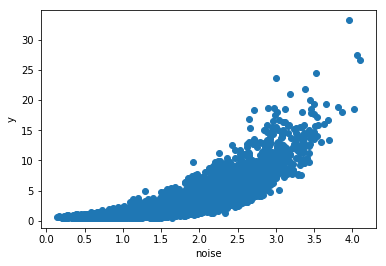

In [49]:
plt.scatter(n_arr4, y_arr4)
plt.xlabel("noise")
plt.ylabel("y")
plt.show()

In [ ]:
# Adam_1642206165   / 6 crit
a, b, y_arr, n_arr = v4_prepare_data_from_files('Adam_1642206165', 0.5)
print(a, b)

0      [0, 38.624203801916394, 0.5, 0.0, 5.460887907233937]


C:\Program Files\Python\Python37\Lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: overflow encountered in exp


0.5000194987148263
0.49519222937792495
0 || 0.5000194987148263 || 0 || 0 
0      [0, 46.61054565318364, 0.5, 0.0, 4.582908467725077]
0.5000270221605405
0.47253577587281786
0 || 0.5000270221605405 || 0 || 0 
0      [0, 62.02346958040253, 0.0, 0.0, 2.7828549687469897]
0.5000392162884197
0.4507481559625144
0 || 0.5000392162884197 || 0 || 0 
0      [0, 72.76579107991317, 0.0, 0.0, 5.366372207252861]
0.5000212531831344
0.5135994508857339
0 || 0.5000212531831344 || 0 || 0 
1      [0, 42.02673623677835, 0.0, 1.0, 1.8477798742742966]
0.5000647579480387
0.5062104175951542
0 || 0.5000647579480387 || 1 || 0 
0      [1, 7.694360122976085, 0.0, 0.0, 2.126186118262506]
0.5000560665587152
0.3585467167893949
1 || 0.5000560665587152 || 0 || 0 
0      [1, 58.6492753962632, 1.0, 0.0, 1.3941856798657086]
0.5000878150003669
0.4504138024632986
1 || 0.5000878150003669 || 0 || 0 
0      [1, 83.73013194987307, 0.0, 0.0, 2.2052755148877705]
0.5000646505952193
0.4747874066131567
1 || 0.5000646505952193 || 0 || 0

0.5000236892989958
0.5302493532384027
12 || 0.5000236892989958 || 1 || 0 
1      [12, 9.396058120519246, 0.0, 1.0, 1.0974010891351365]
0.5001026700497696
0.39196717444305795
12 || 0.5001026700497696 || 1 || 1 
0      [12, 53.111740430665336, 1.0, 0.0, 2.2087101279218504]
0.5000641160053672
0.4605593528486955
12 || 0.5000641160053672 || 0 || 0 
1      [13, 67.06203766657272, 0.5, 1.0, 3.599990051489738]
0.500022759735627
0.4648041136519829
13 || 0.500022759735627 || 1 || 1 
1      [13, 35.28255387328648, 0.5, 1.0, 1.976077003047395]
0.5000694430806131
0.43715570718289226
13 || 0.5000694430806131 || 1 || 1 
1      [13, 66.67941337428661, 0.5, 1.0, 2.038913973913541]
0.5000729155270625
0.4286919281093198
13 || 0.5000729155270625 || 1 || 1 
0      [13, 80.03488461202288, 0.0, 0.0, 4.076207834802727]
0.500029710930268
0.5087109300024159
13 || 0.500029710930268 || 0 || 0 
0      [13, 58.0731741140028, 0.1, 0.0, 1.3036306256616448]
0.5000925772594315
0.3961369082295518
13 || 0.500092577259431

0.5000907032457671
0.40980696131170946
24 || 0.5000907032457671 || 1 || 1 
0      [24, 70.01845000193362, 1.0, 0.0, 6.011903089256261]
0.5000171677039149
0.5025207412530667
24 || 0.5000171677039149 || 0 || 0 
0      [25, 95.41921473544284, 0.0, 0.0, 1.354688939514558]
0.5000885404928976
0.39954821445391864
25 || 0.5000885404928976 || 0 || 0 
0      [25, 95.712159184052, 0.1, 0.0, 4.430460017741748]
0.5000281478772122
0.5193210353708491
25 || 0.5000281478772122 || 0 || 0 
0      [25, 58.48676157464858, 0.0, 0.0, 1.8731863963063846]
0.5000738407219641
0.4828213172850067
25 || 0.5000738407219641 || 0 || 0 
0      [25, 1.3641551490988335, 1.0, 0.0, 2.7627495478578825]
0.5000276767371814
0.3821766567140939
25 || 0.5000276767371814 || 0 || 0 
0      [25, 52.29227475763282, 1.0, 0.0, 1.0871854924255808]
0.5000979898784078
0.3455925610206261
25 || 0.5000979898784078 || 0 || 0 
0      [26, 24.753325395119624, 1.0, 0.0, 0.6682162250988835]
0.5001274112033579
0.32918283655934605
26 || 0.500127411

0.5000643472325236
0.4718291602428453
36 || 0.5000643472325236 || 1 || 1 
0      [37, 5.926923586939603, 0.1, 0.0, 2.556279988909804]
0.5000553222478169
0.4823572899515396
37 || 0.5000553222478169 || 0 || 0 
0      [37, 59.31013524204424, 0.5, 0.0, 0.9156235815318767]
0.5000989543182575
0.4889336180521519
37 || 0.5000989543182575 || 0 || 0 
1      [37, 28.10704356850899, 0.5, 1.0, 1.1349202403327752]
0.5000382114321998
0.32717466194813793
37 || 0.5000382114321998 || 1 || 1 
1      [37, 33.334037123338476, 0.5, 1.0, 2.9822202437814807]
0.5000453844168944
0.46335488282067633
37 || 0.5000453844168944 || 1 || 1 
1      [37, 75.65437592850115, 1.0, 1.0, 1.0918309466262834]
0.5000740529182869
0.432659183188622
37 || 0.5000740529182869 || 1 || 1 
0      [38, 13.0248882785706, 1.0, 0.0, 1.6672863694827649]
0.5000449908804367
0.44155802385785087
38 || 0.5000449908804367 || 0 || 0 
0      [38, 44.20227396225509, 1.0, 0.0, 12.045500033468093]
0.500002833726342
0.624046166291606
38 || 0.5000028337

0.5000111951842694
0.5246911709661515
49 || 0.5000111951842694 || 1 || 0 
0      [49, 12.509553510240195, 0.0, 0.0, 1.3393333231791789]
0.5000738070142448
0.35799306087213195
49 || 0.5000738070142448 || 0 || 0 
0      [49, 62.27783118711759, 0.5, 0.0, 2.1043681962557796]
0.5000652703918008
0.5081781034807863
49 || 0.5000652703918008 || 0 || 0 
0      [49, 76.26506691261186, 0.0, 0.0, 2.098766620181437]
0.5000578335953458
0.4246513741738788
49 || 0.5000578335953458 || 0 || 0 
0      [49, 62.358731991471416, 1.0, 0.0, 2.1314367852668763]
0.5000646954186186
0.49427108245843265
49 || 0.5000646954186186 || 0 || 0 
1      [50, 5.5742183366293325, 1.0, 1.0, 7.599105990244061]
0.5000102470939563
0.597264076336217
50 || 0.5000102470939563 || 1 || 0 
1      [50, 91.6157006300105, 1.0, 1.0, 5.432316483707911]
0.5000208257483352
0.5142861634825914
50 || 0.5000208257483352 || 1 || 0 
0      [50, 74.67517536785562, 0.0, 0.0, 3.109721417371799]
0.5000451712054443
0.45418951958575043
50 || 0.500045171

0.5000754558877127
0.42977194456311335
61 || 0.5000754558877127 || 1 || 1 
0      [61, 82.89820912345817, 0.5, 0.0, 0.779101058687569]
0.5001058867626919
0.47291372273049054
61 || 0.5001058867626919 || 0 || 0 
1      [61, 36.63251999931085, 0.0, 1.0, 2.98714284757145]
0.5000417729319991
0.5239367434977318
61 || 0.5000417729319991 || 1 || 0 
1      [61, 0.23054508316817657, 1.0, 1.0, 1.4014382690688432]
0.5000635915433059
0.30145384025685484
61 || 0.5000635915433059 || 1 || 1 
0      [62, 81.20137711853614, 0.0, 0.0, 3.869839375717922]
0.5000259149523605
0.5172406806266096
62 || 0.5000259149523605 || 0 || 0 
0      [62, 75.24807205399284, 0.1, 0.0, 4.704682017077703]
0.500026650338613
0.4732570882181053
62 || 0.500026650338613 || 0 || 0 
1      [62, 70.23441509074567, 0.5, 1.0, 2.6660533068390304]
0.5000543414322438
0.45351409524932
62 || 0.5000543414322438 || 1 || 1 
0      [62, 18.294295447861447, 1.0, 0.0, 0.8781184263417311]
0.5001091951641897
0.356108008122718
62 || 0.5001091951641

0.5000581903570809
0.47085672301580933
73 || 0.5000581903570809 || 1 || 1 
1      [73, 65.59915025563939, 1.0, 1.0, 4.030785907467226]
0.50003185658929
0.49546514102334843
73 || 0.50003185658929 || 1 || 1 
1      [73, 44.487786777447894, 0.1, 1.0, 1.653045316070897]
0.5000782182848733
0.4890610426538488
73 || 0.5000782182848733 || 1 || 1 
0      [74, 75.08251710408584, 0.1, 0.0, 6.974442024928482]
0.5000129934893549
0.5039325884906029
74 || 0.5000129934893549 || 0 || 0 
1      [74, 82.6306690928568, 0.5, 1.0, 1.300837679336785]
0.5000903828142059
0.4447274885427684
74 || 0.5000903828142059 || 1 || 1 
0      [74, 23.085501375207368, 0.0, 0.0, 2.3808186890852694]
0.5000571609541142
0.42349957144369044
74 || 0.5000571609541142 || 0 || 0 
0      [74, 26.01790352045823, 0.0, 0.0, 1.0131400935085688]
0.5000628646768756
0.34289958664746606
74 || 0.5000628646768756 || 0 || 0 
0      [74, 99.03219768269156, 0.0, 0.0, 1.0802681299923262]
0.5000940806275587
0.4733234256450652
74 || 0.500094080627

0.500021351791368
0.49602547141478687
85 || 0.500021351791368 || 1 || 1 
1      [85, 74.76301049526208, 0.1, 1.0, 6.851327841111331]
0.5000131791597525
0.5587771580801165
85 || 0.5000131791597525 || 1 || 0 
1      [86, 79.59649445963585, 0.0, 1.0, 3.8120556790084104]
0.5000290783932245
0.46981956284023624
86 || 0.5000290783932245 || 1 || 1 
0      [86, 19.134344241023786, 0.0, 0.0, 1.3840033400035234]
0.5000623476000305
0.3845090529153257
86 || 0.5000623476000305 || 0 || 0 
1      [86, 11.997645057855793, 1.0, 1.0, 5.098940193315346]
0.5000154208230526
0.421685724422556
86 || 0.5000154208230526 || 1 || 1 
0      [86, 30.60524620171202, 1.0, 0.0, 15.076145151881851]
0.5000006808934855
0.6037166254660556
86 || 0.5000006808934855 || 0 || 0 
0      [86, 22.69185100630412, 0.1, 0.0, 3.9685981787934237]
0.5000356392144805
0.5161726707753175
86 || 0.5000356392144805 || 0 || 0 
1      [87, 97.06682725095314, 1.0, 1.0, 0.7396673812826416]
0.5000982351348351
0.36640994613751127
87 || 0.500098235

0.5000239401555097
0.5084442187529151
97 || 0.5000239401555097 || 0 || 0 
0      [98, 86.27180564350545, 1.0, 0.0, 0.5272588257189257]
0.5001211825461014
0.4189523200040722
98 || 0.5001211825461014 || 0 || 0 
0      [98, 99.2847803155328, 0.1, 0.0, 3.4598801252688594]
0.5000396682236701
0.49985050289947974
98 || 0.5000396682236701 || 0 || 0 
0      [98, 16.548590973531258, 0.0, 0.0, 17.52466847392663]
0.5000007006477688
0.6544911987470712
98 || 0.5000007006477688 || 0 || 0 
0      [98, 93.56788871747729, 1.0, 0.0, 6.84810044902703]
0.5000127232710226
0.5130064617849309
98 || 0.5000127232710226 || 0 || 0 
0      [98, 2.6056312858155737, 0.5, 0.0, 8.296468502989864]
0.5000085336121252
0.6198159221982861
98 || 0.5000085336121252 || 0 || 0 
1      [99, 8.075692305737615, 1.0, 1.0, 7.035884332427442]
0.5000121521771239
0.5773841165822596
99 || 0.5000121521771239 || 1 || 0 
0      [99, 80.51432885851457, 0.1, 0.0, 0.5948340279911245]
0.5001292288924687
0.3348941862736403
99 || 0.500129228892

0.5000542204785402
0.44118424745109697
110 || 0.5000542204785402 || 1 || 1 
1      [110, 31.753612980352564, 1.0, 1.0, 5.390056746884521]
0.5000220227034367
0.5226200041083425
110 || 0.5000220227034367 || 1 || 0 
0      [110, 78.05257274067017, 0.1, 0.0, 2.9690296826482783]
0.5000502527131666
0.4954661300763456
110 || 0.5000502527131666 || 0 || 0 
0      [110, 72.61135262174719, 0.0, 0.0, 10.574061845480285]
0.5000031723501331
0.5725173396152508
110 || 0.5000031723501331 || 0 || 0 
1      [110, 17.744581956398616, 0.0, 1.0, 0.7993963950607081]
0.5000672939638083
0.40303886980058606
110 || 0.5000672939638083 || 1 || 1 
1      [111, 75.79525951779947, 0.1, 1.0, 5.795016699671852]
0.5000191757261443
0.4827840485246222
111 || 0.5000191757261443 || 1 || 1 
0      [111, 59.229517388730635, 0.1, 0.0, 3.952802181224407]
0.5000346006862922
0.49060516930369524
111 || 0.5000346006862922 || 0 || 0 
0      [111, 20.92465960006264, 0.0, 0.0, 1.5033029044159427]
0.500075392132132
0.4154891392339017
1

0.5000288613321663
0.42908047427125307
122 || 0.5000288613321663 || 1 || 1 
0      [122, 46.05277603483504, 0.5, 0.0, 1.8785201564096992]
0.5000721059299574
0.46670885840223963
122 || 0.5000721059299574 || 0 || 0 
1      [122, 7.549166326841478, 0.5, 1.0, 7.0398224532147315]
0.5000098631197668
0.44789077081362566
122 || 0.5000098631197668 || 1 || 1 
1      [122, 54.44397946546229, 0.1, 1.0, 2.0430812927288757]
0.5000391351602392
0.34753504794653006
122 || 0.5000391351602392 || 1 || 1 
1      [122, 73.87424390371851, 0.5, 1.0, 0.7465518326970123]
0.5001161027802976
0.41494437375277005
122 || 0.5001161027802976 || 1 || 1 
1      [123, 36.89892736962546, 0.0, 1.0, 0.7445893617974981]
0.5001182360498957
0.4147677854665442
123 || 0.5001182360498957 || 1 || 1 
1      [123, 34.580911087550234, 1.0, 1.0, 1.4665740491463115]
0.5000836328920291
0.4176981020924402
123 || 0.5000836328920291 || 1 || 1 
0      [123, 59.97555791723563, 0.1, 0.0, 13.813318365470343]
0.5000017511302611
0.59663348521487

0.5000360459842081
0.4181180272641154
134 || 0.5000360459842081 || 0 || 0 
0      [134, 54.129094275264855, 0.1, 0.0, 1.8319819573609528]
0.5000460094435816
0.41979649368869243
134 || 0.5000460094435816 || 0 || 0 
0      [134, 84.10126321288809, 1.0, 0.0, 1.3941306347891098]
0.5000875933709897
0.3589115069562383
134 || 0.5000875933709897 || 0 || 0 
1      [134, 7.45478076801715, 0.1, 1.0, 0.686737754338437]
0.5000972096008405
0.384848297388417
134 || 0.5000972096008405 || 1 || 1 
0      [134, 88.25305314336114, 0.5, 0.0, 1.357753420408566]
0.5000867492410294
0.4799099555536344
134 || 0.5000867492410294 || 0 || 0 
0      [135, 69.52394540125502, 1.0, 0.0, 1.1879211247573593]
0.5000972609468598
0.4505049297043917
135 || 0.5000972609468598 || 0 || 0 
0      [135, 11.522831202074569, 0.1, 0.0, 5.47820412061201]
0.5000217561859565
0.5086466289787335
135 || 0.5000217561859565 || 0 || 0 
0      [135, 78.92805469200968, 1.0, 0.0, 2.9156388202133514]
0.500049317741125
0.5048621550374801
135 || 

0.5000284986251242
0.5243141487439109
146 || 0.5000284986251242 || 1 || 0 
0      [146, 32.82025024359223, 0.0, 0.0, 10.895057180025114]
0.5000040395741949
0.5926331209932726
146 || 0.5000040395741949 || 0 || 0 
1      [146, 47.73910173286768, 0.1, 1.0, 6.924565473288651]
0.5000128033435197
0.5202361371612619
146 || 0.5000128033435197 || 1 || 0 
0      [146, 2.0257310872267786, 1.0, 0.0, 0.5778222981643335]
0.5000625918854592
0.3755066201760719
146 || 0.5000625918854592 || 0 || 0 
0      [146, 51.296432668303304, 0.1, 0.0, 2.5789283330130712]
0.5000534518782301
0.5104127931632257
146 || 0.5000534518782301 || 0 || 0 
0      [147, 8.062504031539447, 0.0, 0.0, 1.318437650337599]
0.5000339324796504
0.3899449416224223
147 || 0.5000339324796504 || 0 || 0 
0      [147, 3.595531846696398, 0.0, 0.0, 0.9338838693718021]
0.5001101419080363
0.44730924663116506
147 || 0.5001101419080363 || 0 || 0 
1      [147, 80.82135897872568, 0.5, 1.0, 7.047412120765409]
0.5000124653147198
0.5039994167735341
147

0.5000707304382404
0.4001289573428282
158 || 0.5000707304382404 || 0 || 0 
1      [158, 55.38335324357712, 0.5, 1.0, 12.667827025658164]
0.5000025174504398
0.618107279961358
158 || 0.5000025174504398 || 1 || 0 
0      [158, 80.51925687427858, 0.5, 0.0, 1.300176002533381]
0.5000958251167068
0.377863360656272
158 || 0.5000958251167068 || 0 || 0 
1      [158, 16.733726045852304, 0.5, 1.0, 3.3718935909633947]
0.5000381022557251
0.5353783808432638
158 || 0.5000381022557251 || 1 || 0 
0      [158, 71.78592119400713, 1.0, 0.0, 0.5248287876656708]
0.5001297357404055
0.3768817618477253
158 || 0.5001297357404055 || 0 || 0 
1      [159, 77.77225192937942, 0.0, 1.0, 1.7685102483046662]
0.5000791995274595
0.4129788215890378
159 || 0.5000791995274595 || 1 || 1 
0      [159, 94.18980507085911, 0.0, 0.0, 2.136474387490373]
0.5000663473064854
0.44715902229998705
159 || 0.5000663473064854 || 0 || 0 
1      [159, 88.39530860987156, 0.1, 1.0, 3.225256386090572]
0.5000458645820869
0.4391307956054666
159 ||

In [ ]:
plt.scatter(n_arr, y_arr)
plt.xlabel("noise")
plt.ylabel("y")
plt.show()

In [192]:
# Adam_1642232958   / 8 crit
a8, b8, y_arr8, n_arr8 = v4_prepare_data_from_files('Adam_1642232958', 0.5)
print(a8, b8)

1      [0, 23.261181961632726, 1.0, 1.0, 9.365057842410154]
0.5000002274444026
0.41622717660713077
0 || 0.5000002274444026 || 1 || 1 
0      [0, 35.66863939842333, 1.0, 0.0, 6.244484119032993]
0.5000005134048681
0.45871968885060616
0 || 0.5000005134048681 || 0 || 0 
1      [0, 49.93804924871789, 0.0, 1.0, 1.7185651531143105]
0.5000046144844873
0.260630244611984
0 || 0.5000046144844873 || 1 || 1 
1      [0, 18.5338869474177, 1.0, 1.0, 4.211870508841078]
0.5000026773421314
0.42149089033436365
0 || 0.5000026773421314 || 1 || 1 
1      [0, 38.34046210552217, 0.1, 1.0, 3.2106031743531824]
0.5000007521517366
0.42694558324147047
0 || 0.5000007521517366 || 1 || 1 
1      [1, 88.41616349269157, 1.0, 1.0, 2.124351137386302]
0.5000042461005098
0.2990872011601958
1 || 0.5000042461005098 || 1 || 1 
0      [1, 59.87663413734844, 0.0, 0.0, 7.2991288518768185]
0.5000007952180384
0.49007087970345353
1 || 0.5000007952180384 || 0 || 0 
1      [1, 86.24690022933532, 0.5, 1.0, 1.3575973786915474]
0.5000069

0.5000016370794675
0.4727104555309855
12 || 0.5000016370794675 || 1 || 1 
1      [12, 79.93149648251729, 0.1, 1.0, 3.283155152110606]
0.50000131992339
0.3873538826361453
12 || 0.50000131992339 || 1 || 1 
0      [12, 11.980529845767068, 0.5, 0.0, 15.104301885236708]
0.5000001060969913
0.4542809215868556
12 || 0.5000001060969913 || 0 || 0 
0      [13, 89.99689425500708, 1.0, 0.0, 1.896558527153968]
0.5000042920088819
0.38001888105672726
13 || 0.5000042920088819 || 0 || 0 
1      [13, 77.57216995427201, 1.0, 1.0, 2.9626052192754595]
0.5000039717016168
0.40676176196943803
13 || 0.5000039717016168 || 1 || 1 
1      [13, 21.01926091108361, 0.5, 1.0, 1.1903636707357088]
0.5000042670492196
0.4250245787511895
13 || 0.5000042670492196 || 1 || 1 
1      [13, 56.111202875393, 0.0, 1.0, 6.49587939245514]
0.5000002554115544
0.31030520156967134
13 || 0.5000002554115544 || 1 || 1 
0      [13, 83.47820254825538, 0.1, 0.0, 5.183343059764081]
0.5000014657338667
0.3948009451704276
13 || 0.5000014657338667

0.5000051735916966
0.18570486051551569
24 || 0.5000051735916966 || 0 || 0 
1      [25, 74.70015182449467, 0.1, 1.0, 1.6884545515755918]
0.5000047797999412
0.39926716157871567
25 || 0.5000047797999412 || 1 || 1 
0      [25, 80.96769096112588, 0.1, 0.0, 0.8960970057200865]
0.5000053445419697
0.3784440296622194
25 || 0.5000053445419697 || 0 || 0 
1      [25, 35.15646331226738, 1.0, 1.0, 0.999066454052977]
0.500006437696023
0.3665588875392043
25 || 0.500006437696023 || 1 || 1 
0      [25, 83.68193108178058, 1.0, 0.0, 7.931554037024063]
0.5000007523552396
0.3976298228561147
25 || 0.5000007523552396 || 0 || 0 
0      [25, 13.507547436847183, 1.0, 0.0, 9.049402489534856]
0.5000003983378454
0.46632539333483436
25 || 0.5000003983378454 || 0 || 0 
1      [26, 18.115378102915315, 0.5, 1.0, 0.6050605448369892]
0.5000101704662441
0.4005314883327951
26 || 0.5000101704662441 || 1 || 1 
0      [26, 97.57607725262793, 0.0, 0.0, 5.237582240394979]
0.5000005576687766
0.32328191405042545
26 || 0.500000557

0.5000042873791933
0.22230980492475855
37 || 0.5000042873791933 || 1 || 1 
0      [37, 82.02788109053895, 1.0, 0.0, 3.9572971998208186]
0.5000024413427697
0.38657548450669516
37 || 0.5000024413427697 || 0 || 0 
1      [37, 39.44200883042027, 1.0, 1.0, 1.0731598419307709]
0.5000055727329746
0.3541905628393879
37 || 0.5000055727329746 || 1 || 1 
1      [37, 27.81300885354335, 1.0, 1.0, 1.463943740182415]
0.5000063763044816
0.34242659453474106
37 || 0.5000063763044816 || 1 || 1 
0      [38, 24.6834965284365, 0.1, 0.0, 0.5000842473183056]
0.5000018031961386
0.37867004061293835
38 || 0.5000018031961386 || 0 || 0 
1      [38, 40.719574026477844, 0.0, 1.0, 10.398239805438516]
0.5000003707884438
0.4762564482267199
38 || 0.5000003707884438 || 1 || 1 
1      [38, 81.12647710700703, 0.5, 1.0, 4.604642345924738]
0.5000019618721165
0.39365094844118503
38 || 0.5000019618721165 || 1 || 1 
1      [38, 45.80563455307545, 0.0, 1.0, 1.0387224967984363]
0.5000056340452171
0.2973711635703912
38 || 0.500005

0.5000030235934698
0.3498849871050382
49 || 0.5000030235934698 || 1 || 1 
0      [49, 44.39245543088685, 0.1, 0.0, 10.324502532640567]
0.500000163800531
0.41547630866479457
49 || 0.500000163800531 || 0 || 0 
1      [49, 62.15557209246272, 0.0, 1.0, 8.869540287817964]
0.5000006349176788
0.4688346252718415
49 || 0.5000006349176788 || 1 || 1 
1      [50, 17.101246394425612, 0.0, 1.0, 0.8538231379902133]
0.5000034573563464
0.29354267310645493
50 || 0.5000034573563464 || 1 || 1 
1      [50, 26.8521088541789, 0.5, 1.0, 0.5086181013303313]
0.5000074636566121
0.29024483553710884
50 || 0.5000074636566121 || 1 || 1 
1      [50, 14.848124171850074, 1.0, 1.0, 2.3386729275922384]
0.5000046897070366
0.40188158964452525
50 || 0.5000046897070366 || 1 || 1 
0      [50, 25.542741964799564, 0.1, 0.0, 4.834833220741197]
0.5000011217920431
0.46069373985487877
50 || 0.5000011217920431 || 0 || 0 
1      [50, 80.85611336940757, 0.5, 1.0, 3.089554018287509]
0.5000035379440639
0.37696380249347894
50 || 0.500003

0.5000069595436296
0.30518153527862757
61 || 0.5000069595436296 || 0 || 0 
0      [61, 52.85501415230578, 0.5, 0.0, 6.188336615830689]
0.5000003701384045
0.42697479515952047
61 || 0.5000003701384045 || 0 || 0 
1      [62, 18.506876206691082, 1.0, 1.0, 0.6212556368297457]
0.5000049217355511
0.42669683283714915
62 || 0.5000049217355511 || 1 || 1 
1      [62, 90.08757577345357, 0.0, 1.0, 5.718855298379845]
0.5000017162151027
0.45379426656473965
62 || 0.5000017162151027 || 1 || 1 
0      [62, 61.36002628942771, 1.0, 0.0, 6.955301422334613]
0.500001142716766
0.4062681386927638
62 || 0.500001142716766 || 0 || 0 
1      [62, 26.95903234381975, 1.0, 1.0, 1.5599186626822]
0.5000056801970121
0.24051823835837283
62 || 0.5000056801970121 || 1 || 1 
0      [62, 66.6019954227494, 0.0, 0.0, 2.907063956148174]
0.5000031615956535
0.423610615843883
62 || 0.5000031615956535 || 0 || 0 
1      [63, 33.76450655997137, 1.0, 1.0, 4.9661221909592195]
0.500001695048259
0.4230498307139327
63 || 0.500001695048259

0.5000012062569376
0.367405182643107
73 || 0.5000012062569376 || 0 || 0 
1      [74, 2.784388361374013, 0.5, 1.0, 4.4834594730198685]
0.5000015276085346
0.4749611995436966
74 || 0.5000015276085346 || 1 || 1 
1      [74, 49.99387678093451, 0.0, 1.0, 1.3673445187615123]
0.5000069771108683
0.33711724315403085
74 || 0.5000069771108683 || 1 || 1 
0      [74, 11.3063225915292, 0.5, 0.0, 0.8215280558771747]
0.5000050732723677
0.4403657635529791
74 || 0.5000050732723677 || 0 || 0 
1      [74, 69.9860398565241, 1.0, 1.0, 3.664359463014876]
0.5000021023020226
0.3615798738264944
74 || 0.5000021023020226 || 1 || 1 
1      [74, 70.73256194854139, 0.0, 1.0, 1.124892911103307]
0.5000009015481713
0.27330695979087527
74 || 0.5000009015481713 || 1 || 1 
1      [75, 85.64322444884496, 1.0, 1.0, 0.84436588088229]
0.5000057733630262
0.3839709069542268
75 || 0.5000057733630262 || 1 || 1 
0      [75, 18.091989315731844, 0.5, 0.0, 2.4343705506904283]
0.5000047848139387
0.3166123117068679
75 || 0.5000047848139

0.5000037319682916
0.3731335086585192
86 || 0.5000037319682916 || 1 || 1 
0      [86, 0.051057700116535765, 0.5, 0.0, 13.602580754258469]
0.5000001503458466
0.5522450714794399
86 || 0.5000001503458466 || 0 || 0 
0      [86, 83.93942926070272, 0.0, 0.0, 12.30081910463036]
0.5000000415830989
0.5457054943575034
86 || 0.5000000415830989 || 0 || 0 
0      [86, 58.26229007985467, 0.5, 0.0, 5.320886147013993]
0.5000006826121279
0.37604526480005884
86 || 0.5000006826121279 || 0 || 0 
1      [86, 13.72759170458222, 1.0, 1.0, 11.21225057090554]
0.5000002732980282
0.4064708882832296
86 || 0.5000002732980282 || 1 || 1 
1      [87, 11.720184427143105, 0.5, 1.0, 16.76340428591633]
0.5000000578265971
0.48508930590028554
87 || 0.5000000578265971 || 1 || 1 
1      [87, 11.965745646928916, 1.0, 1.0, 4.296342766667071]
0.5000016308736888
0.3923617959989722
87 || 0.5000016308736888 || 1 || 1 
0      [87, 63.51758569729743, 0.0, 0.0, 12.6529350170159]
0.5000001402165009
0.4412875864489624
87 || 0.500000140

0.5000066905171441
0.42858310983614356
98 || 0.5000066905171441 || 1 || 1 
0      [98, 11.250059304332893, 1.0, 0.0, 0.7522421234262516]
0.5000066239014079
0.42912401316963084
98 || 0.5000066239014079 || 0 || 0 
1      [98, 94.36647519876121, 0.0, 1.0, 1.0028189661660396]
0.5000023329573893
0.31845340240666004
98 || 0.5000023329573893 || 1 || 1 
1      [99, 26.821680724521148, 0.0, 1.0, 3.3610429186017607]
0.5000029923077589
0.4240550138806678
99 || 0.5000029923077589 || 1 || 1 
1      [99, 62.893762576847244, 0.0, 1.0, 1.2548992671245607]
0.5000018054800958
0.30417700078141985
99 || 0.5000018054800958 || 1 || 1 
1      [99, 67.26190241048204, 0.5, 1.0, 6.320455337091358]
0.5000009818570148
0.40979874027048546
99 || 0.5000009818570148 || 1 || 1 
0      [99, 63.06170908583352, 1.0, 0.0, 3.5709998957437667]
0.5000020288776704
0.4134312793517655
99 || 0.5000020288776704 || 0 || 0 
0      [99, 2.6386895600345186, 0.0, 0.0, 1.5326566002620172]
0.5000042622416395
0.33867880632311703
99 || 0.

0.5000001057978456
0.3302532378531787
110 || 0.5000001057978456 || 0 || 0 
0      [110, 70.36010554712743, 0.5, 0.0, 5.410425455126655]
0.5000000814446541
0.33390672286950923
110 || 0.5000000814446541 || 0 || 0 
1      [111, 6.680090456975818, 0.0, 1.0, 5.09482091830929]
0.5000011962775258
0.4792615325145488
111 || 0.5000011962775258 || 1 || 1 
0      [111, 62.22014742718284, 0.0, 0.0, 2.9264974097216054]
0.5000035858351528
0.3684952822748294
111 || 0.5000035858351528 || 0 || 0 
1      [111, 87.32093888800439, 1.0, 1.0, 7.4325713237774345]
0.5000003028864165
0.4560237750637333
111 || 0.5000003028864165 || 1 || 1 
0      [111, 64.53178965718702, 1.0, 0.0, 4.573079460023027]
0.5000020443210466
0.39031751640322215
111 || 0.5000020443210466 || 0 || 0 
0      [111, 91.90373494447613, 1.0, 0.0, 0.5920075288775546]
0.5000087922474908
0.36164508308425436
111 || 0.5000087922474908 || 0 || 0 
1      [112, 55.80651500792374, 0.1, 1.0, 4.327676020817265]
0.5000002636462689
0.30657479148119166
112 

0.500002928259238
0.3741453725986864
122 || 0.500002928259238 || 1 || 1 
1      [123, 9.20252690177717, 0.1, 1.0, 1.5463495084031096]
0.5000019300476523
0.39105930258855426
123 || 0.5000019300476523 || 1 || 1 
0      [123, 69.32196545235095, 0.5, 0.0, 1.8718193930645453]
0.500004244100823
0.25444142469779063
123 || 0.500004244100823 || 0 || 0 
1      [123, 69.76352182152014, 1.0, 1.0, 4.083660517390073]
0.5000011986107457
0.3274586654609659
123 || 0.5000011986107457 || 1 || 1 
0      [123, 21.822538596412834, 0.1, 0.0, 11.131175438414987]
0.5000002979167807
0.45660636831592805
123 || 0.5000002979167807 || 0 || 0 
0      [123, 73.34450193783411, 0.5, 0.0, 5.658138682718521]
0.5000009704221553
0.3227340395785216
123 || 0.5000009704221553 || 0 || 0 
1      [124, 49.969658735512304, 0.0, 1.0, 2.913145639916621]
0.5000003637644742
0.2818236769461198
124 || 0.5000003637644742 || 1 || 1 
0      [124, 84.66709893666923, 0.1, 0.0, 8.103600121160493]
0.5000007101391258
0.42645759018151574
124 ||

0.5000067057012689
0.3837548916158136
135 || 0.5000067057012689 || 0 || 0 
0      [135, 31.01382538248152, 0.1, 0.0, 1.6309548245565426]
0.5000047509464999
0.4363560915695599
135 || 0.5000047509464999 || 0 || 0 
0      [135, 47.235387848456725, 0.0, 0.0, 1.8637441785960325]
0.5000058283855379
0.3780428121260493
135 || 0.5000058283855379 || 0 || 0 
1      [135, 5.239662819479573, 0.0, 1.0, 4.068894138778613]
0.5000025460741843
0.47342075653079585
135 || 0.5000025460741843 || 1 || 1 
1      [135, 85.2434708774346, 0.0, 1.0, 0.8974121783194922]
0.5000063678597765
0.3564545546325999
135 || 0.5000063678597765 || 1 || 1 
0      [136, 64.48082922433183, 0.1, 0.0, 2.9494159841871763]
0.500002785028949
0.40941815565563794
136 || 0.500002785028949 || 0 || 0 
0      [136, 76.01851642773117, 0.1, 0.0, 7.389974234997362]
0.50000045365633
0.5284957389153803
136 || 0.50000045365633 || 0 || 0 
1      [136, 53.23403000086419, 0.1, 1.0, 15.116044425067129]
0.5000001205479849
0.4573604013866821
136 || 0.

0.5000021452172702
0.39850523126419274
147 || 0.5000021452172702 || 1 || 1 
0      [147, 36.72697659488015, 1.0, 0.0, 0.8194417116358073]
0.5000062200970767
0.41490549229868234
147 || 0.5000062200970767 || 0 || 0 
0      [147, 89.64508601539471, 0.5, 0.0, 0.6108910842821588]
0.5000062817056254
0.3488196016515684
147 || 0.5000062817056254 || 0 || 0 
1      [147, 39.92628950017218, 0.1, 1.0, 2.9867434237632158]
0.5000002010623962
0.286795183050173
147 || 0.5000002010623962 || 1 || 1 
1      [148, 87.6998654776969, 0.5, 1.0, 4.446323825473494]
0.5000017635882982
0.37439141169914697
148 || 0.5000017635882982 || 1 || 1 
0      [148, 9.6226710799373, 0.1, 0.0, 3.5068714253696944]
0.5000012190145867
0.3791630130486459
148 || 0.5000012190145867 || 0 || 0 
1      [148, 6.250870583607593, 0.1, 1.0, 1.723022319193073]
0.5000040090349571
0.4261948729822479
148 || 0.5000040090349571 || 1 || 1 
1      [148, 69.86108509961623, 0.5, 1.0, 2.3798191355915375]
0.5000001684414743
0.2672485093349846
148 ||

0.5000012713131582
0.35073908883904115
159 || 0.5000012713131582 || 1 || 1 
0      [159, 22.429092394381982, 0.5, 0.0, 4.013442023845585]
0.5000027157093819
0.41655977452857035
159 || 0.5000027157093819 || 0 || 0 
0      [159, 56.57604435652869, 0.5, 0.0, 3.5294561990962228]
0.50000230071631
0.4870343002414384
159 || 0.50000230071631 || 0 || 0 
1      [160, 67.29103746102595, 0.1, 1.0, 3.0771650541164255]
0.5000012865576349
0.34908638209216736
160 || 0.5000012865576349 || 1 || 1 
1      [160, 48.721303479708794, 0.1, 1.0, 1.0997366144613259]
0.5000054689342694
0.46023012598418567
160 || 0.5000054689342694 || 1 || 1 
0      [160, 42.33909686924262, 0.0, 0.0, 2.261452511472579]
0.5000045465464062
0.46785073645171243
160 || 0.5000045465464062 || 0 || 0 
1      [160, 70.83627423682879, 0.1, 1.0, 2.2299805941014514]
0.5000025621557685
0.42059056255714855
160 || 0.5000025621557685 || 1 || 1 
0      [160, 92.85827731848352, 0.0, 0.0, 5.09287219325634]
0.5000002420443357
0.3588369102919653
160

0.5000035258795754
0.43496175426713884
171 || 0.5000035258795754 || 0 || 0 
1      [171, 88.91700307076692, 0.5, 1.0, 10.965424753649346]
0.500000273598968
0.48744953929011303
171 || 0.500000273598968 || 1 || 1 
0      [172, 3.162868111707912, 0.5, 0.0, 6.293157736303913]
0.500000956917367
0.45953258129143915
172 || 0.500000956917367 || 0 || 0 
1      [172, 43.640723178895605, 0.0, 1.0, 0.7396636961494011]
0.5000032691581002
0.4316340810788916
172 || 0.5000032691581002 || 1 || 1 
1      [172, 72.82408486520423, 0.0, 1.0, 2.4209644031369506]
0.5000039688982515
0.3795986314353401
172 || 0.5000039688982515 || 1 || 1 
0      [172, 76.31087576730215, 0.5, 0.0, 0.5577964468723635]
0.5000071022173133
0.313790246323519
172 || 0.5000071022173133 || 0 || 0 
1      [172, 41.35782297264126, 1.0, 1.0, 1.985381654174043]
0.5000005520922363
0.2972577256886471
172 || 0.5000005520922363 || 1 || 1 
1      [173, 17.979586242095873, 0.5, 1.0, 2.0551343032648894]
0.5000030482411387
0.45604255262633714
173 

0.5000000339730993
0.518786598427225
183 || 0.5000000339730993 || 0 || 0 
0      [183, 60.45027032046928, 0.5, 0.0, 2.6824265417693733]
0.5000017031360862
0.3498799304588009
183 || 0.5000017031360862 || 0 || 0 
1      [184, 83.29637337591183, 0.1, 1.0, 3.3128541450238105]
0.5000002180199701
0.33119596053925354
184 || 0.5000002180199701 || 1 || 1 
0      [184, 64.72067439240814, 0.0, 0.0, 16.68668757707534]
0.5000000711604812
0.5094079238679071
184 || 0.5000000711604812 || 0 || 0 
0      [184, 88.10783953999857, 0.5, 0.0, 1.2613752743670623]
0.5000037405718639
0.37482242057523263
184 || 0.5000037405718639 || 0 || 0 
1      [184, 78.9756803657361, 0.0, 1.0, 4.676721042258641]
0.500000747942184
0.4352135014351322
184 || 0.500000747942184 || 1 || 1 
1      [184, 8.802329874725102, 1.0, 1.0, 0.5483535473566238]
0.5000069610058163
0.24929380101639947
184 || 0.5000069610058163 || 1 || 1 
0      [185, 21.158473515062386, 0.5, 0.0, 0.8301450797801833]
0.5000057061014144
0.35040261486086965
185 

0.50000047936132
0.46047714889848623
195 || 0.50000047936132 || 0 || 0 
1      [196, 53.45892525606624, 0.0, 1.0, 2.190918226275985]
0.5000018839567834
0.38559616175445555
196 || 0.5000018839567834 || 1 || 1 
0      [196, 38.33027880160652, 1.0, 0.0, 1.3647075819499768]
0.5000058876628761
0.37945930603510253
196 || 0.5000058876628761 || 0 || 0 
0      [196, 48.62494454417915, 0.0, 0.0, 6.230587867966704]
0.5000000944652337
0.41242529229352287
196 || 0.5000000944652337 || 0 || 0 
0      [196, 7.895568278598586, 1.0, 0.0, 1.7881913191784893]
0.5000040886877184
0.4236328497874119
196 || 0.5000040886877184 || 0 || 0 
0      [196, 92.13015709368143, 0.1, 0.0, 0.7572010976857626]
0.5000026661814576
0.24130995121716864
196 || 0.5000026661814576 || 0 || 0 
0      [197, 76.80223716891892, 1.0, 0.0, 2.674738570820841]
0.5000027844022635
0.43301286270942174
197 || 0.5000027844022635 || 0 || 0 
1      [197, 47.21685340392469, 0.0, 1.0, 4.565514462392021]
0.5000005141540877
0.338372796915896
197 ||

0.5000053526744379
0.34291003601979503
208 || 0.5000053526744379 || 1 || 1 
0      [208, 9.776243891160668, 0.0, 0.0, 1.3446997634858313]
0.5000041964468596
0.35502518032967656
208 || 0.5000041964468596 || 0 || 0 
0      [208, 84.28402912238282, 0.5, 0.0, 9.780988345732009]
0.5000001882089483
0.47604169549540076
208 || 0.5000001882089483 || 0 || 0 
0      [208, 29.511106411053156, 1.0, 0.0, 2.6976275754833643]
0.5000019009596971
0.4621343059769696
208 || 0.5000019009596971 || 0 || 0 
0      [208, 25.033434475237414, 0.0, 0.0, 10.932134811409883]
0.5000000121331916
0.43197838408698
208 || 0.5000000121331916 || 0 || 0 
0      [209, 89.97591548391257, 0.5, 0.0, 8.540928739343812]
0.5000000623085207
0.42150172906174604
209 || 0.5000000623085207 || 0 || 0 
0      [209, 42.48557465698278, 0.5, 0.0, 6.791229399452401]
0.5000009585081402
0.4274437588897493
209 || 0.5000009585081402 || 0 || 0 
1      [209, 99.01650631871965, 0.1, 1.0, 5.4841373345815025]
0.5000006486971182
0.4544142000821643
20

0.5000005903847816
0.41813886576403125
220 || 0.5000005903847816 || 1 || 1 
0      [220, 11.0937634371513, 0.5, 0.0, 2.959720915391454]
0.5000028511474276
0.37376912136319684
220 || 0.5000028511474276 || 0 || 0 
0      [220, 87.70318029601489, 1.0, 0.0, 2.1893448407339045]
0.5000021384397242
0.4666476620708044
220 || 0.5000021384397242 || 0 || 0 
1      [220, 25.503533666952993, 0.0, 1.0, 0.6543720797303676]
0.5000063392093392
0.4196374041596709
220 || 0.5000063392093392 || 1 || 1 
0      [220, 2.4645102374222736, 0.5, 0.0, 2.273120568268697]
0.5000047480459987
0.44253557599858334
220 || 0.5000047480459987 || 0 || 0 
0      [221, 35.86911903238522, 1.0, 0.0, 29.42438994863428]
0.5000000020731319
0.6221346160971672
221 || 0.5000000020731319 || 0 || 0 
0      [221, 95.40679437287226, 0.1, 0.0, 2.188506416716922]
0.5000016669823533
0.30999576676456647
221 || 0.5000016669823533 || 0 || 0 
1      [221, 49.16027363595725, 0.5, 1.0, 0.9333438001670356]
0.5000054576516962
0.42360444825484256
2

0.5000085896886165
0.3642745745984332
232 || 0.5000085896886165 || 0 || 0 
1      [232, 9.965649153195427, 1.0, 1.0, 0.8073135194274671]
0.5000080215223001
0.3266551340163866
232 || 0.5000080215223001 || 1 || 1 
1      [232, 96.76851713264524, 1.0, 1.0, 1.5980115426662473]
0.500007282102841
0.3609654148343227
232 || 0.500007282102841 || 1 || 1 
0      [232, 3.739660251585686, 0.5, 0.0, 5.489275709261517]
0.5000007855147389
0.41171738054836143
232 || 0.5000007855147389 || 0 || 0 
0      [232, 15.753306672263218, 0.0, 0.0, 1.6328547689713433]
0.5000053029909811
0.3003663100095207
232 || 0.5000053029909811 || 0 || 0 
1      [233, 50.04896608168279, 0.1, 1.0, 1.372010675368473]
0.5000030439525258
0.27859106086460483
233 || 0.5000030439525258 || 1 || 1 
1      [233, 8.509670171229594, 0.1, 1.0, 1.5632311606879465]
0.5000041225237979
0.3940179953834513
233 || 0.5000041225237979 || 1 || 1 
0      [233, 75.20278836025113, 0.0, 0.0, 5.396888684339039]
0.5000008084532073
0.3802819728756521
233 |

0.5000000080458438
0.40557527227663576
244 || 0.5000000080458438 || 0 || 0 
1      [244, 66.81464717494175, 1.0, 1.0, 5.579312181153386]
0.5000014232828155
0.4513239879185642
244 || 0.5000014232828155 || 1 || 1 
1      [244, 46.08336662660878, 0.0, 1.0, 4.355963805058007]
0.5000024239978178
0.37868732871609156
244 || 0.5000024239978178 || 1 || 1 
1      [244, 56.56236501174759, 0.5, 1.0, 1.6893985823004003]
0.5000045409670341
0.4312992265142272
244 || 0.5000045409670341 || 1 || 1 
1      [245, 2.7788638157334677, 0.5, 1.0, 2.1708403847333333]
0.5000036007256282
0.30478998690569703
245 || 0.5000036007256282 || 1 || 1 
0      [245, 24.681981621116005, 1.0, 0.0, 5.608309660851866]
0.5000011036286691
0.3340960327929421
245 || 0.5000011036286691 || 0 || 0 
1      [245, 79.1286407953335, 0.5, 1.0, 2.6286530546794222]
0.500001953197733
0.3991875204931134
245 || 0.500001953197733 || 1 || 1 
0      [245, 86.0202613200221, 0.1, 0.0, 20.648471726242448]
0.5000000063975708
0.5221721178306877
245 |

0.5000028353646013
0.33239297149472075
256 || 0.5000028353646013 || 0 || 0 
1      [256, 75.27268990000518, 0.0, 1.0, 2.932633147227761]
0.5000012347017835
0.35991962396868854
256 || 0.5000012347017835 || 1 || 1 
1      [256, 68.13664639874338, 0.0, 1.0, 1.625529653344675]
0.5000028601296503
0.37403943599963246
256 || 0.5000028601296503 || 1 || 1 
1      [257, 74.8603889546892, 0.1, 1.0, 1.489743516470369]
0.5000018139346555
0.3086501012829055
257 || 0.5000018139346555 || 1 || 1 
1      [257, 51.7256678846278, 0.0, 1.0, 0.6218356393104504]
0.5000058460292334
0.29484207874334173
257 || 0.5000058460292334 || 1 || 1 
1      [257, 18.84620196432317, 0.0, 1.0, 3.432931134758506]
0.5000018610314201
0.39374122787138044
257 || 0.5000018610314201 || 1 || 1 
0      [257, 92.41326152620218, 0.1, 0.0, 1.5834420243745189]
0.5000007497997806
0.3202342873610668
257 || 0.5000007497997806 || 0 || 0 
1      [257, 36.103712411692456, 0.0, 1.0, 3.1202720420725725]
0.5000032422146331
0.4098680944754703
257

0.5000025461078533
0.35652470136013714
268 || 0.5000025461078533 || 1 || 1 
1      [269, 6.846555313436137, 0.0, 1.0, 0.7985440839821552]
0.5000082630561451
0.3291873353800245
269 || 0.5000082630561451 || 1 || 1 
1      [269, 41.95353901151224, 0.5, 1.0, 0.7745501919273748]
0.5000072468219584
0.3778332923128161
269 || 0.5000072468219584 || 1 || 1 
0      [269, 89.12464771021618, 0.0, 0.0, 7.271009809421818]
0.5000007421539105
0.5034906968792279
269 || 0.5000007421539105 || 0 || 0 
0      [269, 15.293512630939071, 0.0, 0.0, 12.423174331548358]
0.5000002386429439
0.5421986569294366
269 || 0.5000002386429439 || 0 || 0 
0      [269, 97.64854741981527, 1.0, 0.0, 2.219896461804871]
0.5000037024373611
0.38990556471487325
269 || 0.5000037024373611 || 0 || 0 
0      [270, 70.83536956287159, 0.5, 0.0, 4.5932244538866875]
0.5000016679752618
0.39497801953399764
270 || 0.5000016679752618 || 0 || 0 
1      [270, 82.87396552640544, 0.1, 1.0, 4.755403124006123]
0.5000018445586879
0.33409153584553436
2

0.5000000439025745
0.4303934611931139
280 || 0.5000000439025745 || 0 || 0 
1      [281, 17.83076588026762, 1.0, 1.0, 11.345447437955485]
0.5000002411381826
0.5161515645969891
281 || 0.5000002411381826 || 1 || 0 
1      [281, 41.43400951968835, 0.5, 1.0, 5.211339261608162]
0.5000015818905604
0.356621690266362
281 || 0.5000015818905604 || 1 || 1 
1      [281, 32.507630335549266, 0.0, 1.0, 0.5284299451787944]
0.5000064275967379
0.4311853801260184
281 || 0.5000064275967379 || 1 || 1 
1      [281, 35.484501788856406, 0.5, 1.0, 2.575754132063455]
0.5000042273081764
0.3420371489681485
281 || 0.5000042273081764 || 1 || 1 
1      [281, 53.60513806133006, 0.0, 1.0, 1.5278923518509375]
0.5000055165611096
0.3484364634807177
281 || 0.5000055165611096 || 1 || 1 
0      [282, 71.02128114451224, 0.5, 0.0, 0.9052068899280292]
0.5000016813778865
0.21367403890997197
282 || 0.5000016813778865 || 0 || 0 
0      [282, 76.52269906812876, 1.0, 0.0, 5.461810211076662]
0.500001474016549
0.39928102145660593
282 

0.5000007447211354
0.4371312610271781
292 || 0.5000007447211354 || 0 || 0 
0      [293, 60.8489356529759, 0.1, 0.0, 3.778134536411545]
0.5000025812796389
0.33412971731512864
293 || 0.5000025812796389 || 0 || 0 
1      [293, 10.007462920813449, 1.0, 1.0, 2.9149727179964566]
0.500004158841819
0.3883923373914181
293 || 0.500004158841819 || 1 || 1 
1      [293, 85.35428250990371, 0.5, 1.0, 7.392053986524813]
0.50000029604139
0.4205225433779848
293 || 0.50000029604139 || 1 || 1 
0      [293, 78.381563685485, 0.5, 0.0, 2.9770759535106204]
0.500003590207586
0.3297708797902852
293 || 0.500003590207586 || 0 || 0 
1      [293, 62.61759857214679, 1.0, 1.0, 5.979976430302971]
0.5000009169246836
0.4110125674286367
293 || 0.5000009169246836 || 1 || 1 
1      [294, 36.108526683346135, 0.5, 1.0, 0.578674293063115]
0.5000011527179482
0.18721359412619948
294 || 0.5000011527179482 || 1 || 1 
0      [294, 23.233694657003873, 1.0, 0.0, 2.669536086428215]
0.5000037738119508
0.3178070959772299
294 || 0.50000

0.5000008767375943
0.3922803506478294
304 || 0.5000008767375943 || 1 || 1 
1      [305, 47.314437574578015, 0.5, 1.0, 0.6311198716422305]
0.5000068636784314
0.20955443150455974
305 || 0.5000068636784314 || 1 || 1 
0      [305, 21.424343033391114, 0.0, 0.0, 0.8764528243214125]
0.5000061263502538
0.34031642871116075
305 || 0.5000061263502538 || 0 || 0 
0      [305, 35.76987872490812, 0.5, 0.0, 8.244910240618577]
0.5000004157798725
0.43041545866022185
305 || 0.5000004157798725 || 0 || 0 
0      [305, 71.45812177717399, 1.0, 0.0, 11.775653267896349]
0.5000001514924598
0.41869253965636266
305 || 0.5000001514924598 || 0 || 0 
1      [305, 48.721524909448, 0.0, 1.0, 6.485773147121247]
0.5000006756497087
0.38966545084123916
305 || 0.5000006756497087 || 1 || 1 
1      [306, 48.01834987428237, 0.5, 1.0, 3.472831730504477]
0.500002700500397
0.3569287863818384
306 || 0.500002700500397 || 1 || 1 
1      [306, 77.78553176802673, 0.5, 1.0, 1.2557582176654423]
0.5000080194524873
0.3287462825736811
306

0.5000043217424098
0.3366255041042813
316 || 0.5000043217424098 || 0 || 0 
0      [317, 16.729637883351618, 0.1, 0.0, 0.6769668965921124]
0.5000075069515334
0.36423415320957503
317 || 0.5000075069515334 || 0 || 0 
1      [317, 80.06867572675424, 0.5, 1.0, 3.0292176005217604]
0.5000029021644671
0.36571137560718103
317 || 0.5000029021644671 || 1 || 1 
0      [317, 99.71091294157522, 0.1, 0.0, 14.537911290642379]
0.5000000329162009
0.48927980656656955
317 || 0.5000000329162009 || 0 || 0 
0      [317, 8.82902538443044, 0.1, 0.0, 1.3370558911455679]
0.5000038576999005
0.3963967807966504
317 || 0.5000038576999005 || 0 || 0 
1      [317, 78.33938297712571, 0.0, 1.0, 2.589518738991224]
0.5000025006639887
0.33039418753335925
317 || 0.5000025006639887 || 1 || 1 
0      [318, 60.18773745579282, 0.5, 0.0, 17.22470965843486]
0.5000000295939488
0.5099644435308547
318 || 0.5000000295939488 || 0 || 0 
1      [318, 67.98459575542178, 0.5, 1.0, 3.9697055955817606]
0.5000000680743392
0.3614705264584795
3

0.5000020183501412
0.4002198502958887
328 || 0.5000020183501412 || 0 || 0 
1      [329, 94.10048582549982, 0.1, 1.0, 5.87417136342817]
0.5000015233552927
0.40004209015912723
329 || 0.5000015233552927 || 1 || 1 
0      [329, 54.25163362711577, 0.1, 0.0, 0.7465025935248952]
0.5000018832604709
0.4358405671645482
329 || 0.5000018832604709 || 0 || 0 
0      [329, 51.83290643270889, 0.0, 0.0, 7.484834415107184]
0.500000527879244
0.4464161124871486
329 || 0.500000527879244 || 0 || 0 
0      [329, 62.342056979135904, 0.5, 0.0, 9.717072871761657]
0.5000005130484876
0.47176805376800146
329 || 0.5000005130484876 || 0 || 0 
1      [329, 89.16856198553856, 1.0, 1.0, 2.334249167630443]
0.5000026029934699
0.325023113782726
329 || 0.5000026029934699 || 1 || 1 
1      [330, 22.5353739829171, 0.5, 1.0, 2.2376601932914277]
0.5000012469528821
0.4176199296926903
330 || 0.5000012469528821 || 1 || 1 
1      [330, 43.49788312133571, 0.0, 1.0, 1.2608686958299296]
0.5000001676061775
0.3068767962143819
330 || 0.

0.5000025276541122
0.3609985497868333
340 || 0.5000025276541122 || 1 || 1 
1      [341, 14.004157960891057, 0.5, 1.0, 6.7940622876275345]
0.500000598576732
0.4476767853697667
341 || 0.500000598576732 || 1 || 1 
1      [341, 49.485962609320595, 0.5, 1.0, 2.080245538247432]
0.5000053201703771
0.3673196808566011
341 || 0.5000053201703771 || 1 || 1 
1      [341, 35.07994943003233, 0.1, 1.0, 2.425421268156442]
0.5000042804885365
0.3460173539390754
341 || 0.5000042804885365 || 1 || 1 
0      [341, 27.480385549874818, 0.1, 0.0, 2.811648304035436]
0.5000025518432251
0.4056343749662001
341 || 0.5000025518432251 || 0 || 0 
0      [341, 38.79378938031613, 0.5, 0.0, 1.4395699078541528]
0.5000049032902486
0.25890873733494324
341 || 0.5000049032902486 || 0 || 0 
0      [342, 25.077294805103477, 0.0, 0.0, 7.2283160867131615]
0.5000006191745678
0.4066716529834519
342 || 0.5000006191745678 || 0 || 0 
0      [342, 55.49017035834276, 0.5, 0.0, 4.102869724461387]
0.5000014240259628
0.4153378071840458
342 

0.5000002195742624
0.4265557045333774
352 || 0.5000002195742624 || 0 || 0 
1      [353, 61.4874061178847, 0.5, 1.0, 2.940294719418561]
0.5000031275497465
0.4521032777066962
353 || 0.5000031275497465 || 1 || 1 
0      [353, 79.48722248302653, 0.5, 0.0, 4.190051756677312]
0.5000024564844655
0.4619863317214587
353 || 0.5000024564844655 || 0 || 0 
0      [353, 86.53346517626328, 1.0, 0.0, 12.147620987079112]
0.5000001913278516
0.5052506175514029
353 || 0.5000001913278516 || 0 || 0 
0      [353, 95.87853623572991, 0.1, 0.0, 0.7731891758822533]
0.500006460399206
0.25870807423694064
353 || 0.500006460399206 || 0 || 0 
1      [353, 19.64026761940862, 0.0, 1.0, 5.835832105508301]
0.5000017247974099
0.3972786180217768
353 || 0.5000017247974099 || 1 || 1 
0      [354, 73.90473665419867, 0.0, 0.0, 12.690358642124965]
0.5000000934676865
0.4416666939598098
354 || 0.5000000934676865 || 0 || 0 
1      [354, 70.62934034455246, 1.0, 1.0, 2.475010078245541]
0.5000002131829591
0.2982535607819783
354 || 0.

0.500004373736982
0.3234012316640315
364 || 0.500004373736982 || 1 || 1 
1      [365, 70.1055237882158, 0.5, 1.0, 10.003882384280894]
0.5000001493743764
0.4093657902280456
365 || 0.5000001493743764 || 1 || 1 
0      [365, 36.064356470248924, 0.0, 0.0, 3.435834248011709]
0.5000028356377857
0.36016512945946205
365 || 0.5000028356377857 || 0 || 0 
1      [365, 5.831546904571994, 0.1, 1.0, 0.5885206762296101]
0.5000080619180886
0.3114660514906372
365 || 0.5000080619180886 || 1 || 1 
0      [365, 13.770770648308101, 0.1, 0.0, 0.6860670688161475]
0.5000084895585936
0.2753777153479607
365 || 0.5000084895585936 || 0 || 0 
0      [365, 27.143839983464435, 0.1, 0.0, 7.786227201030601]
0.5000008156047485
0.3874560254135602
365 || 0.5000008156047485 || 0 || 0 
0      [366, 5.4990617688510435, 1.0, 0.0, 7.798063238642944]
0.5000007128244929
0.41783320772133176
366 || 0.5000007128244929 || 0 || 0 
1      [366, 89.8833745470532, 0.5, 1.0, 1.3757680317032321]
0.5000047911363835
0.4397706343749225
366 

0.5000024154071314
0.4372240993608571
377 || 0.5000024154071314 || 0 || 0 
0      [377, 78.17066162319031, 1.0, 0.0, 0.657040747851251]
0.500007863467538
0.33318116854264845
377 || 0.500007863467538 || 0 || 0 
1      [377, 45.89566377564624, 0.0, 1.0, 4.52345893252489]
0.5000008439466502
0.32318142733079436
377 || 0.5000008439466502 || 1 || 1 
1      [377, 68.26659108026318, 0.0, 1.0, 0.9717916889677246]
0.5000037495669875
0.3843950177240528
377 || 0.5000037495669875 || 1 || 1 
1      [377, 99.54674444824283, 0.5, 1.0, 2.6963395065154185]
0.5000036653252418
0.45739531683023066
377 || 0.5000036653252418 || 1 || 1 
0      [378, 35.30583090871474, 0.5, 0.0, 2.3032251914479795]
0.5000006690470903
0.38739537318160633
378 || 0.5000006690470903 || 0 || 0 
1      [378, 80.68154070766536, 1.0, 1.0, 0.8088289795117425]
0.5000027047359084
0.34931877511635917
378 || 0.5000027047359084 || 1 || 1 
0      [378, 12.06547503969585, 1.0, 0.0, 5.065409645051867]
0.5000015946582235
0.4028585844809781
378 

0.5000007720633294
0.4907973191220649
389 || 0.5000007720633294 || 0 || 0 
1      [389, 74.52985490303341, 0.5, 1.0, 0.8575743684042725]
0.5000073865671315
0.31005332645592615
389 || 0.5000073865671315 || 1 || 1 
0      [389, 19.495784599130406, 1.0, 0.0, 8.102707550350807]
0.5000008025138087
0.36384280059842933
389 || 0.5000008025138087 || 0 || 0 
1      [389, 2.667230535911097, 0.0, 1.0, 13.1826649780629]
0.5000001653767114
0.4548872002548128
389 || 0.5000001653767114 || 1 || 1 
1      [390, 50.66554846120592, 0.0, 1.0, 6.368792757440177]
0.5000001086123435
0.4284737423720295
390 || 0.5000001086123435 || 1 || 1 
1      [390, 98.94560937970202, 0.5, 1.0, 2.727181522009017]
0.50000223668157
0.3249737224509206
390 || 0.50000223668157 || 1 || 1 
0      [390, 98.71739832327988, 0.1, 0.0, 2.8724778605374945]
0.5000021583141452
0.4978934429776956
390 || 0.5000021583141452 || 0 || 0 
1      [390, 51.98763281351035, 0.5, 1.0, 11.51346889171171]
0.5000002543191333
0.41622248049402455
390 || 0.

0.5000035310599319
0.4092343159315741
401 || 0.5000035310599319 || 0 || 0 
1      [401, 49.63330991120812, 0.5, 1.0, 1.387777088288972]
0.5000055601138266
0.344672830506174
401 || 0.5000055601138266 || 1 || 1 
1      [401, 10.795792134962651, 0.1, 1.0, 11.136498187365191]
0.5000002907168466
0.5294603343972264
401 || 0.5000002907168466 || 1 || 0 
0      [401, 12.150162311201978, 0.5, 0.0, 0.8546583722309095]
0.5000062913053158
0.4201553635129678
401 || 0.5000062913053158 || 0 || 0 
1      [402, 88.34805323840132, 0.5, 1.0, 4.678377293626508]
0.5000006949025472
0.4668217351879104
402 || 0.5000006949025472 || 1 || 1 
1      [402, 88.37703945684416, 1.0, 1.0, 1.71249027460568]
0.5000044785601256
0.35069774112433016
402 || 0.5000044785601256 || 1 || 1 
0      [402, 86.08581388203184, 0.5, 0.0, 6.488718489815563]
0.5000004460102612
0.4483651628072987
402 || 0.5000004460102612 || 0 || 0 
0      [402, 42.718357249657686, 0.0, 0.0, 6.223783648190552]
0.5000000460987172
0.3239725856192816
402 ||

0.5000028089895323
0.4213586062593588
413 || 0.5000028089895323 || 0 || 0 
1      [413, 53.99834840374973, 1.0, 1.0, 0.8866265768384671]
0.5000086174348003
0.24837139649390352
413 || 0.5000086174348003 || 1 || 1 
0      [413, 41.77012443362312, 0.0, 0.0, 6.0139265739227215]
0.5000010906188204
0.5050406955815245
413 || 0.5000010906188204 || 0 || 0 
1      [413, 10.343108086549924, 1.0, 1.0, 0.7939693268151851]
0.5000043039205673
0.33570654928850235
413 || 0.5000043039205673 || 1 || 1 
0      [414, 93.88009325064009, 1.0, 0.0, 4.586205566977427]
0.5000006172131795
0.413639969917077
414 || 0.5000006172131795 || 0 || 0 
0      [414, 34.924935510363945, 1.0, 0.0, 10.055235631255988]
0.5000002242390528
0.44183001603179395
414 || 0.5000002242390528 || 0 || 0 
0      [414, 56.239123061575484, 1.0, 0.0, 1.0106764912251949]
0.5000070913101694
0.39878757211180077
414 || 0.5000070913101694 || 0 || 0 
0      [414, 82.57429213046449, 0.0, 0.0, 4.494383637032028]
0.5000002622297517
0.4342550398051880

0.5000052782854519
0.3541073684565592
425 || 0.5000052782854519 || 1 || 1 
0      [425, 90.46088777626376, 0.5, 0.0, 1.149236005204659]
0.500005298195713
0.4232662648700815
425 || 0.500005298195713 || 0 || 0 
0      [425, 54.89231598046259, 0.5, 0.0, 9.664819543619984]
0.50000045323675
0.41497734691410587
425 || 0.50000045323675 || 0 || 0 
0      [425, 81.56594390908785, 0.1, 0.0, 2.2463932109866462]
0.5000016116190695
0.4147712872682215
425 || 0.5000016116190695 || 0 || 0 
1      [426, 67.49435208202053, 0.5, 1.0, 1.5921961676706187]
0.5000023031979488
0.3881178206788938
426 || 0.5000023031979488 || 1 || 1 
1      [426, 9.280319480261356, 0.0, 1.0, 17.632743470560783]
0.5000000579846184
0.49463189122694773
426 || 0.5000000579846184 || 1 || 1 
0      [426, 31.415198251694388, 0.5, 0.0, 4.403539757668813]
0.5000013362277987
0.4748516537776288
426 || 0.5000013362277987 || 0 || 0 
1      [426, 69.75520410426442, 1.0, 1.0, 2.569694547895239]
0.5000030143082282
0.39113335546345956
426 || 0.

0.5000016127526185
0.3111114912734674
437 || 0.5000016127526185 || 0 || 0 
0      [437, 61.11081744867808, 0.1, 0.0, 2.1241616048272602]
0.5000047036552208
0.4032958049331364
437 || 0.5000047036552208 || 0 || 0 
1      [437, 16.589554686513953, 0.0, 1.0, 7.927993687061887]
0.5000009219457204
0.48239677010624604
437 || 0.5000009219457204 || 1 || 1 
1      [437, 98.73646561609912, 0.5, 1.0, 4.619671564486287]
0.5000012301349837
0.4162811884279396
437 || 0.5000012301349837 || 1 || 1 
0      [438, 3.122432072854342, 0.5, 0.0, 5.153661685023136]
0.5000011166804672
0.4457740617781823
438 || 0.5000011166804672 || 0 || 0 
0      [438, 24.803207088869623, 0.5, 0.0, 4.199728534743754]
0.500001851476903
0.45231408246997207
438 || 0.500001851476903 || 0 || 0 
0      [438, 71.9321549394885, 0.5, 0.0, 11.143256397286635]
0.500000094111296
0.44088835760660827
438 || 0.500000094111296 || 0 || 0 
1      [438, 5.027278699927806, 0.1, 1.0, 2.949505038829133]
0.5000030608596532
0.4591933739248628
438 || 0

0.50000051092751
0.5081510711172492
449 || 0.50000051092751 || 1 || 0 
1      [449, 82.2677551305329, 0.1, 1.0, 0.8887577220363386]
0.5000018008144914
0.2764766860764276
449 || 0.5000018008144914 || 1 || 1 
0      [449, 52.268417309440906, 1.0, 0.0, 0.9759709001283836]
0.5000046833411695
0.37306945887349946
449 || 0.5000046833411695 || 0 || 0 
1      [449, 67.85923353031934, 0.0, 1.0, 5.565090080082185]
0.5000014484003317
0.49355475267498783
449 || 0.5000014484003317 || 1 || 1 
0      [450, 97.84355933848808, 0.5, 0.0, 6.733972317258381]
0.5000006357974749
0.4194043636342286
450 || 0.5000006357974749 || 0 || 0 
1      [450, 77.31855607968703, 0.1, 1.0, 0.9160473739638029]
0.5000051194409673
0.3023421329558839
450 || 0.5000051194409673 || 1 || 1 
1      [450, 72.00813099168467, 0.5, 1.0, 1.2935914067442456]
0.5000006886835405
0.39060543146616733
450 || 0.5000006886835405 || 1 || 1 
0      [450, 97.46401045928188, 0.5, 0.0, 3.4626220813991706]
0.5000001942894723
0.24947431254825345
450 |

0.5000012342102957
0.37759967867840116
461 || 0.5000012342102957 || 0 || 0 
0      [461, 62.36223365909458, 0.1, 0.0, 5.998488268797631]
0.5000016402990062
0.47746969092669644
461 || 0.5000016402990062 || 0 || 0 
1      [461, 36.419985719022954, 0.0, 1.0, 6.960534988815978]
0.5000004036276255
0.3410224991682655
461 || 0.5000004036276255 || 1 || 1 
1      [462, 28.78921515128917, 0.0, 1.0, 2.7804196223074666]
0.5000025696330365
0.39179167773680423
462 || 0.5000025696330365 || 1 || 1 
0      [462, 17.74559188144103, 0.1, 0.0, 9.703739557749227]
0.5000004513431302
0.46771271966670735
462 || 0.5000004513431302 || 0 || 0 
1      [462, 49.0352387019694, 1.0, 1.0, 15.321348960857094]
0.5000000771676049
0.5338119838316913
462 || 0.5000000771676049 || 1 || 0 
1      [462, 82.73729860755353, 1.0, 1.0, 12.846321764542395]
0.5000000763791803
0.4880853865145828
462 || 0.5000000763791803 || 1 || 1 
1      [462, 16.7926044226609, 0.5, 1.0, 2.2622574988590136]
0.5000024956710092
0.4892469874192654
462

0.5000041817586955
0.40664797818512954
473 || 0.5000041817586955 || 1 || 1 
1      [473, 42.92039486791763, 0.5, 1.0, 1.0459953051108601]
0.5000060866693923
0.27556747464368325
473 || 0.5000060866693923 || 1 || 1 
1      [474, 45.88499420482002, 0.1, 1.0, 2.243334162252334]
0.5000048771199964
0.40949513114863123
474 || 0.5000048771199964 || 1 || 1 
0      [474, 89.18926560099545, 1.0, 0.0, 0.7768982673919208]
0.500002784050786
0.3442575081917294
474 || 0.500002784050786 || 0 || 0 
1      [474, 33.027846639320735, 0.0, 1.0, 1.4787902014406986]
0.5000070612171151
0.37790860234781254
474 || 0.5000070612171151 || 1 || 1 
0      [474, 83.52575107294543, 1.0, 0.0, 24.52328943034898]
0.5000000125682073
0.50155271373004
474 || 0.5000000125682073 || 0 || 0 
0      [474, 63.381235182369224, 0.1, 0.0, 7.951719765001405]
0.5000007478113407
0.4572148080619199
474 || 0.5000007478113407 || 0 || 0 
1      [475, 34.25445561466901, 0.0, 1.0, 6.057666635701199]
0.500000837010396
0.3905431265541174
475 ||

0.5000009359030165
0.405193389824073
485 || 0.5000009359030165 || 0 || 0 
0      [486, 36.21145934237704, 0.5, 0.0, 3.4513552149062177]
0.5000024739161085
0.333800399003497
486 || 0.5000024739161085 || 0 || 0 
0      [486, 69.90866761003556, 0.0, 0.0, 7.171780026666433]
0.5000006054156811
0.34797060943504027
486 || 0.5000006054156811 || 0 || 0 
0      [486, 9.45069682185437, 0.1, 0.0, 6.430422333807796]
0.5000010330979279
0.34920789135544394
486 || 0.5000010330979279 || 0 || 0 
0      [486, 35.00394962546876, 0.0, 0.0, 18.75278389795636]
0.5000000335893388
0.4933919531047702
486 || 0.5000000335893388 || 0 || 0 
1      [486, 32.873623923802796, 1.0, 1.0, 7.523228079716634]
0.5000006708376498
0.3830217668883116
486 || 0.5000006708376498 || 1 || 1 
0      [487, 61.631411872381705, 0.0, 0.0, 0.8824782875474808]
0.5000056135146025
0.4061046571830724
487 || 0.5000056135146025 || 0 || 0 
1      [487, 73.58442700377692, 1.0, 1.0, 1.497900860261078]
0.500005437030486
0.35320359452671396
487 || 

0.5000043164306275
0.4217058819288518
498 || 0.5000043164306275 || 1 || 1 
0      [498, 78.12790478220441, 0.5, 0.0, 4.989529491302924]
0.5000008988723483
0.36616579601647115
498 || 0.5000008988723483 || 0 || 0 
0      [498, 17.87099984581096, 1.0, 0.0, 11.640173064996517]
0.5000002942888502
0.5270721136629836
498 || 0.5000002942888502 || 0 || 0 
0      [498, 63.847549540756575, 1.0, 0.0, 3.2169605853430574]
0.5000015978453057
0.3895055051866442
498 || 0.5000015978453057 || 0 || 0 
1      [498, 91.82769306512715, 1.0, 1.0, 0.7512087300167983]
0.5000082056089965
0.35110591935220536
498 || 0.5000082056089965 || 1 || 1 
0      [499, 27.656511300508065, 1.0, 0.0, 6.335466016998449]
0.5000012241864167
0.41704160441593496
499 || 0.5000012241864167 || 0 || 0 
0      [499, 26.21463422259379, 0.5, 0.0, 5.629510369842586]
0.5000006267527869
0.4579129075680171
499 || 0.5000006267527869 || 0 || 0 
0      [499, 51.19153230578313, 0.0, 0.0, 1.2163819488277259]
0.5000034478462545
0.35417903834624753


0.5000010375639593
0.3678636676036824
510 || 0.5000010375639593 || 1 || 1 
1      [510, 26.82029124050618, 0.1, 1.0, 3.9026249263882304]
0.5000023840875373
0.3562689092273914
510 || 0.5000023840875373 || 1 || 1 
0      [510, 92.0372504928265, 0.0, 0.0, 1.877608575694271]
0.5000006317644006
0.29560409318539504
510 || 0.5000006317644006 || 0 || 0 
1      [510, 21.72398391155168, 0.0, 1.0, 16.696135088128973]
0.5000000684440081
0.5561840844293274
510 || 0.5000000684440081 || 1 || 0 
1      [510, 44.31218621126748, 1.0, 1.0, 0.547679508288767]
0.5000061520509371
0.3710354251775279
510 || 0.5000061520509371 || 1 || 1 
1      [511, 54.12246969946146, 0.0, 1.0, 1.7299758908997498]
0.5000056901309815
0.39606064023904913
511 || 0.5000056901309815 || 1 || 1 
1      [511, 94.02525164642562, 1.0, 1.0, 0.80369627021904]
0.5000065167367042
0.37074991015350856
511 || 0.5000065167367042 || 1 || 1 
0      [511, 80.92493811820852, 0.1, 0.0, 5.514160783386503]
0.5000015215086482
0.49923773035445396
511 |

0.5000029635879988
0.45779358067572556
522 || 0.5000029635879988 || 0 || 0 
1      [522, 48.26206112448113, 0.0, 1.0, 5.609204021744554]
0.5000013897407704
0.39366861302126793
522 || 0.5000013897407704 || 1 || 1 
1      [522, 4.6222720636053705, 0.0, 1.0, 0.8842963299054318]
0.5000077002307546
0.4053766582821229
522 || 0.5000077002307546 || 1 || 1 
1      [522, 43.14887826447202, 1.0, 1.0, 1.8286606026752001]
0.500000645994622
0.24315229918562362
522 || 0.500000645994622 || 1 || 1 
1      [523, 7.96631807221651, 0.1, 1.0, 10.878334413617129]
0.5000002955033512
0.4522355551659858
523 || 0.5000002955033512 || 1 || 1 
0      [523, 15.378141912350635, 0.0, 0.0, 3.0219317886442694]
0.5000039499150889
0.4094613957014072
523 || 0.5000039499150889 || 0 || 0 
1      [523, 31.129258860873833, 1.0, 1.0, 5.044472209042868]
0.5000013448644092
0.4821451348997134
523 || 0.5000013448644092 || 1 || 1 
0      [523, 3.5283310873442053, 0.1, 0.0, 13.34728399835245]
0.5000001465655889
0.5469256064355831
52

0.5000022416476957
0.34727563960095864
534 || 0.5000022416476957 || 0 || 0 
1      [534, 80.7087308648922, 0.0, 1.0, 1.4270835364751857]
0.5000013630085177
0.39512697504295907
534 || 0.5000013630085177 || 1 || 1 
1      [534, 28.943658662392792, 1.0, 1.0, 4.72043707966532]
0.5000022295137241
0.37681754952030133
534 || 0.5000022295137241 || 1 || 1 
1      [535, 78.72871159023853, 0.5, 1.0, 1.452218781332741]
0.5000049296920641
0.2869539248692564
535 || 0.5000049296920641 || 1 || 1 
0      [535, 31.476600342254223, 1.0, 0.0, 4.912508799560214]
0.5000015416383194
0.3707433090458998
535 || 0.5000015416383194 || 0 || 0 
0      [535, 70.70148331265862, 0.0, 0.0, 1.7909506087767806]
0.5000058682206743
0.34064884860067096
535 || 0.5000058682206743 || 0 || 0 
1      [535, 59.332153609909724, 1.0, 1.0, 4.253808423666969]
0.5000021452754757
0.3206558062247382
535 || 0.5000021452754757 || 1 || 1 
1      [535, 79.71609670102471, 0.1, 1.0, 1.6966988661500713]
0.5000055026308107
0.2776245387516464
53

0.5000003785409278
0.3684214360341734
546 || 0.5000003785409278 || 0 || 0 
1      [546, 61.9254005125647, 0.0, 1.0, 2.03065300494496]
0.5000044976317454
0.35001277440192796
546 || 0.5000044976317454 || 1 || 1 
1      [546, 56.03344005751507, 1.0, 1.0, 0.6392381146870972]
0.5000077427931519
0.34436433369214015
546 || 0.5000077427931519 || 1 || 1 
0      [547, 90.31576118074074, 0.5, 0.0, 9.761605987370707]
0.5000003256174312
0.5098681193743104
547 || 0.5000003256174312 || 0 || 0 
0      [547, 43.72546209064873, 0.1, 0.0, 8.876674374851792]
0.5000003500449108
0.49755800153395663
547 || 0.5000003500449108 || 0 || 0 
1      [547, 17.335126338158407, 0.0, 1.0, 4.854211459402945]
0.5000020287853435
0.3324033780883295
547 || 0.5000020287853435 || 1 || 1 
1      [547, 4.562094263539423, 1.0, 1.0, 5.327552637930555]
0.5000016466824238
0.3243650912674342
547 || 0.5000016466824238 || 1 || 1 
1      [547, 36.769376209189666, 0.0, 1.0, 4.491079720416166]
0.5000014648820165
0.4680220075153303
547 ||

0.5000046245852803
0.35278553851304384
558 || 0.5000046245852803 || 1 || 1 
1      [558, 23.53209868139737, 0.1, 1.0, 4.1223471734388895]
0.5000019825892086
0.3907711963260443
558 || 0.5000019825892086 || 1 || 1 
1      [558, 20.045247483932364, 0.1, 1.0, 1.1430572968428023]
0.5000016047547164
0.33088631190647916
558 || 0.5000016047547164 || 1 || 1 
1      [559, 36.277786155180735, 0.0, 1.0, 1.5047641038759825]
0.5000015488581252
0.32510795682031957
559 || 0.5000015488581252 || 1 || 1 
1      [559, 86.40351499048079, 1.0, 1.0, 1.529435593691063]
0.5000070304035927
0.3314163347718793
559 || 0.5000070304035927 || 1 || 1 
1      [559, 81.73261354144249, 1.0, 1.0, 4.501559162921867]
0.500002443953701
0.46276499672111493
559 || 0.500002443953701 || 1 || 1 
1      [559, 11.098519765545811, 1.0, 1.0, 1.6268538515927697]
0.5000052313798086
0.34290561056123436
559 || 0.5000052313798086 || 1 || 1 
0      [559, 48.746085542725694, 1.0, 0.0, 10.672712951358465]
0.5000004417538371
0.512607143730627

0.5000065747112228
0.43399921858753554
570 || 0.5000065747112228 || 1 || 1 
1      [570, 96.10050427501258, 0.5, 1.0, 1.3181749930362052]
0.5000035233270368
0.3506490616639844
570 || 0.5000035233270368 || 1 || 1 
0      [570, 88.81228635332074, 1.0, 0.0, 1.4268539761001224]
0.5000067186454139
0.40346486253437225
570 || 0.5000067186454139 || 0 || 0 
1      [571, 72.9551865071624, 0.1, 1.0, 4.259123157575327]
0.5000020722930815
0.3962266120552697
571 || 0.5000020722930815 || 1 || 1 
1      [571, 31.296340944199564, 0.1, 1.0, 1.2768288296814496]
0.5000042166670136
0.31706488151655704
571 || 0.5000042166670136 || 1 || 1 
1      [571, 88.70535227598853, 1.0, 1.0, 3.2665845404821376]
0.5000033063635083
0.42758419854004204
571 || 0.5000033063635083 || 1 || 1 
1      [571, 86.5791345074826, 1.0, 1.0, 1.6154073053079425]
0.5000042909506348
0.3154056090278393
571 || 0.5000042909506348 || 1 || 1 
1      [571, 56.05309562196218, 0.1, 1.0, 3.0325487594102163]
0.500003889577172
0.4237403112728997
57

0.500000824386499
0.3999678989148982
582 || 0.500000824386499 || 0 || 0 
1      [582, 77.01219242490399, 0.1, 1.0, 2.373092383404301]
0.5000030036573009
0.35100825546270487
582 || 0.5000030036573009 || 1 || 1 
0      [583, 90.45857795635958, 0.1, 0.0, 0.5445263895715828]
0.5000009283417552
0.2858181093675991
583 || 0.5000009283417552 || 0 || 0 
0      [583, 19.827805125983524, 0.1, 0.0, 0.7775200377334526]
0.500006758145173
0.41776760440330396
583 || 0.500006758145173 || 0 || 0 
0      [583, 28.731673936446317, 1.0, 0.0, 3.6533684441603724]
0.5000013586907783
0.3938481531667717
583 || 0.5000013586907783 || 0 || 0 
1      [583, 94.27077513659393, 1.0, 1.0, 1.0413303072262394]
0.5000025106004653
0.5054132533110857
583 || 0.5000025106004653 || 1 || 0 
1      [583, 92.72029256249309, 1.0, 1.0, 2.164916273672148]
0.5000004423820827
0.3936206050833529
583 || 0.5000004423820827 || 1 || 1 
1      [584, 44.446995201319346, 0.0, 1.0, 7.543780729285372]
0.5000006571692848
0.465188923910775
584 ||

0.5000030942003337
0.42989524435987925
594 || 0.5000030942003337 || 1 || 1 
0      [595, 25.734136663976702, 0.0, 0.0, 6.967652243506883]
0.5000006733336894
0.40602209564152314
595 || 0.5000006733336894 || 0 || 0 
1      [595, 96.37822136571761, 0.5, 1.0, 10.394321096751245]
0.5000001415163647
0.39987987798599
595 || 0.5000001415163647 || 1 || 1 
0      [595, 23.19590443544043, 0.1, 0.0, 10.014388483508823]
0.500000501400312
0.4582177915799463
595 || 0.500000501400312 || 0 || 0 
0      [595, 46.08204867668461, 0.5, 0.0, 1.6618104041454205]
0.5000014151646297
0.3512666016498967
595 || 0.5000014151646297 || 0 || 0 
0      [595, 7.541002540199132, 0.5, 0.0, 11.11830027493367]
0.5000000852259907
0.4814157977748892
595 || 0.5000000852259907 || 0 || 0 
0      [596, 16.988053648511436, 0.0, 0.0, 1.2342170651506161]
0.5000025430066843
0.3286156064813463
596 || 0.5000025430066843 || 0 || 0 
0      [596, 28.258501872557012, 0.1, 0.0, 1.2455747190529816]
0.5000058879577819
0.3714818196271199
596 

0.5000037896379566
0.4447842023899901
607 || 0.5000037896379566 || 0 || 0 
0      [607, 91.6780443371399, 0.1, 0.0, 1.1120854074543827]
0.5000032000390705
0.336877396071115
607 || 0.5000032000390705 || 0 || 0 
1      [607, 49.783209880214976, 1.0, 1.0, 1.834987603525535]
0.5000049077309084
0.3461794931398823
607 || 0.5000049077309084 || 1 || 1 
1      [607, 82.18964689358211, 0.5, 1.0, 5.600966848150171]
0.5000018553965285
0.41220973756068563
607 || 0.5000018553965285 || 1 || 1 
1      [607, 92.51495074814807, 0.1, 1.0, 0.844160052597837]
0.5000055216498218
0.3297593473870904
607 || 0.5000055216498218 || 1 || 1 
1      [608, 52.91121011624295, 0.1, 1.0, 8.516191293671932]
0.5000006308262326
0.47242532643800444
608 || 0.5000006308262326 || 1 || 1 
1      [608, 68.5121966445635, 0.0, 1.0, 0.8221507482390275]
0.5000010554432862
0.33868089756627606
608 || 0.5000010554432862 || 1 || 1 
0      [608, 17.103700897065444, 0.1, 0.0, 4.857530119335852]
0.500001887002296
0.4686241248851104
608 || 

0.5000010382808076
0.3615894402165828
619 || 0.5000010382808076 || 1 || 1 
1      [619, 37.968347075349314, 1.0, 1.0, 8.326419969749356]
0.5000000768301915
0.44110054749930067
619 || 0.5000000768301915 || 1 || 1 
1      [619, 99.58561271322431, 0.1, 1.0, 3.451555994507608]
0.5000021208995308
0.3854836875984787
619 || 0.5000021208995308 || 1 || 1 
0      [620, 36.94767575195264, 0.1, 0.0, 7.570078121070953]
0.5000007875446953
0.5026924598475482
620 || 0.5000007875446953 || 0 || 0 
0      [620, 87.86877741908377, 0.1, 0.0, 4.1527236977239825]
0.5000020975081043
0.35459944756856565
620 || 0.5000020975081043 || 0 || 0 
0      [620, 61.00398934398032, 0.5, 0.0, 5.666648429000443]
0.5000009350361295
0.4817829243490569
620 || 0.5000009350361295 || 0 || 0 
1      [620, 59.39682998525302, 0.1, 1.0, 2.4782049240265915]
0.5000037814010374
0.42403092243139157
620 || 0.5000037814010374 || 1 || 1 
1      [620, 70.43200552662944, 1.0, 1.0, 0.8642200338500938]
0.50000625159454
0.3343735772828661
620 |

0.5000001710625074
0.36202353921734826
631 || 0.5000001710625074 || 0 || 0 
0      [631, 7.774091219173346, 1.0, 0.0, 10.505067445890298]
0.5000003948047222
0.5446052249799884
631 || 0.5000003948047222 || 0 || 0 
0      [631, 84.50040881002346, 0.0, 0.0, 1.26905678762424]
0.5000058344038322
0.3057451448884894
631 || 0.5000058344038322 || 0 || 0 
1      [632, 52.027120324490284, 0.5, 1.0, 5.443990492819769]
0.5000011833459532
0.39919395220802845
632 || 0.5000011833459532 || 1 || 1 
0      [632, 89.07962057140253, 0.5, 0.0, 4.112449222768202]
0.5000012193987217
0.41922870055900524
632 || 0.5000012193987217 || 0 || 0 
1      [632, 8.460720858506393, 0.0, 1.0, 8.275737043663657]
0.500000723941238
0.47639247219437053
632 || 0.500000723941238 || 1 || 1 
0      [632, 89.2936175957751, 1.0, 0.0, 6.613836931234348]
0.500000234874048
0.4510760235892419
632 || 0.500000234874048 || 0 || 0 
0      [632, 36.258313551225655, 1.0, 0.0, 5.129714091195263]
0.5000013427972828
0.4349788930534356
632 || 0.

0.5000016769065214
0.43934656879869194
643 || 0.5000016769065214 || 1 || 1 
1      [643, 82.45415353522381, 0.1, 1.0, 6.074650640859343]
0.5000008509837763
0.36859172341857455
643 || 0.5000008509837763 || 1 || 1 
0      [643, 80.23167364464821, 0.5, 0.0, 7.0169635941451]
0.500000448674567
0.4782649334923959
643 || 0.500000448674567 || 0 || 0 
1      [644, 30.931070324684175, 0.0, 1.0, 2.791172141579433]
0.5000019283964141
0.38706730681129037
644 || 0.5000019283964141 || 1 || 1 
1      [644, 44.659874352006995, 0.0, 1.0, 11.772928051553206]
0.5000001630628444
0.4654890674564927
644 || 0.5000001630628444 || 1 || 1 
0      [644, 56.71021084622594, 0.5, 0.0, 1.4759340968508847]
0.5000032164854273
0.34073680117640875
644 || 0.5000032164854273 || 0 || 0 
0      [644, 10.02709020694737, 0.1, 0.0, 2.8161999574580645]
0.5000036562303238
0.39958639921459405
644 || 0.5000036562303238 || 0 || 0 
0      [644, 24.431815981862176, 0.1, 0.0, 8.90647900863342]
0.5000006984459071
0.4010711837752548
644 

0.5000007042294499
0.34561007469464067
655 || 0.5000007042294499 || 1 || 1 
0      [655, 63.29192076270071, 1.0, 0.0, 2.2101042943157183]
0.5000014102816414
0.2433235335019399
655 || 0.5000014102816414 || 0 || 0 
1      [655, 53.841469548967545, 1.0, 1.0, 8.740881390435328]
0.5000004208815165
0.4681835921258615
655 || 0.5000004208815165 || 1 || 1 
1      [656, 60.25514461685301, 0.5, 1.0, 4.248950499894417]
0.500001619619016
0.4418431981867781
656 || 0.500001619619016 || 1 || 1 
1      [656, 82.18287939652924, 1.0, 1.0, 2.1253867054810405]
0.5000035559234861
0.3223378239379996
656 || 0.5000035559234861 || 1 || 1 
0      [656, 86.09295668644677, 0.0, 0.0, 0.6337308315830131]
0.5000016596272638
0.3399167503626204
656 || 0.5000016596272638 || 0 || 0 
1      [656, 30.523559151053803, 0.5, 1.0, 1.13400469849014]
0.5000054042870203
0.3132159794823775
656 || 0.5000054042870203 || 1 || 1 
1      [656, 16.19777238255306, 0.1, 1.0, 6.2272018763895645]
0.5000013246838154
0.40776777191165836
656 |

0.5000006679014052
0.3737281104989546
667 || 0.5000006679014052 || 0 || 0 
1      [667, 50.379977138995336, 1.0, 1.0, 4.029430109928347]
0.5000007781922997
0.3008320666792101
667 || 0.5000007781922997 || 1 || 1 
1      [668, 38.816909315208555, 0.5, 1.0, 11.346646015451118]
0.5000003553960741
0.45020041919564036
668 || 0.5000003553960741 || 1 || 1 
0      [668, 54.09172032650219, 0.1, 0.0, 4.009224475059966]
0.5000015867421385
0.3266068477366019
668 || 0.5000015867421385 || 0 || 0 
1      [668, 37.58847680695144, 1.0, 1.0, 7.16546847530506]
0.5000005330815291
0.39899765887810384
668 || 0.5000005330815291 || 1 || 1 
0      [668, 45.76777773517633, 0.0, 0.0, 6.522213445085521]
0.5000014314851082
0.461583999212663
668 || 0.5000014314851082 || 0 || 0 
1      [668, 52.96177795632203, 1.0, 1.0, 5.1945590641748485]
0.5000015977435225
0.3767166085607909
668 || 0.5000015977435225 || 1 || 1 
0      [669, 44.59720465261161, 0.5, 0.0, 2.2301475686882055]
0.5000027145770775
0.31500209708104054
669 

0.5000084764435746
0.32457850218767476
679 || 0.5000084764435746 || 1 || 1 
1      [679, 53.91349252738708, 0.1, 1.0, 2.2696068062415264]
0.500001312396861
0.37362927067288143
679 || 0.500001312396861 || 1 || 1 
0      [680, 13.966675841743593, 1.0, 0.0, 3.095300903698536]
0.5000032482459777
0.3778931698520765
680 || 0.5000032482459777 || 0 || 0 
1      [680, 14.460829662742208, 0.1, 1.0, 0.5076522136916151]
0.5000057963513799
0.4057960118056367
680 || 0.5000057963513799 || 1 || 1 
1      [680, 12.283448212312582, 0.0, 1.0, 6.774363816833454]
0.5000010716775065
0.4721090006138672
680 || 0.5000010716775065 || 1 || 1 
0      [680, 76.24644350880409, 0.1, 0.0, 3.1411854318376826]
0.5000029786388258
0.3715110468987877
680 || 0.5000029786388258 || 0 || 0 
1      [680, 69.02488400102304, 0.0, 1.0, 15.713066455676433]
0.5000001060258545
0.5170361232344683
680 || 0.5000001060258545 || 1 || 0 
0      [681, 72.67395969321286, 0.5, 0.0, 12.364783256782722]
0.5000001489322322
0.4648090415912995
68

0.500001221400796
0.43681113043668374
691 || 0.500001221400796 || 0 || 0 
0      [691, 32.70458385216734, 0.5, 0.0, 5.295654405202853]
0.5000003158850517
0.41928970466005283
691 || 0.5000003158850517 || 0 || 0 
1      [692, 40.11558376863273, 0.0, 1.0, 1.8234043106052689]
0.5000026031180719
0.4072514174881211
692 || 0.5000026031180719 || 1 || 1 
1      [692, 33.456515381285165, 0.1, 1.0, 1.8694904538843629]
0.5000064549424029
0.3819966050445984
692 || 0.5000064549424029 || 1 || 1 
1      [692, 60.46921448407294, 0.0, 1.0, 0.7031520310305988]
0.5000064168750247
0.29636539250921007
692 || 0.5000064168750247 || 1 || 1 
0      [692, 12.835651455897978, 0.0, 0.0, 16.46521872692576]
0.500000082027636
0.5319125075613382
692 || 0.500000082027636 || 0 || 0 
1      [692, 26.314925018485656, 1.0, 1.0, 3.2935872610561234]
0.5000019228271597
0.3056097545545114
692 || 0.5000019228271597 || 1 || 1 
0      [693, 15.994975662483412, 0.0, 0.0, 1.2003782412846011]
0.5000066591875327
0.3711688036793879
69

0.5000089357624032
0.3575067410927998
703 || 0.5000089357624032 || 0 || 0 
1      [703, 70.03820896531067, 0.5, 1.0, 1.4855218369652468]
0.5000019000713282
0.33264643962675283
703 || 0.5000019000713282 || 1 || 1 
1      [704, 33.10133551931146, 1.0, 1.0, 1.3686428156210568]
0.5000081125920476
0.3708207484544242
704 || 0.5000081125920476 || 1 || 1 
0      [704, 82.51610485041832, 0.0, 0.0, 0.6859767592780026]
0.5000003853639615
0.29533607444270094
704 || 0.5000003853639615 || 0 || 0 
0      [704, 83.09286529659401, 0.0, 0.0, 0.6842514666970363]
0.5000022548188832
0.40922700686894925
704 || 0.5000022548188832 || 0 || 0 
1      [704, 1.9325684044510238, 0.0, 1.0, 1.8634236317495092]
0.5000047482600016
0.41626577878684284
704 || 0.5000047482600016 || 1 || 1 
1      [704, 84.26715600100046, 0.0, 1.0, 1.8001782370938324]
0.5000044171592619
0.40257370344530824
704 || 0.5000044171592619 || 1 || 1 
1      [705, 48.989955722787094, 0.5, 1.0, 2.533795601467605]
0.5000034860485033
0.32731699595126

0.5000041492935648
0.3849898576852961
715 || 0.5000041492935648 || 1 || 1 
1      [716, 38.257584668637215, 0.0, 1.0, 2.2915463239360987]
0.5000005585147794
0.2883399667001604
716 || 0.5000005585147794 || 1 || 1 
0      [716, 11.356317028079893, 0.1, 0.0, 1.4622433224444547]
0.5000074873737326
0.3308298345893853
716 || 0.5000074873737326 || 0 || 0 
0      [716, 73.59186912027401, 1.0, 0.0, 2.8868018015802073]
0.5000006038717094
0.32622055630899627
716 || 0.5000006038717094 || 0 || 0 
1      [716, 55.998358340859134, 0.1, 1.0, 3.2862898218533725]
0.5000019373254697
0.3767987976229365
716 || 0.5000019373254697 || 1 || 1 
1      [716, 3.594028221003409, 0.5, 1.0, 2.9198981801831674]
0.5000031398300895
0.3876102009222995
716 || 0.5000031398300895 || 1 || 1 
1      [717, 39.77278349083747, 0.1, 1.0, 2.9777734238966236]
0.50000056090786
0.3205973927707685
717 || 0.50000056090786 || 1 || 1 
1      [717, 80.6260575147536, 0.0, 1.0, 0.6961271239411818]
0.5000029573633168
0.24409878718602673
717

0.5000011514803703
0.37707844744325897
727 || 0.5000011514803703 || 0 || 0 
0      [728, 16.506426854739598, 0.5, 0.0, 0.792308620683216]
0.5000040793542103
0.4237217465494474
728 || 0.5000040793542103 || 0 || 0 
1      [728, 71.66361296965222, 1.0, 1.0, 1.074923441291702]
0.5000017187895007
0.43709692092254937
728 || 0.5000017187895007 || 1 || 1 
1      [728, 21.349129492531766, 0.5, 1.0, 2.004025011434067]
0.50000283162828
0.35416311221611907
728 || 0.50000283162828 || 1 || 1 
0      [728, 54.52597941231075, 0.5, 0.0, 3.777727314087734]
0.5000019806131282
0.4609150222018095
728 || 0.5000019806131282 || 0 || 0 
1      [728, 45.193512691449655, 1.0, 1.0, 5.118387556592998]
0.5000013785033718
0.3816088554642474
728 || 0.5000013785033718 || 1 || 1 
1      [729, 76.85716976657089, 0.0, 1.0, 1.4140662307250262]
0.5000030109147348
0.3129111198140031
729 || 0.5000030109147348 || 1 || 1 
1      [729, 65.78642139448957, 0.1, 1.0, 6.2938575923273685]
0.500000502447186
0.4269779752050803
729 || 

0.500001698563153
0.41759966669313886
739 || 0.500001698563153 || 1 || 1 
1      [740, 73.35124190537945, 1.0, 1.0, 6.385106023830675]
0.5000005546446324
0.45267430497354516
740 || 0.5000005546446324 || 1 || 1 
0      [740, 92.2175660896665, 1.0, 0.0, 2.1131897193678215]
0.5000019393608124
0.3715932908018358
740 || 0.5000019393608124 || 0 || 0 
1      [740, 56.93909766530876, 0.0, 1.0, 2.9235887897761184]
0.5000045369642877
0.389630585069143
740 || 0.5000045369642877 || 1 || 1 
0      [740, 42.61365074129447, 0.0, 0.0, 5.632477616370797]
0.5000012852385732
0.40507399166723496
740 || 0.5000012852385732 || 0 || 0 
1      [740, 24.448229539354998, 0.5, 1.0, 1.4464751382746597]
0.5000049219204403
0.36358153631223256
740 || 0.5000049219204403 || 1 || 1 
0      [741, 61.29782188941799, 0.5, 0.0, 8.42046576040139]
0.5000002607630618
0.480334146647717
741 || 0.5000002607630618 || 0 || 0 
0      [741, 87.04516401625362, 0.0, 0.0, 5.136650310067681]
0.5000012157083972
0.3927758135690469
741 || 0

0.5000059045527626
0.40106953739363954
752 || 0.5000059045527626 || 0 || 0 
0      [752, 33.347494473543826, 1.0, 0.0, 0.5621388462992671]
0.5000096607868133
0.3882705905542086
752 || 0.5000096607868133 || 0 || 0 
1      [752, 29.619881677917427, 0.5, 1.0, 9.0104220758693]
0.5000004482638227
0.42422987562078623
752 || 0.5000004482638227 || 1 || 1 
0      [752, 93.75570685227756, 0.0, 0.0, 25.355342190870783]
0.5000000079471532
0.5184486755148304
752 || 0.5000000079471532 || 0 || 0 
0      [752, 80.11185323632, 1.0, 0.0, 1.1152170005661945]
0.5000024208251266
0.31585500624368573
752 || 0.5000024208251266 || 0 || 0 
1      [753, 17.423629148595047, 0.1, 1.0, 3.262412757240317]
0.5000038099356938
0.3811615016115409
753 || 0.5000038099356938 || 1 || 1 
0      [753, 43.331881177691386, 0.0, 0.0, 7.702990441064176]
0.5000002453899376
0.4439380653732333
753 || 0.5000002453899376 || 0 || 0 
1      [753, 9.175918788720333, 0.0, 1.0, 1.6030321685044033]
0.5000052409481532
0.3127983228191159
753 

0.5000047221518258
0.358980528171914
764 || 0.5000047221518258 || 1 || 1 
0      [764, 69.7611473659827, 0.1, 0.0, 7.539757777841059]
0.5000003594965983
0.4131502163320239
764 || 0.5000003594965983 || 0 || 0 
0      [764, 1.1293732114542487, 0.5, 0.0, 1.6139332099520947]
0.5000037742742203
0.3792913179059416
764 || 0.5000037742742203 || 0 || 0 
0      [764, 41.349078817463116, 1.0, 0.0, 5.412926656762744]
0.5000012262259425
0.36856924560533133
764 || 0.5000012262259425 || 0 || 0 
1      [765, 64.99039865466192, 0.0, 1.0, 1.5113387689690887]
0.5000012420518904
0.3058051372013263
765 || 0.5000012420518904 || 1 || 1 
1      [765, 4.159450860159613, 1.0, 1.0, 1.0493099237384467]
0.5000058882778239
0.3199854022686925
765 || 0.5000058882778239 || 1 || 1 
0      [765, 89.88983562935258, 0.0, 0.0, 1.4175486381325935]
0.5000019767874012
0.3477033765557514
765 || 0.5000019767874012 || 0 || 0 
0      [765, 85.67125248558409, 0.5, 0.0, 1.503334465381088]
0.500006410468168
0.3479382846411958
765 ||

0.5000019131984096
0.4503410327090786
776 || 0.5000019131984096 || 0 || 0 
0      [776, 27.199931426126867, 0.0, 0.0, 7.217947146101379]
0.5000009388272568
0.4180749214969776
776 || 0.5000009388272568 || 0 || 0 
1      [776, 43.482995525117836, 0.0, 1.0, 2.168804565400688]
0.5000049551495269
0.3879019543261831
776 || 0.5000049551495269 || 1 || 1 
1      [776, 55.62616885977967, 0.5, 1.0, 6.035659203677666]
0.5000011285340658
0.423431941546666
776 || 0.5000011285340658 || 1 || 1 
1      [777, 80.51489530286722, 1.0, 1.0, 1.3434151053237202]
0.500006394242983
0.33633178877245085
777 || 0.500006394242983 || 1 || 1 
1      [777, 59.34770020849215, 0.0, 1.0, 3.1451668149767764]
0.5000028544031202
0.2753646734962541
777 || 0.5000028544031202 || 1 || 1 
0      [777, 60.8602979506227, 0.5, 0.0, 6.865590402219617]
0.5000004574377032
0.4484801197816375
777 || 0.5000004574377032 || 0 || 0 
1      [777, 65.51368162982695, 1.0, 1.0, 4.906170816250291]
0.5000020364081315
0.33869763177295786
777 || 0

0.5000039230654232
0.26557260028949825
788 || 0.5000039230654232 || 0 || 0 
0      [788, 55.94525331299843, 0.5, 0.0, 1.280925449016042]
0.5000059574992757
0.3017378583456564
788 || 0.5000059574992757 || 0 || 0 
1      [788, 47.109542818872676, 1.0, 1.0, 2.4497355487574675]
0.5000026191767454
0.27364204853322727
788 || 0.5000026191767454 || 1 || 1 
1      [789, 3.436908770004793, 0.0, 1.0, 8.360547088601772]
0.500000619690228
0.46183157249491347
789 || 0.500000619690228 || 1 || 1 
0      [789, 59.9118076304292, 0.0, 0.0, 3.1610854948138765]
0.5000031002189625
0.3759977317230494
789 || 0.5000031002189625 || 0 || 0 
1      [789, 66.76600877094717, 0.0, 1.0, 1.888762501887059]
0.5000008346793406
0.31316923573619393
789 || 0.5000008346793406 || 1 || 1 
0      [789, 79.09138768853047, 0.0, 0.0, 1.8836744107892947]
0.5000021702203958
0.3929860900651591
789 || 0.5000021702203958 || 0 || 0 
1      [789, 99.17818159069066, 0.0, 1.0, 2.12718829692522]
0.5000007700171128
0.3688410617632848
789 ||

0.5000033152073867
0.4033804318482887
800 || 0.5000033152073867 || 0 || 0 
1      [800, 45.76659904346979, 0.0, 1.0, 2.4008012318161214]
0.5000045014678167
0.42630429401006137
800 || 0.5000045014678167 || 1 || 1 
1      [800, 41.76717462536036, 0.1, 1.0, 1.0924770018175338]
0.5000074036779067
0.34890325748518775
800 || 0.5000074036779067 || 1 || 1 
1      [801, 18.974084838728, 0.5, 1.0, 6.11482918089906]
0.5000009455451644
0.4073722034735594
801 || 0.5000009455451644 || 1 || 1 
1      [801, 14.750410066914549, 0.5, 1.0, 6.30254487158262]
0.5000007044017906
0.49797918499589544
801 || 0.5000007044017906 || 1 || 1 
1      [801, 83.59503762510799, 0.1, 1.0, 13.243642428380063]
0.5000000952172269
0.4961936921206032
801 || 0.5000000952172269 || 1 || 1 
1      [801, 65.14624489078568, 0.1, 1.0, 4.25016352278111]
0.5000014976140075
0.3253548340493717
801 || 0.5000014976140075 || 1 || 1 
0      [801, 78.34174783677638, 0.5, 0.0, 4.3650946503853545]
0.500001939408289
0.45277341983488445
801 || 

0.5000038249624932
0.4313384477665709
812 || 0.5000038249624932 || 1 || 1 
1      [812, 87.86289231161435, 0.0, 1.0, 3.0458574905834803]
0.5000011700100836
0.39140868836291737
812 || 0.5000011700100836 || 1 || 1 
1      [813, 87.5498683225696, 1.0, 1.0, 4.765842587720164]
0.5000017544790745
0.43034291895403737
813 || 0.5000017544790745 || 1 || 1 
0      [813, 53.322266327786835, 0.0, 0.0, 1.056099663321527]
0.5000074221950352
0.35495729367082846
813 || 0.5000074221950352 || 0 || 0 
0      [813, 2.486737882086726, 1.0, 0.0, 4.389817018483106]
0.5000023759144037
0.3931835024454608
813 || 0.5000023759144037 || 0 || 0 
0      [813, 55.320038213715236, 0.5, 0.0, 8.540203870825604]
0.5000000850812509
0.3617205090410952
813 || 0.5000000850812509 || 0 || 0 
1      [813, 40.46620335164235, 0.0, 1.0, 2.181716079211416]
0.5000046306633602
0.3330161474746594
813 || 0.5000046306633602 || 1 || 1 
1      [814, 20.5496389751616, 1.0, 1.0, 2.4710615382690646]
0.5000044387195206
0.36082379857028546
814 

0.5000003765440245
0.486989525065765
824 || 0.5000003765440245 || 0 || 0 
0      [824, 33.40856677957428, 0.0, 0.0, 3.2154335668051806]
0.5000041755857627
0.3839637433376125
824 || 0.5000041755857627 || 0 || 0 
0      [825, 24.21667933253584, 1.0, 0.0, 1.2458286390063358]
0.5000055976541637
0.3748719628439261
825 || 0.5000055976541637 || 0 || 0 
0      [825, 11.617177310796855, 0.0, 0.0, 3.8602098274126324]
0.5000027514732198
0.3106223898330874
825 || 0.5000027514732198 || 0 || 0 
1      [825, 59.18878986927956, 0.0, 1.0, 6.127021476595381]
0.5000007846385215
0.42328559096910723
825 || 0.5000007846385215 || 1 || 1 
1      [825, 53.40168870523374, 0.0, 1.0, 7.5343009778880905]
0.5000006891537973
0.42613859941651716
825 || 0.5000006891537973 || 1 || 1 
1      [825, 3.812417631924042, 0.1, 1.0, 4.193784215934276]
0.5000010486717553
0.4778359040249628
825 || 0.5000010486717553 || 1 || 1 
1      [826, 67.7087928122971, 0.0, 1.0, 1.3926214265762085]
0.5000051449465539
0.426467543827037
826 |

0.5000002830981156
0.36066948578623764
836 || 0.5000002830981156 || 0 || 0 
1      [836, 11.78807594994421, 0.0, 1.0, 2.237533199254797]
0.5000025389581902
0.4228672884166308
836 || 0.5000025389581902 || 1 || 1 
0      [837, 89.178396225401, 0.0, 0.0, 14.23695191652591]
0.5000001012368483
0.4734836606005828
837 || 0.5000001012368483 || 0 || 0 
1      [837, 36.22608079475714, 1.0, 1.0, 0.676108785851607]
0.5000089487890567
0.41605912951463336
837 || 0.5000089487890567 || 1 || 1 
1      [837, 30.792204540001876, 0.0, 1.0, 1.8156130651830145]
0.5000012861239053
0.2835779048819987
837 || 0.5000012861239053 || 1 || 1 
1      [837, 44.41108347161125, 0.1, 1.0, 2.1325402305522854]
0.5000011933760735
0.2927170273637144
837 || 0.5000011933760735 || 1 || 1 
1      [837, 34.99225596514736, 1.0, 1.0, 1.2160328119393662]
0.5000059696084624
0.40680714909553456
837 || 0.5000059696084624 || 1 || 1 
1      [838, 30.966442433211146, 0.5, 1.0, 6.453545104932848]
0.5000011567552337
0.3982643129039635
838 

0.5000082107305228
0.38119358891754096
848 || 0.5000082107305228 || 0 || 0 
0      [849, 8.388050718755375, 0.5, 0.0, 3.1010294011821364]
0.5000014263238811
0.4245727256588792
849 || 0.5000014263238811 || 0 || 0 
0      [849, 97.48111729698181, 0.1, 0.0, 17.454562587774525]
0.5000000180760031
0.4759886314220096
849 || 0.5000000180760031 || 0 || 0 
1      [849, 7.167901437773122, 0.0, 1.0, 3.6389107001164507]
0.5000028736844073
0.4470856269766413
849 || 0.5000028736844073 || 1 || 1 
0      [849, 59.66870292775904, 0.0, 0.0, 1.5393503787487879]
0.5000054385232708
0.42439836438948525
849 || 0.5000054385232708 || 0 || 0 
0      [849, 78.10746996124173, 0.5, 0.0, 3.4432396436743287]
0.5000004880797649
0.24962824009164492
849 || 0.5000004880797649 || 0 || 0 
1      [850, 68.7650923906581, 0.5, 1.0, 1.9858000513967782]
0.5000028941691051
0.4609154686619725
850 || 0.5000028941691051 || 1 || 1 
0      [850, 9.522348259765579, 1.0, 0.0, 1.7689365522359084]
0.5000048446391627
0.3231107116959137
8

0.500010641804359
0.3334750742041
861 || 0.500010641804359 || 1 || 1 
0      [861, 17.90215522646464, 0.5, 0.0, 13.745854167870196]
0.5000001861272053
0.4724986745447979
861 || 0.5000001861272053 || 0 || 0 
1      [861, 43.842564702067385, 0.5, 1.0, 1.2383486888797892]
0.5000029291198955
0.32359809031963954
861 || 0.5000029291198955 || 1 || 1 
1      [861, 65.80333014169028, 1.0, 1.0, 0.6423947732359182]
0.50000307240067
0.40131979994313377
861 || 0.50000307240067 || 1 || 1 
1      [861, 21.746446430685946, 1.0, 1.0, 1.2282002635793017]
0.5000058961520972
0.3233391876412355
861 || 0.5000058961520972 || 1 || 1 
1      [862, 5.617456817118249, 0.0, 1.0, 16.526924857485472]
0.5000000443863549
0.47675113559339033
862 || 0.5000000443863549 || 1 || 1 
1      [862, 40.191892580003255, 0.1, 1.0, 5.85222922514234]
0.5000011517709289
0.4404018194414538
862 || 0.5000011517709289 || 1 || 1 
0      [862, 42.03842700943565, 0.5, 0.0, 5.120462526829159]
0.5000015422635293
0.38425135810341104
862 || 0

0.500001616159922
0.387444107096281
873 || 0.500001616159922 || 1 || 1 
1      [873, 96.0714619933893, 0.5, 1.0, 1.1972573372347721]
0.5000013756588385
0.21792363044297963
873 || 0.5000013756588385 || 1 || 1 
1      [873, 80.76179144640852, 0.0, 1.0, 5.209925807895755]
0.5000018406889389
0.4185321443518719
873 || 0.5000018406889389 || 1 || 1 
0      [873, 95.23628988880353, 1.0, 0.0, 5.811271520122934]
0.5000012917187574
0.4130559285673037
873 || 0.5000012917187574 || 0 || 0 
0      [873, 68.47822558838679, 0.0, 0.0, 5.992849559887823]
0.5000000755867763
0.40705061643969975
873 || 0.5000000755867763 || 0 || 0 
0      [874, 92.18328069383878, 0.0, 0.0, 1.847006567863919]
0.5000018314689824
0.30119824469858414
874 || 0.5000018314689824 || 0 || 0 
0      [874, 79.29409323124024, 0.0, 0.0, 4.467505166775425]
0.500001956783716
0.39548780236756587
874 || 0.500001956783716 || 0 || 0 
0      [874, 69.47161509009308, 0.0, 0.0, 0.8048197331242868]
0.5000070365303266
0.3395354043777214
874 || 0.5

0.5000007155207297
0.4350521657260648
885 || 0.5000007155207297 || 1 || 1 
0      [885, 77.7227579126996, 0.5, 0.0, 6.643646983493534]
0.5000010524290105
0.41410708759700376
885 || 0.5000010524290105 || 0 || 0 
0      [885, 77.40303083473802, 0.0, 0.0, 0.8087561406139843]
0.5000013971948066
0.3580574681025944
885 || 0.5000013971948066 || 0 || 0 
0      [885, 96.20135290455245, 0.1, 0.0, 10.530621014690073]
0.5000001842139082
0.5463580616013433
885 || 0.5000001842139082 || 0 || 0 
0      [885, 3.743641861587804, 1.0, 0.0, 1.1897295842497995]
0.5000067320520996
0.4315684941151652
885 || 0.5000067320520996 || 0 || 0 
1      [886, 68.42124490389935, 0.1, 1.0, 4.636519497222701]
0.5000015574626447
0.4114346046935274
886 || 0.5000015574626447 || 1 || 1 
1      [886, 29.577909933949464, 0.1, 1.0, 6.0861033372073186]
0.500000502959167
0.4333378363251495
886 || 0.500000502959167 || 1 || 1 
1      [886, 1.1436920308698473, 0.5, 1.0, 4.826456207904259]
0.5000023309131281
0.4314926374568376
886 ||

0.500008173567544
0.3517237360613677
897 || 0.500008173567544 || 0 || 0 
1      [897, 94.68832976397664, 0.0, 1.0, 6.806587723076986]
0.5000008053049617
0.37151810831640275
897 || 0.5000008053049617 || 1 || 1 
1      [897, 1.9445558305555333, 1.0, 1.0, 5.615795660537995]
0.5000014484294606
0.45870655091976814
897 || 0.5000014484294606 || 1 || 1 
0      [897, 56.50566474347919, 0.0, 0.0, 27.641696190695214]
0.5000000003766336
0.47221805572731873
897 || 0.5000000003766336 || 0 || 0 
1      [897, 54.015925991639754, 1.0, 1.0, 2.3837394981884072]
0.500004828899941
0.34085302429631953
897 || 0.500004828899941 || 1 || 1 
1      [898, 36.82441900219364, 0.1, 1.0, 4.108317607518362]
0.5000018882935928
0.36298470228887714
898 || 0.5000018882935928 || 1 || 1 
1      [898, 92.66348553884941, 0.0, 1.0, 0.610631228300147]
0.5000052615008275
0.40260555870215764
898 || 0.5000052615008275 || 1 || 1 
1      [898, 4.42315462952994, 0.1, 1.0, 6.90769273797942]
0.5000009995558115
0.35259520212254997
898 |

0.5000049578066887
0.42832007468716476
909 || 0.5000049578066887 || 1 || 1 
0      [909, 86.75241860606758, 0.0, 0.0, 3.472447737532395]
0.5000024414881693
0.3624009286886079
909 || 0.5000024414881693 || 0 || 0 
1      [909, 23.537513315332383, 0.5, 1.0, 3.163215000713273]
0.5000021007360517
0.4415809384328536
909 || 0.5000021007360517 || 1 || 1 
0      [909, 94.09658757072896, 0.0, 0.0, 0.5809818855533189]
0.5000087076844123
0.3616081416537549
909 || 0.5000087076844123 || 0 || 0 
1      [909, 81.40258607778618, 0.0, 1.0, 11.960202247320385]
0.5000001083293673
0.5552262853811855
909 || 0.5000001083293673 || 1 || 0 
0      [910, 29.77198382159013, 0.0, 0.0, 3.933342707391173]
0.500000707362503
0.3932434878590074
910 || 0.500000707362503 || 0 || 0 
1      [910, 94.88211315448109, 1.0, 1.0, 4.050419774929894]
0.5000016415077932
0.44459742864674046
910 || 0.5000016415077932 || 1 || 1 
1      [910, 41.17791063777724, 0.1, 1.0, 1.5300412820550358]
0.5000021180297357
0.37823516954189285
910 |

0.5000001168444523
0.4780964728641955
921 || 0.5000001168444523 || 0 || 0 
1      [921, 20.022225660712266, 0.5, 1.0, 4.101444791888868]
0.5000026767546145
0.4261493747098059
921 || 0.5000026767546145 || 1 || 1 
1      [921, 92.2580594223205, 1.0, 1.0, 0.6720155235990706]
0.5000019131576161
0.29330338135773787
921 || 0.5000019131576161 || 1 || 1 
0      [921, 72.5742757650012, 0.5, 0.0, 3.934709363361311]
0.500002028288875
0.43549785471279995
921 || 0.500002028288875 || 0 || 0 
1      [921, 71.89251430163912, 0.0, 1.0, 4.211718643531755]
0.5000003530398851
0.3631907593665934
921 || 0.5000003530398851 || 1 || 1 
1      [922, 8.784993964395804, 1.0, 1.0, 1.3295399507925945]
0.5000067597184565
0.2322611895379226
922 || 0.5000067597184565 || 1 || 1 
0      [922, 14.40363742566082, 1.0, 0.0, 4.37724584242453]
0.500001943600387
0.44665210505717434
922 || 0.500001943600387 || 0 || 0 
1      [922, 50.04132116337612, 0.5, 1.0, 5.303407923589507]
0.5000009715092082
0.4706229703619126
922 || 0.50

0.500001029644141
0.3780161554036887
933 || 0.500001029644141 || 0 || 0 
1      [933, 4.273198793179839, 1.0, 1.0, 1.2876636934627372]
0.5000063219422424
0.3622650187139368
933 || 0.5000063219422424 || 1 || 1 
0      [933, 66.84832112896572, 1.0, 0.0, 3.4145076910154257]
0.5000023101030825
0.4009915970717227
933 || 0.5000023101030825 || 0 || 0 
1      [933, 5.681519901562149, 0.1, 1.0, 3.2839892098859234]
0.500003911273124
0.39223462716297736
933 || 0.500003911273124 || 1 || 1 
1      [933, 35.36783870632877, 1.0, 1.0, 15.31794339079902]
0.5000001174381741
0.51153257903024
933 || 0.5000001174381741 || 1 || 0 
0      [934, 3.185302427156328, 0.1, 0.0, 6.479787035946363]
0.5000009196109961
0.3769872861748267
934 || 0.5000009196109961 || 0 || 0 
1      [934, 42.965193456438925, 0.1, 1.0, 10.799093839484552]
0.500000131092822
0.47290003922731816
934 || 0.500000131092822 || 1 || 1 
0      [934, 60.26066702211843, 0.1, 0.0, 8.419956944788222]
0.5000000840965907
0.4148998703304114
934 || 0.50

0.5000087503553468
0.34773233636606377
945 || 0.5000087503553468 || 1 || 1 
0      [945, 90.77017723394107, 0.1, 0.0, 0.6766115783521353]
0.5000069296148658
0.38971950467192557
945 || 0.5000069296148658 || 0 || 0 
1      [945, 21.97966075856039, 1.0, 1.0, 1.6004857538581774]
0.5000064036071652
0.36841665243151206
945 || 0.5000064036071652 || 1 || 1 
1      [945, 88.03627599113884, 0.1, 1.0, 8.099584731872891]
0.5000002058641702
0.47065582847143883
945 || 0.5000002058641702 || 1 || 1 
1      [946, 93.02113727174296, 0.1, 1.0, 2.4127156348862977]
0.5000016740801968
0.3579716832622582
946 || 0.5000016740801968 || 1 || 1 
1      [946, 40.487386229392875, 1.0, 1.0, 0.611161712122061]
0.500002182404951
0.43479174875179005
946 || 0.500002182404951 || 1 || 1 
1      [946, 15.147579769494273, 0.1, 1.0, 4.1692182996615355]
0.5000018026027461
0.4459589187818538
946 || 0.5000018026027461 || 1 || 1 
1      [946, 94.10294027540722, 0.5, 1.0, 1.3547215693741337]
0.5000031275438647
0.33726473096763687

0.5000000996958716
0.460290431944824
957 || 0.5000000996958716 || 0 || 0 
1      [957, 74.52400918508803, 1.0, 1.0, 0.7384037736997513]
0.5000058027104239
0.3715184567808688
957 || 0.5000058027104239 || 1 || 1 
1      [957, 68.78504328397615, 1.0, 1.0, 8.424542281568225]
0.5000005843849122
0.47300454683697263
957 || 0.5000005843849122 || 1 || 1 
1      [958, 19.77833336558502, 0.0, 1.0, 2.3890051335413007]
0.5000031417064676
0.4320616241837656
958 || 0.5000031417064676 || 1 || 1 
1      [958, 88.17245786720864, 0.0, 1.0, 0.5252864698940714]
0.5000014332531083
0.36833676784788577
958 || 0.5000014332531083 || 1 || 1 
1      [958, 44.19868477942913, 0.0, 1.0, 6.307841395401773]
0.5000013239303176
0.3934807454945719
958 || 0.5000013239303176 || 1 || 1 
0      [958, 56.7701348096326, 0.0, 0.0, 6.39253336907409]
0.5000004016323266
0.46067680130331806
958 || 0.5000004016323266 || 0 || 0 
1      [958, 7.558685507940599, 0.0, 1.0, 7.120844429553365]
0.5000006641062712
0.5028143984170235
958 || 

0.5000018211895555
0.4747901197310064
969 || 0.5000018211895555 || 1 || 1 
1      [970, 35.820486653931574, 0.1, 1.0, 2.701597500010129]
0.5000011357259891
0.34083352591384003
970 || 0.5000011357259891 || 1 || 1 
0      [970, 31.672048403573307, 0.0, 0.0, 4.8596847221176995]
0.5000020728466251
0.4173818571491649
970 || 0.5000020728466251 || 0 || 0 
1      [970, 95.96234498112682, 0.0, 1.0, 2.074617679677252]
0.5000023224730185
0.44885350722621015
970 || 0.5000023224730185 || 1 || 1 
1      [970, 37.85039653052923, 0.1, 1.0, 0.6103424296698757]
0.5000035402755431
0.41064641779954125
970 || 0.5000035402755431 || 1 || 1 
1      [970, 26.49925782003607, 0.5, 1.0, 2.94624347862182]
0.5000033983624279
0.4338554191338109
970 || 0.5000033983624279 || 1 || 1 
0      [971, 70.25467106536702, 0.5, 0.0, 3.3473935412416598]
0.5000028031868549
0.3757420334583315
971 || 0.5000028031868549 || 0 || 0 
0      [971, 25.203837311210908, 0.0, 0.0, 6.0304537613937335]
0.5000011083914935
0.504983831249593
97

0.5000010501749388
0.20088164195059507
981 || 0.5000010501749388 || 1 || 1 
1      [982, 50.059955078629784, 0.5, 1.0, 3.107120001896486]
0.5000024089247112
0.40955586935207366
982 || 0.5000024089247112 || 1 || 1 
1      [982, 54.54206289033093, 1.0, 1.0, 2.3167031335711155]
0.500001361142991
0.3818048822737776
982 || 0.500001361142991 || 1 || 1 
0      [982, 79.66933393721925, 0.0, 0.0, 2.2642111925968487]
0.5000015310082002
0.4199132579954823
982 || 0.5000015310082002 || 0 || 0 
1      [982, 54.5310048522381, 0.5, 1.0, 1.1272916016131798]
0.5000068165496977
0.4281379045586537
982 || 0.5000068165496977 || 1 || 1 
0      [982, 48.22353115501777, 1.0, 0.0, 0.9869672869600958]
0.5000085387085594
0.3978907924916441
982 || 0.5000085387085594 || 0 || 0 
1      [983, 92.57593403765812, 0.5, 1.0, 5.306425239062355]
0.5000006397190742
0.43381037088263186
983 || 0.5000006397190742 || 1 || 1 
0      [983, 65.26701670111808, 0.0, 0.0, 0.5536039147553236]
0.5000100944979358
0.3912973515915411
983 

0.5000007706493529
0.40120495064817513
993 || 0.5000007706493529 || 0 || 0 
0      [994, 76.86883667428195, 1.0, 0.0, 14.122726231252441]
0.5000000017987669
0.4531965350340921
994 || 0.5000000017987669 || 0 || 0 
1      [994, 3.032925939023828, 0.0, 1.0, 9.129032673157374]
0.5000005253169313
0.46626825325342147
994 || 0.5000005253169313 || 1 || 1 
0      [994, 99.06617143841507, 0.1, 0.0, 23.254966166284923]
0.5000000064720304
0.535592125374113
994 || 0.5000000064720304 || 0 || 0 
1      [994, 14.781648359593907, 0.5, 1.0, 2.8392458930930964]
0.5000025045202506
0.3785062372603827
994 || 0.5000025045202506 || 1 || 1 
0      [994, 81.81351099857042, 0.5, 0.0, 10.57701764265438]
0.5000002889042339
0.4791807006732274
994 || 0.5000002889042339 || 0 || 0 
1      [995, 22.603903019957194, 1.0, 1.0, 5.201038759861526]
0.5000019909557567
0.35436233476778745
995 || 0.5000019909557567 || 1 || 1 
0      [995, 45.77128205795574, 0.1, 0.0, 7.288396214398797]
0.5000008396287563
0.4713054098520204
995

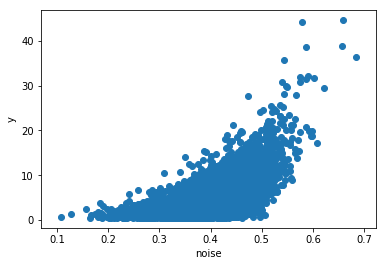

In [194]:
plt.scatter(n_arr8, y_arr8)
plt.xlabel("noise")
plt.ylabel("y")
plt.show()

In [ ]:
# Adam_1642238587   / 10 crit
a10, b10, y_arr10, n_arr10 = v4_prepare_data_from_files('Adam_1642238587', 0.5)
print(a10, b10)

In [ ]:
plt.scatter(n_arr10, y_arr10)
plt.xlabel("noise")
plt.ylabel("y")
plt.show()

5.460887907233937 2.366892315975944
5.460887907233937 2.366892315975944


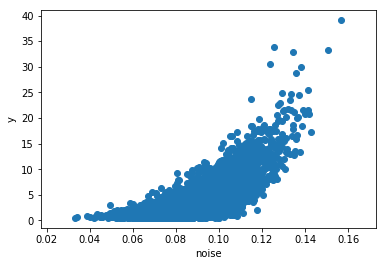

In [11]:
y_data = []
# recover data from test_file
with open(f'plots/Adam_1642206165/test_Adam_1642206165.csv', mode='r', newline='') as csv_data:
    csv_reader = csv.DictReader(csv_data)
    for row in csv_reader:
        y_data += [float(row["y_data"])]
        
print(y_data[0], y_data[-1])
y_data = [y_data[i] for i in range(0, len(y_data), 6)]
print(y_data[0], y_data[-1])

n_arr = [1 / i for i in n_arr]
plt.scatter(n_arr, y_data)
plt.xlabel("noise")
plt.ylabel("y")
plt.show()

## mu_noise = mean_noise_model + random_cov_noise_mosel (maximizing proba of prefering) 

In [15]:
experiments = ['Adam_1641213964', 'Adam_1641214341',
               'Adam_1641217332', 'Adam_1641232385', 'Adam_1641233437', 'Adam_1641219223',
                'Adam_1641220665', 'rmsprop_1641322755',]

## mu_noise = mean_noise_model

In [241]:
v2_total_accuracy = []
v2_vol_accu = []
v2_vol_gt = []
for name in experiments:
    v2_acc_, v2_vol_, v2_vol_gt_ = v2_prepare_data_from_files(name, 0.5)
    v2_total_accuracy +=[v2_acc_]
    v2_vol_accu += [v2_vol_]
    v2_vol_gt += [v2_vol_gt_]

print(v2_total_accuracy)
print(v2_vol_accu)
print(v2_vol_gt)

v2_ratio = [v2_vol_accu[i] / v2_vol_gt[i] for i in range(len(v2_vol_accu))]
v2_ratio 

[0.6047094188376754, 0.6142284569138277, 0.6002004008016032, 0.4343687374749499, 0.4188376753507014, 0.8391783567134269, 0.4185129625355797, 0.42041704170417044]
[0.05861723446893788, 0.0531062124248497, 0.05410821643286573, 0.10070140280561123, 0.09218436873747494, 0.003006012024048096, 0.09285329640741595, 0.09625962596259625]
[0.35120240480961923, 0.34468937875751504, 0.34318637274549096, 0.6067134268537074, 0.6152304609218436, 0.02555110220440882, 0.6174705746595892, 0.6173617361736173]


In [114]:
def v3_prepare_data_from_files(experiment_name, vol_factor, pref=0):
    user_vol_dic = []
    uid_vol_arr = []
    rating_arr =[]
    weights_arr = []
    one_vol_list = []
    y_data = []

    # recover data from test_file
    with open(f'plots/{experiment_name}/test_{experiment_name}.csv', mode='r', newline='') as csv_data:
        csv_reader = csv.DictReader(csv_data)
        for row in csv_reader:
            uid_vol_arr += [int(row["user_ID"])]
            rating_arr += [float(row["rating"])]
            one_vol_list += [float(row["volition"])]
            weights_arr += [float(row["weight"])]
            y_data += [float(row["y_data"])]


    assert len(uid_vol_arr) == len(rating_arr) == len(one_vol_list) == len(weights_arr)



    test_vol_dic = [[uid_vol_arr[i], rating_arr[i], weights_arr[i], one_vol_list[i], y_data[i]] 
                    for i in range(len(uid_vol_arr))]
    # recover result data from results_name.txt file
    
    with open(f'plots/{experiment_name}/results_{experiment_name}.txt', "r") as text_data:
        count = 0
        vol_arr_users= []
        for line in text_data:
            if count == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                mu = temp.astype(np.float)
            if count == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                cv = temp.astype(np.float)
            if count >= 5 and pref == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[0].strip().split('([')[1].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users += [temp]
            if count >= 5 and pref == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[1].strip().split('[')[1].strip().split('])')[0].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users += [temp]
            count += 1
    # exploit results and generate metrics
    cv = cv * np.eye(len(mu))
    user_accuracy = []
    cnt = 0
    nb_vol_gt = 0
    tp, tn, fp, fn = 0, 0 , 0, 0
    ttp, ttn, tfp, tfn = 0, 0, 0, 0
    cnt = 0
    print(" max_proba_rating || test_vol_gt || model_vol_pred || volition_accuracy")

    for i in range(len(test_vol_dic)):
        uid = test_vol_dic[i][0]
        #r2 = rescale_rating([test_vol_dic[i][1]])
        r2 = [test_vol_dic[i][1]]
        weight = test_vol_dic[i][2]        
        vol = int(test_vol_dic[i][3])
        y_data = test_vol_dic[i][4]
        noises = sc.random.multivariate_normal(mean=mu, cov=cv, size=1000)
        user_pref = vol_arr_users[uid] + noises
        bradely = [1/(1+np.exp(-weight * i * r2[0])) for i in user_pref]
        y = [sc.stats.expon.pdf(y_data, loc=0.5, scale=np.linalg.norm(i)) for i in noises]
        proba_noises = [sc.stats.multivariate_normal.pdf(i, mean=mu, cov=cv) for i in noises]
        dens = [sc.special.expit(bradely[i] * y[i] * proba_noises[i]) for i in range(len(noises))]
        #dens = [1/(1+np.exp(-weight * i * r2[0])) for i in user_pref]
        max_index = np.argmax(np.array(dens))
        #print(vol_arr_users[uid], user_pref[max_index])
        quotient = np.linalg.norm(noises[max_index]) / len(noises[max_index])
        #if bradely[max_index] > 0.5:
        vol_positif = 0

        if quotient <= vol_factor:
            if vol == 1:
                ttp += 1
                vol_positif = 1
            else:
                tfp += 1
        else:
            if vol == 0:
                ttn += 1
            else:
                tfn += 1
            
        if dens[max_index][0] > 0.5:
            if quotient <= vol_factor:
                if vol == 1:
                    tp += 1
                else:
                    fp += 1
            else:
                if vol == 0:
                    tn += 1
                else:
                    fn += 1

            
            if vol == 1:
                nb_vol_gt += 1
        print(bradely[max_index], proba_noises[max_index], y[max_index])
        print(f"{uid} || {dens[max_index][0]}") #"|| {vol} || {vol_positif} ")
        
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    tprecision = ttp / (ttp + tfp)
    trecall = ttp / (ttp + tfn)
    taccuracy = (ttp + ttn) / (ttp + ttn + tfp + tfn)
    
    nb_vol_gt = nb_vol_gt / (len(test_vol_dic))
    print("_____________________________________________________________\n")
    return (precision, recall, accuracy), (tprecision, trecall, taccuracy)